# OpenSAFELY COVID Vaccine coverage report

OpenSAFELY is a new secure analytics platform for electronic patient records built on behalf of NHS England to deliver urgent academic and operational research during the pandemic. 

This is our regular weekly report on COVID-19 vaccination coverage in England using data from 40% of general practices that use TPP electronic health record software. **The data requires careful interpretation and there are a number of caveats. Please read the full detail about our methods and discussion of our earlier results (as of January 13th) in our preprint paper available [here](https://www.medrxiv.org/content/10.1101/2021.01.25.21250356v2).** 

The full analytical methods behind the latest results in this report are available [here](https://github.com/opensafely/nhs-covid-vaccination-uptake).



In [1]:
from datetime import datetime
from IPython.display import display, Markdown
import os
import pandas as pd
pd.set_option("display.max_rows", 200)

suffix = "_tpp"

display(Markdown(f"### Report last updated **{datetime.today().strftime('%d %b %Y')}**"))

with open(os.path.join("..", "interim-outputs","text", "latest_date.txt"), 'r') as file:
    latest_date_fmt = file.read()
    display(Markdown(f"### Vaccinations included up to **{latest_date_fmt}** inclusive"))

with open(os.path.join("..", "interim-outputs","text", "latest_date_of_first_dose_for_due_second_doses.txt"), 'r') as file:
    latest_date_13w_fmt = file.read()

### Report last updated **22 Jul 2021**

### Vaccinations included up to **25 May 2021** inclusive

#### 
## Contents:
- **<a href=#summary>Overview</a>**
- **<a href=#summarychart>Summary Chart</a>**
- **Trends in vaccination coverage** according to demographic/clinical features, for:
 - <a href=#charts80>80+ population</a>
 - <a href=#charts70>70-79 population</a>
 - <a href=#charts_shield>shielding (aged 16-69) population</a>
 - <a href=#charts65>65-69 population</a>
 - <a href=#charts60>60-64 population</a>
 - <a href=#charts55>55-59 population</a>
 - <a href=#charts50>50-54 population</a>
 - <a href=#charts40>40-49 population</a>
</br>
</br>
- **<a href=#tables>Current vaccination coverage of each eligible population group, according to demographic/clinical features</a>**
  - Includes each of the groups above, plus <a href=#Cumulative-vaccination-figures-among-care-home-population>care home (65+)</a> and <a href=#Cumulative-vaccination-figures-among-Learning-Disabilities-(aged-16-64)-population>LD (aged 16-64)</a> populations.
  - **NEW** - tables now include <a href=#Cumulative-vaccination-figures-among-30-39-population>30-39</a> and <a href=#Cumulative-vaccination-figures-among-18-29-population>18-29</a> populations
</br>
</br>
- Appendix: <a href=#ethnicity>Proportion of each population group for whom ethnicity is known</a>


# 
## Overview of Vaccination Figures to date <a name='summary' />


In [2]:
import json
summary_stats_1 = pd.read_csv(os.path.join("..", "interim-outputs","text", "summary_stats_first_dose.txt")).set_index("Unnamed: 0")
summary_stats_2 = pd.read_csv(os.path.join("..", "interim-outputs","text", "summary_stats_second_dose.txt")).set_index("Unnamed: 0")
additional_stats = pd.read_csv(os.path.join("..", "interim-outputs","text", "additional_stats_first_dose.txt")).set_index("Unnamed: 0")

out = summary_stats_1.join(summary_stats_2)
out.index = out.index.rename("Group")
display(out)

display(Markdown(f"##### \n" 
                 "**NB** Patient counts are rounded to nearest 7\n"
                "##### \n" ))

display(Markdown(f"### Vaccine types" ),
       Markdown("**Note:** numbers may not sum to 100% as it is not always possible to determine vaccine type given, and patients occasionally have more than one brand recorded on the same day."))

for x in additional_stats.index[0:3]:  
    display(Markdown(f"{x}: {additional_stats.loc[x][0]}\n"))
    
display(Markdown(f"### Second doses and dose combinations" ))
display(Markdown("**Note:** second dose figures are raw proportions and do not take into account how many are due, and the proportion due is likely to vary substantially by brand.</br>\
                For more detailed analysis please refer to our [second dose report](https://reports.opensafely.org/reports/vaccine-coverage-second-doses/)"))

for x in additional_stats.index[3:7]:  
    display(Markdown(f"{x}: {additional_stats.loc[x][0]}\n"))
    
display(Markdown("</br>**Note:** mixed doses counts patients with two doses at least 19 days apart, \
                  excluding patients with two different brands recorded on different days \
                  or where the first dose was recorded before the given brand was available"))
       
for x in additional_stats.index[7:]:  
    display(Markdown(f"{x}: {additional_stats.loc[x][0]}\n"))

    


display(Markdown(f"##### \n"
                 "### Group definitions \n - The **care home** group is defined based on patients (aged 65+) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).\n"
                 "\n- The **shielding** group is defined based on patients having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/shield/v1/) \
                 provided it was not superceded by one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/nonshield/v1/).\n"                
                "\n- The **LD** (learning disability) group is defined based on [this](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/learndis/v1/)\
                codelist and excludes people who are shielding.\n"
                 "\n- Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding \
                is only counted in the shielding group, not in the 65-69 population\n"))


first dose as at 25 May 2021  \
Group                                                  
Total vaccinated in TPP                       24,997   
80+                           50.4% (1,064 of 2,114)   
70-79                         49.6% (1,729 of 3,486)   
care home                       51.3% (693 of 1,351)   
shielding (aged 16-69)            48.4% (210 of 434)   
65-69                         51.4% (1,169 of 2,275)   
LD (aged 16-64)                   49.3% (392 of 791)   
60-64                         48.9% (1,309 of 2,674)   
55-59                         49.0% (1,484 of 3,024)   
50-54                         50.0% (1,666 of 3,332)   
40-49                         49.8% (3,066 of 6,153)   
30-39                         50.1% (3,234 of 6,461)   
18-29                        50.2% (8,988 of 17,906)   

                        second dose as at 25 May 2021  
Group                                                  
Total vaccinated in TPP                        15,001  
80+                              29.0% (616 of 2,114)  
70-79                          30.6% (1,071 of 3,486)  
care home                        28.9% (392 of 1,351)  
shielding (aged 16-69)             29.5% (126 of 434)  
65-69                            30.2% (686 of 2,275)  
LD (aged 16-64)                    28.4% (224 of 791)  
60-64                            31.9% (854 of 2,674)  
55-59                            29.8% (903 of 3,024)  
50-54                            29.7% (994 of 3,332)  
40-49                          31.1% (1,911 of 6,153)  
30-39                          29.8% (1,925 of 6,461)  
18-29                         29.6% (5,306 of 17,906)

##### 
**NB** Patient counts are rounded to nearest 7
##### 


### Vaccine types

**Note:** numbers may not sum to 100% as it is not always possible to determine vaccine type given, and patients occasionally have more than one brand recorded on the same day.

Oxford-AZ vaccines (% of all first doses): **0.0%** (7)


Pfizer vaccines (% of all first doses): **0.2%** (49)


Moderna vaccines (% of all first doses): **0.0%** (0)


### Second doses and dose combinations

**Note:** second dose figures are raw proportions and do not take into account how many are due, and the proportion due is likely to vary substantially by brand.</br>                For more detailed analysis please refer to our [second dose report](https://reports.opensafely.org/reports/vaccine-coverage-second-doses/)

Second doses (% of all vaccinated): **60.0%** (15,001)


Second doses (% of Ox-AZ first doses): **99500.0%** (6,965)


Second doses (% of Pfizer first doses): **10814.3%** (5,299)


Second doses (% of Moderna first doses): **0%** (7,182)


</br>**Note:** mixed doses counts patients with two doses at least 19 days apart,                   excluding patients with two different brands recorded on different days                   or where the first dose was recorded before the given brand was available

Mixed doses Ox-AZ + Pfizer (% of fully vaccinated): **0.0%** (0)


Mixed doses Ox-AZ + Moderna (% of fully vaccinated): **0.0%** (0)


Mixed doses Moderna + Pfizer (% of fully vaccinated): **0.0%** (0)


##### 
### Group definitions 
 - The **care home** group is defined based on patients (aged 65+) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).

- The **shielding** group is defined based on patients having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/shield/v1/)                  provided it was not superceded by one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/nonshield/v1/).

- The **LD** (learning disability) group is defined based on [this](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/learndis/v1/)                codelist and excludes people who are shielding.

- Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding                 is only counted in the shielding group, not in the 65-69 population


# 

## Summary Chart <a name='summarychart' />

In [3]:
import sys
sys.path.append('../lib/')
from create_report import *
from image_formats import pick_image_format

IMAGE_FORMAT = pick_image_format()

show_chart(f"Cumulative vaccination figures.{IMAGE_FORMAT.extension}", IMAGE_FORMAT, title="off")


# 
## Trends in vaccination rates of **80+** population according to demographic/clinical features, cumulatively by day. <a name='charts80' />
**\*_Latest overall cohort rate_ calculated as at latest date for vaccinations recorded across all TPP practices.**

## 80+ population

### COVID vaccinations among 80+ population
 ### by Sex

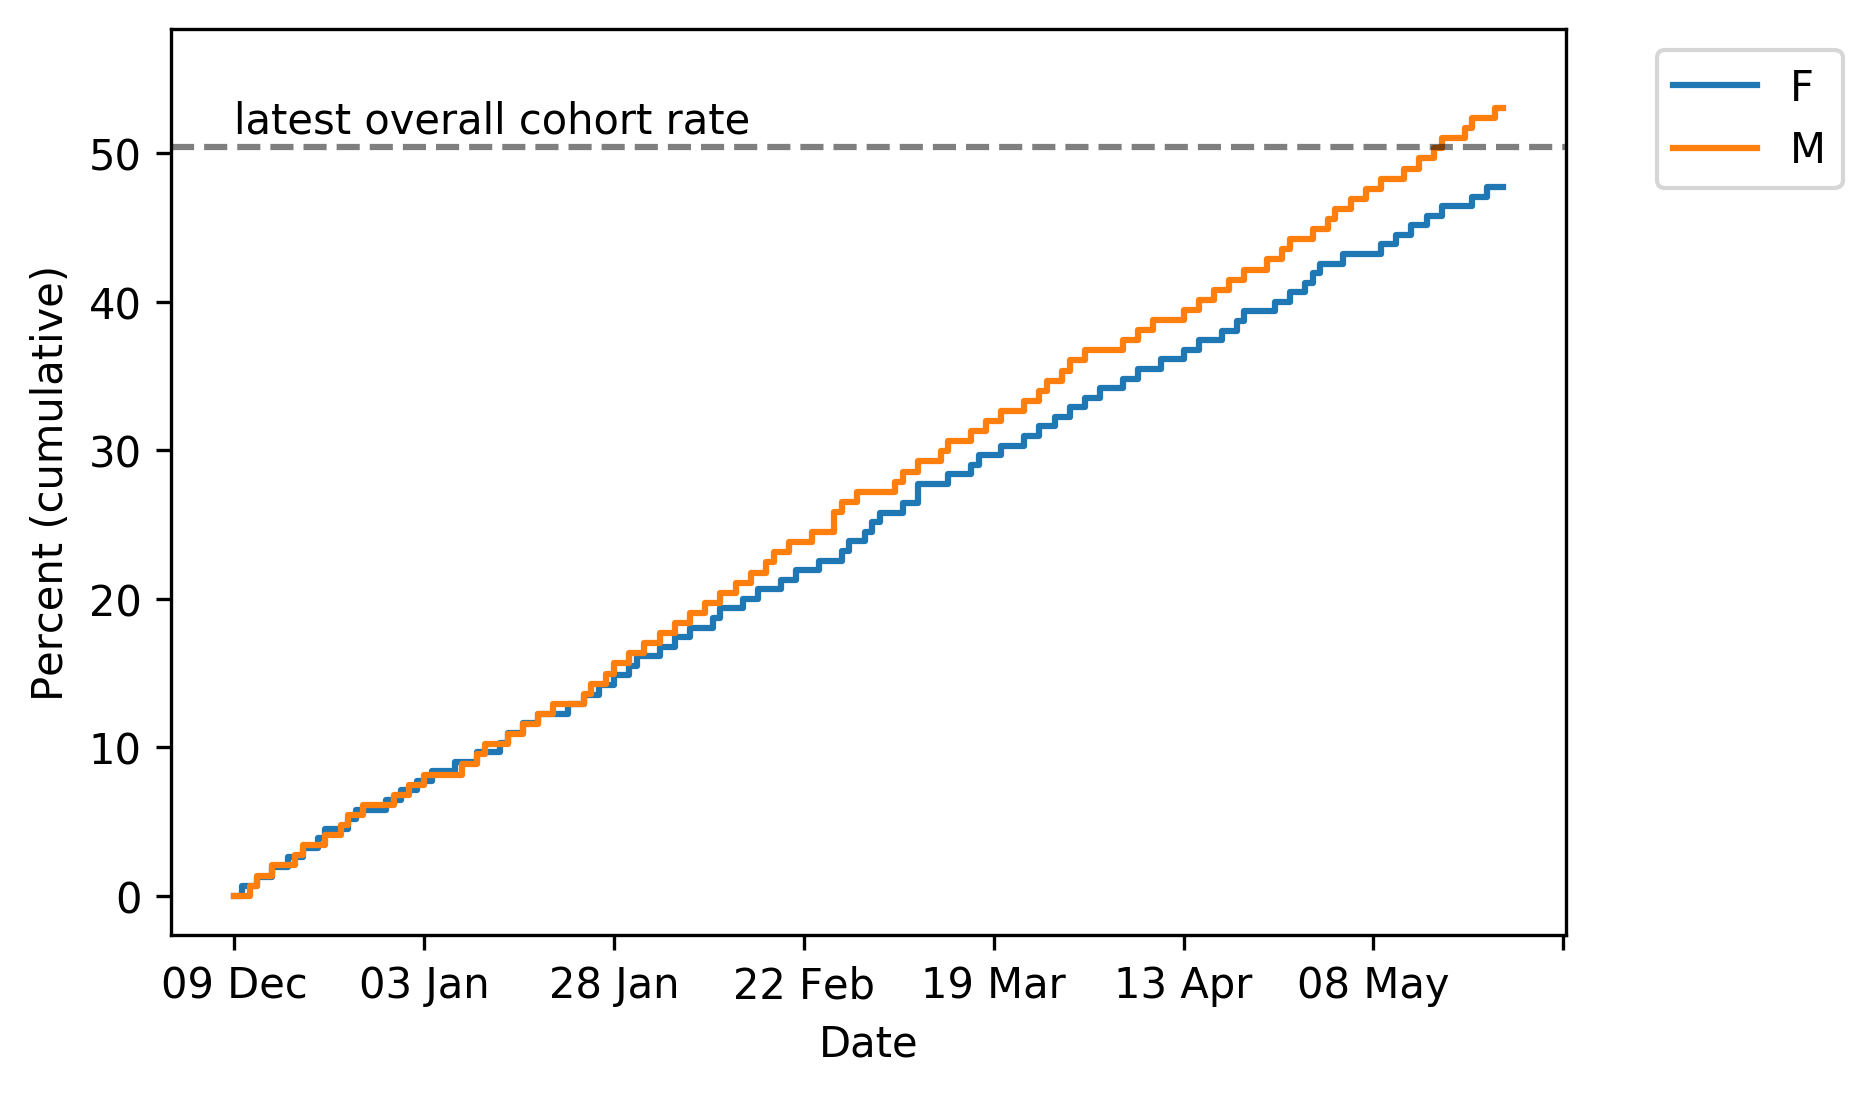

### COVID vaccinations among 80+ population
 ### by Ethnicity (broad categories)

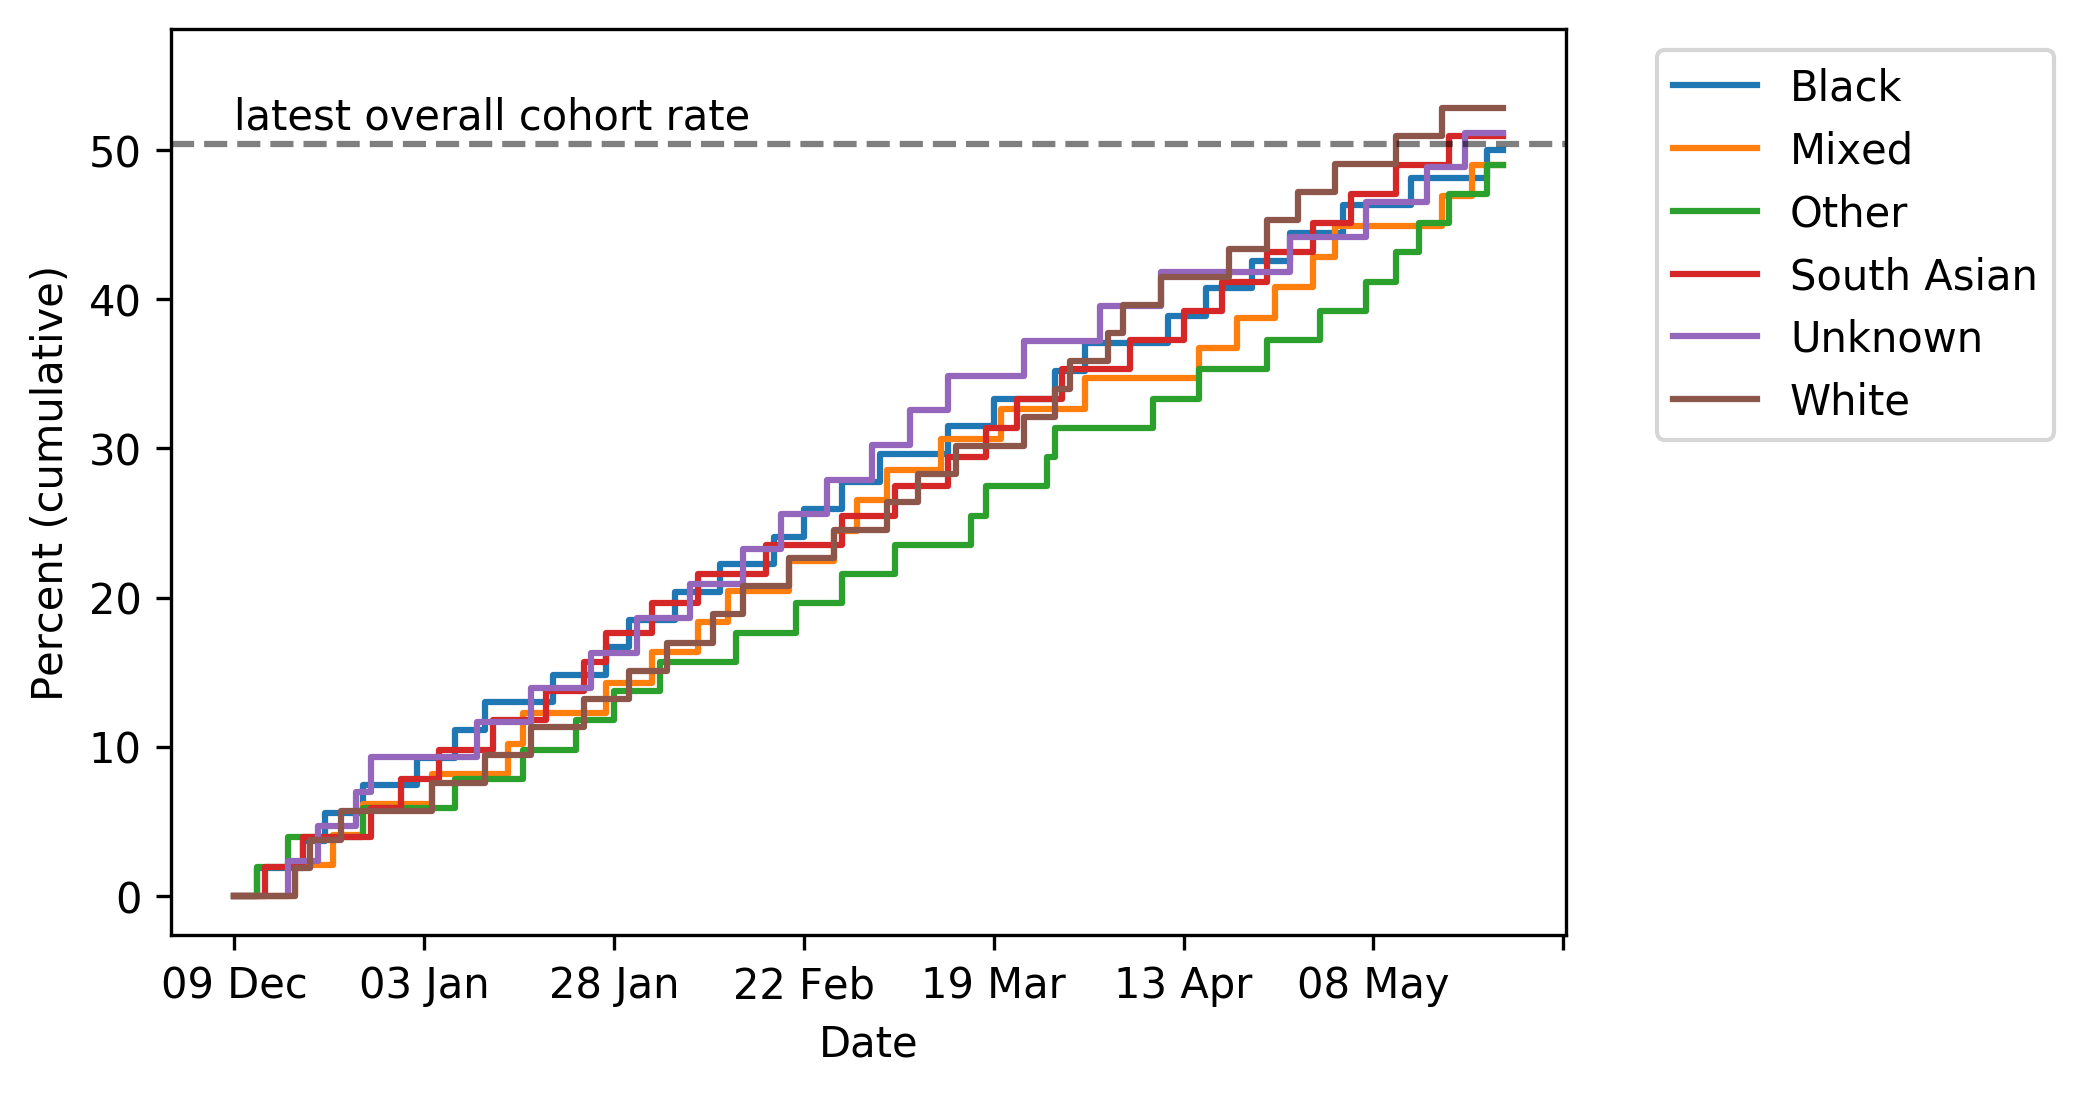

### COVID vaccinations among 80+ population
 ### by Index of Multiple Deprivation (quintiles)

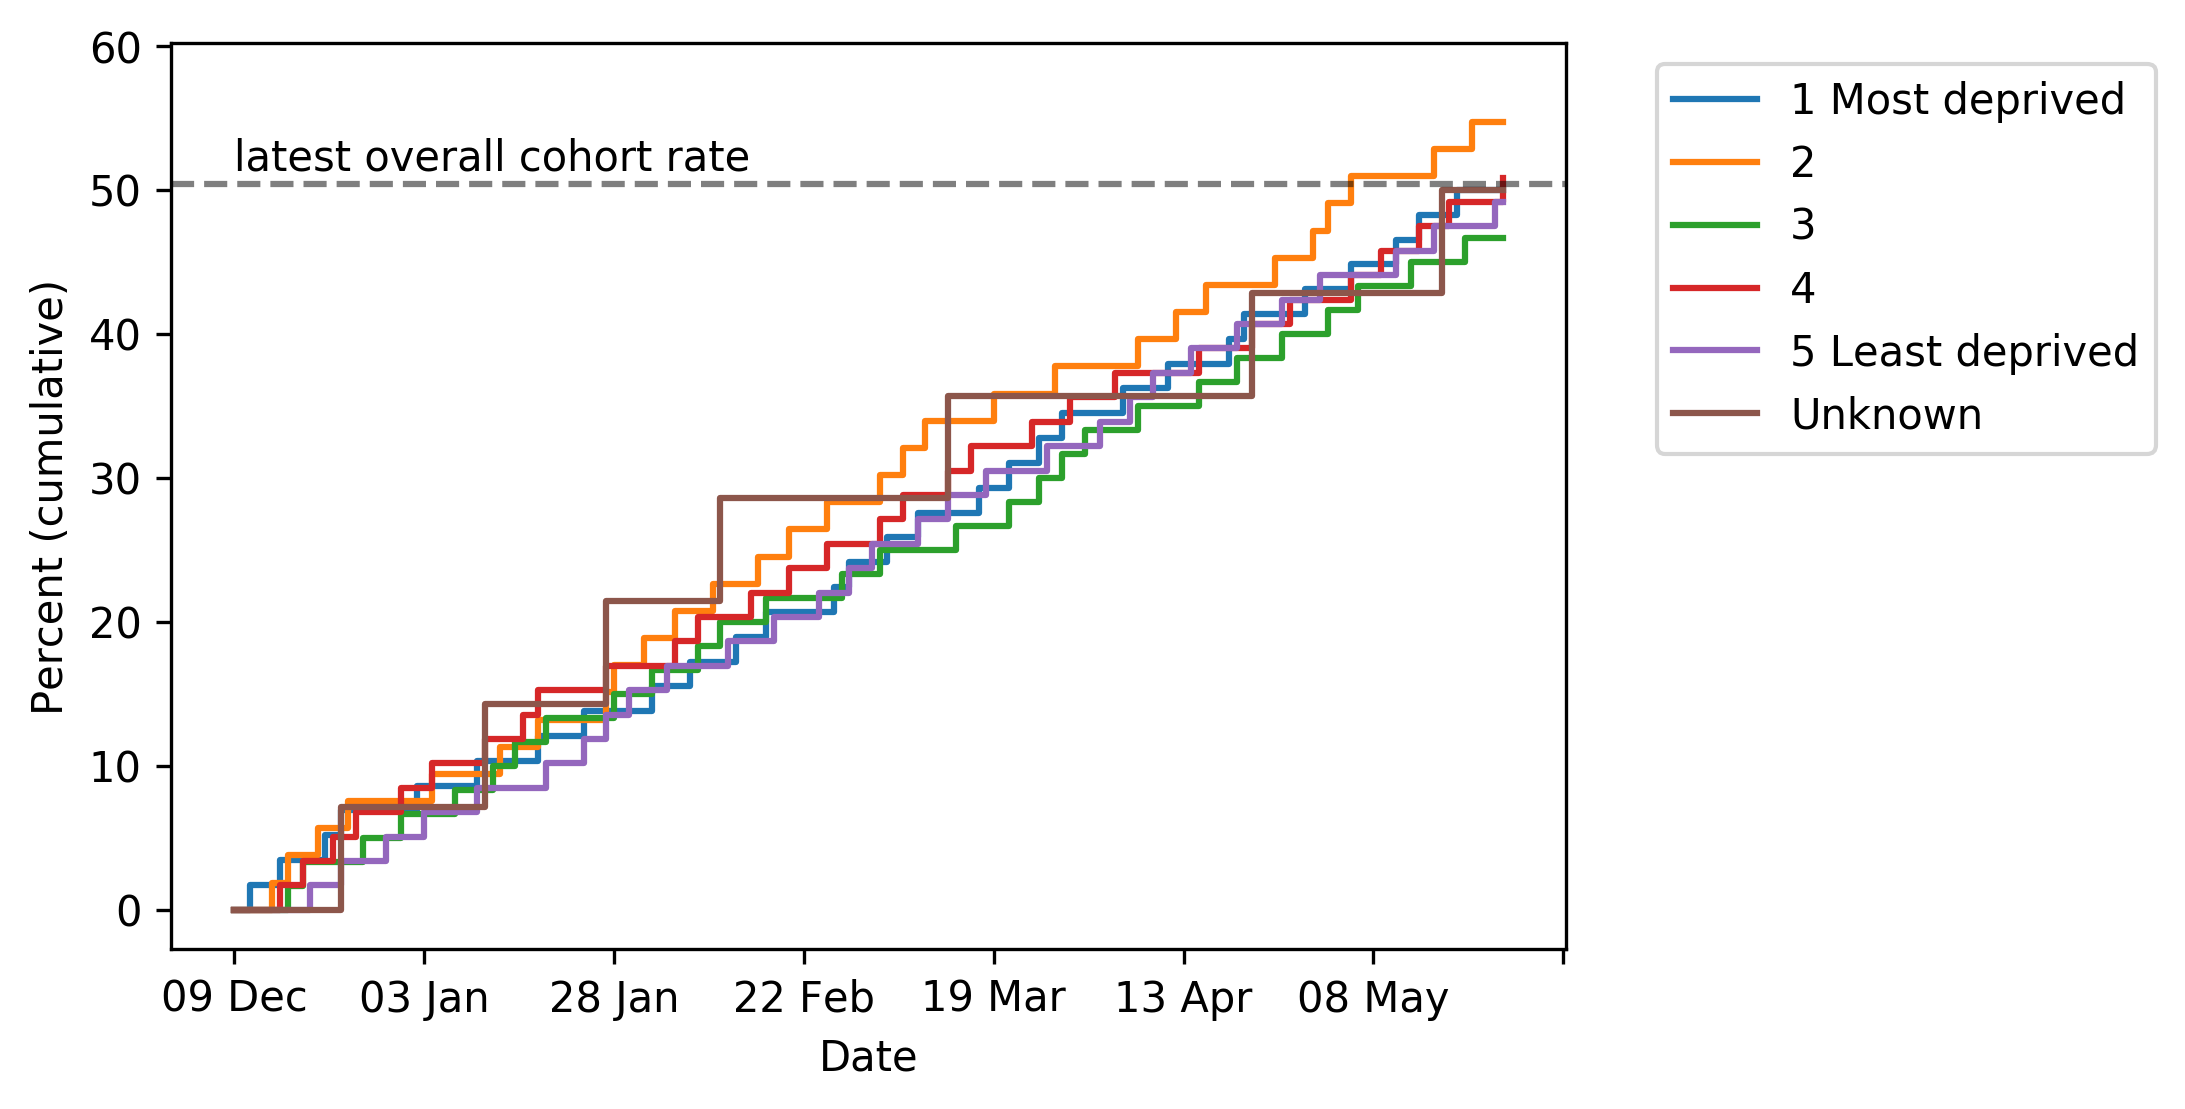

### COVID vaccinations among 80+ population
 ### by BMI

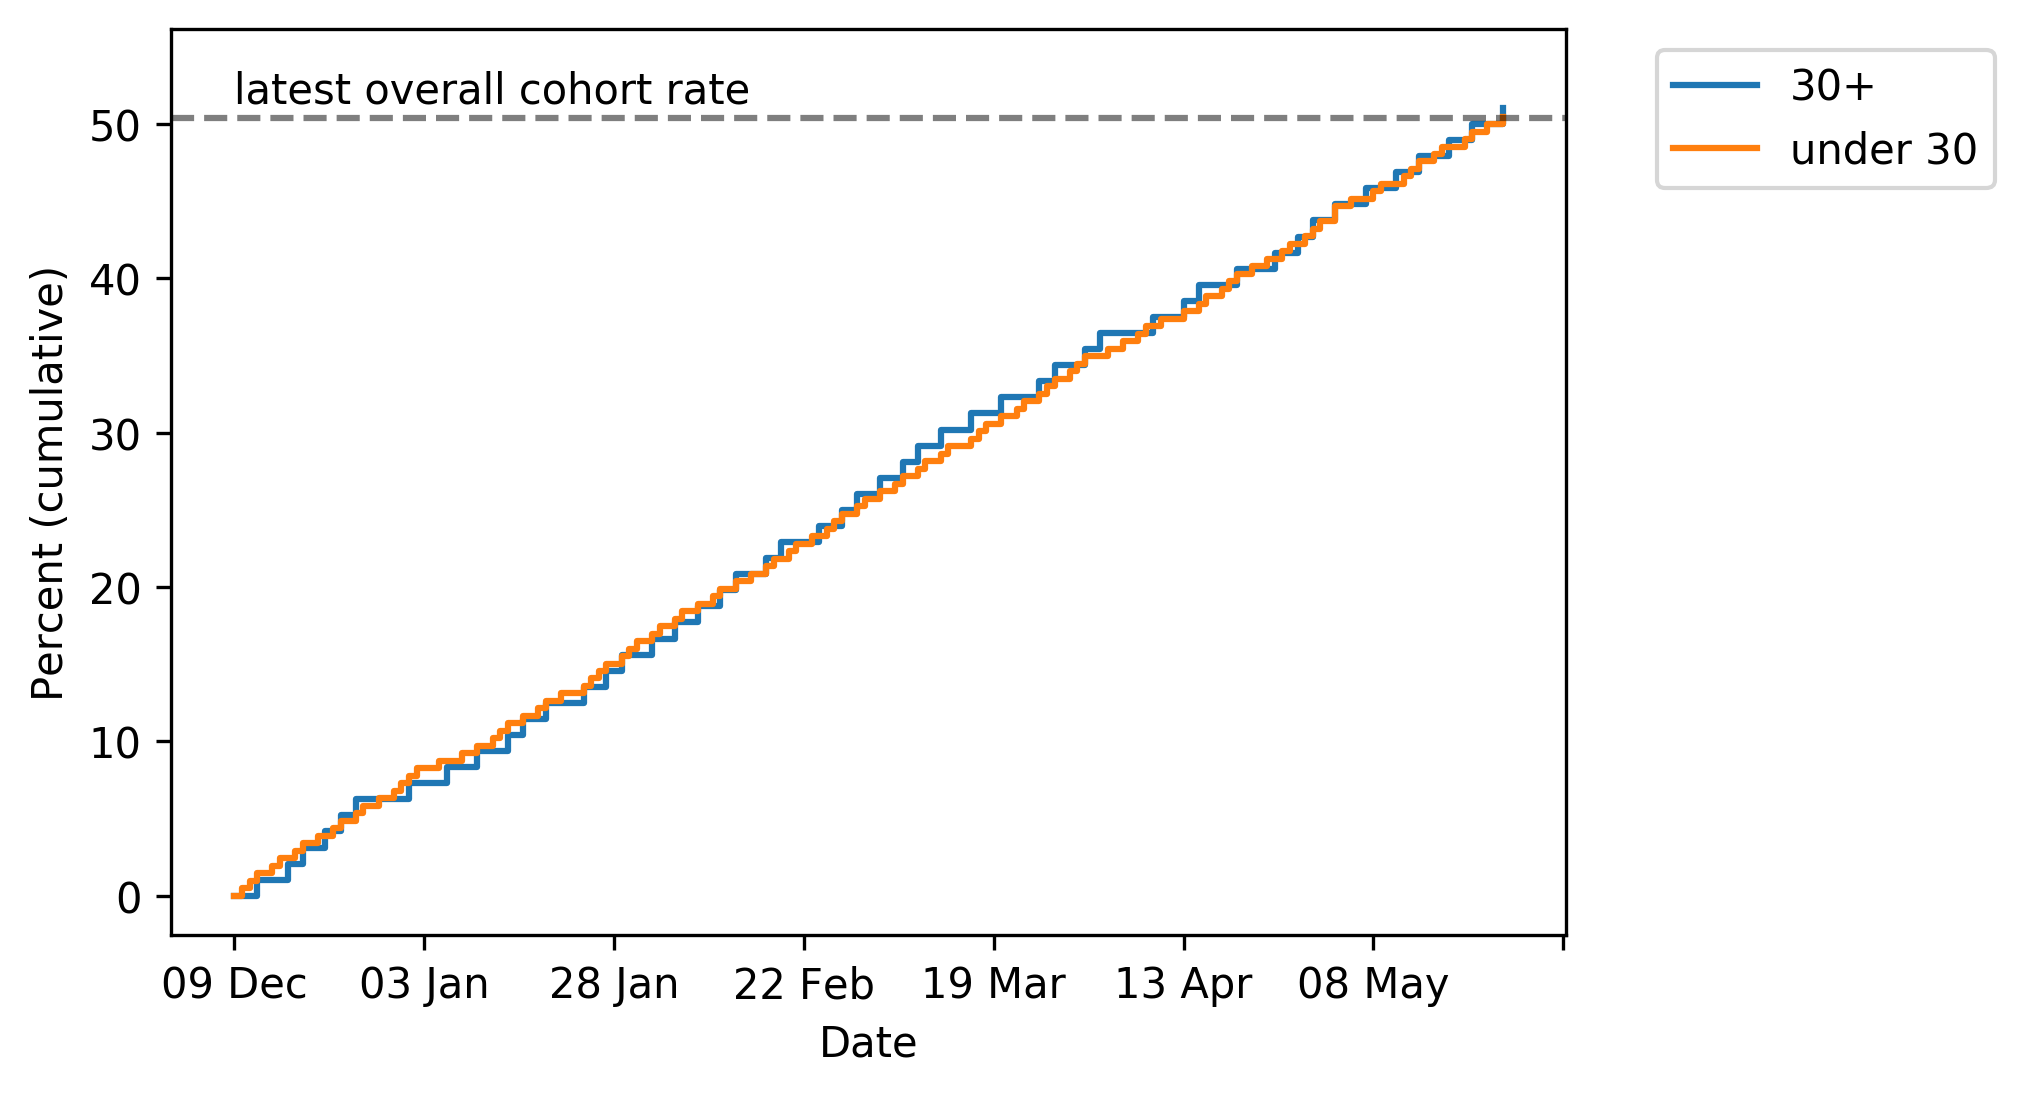

### COVID vaccinations among 80+ population
 ### by Chronic cardiac disease

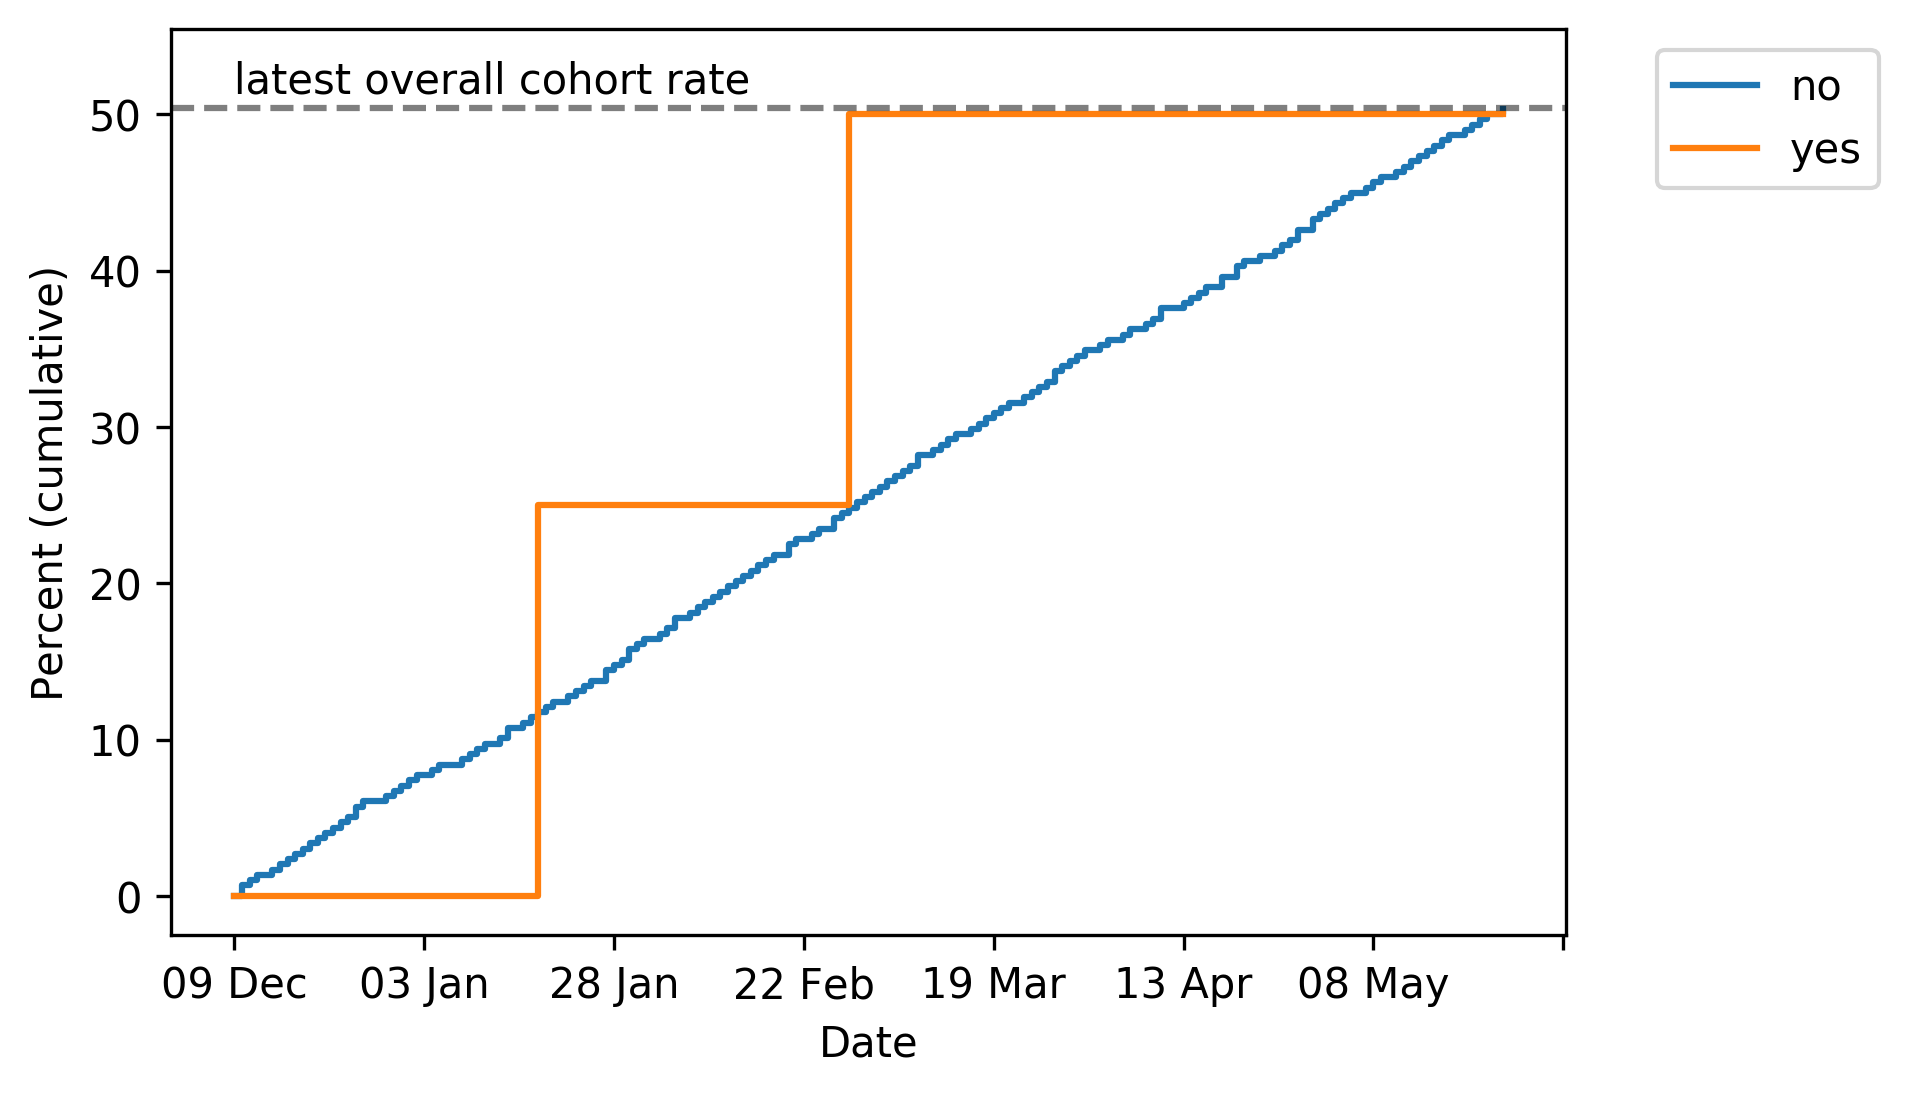

### COVID vaccinations among 80+ population
 ### by Current COPD

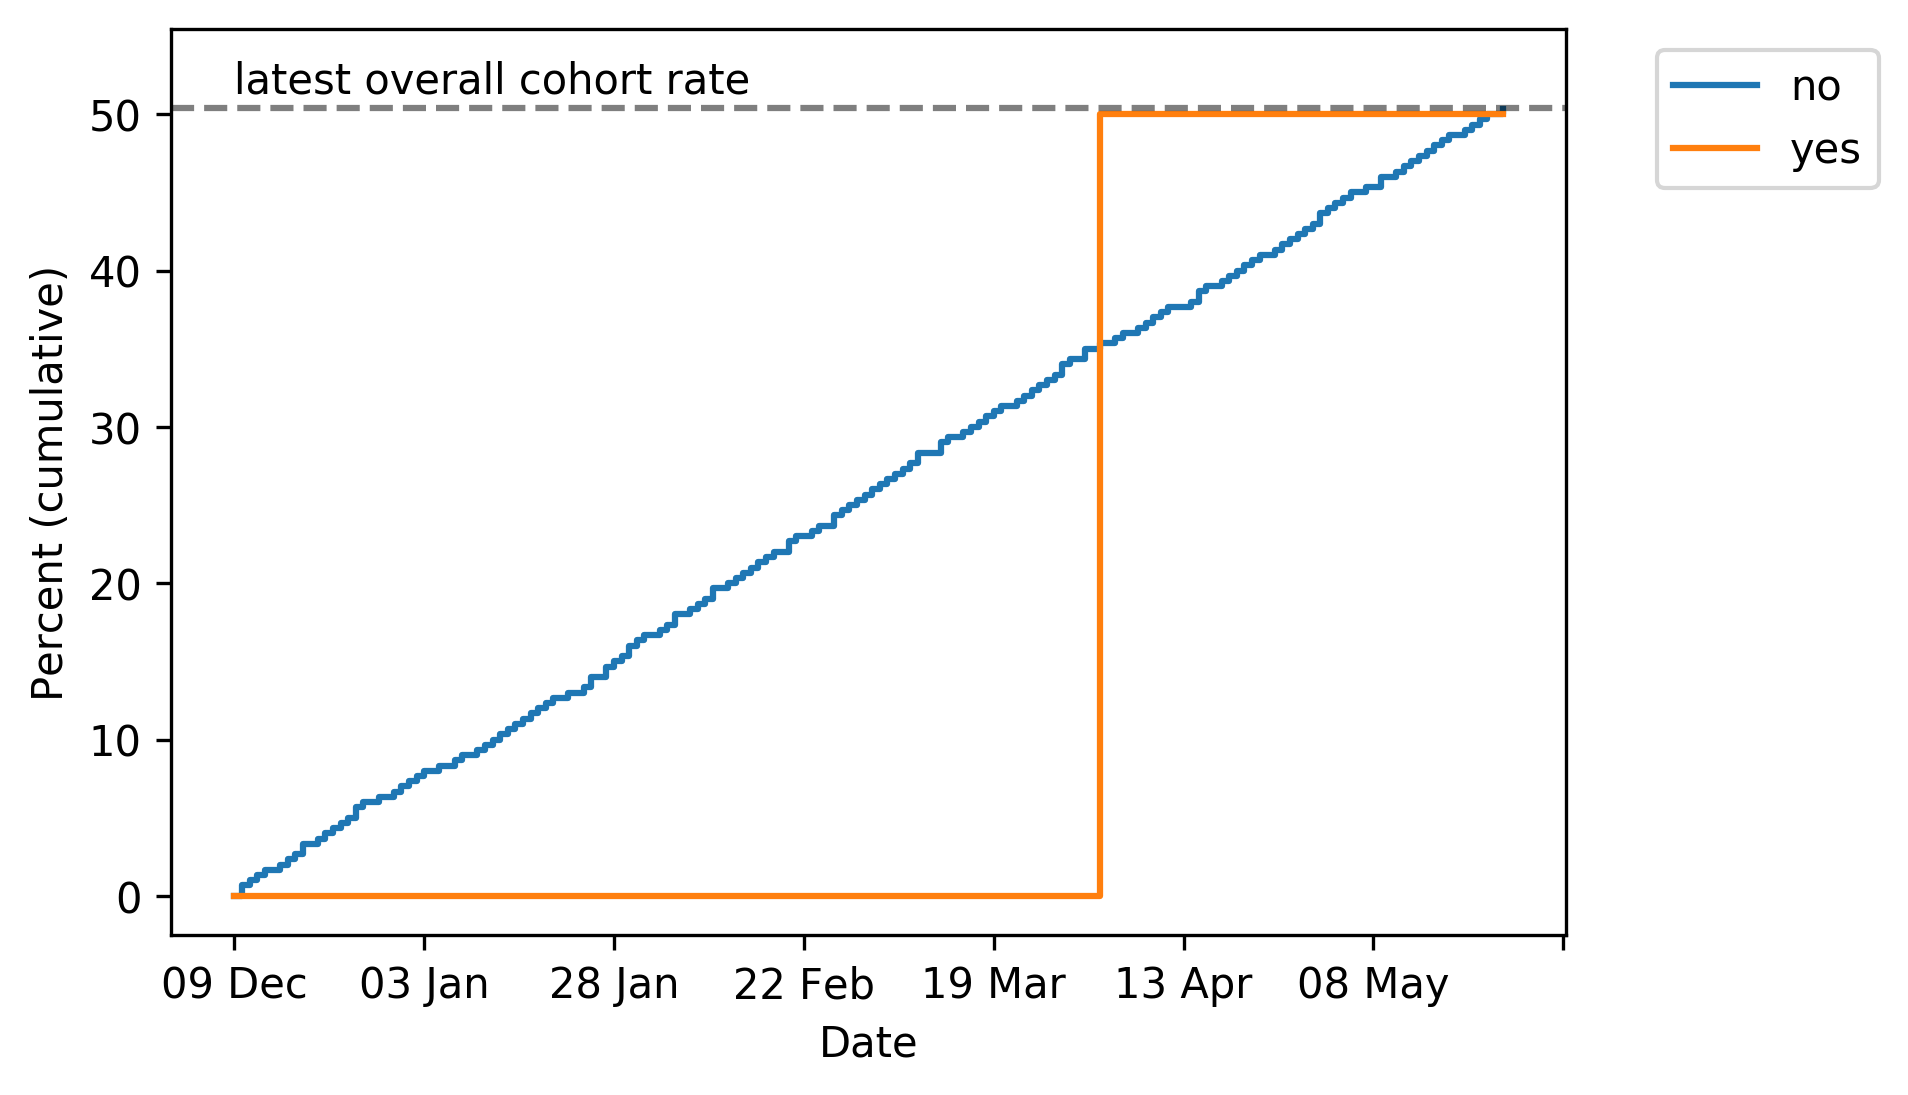

### COVID vaccinations among 80+ population
 ### by Dialysis

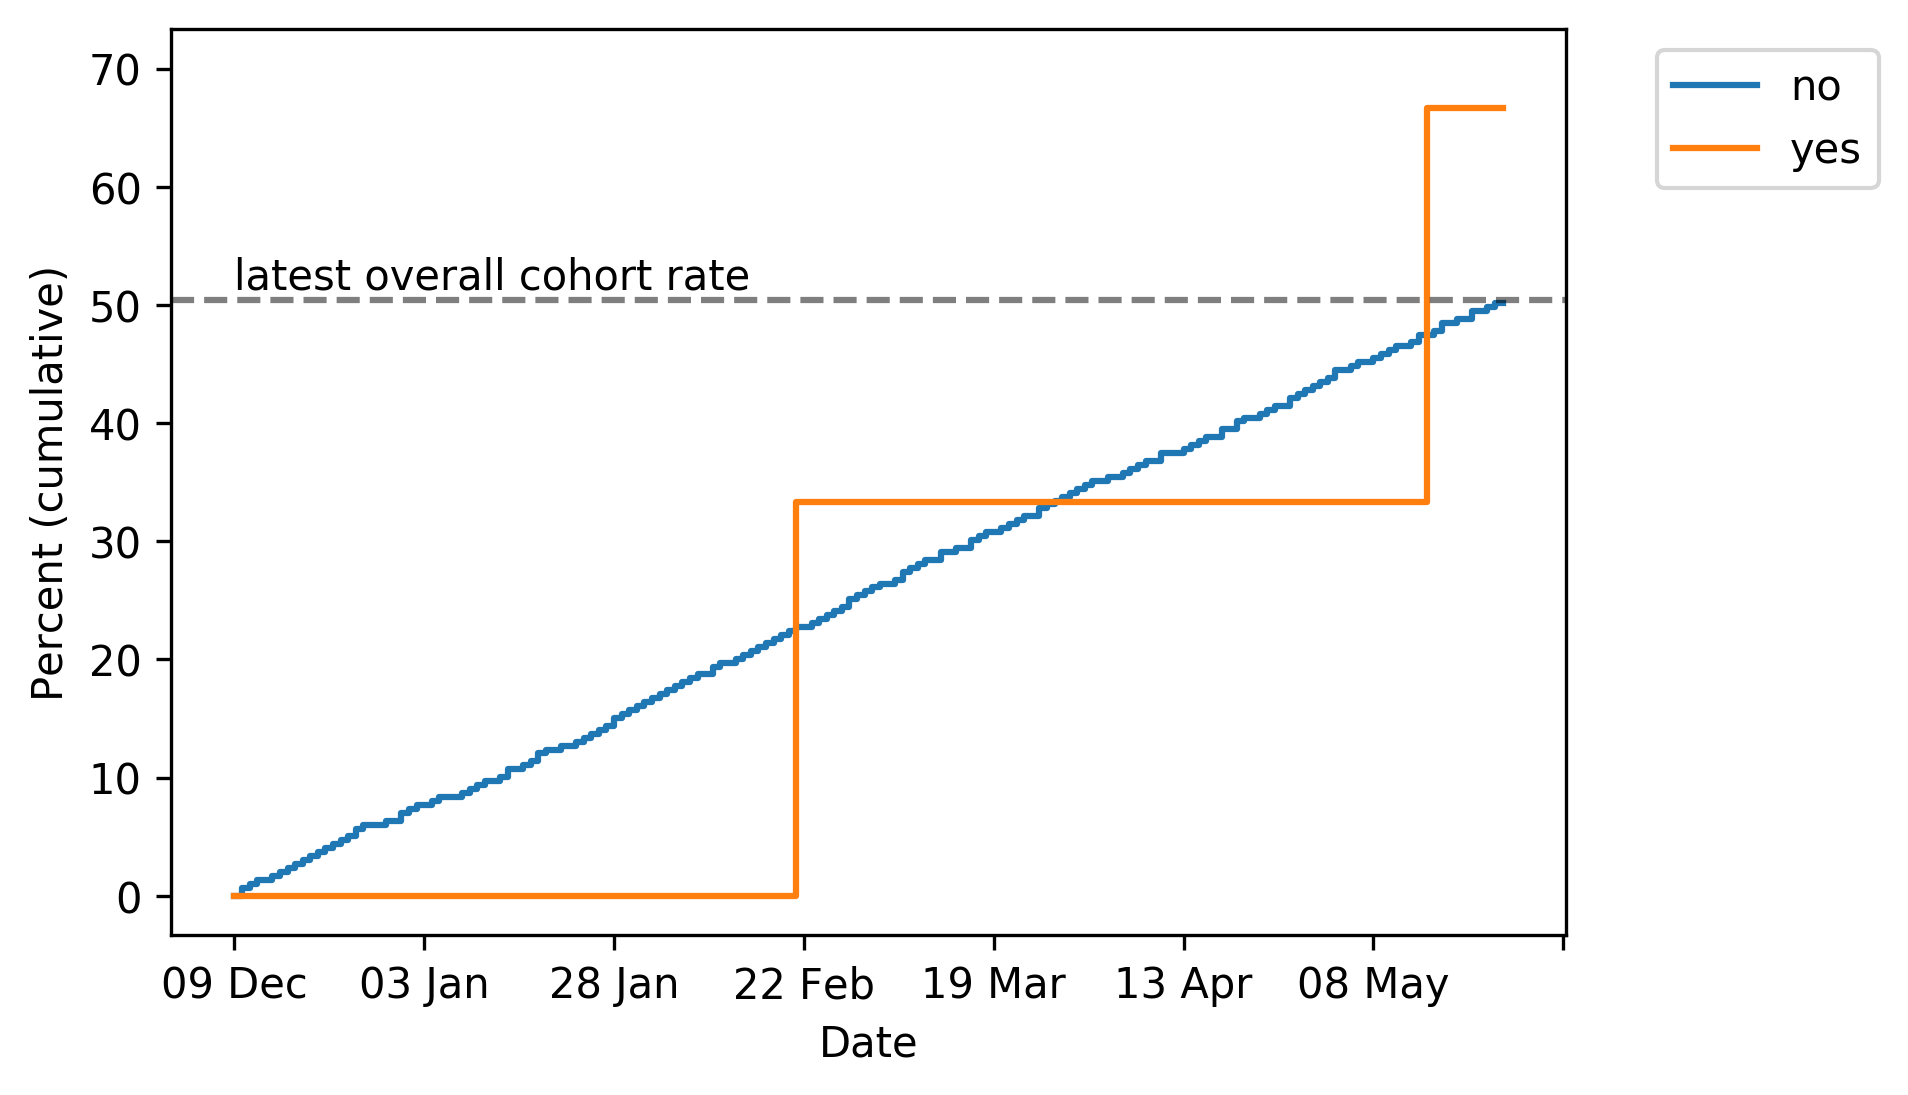

### COVID vaccinations among 80+ population
 ### by Dementia

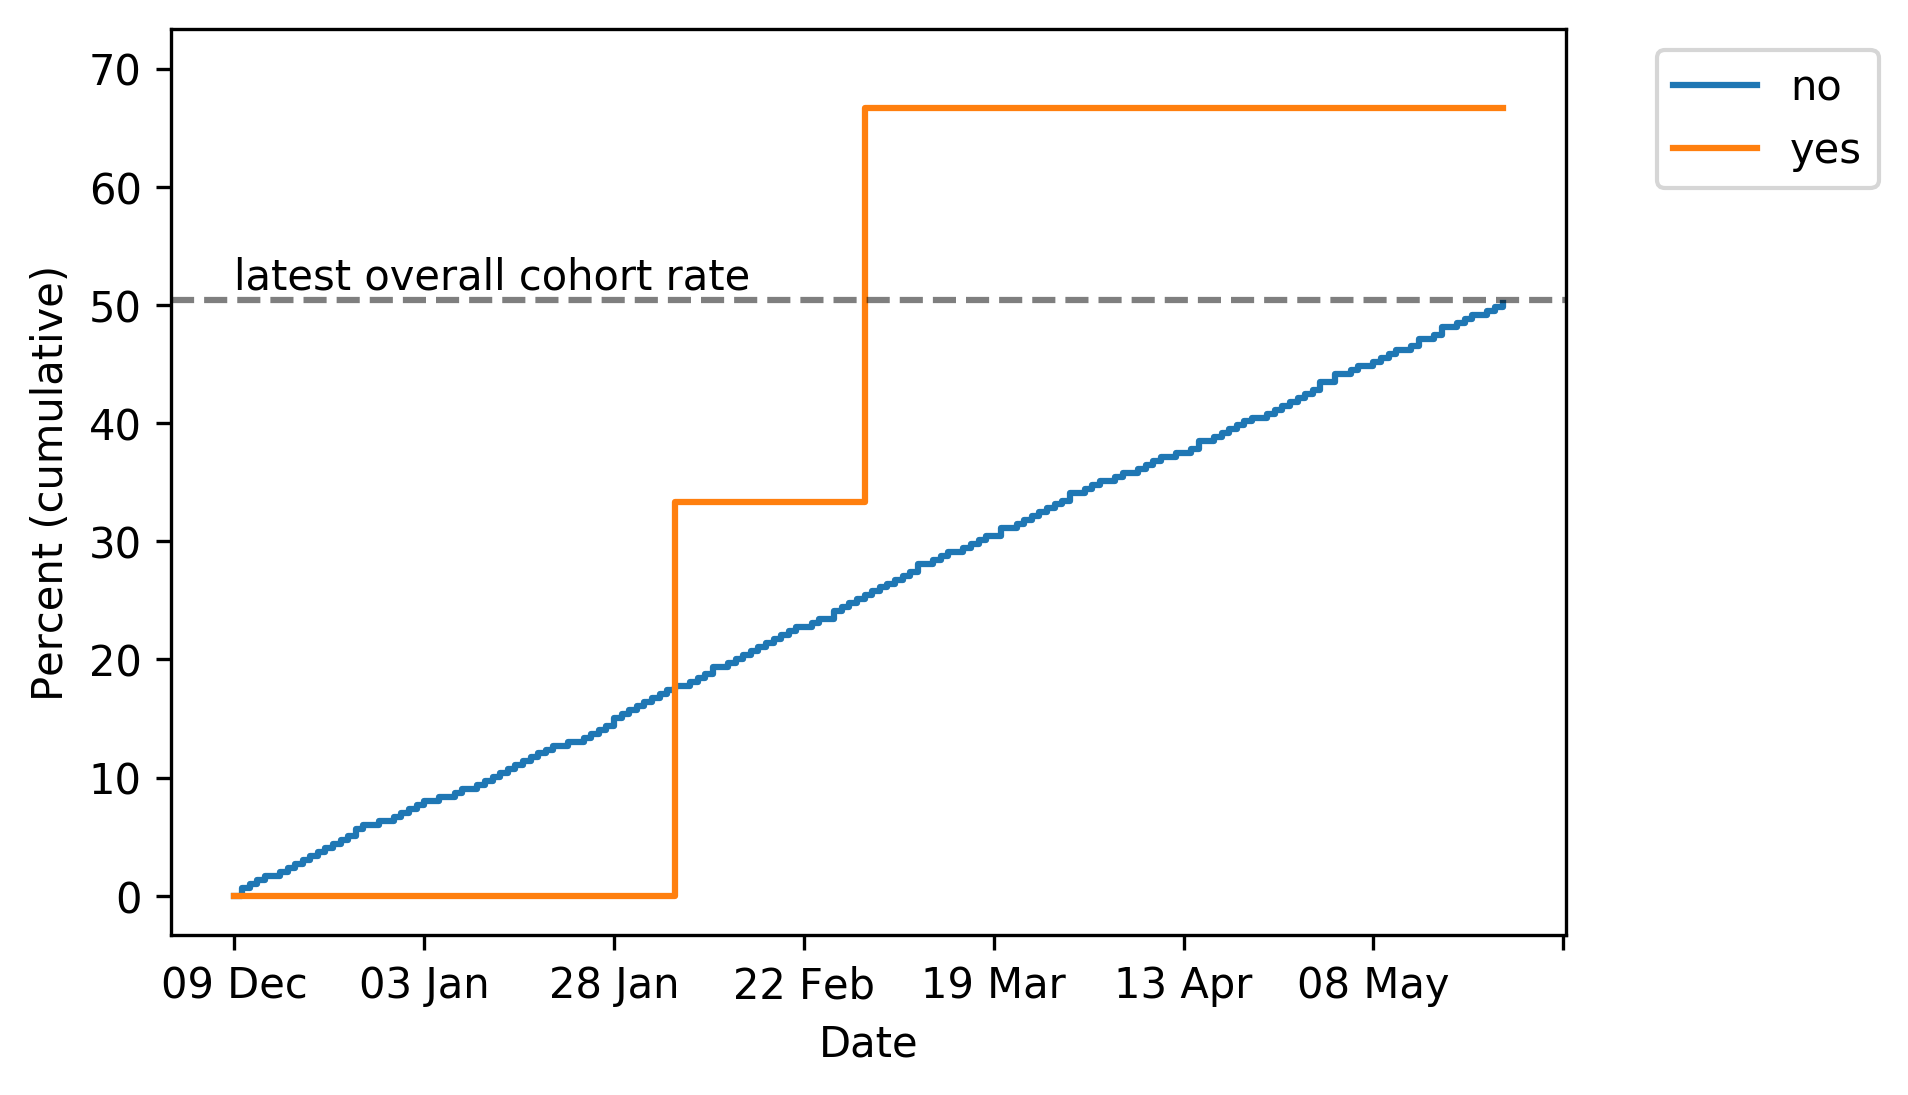

### COVID vaccinations among 80+ population
 ### by Learning disability

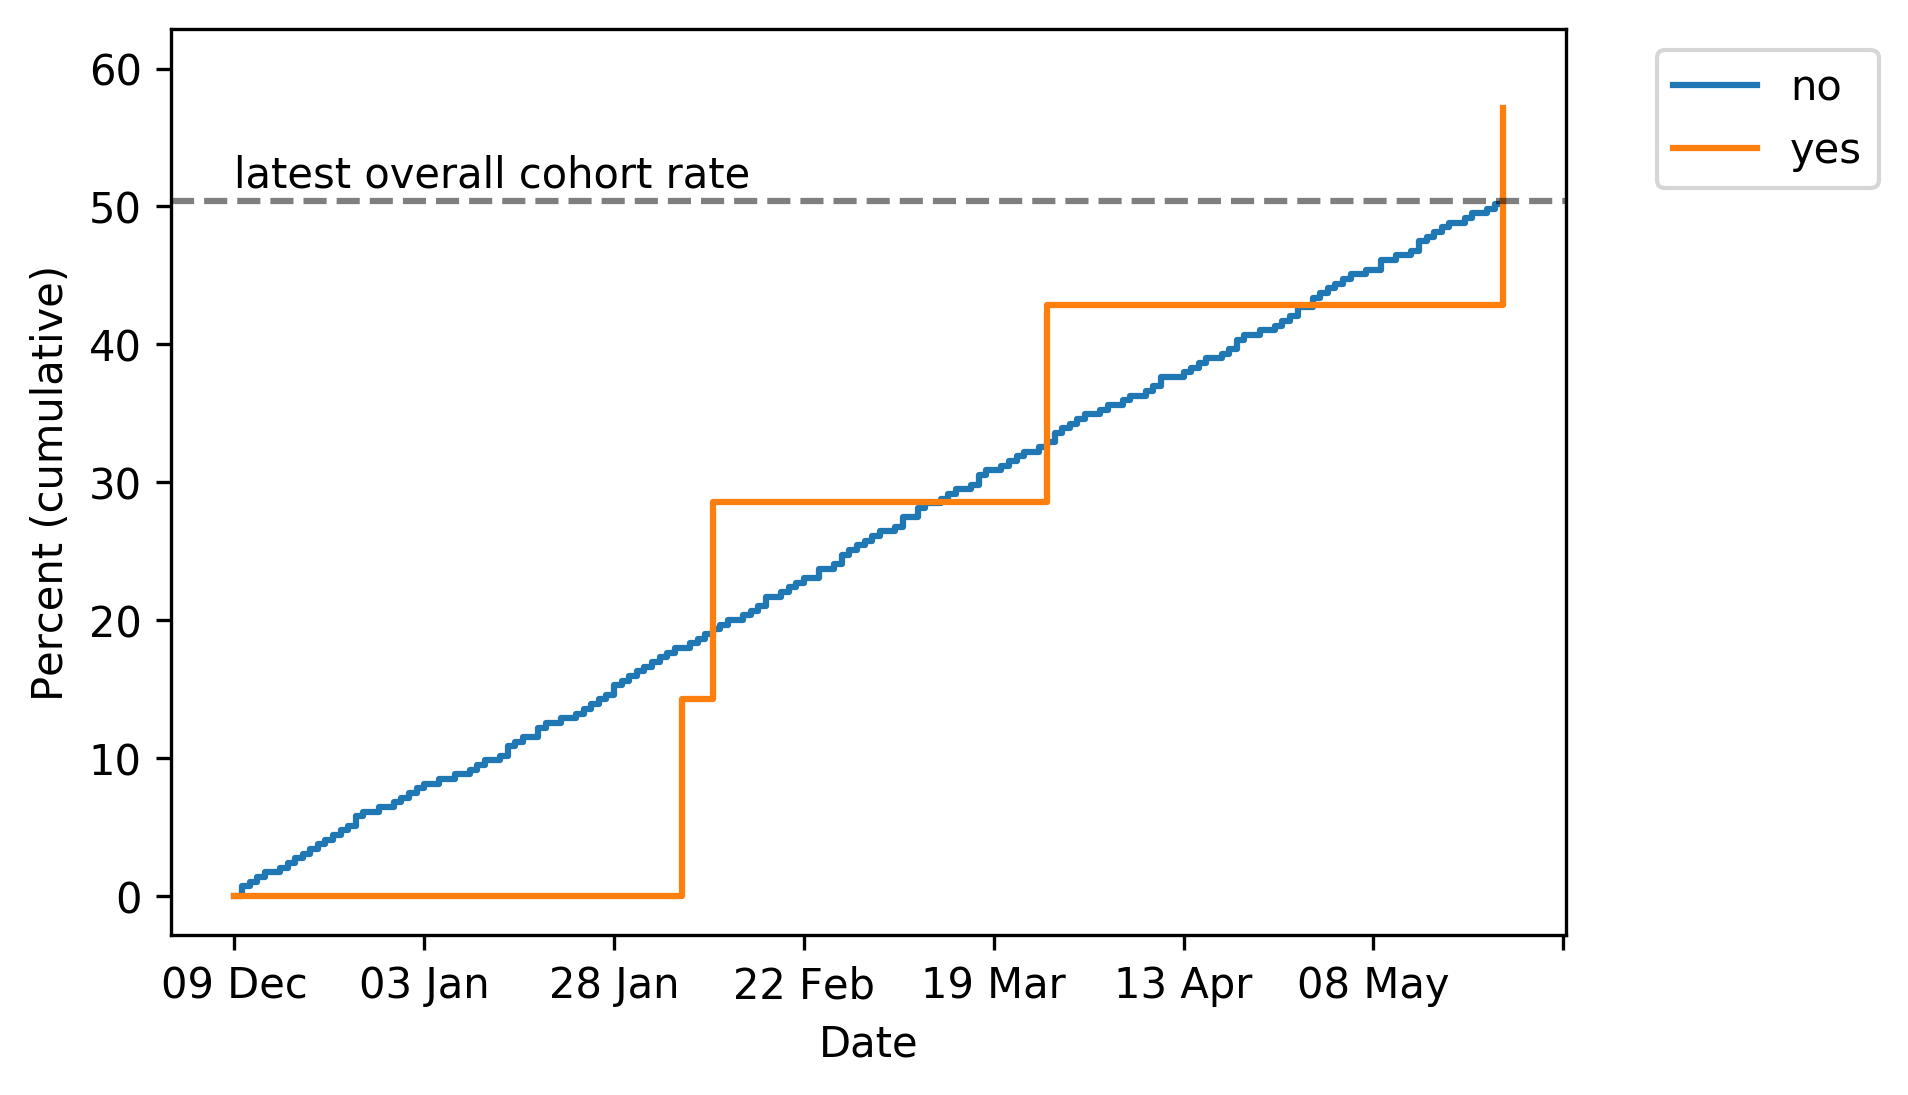

### COVID vaccinations among 80+ population
 ### by Psychosis, schizophrenia, or bipolar

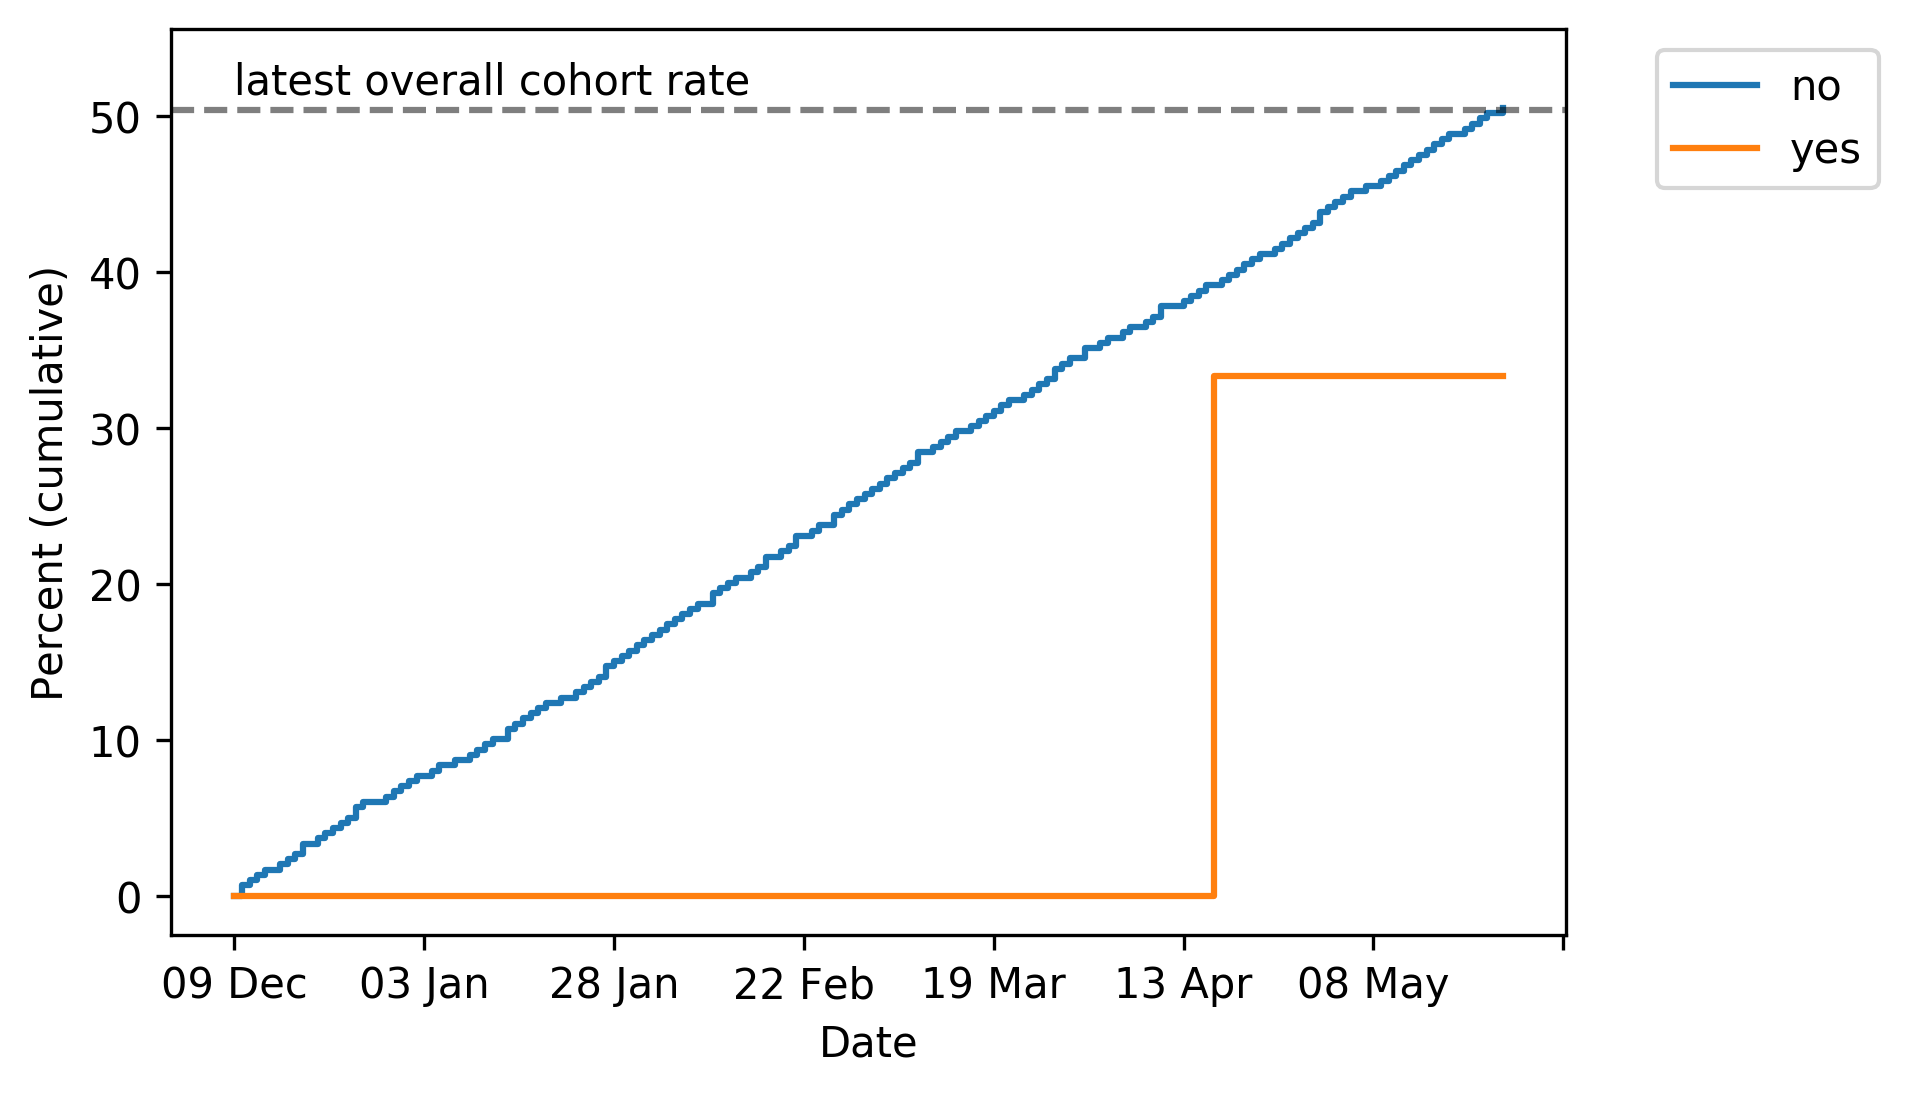

### COVID vaccinations among 80+ population
 ### by SSRI (last 12 months)

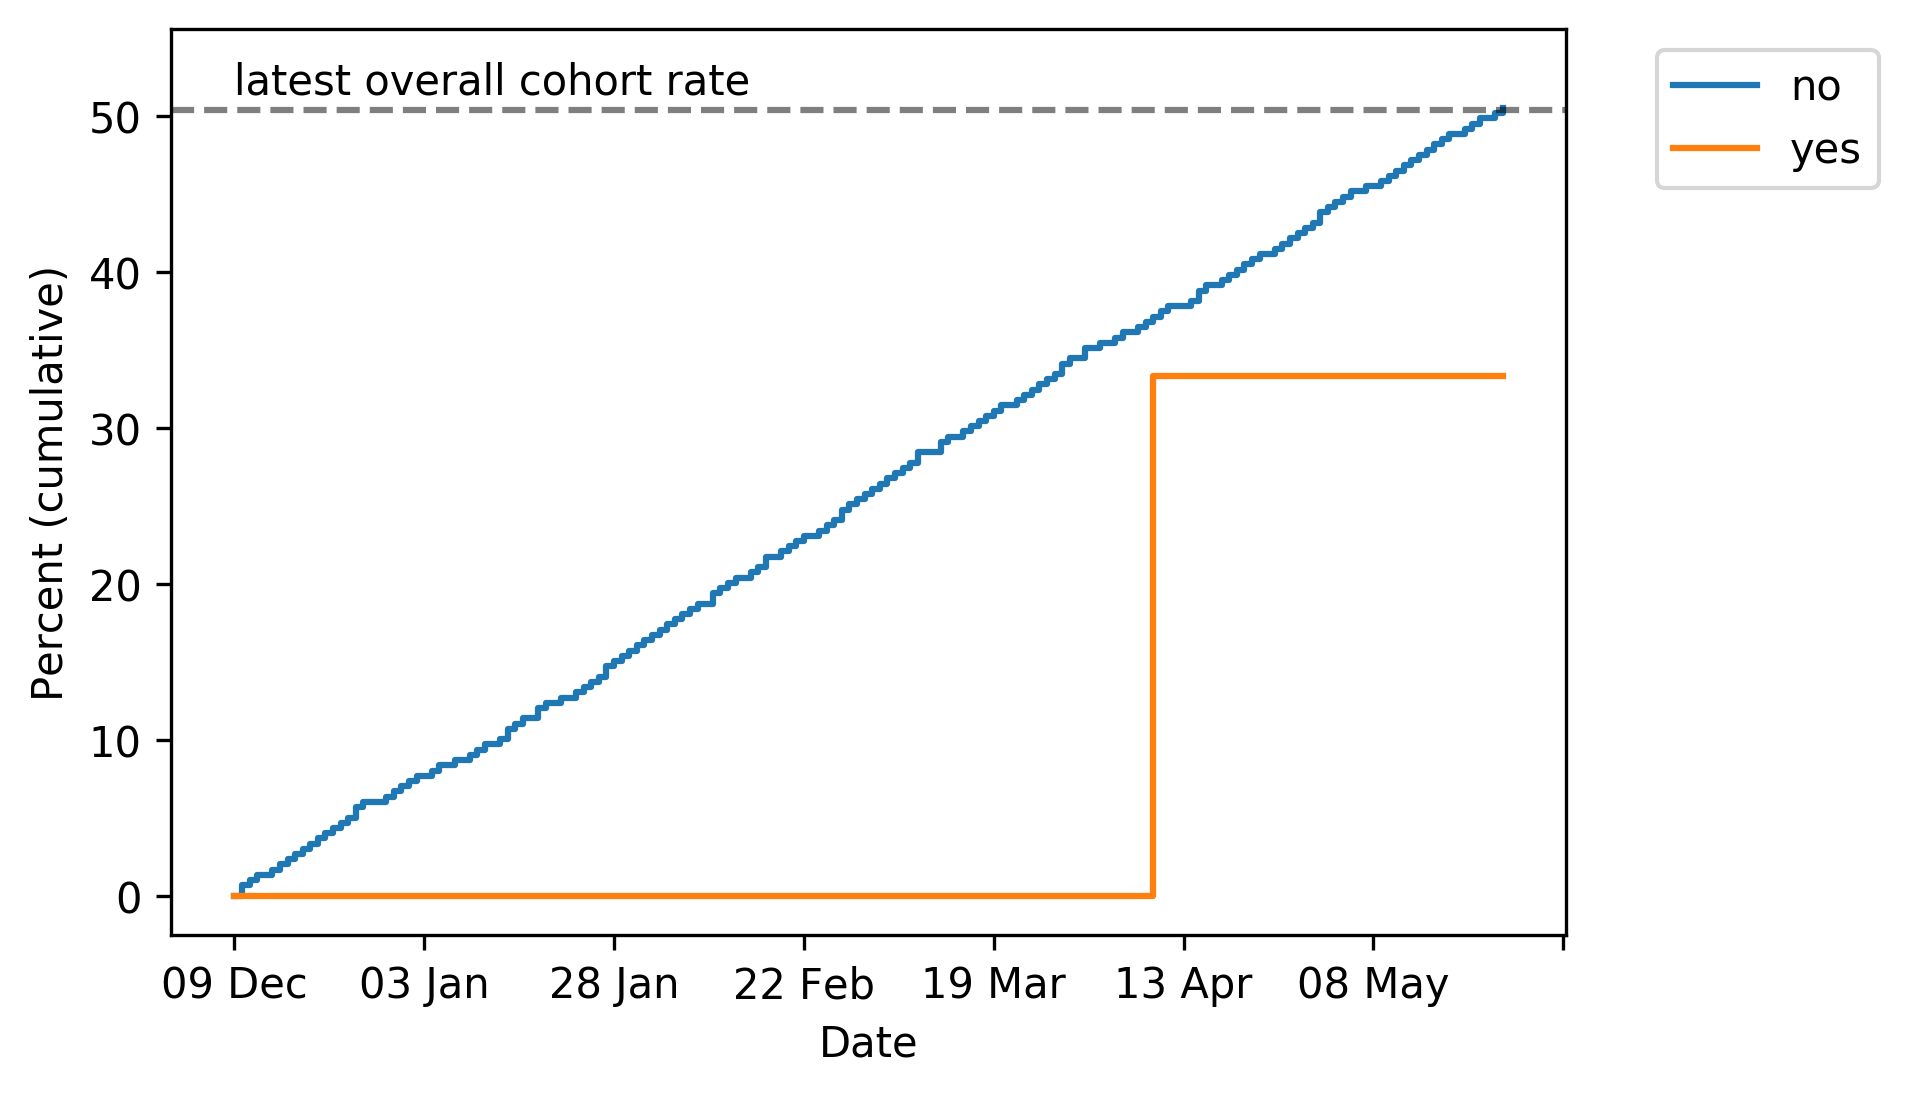

### COVID vaccinations among 80+ population
 ### by Age band

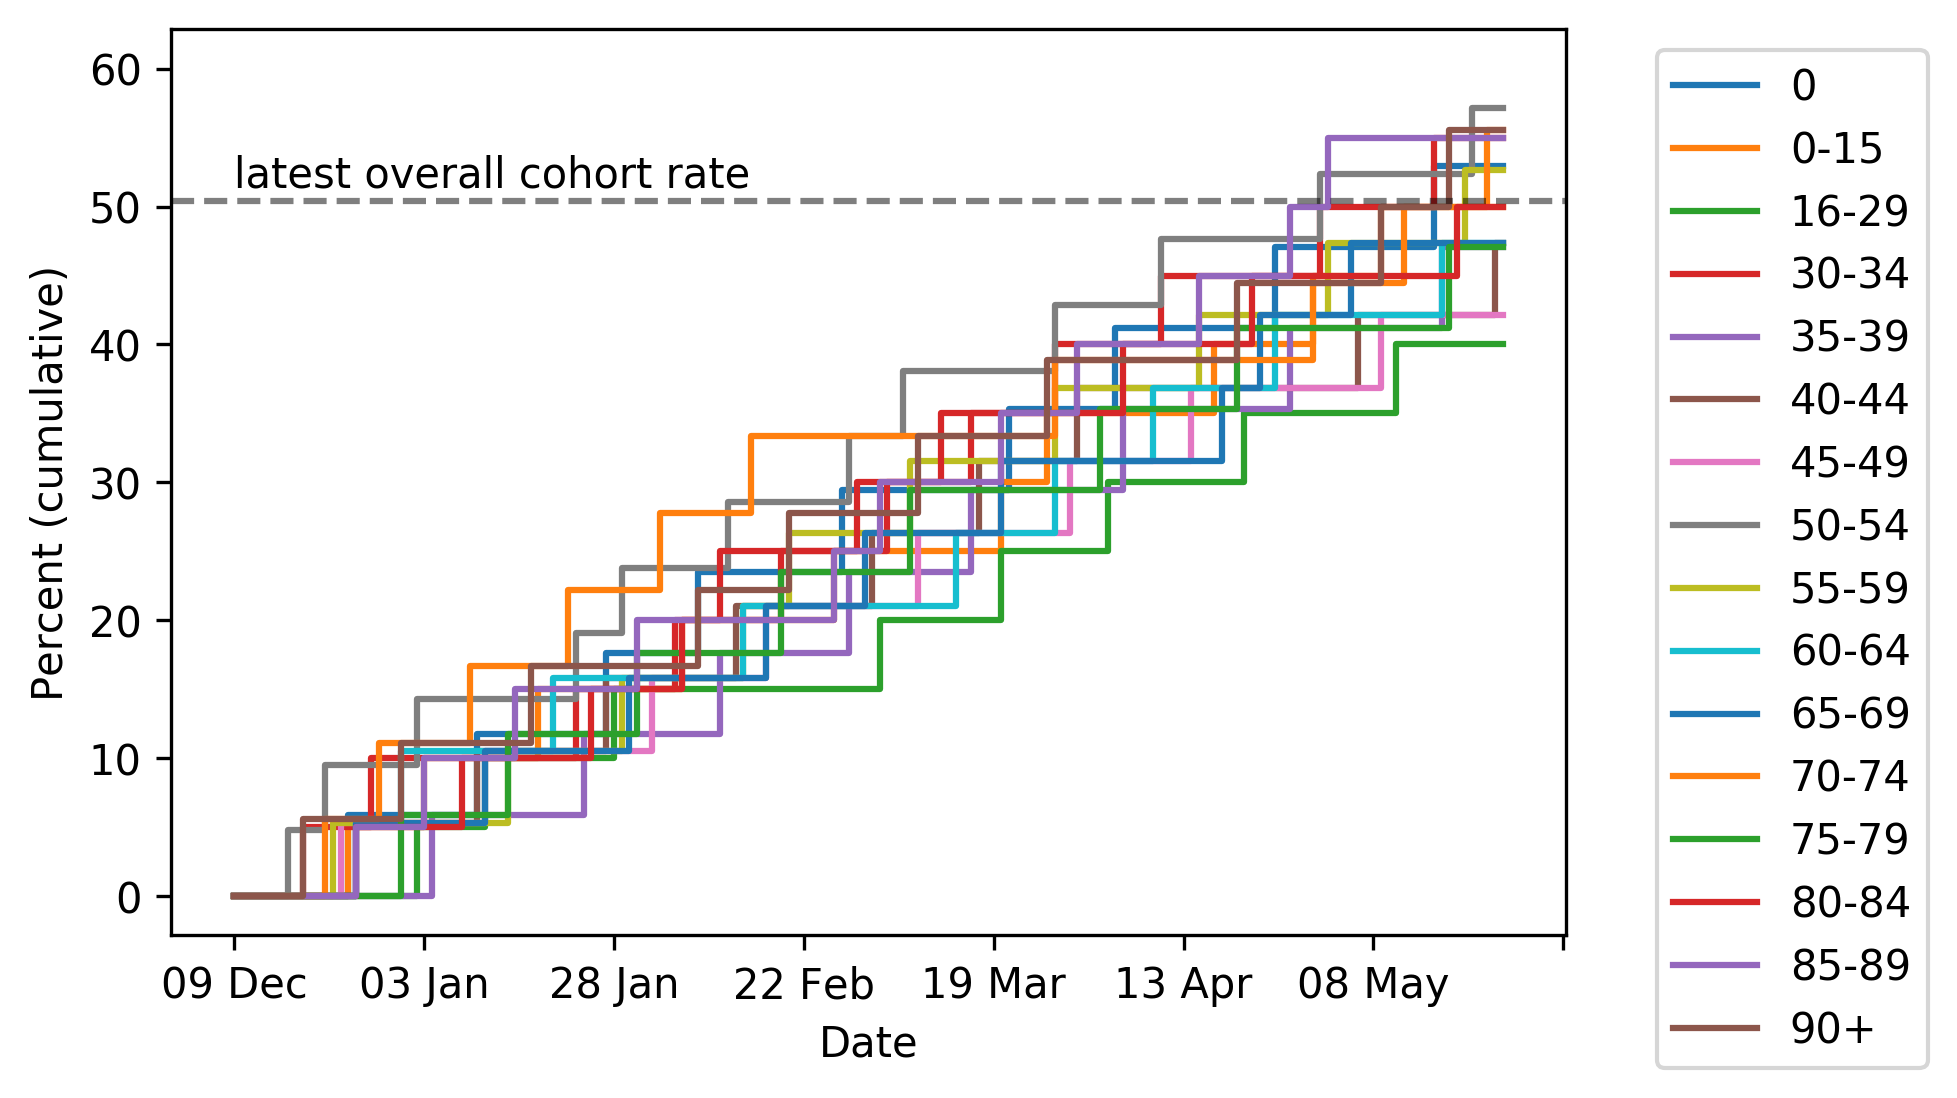

In [4]:
chartlist = find_and_sort_filenames(foldername="figures", file_extension=IMAGE_FORMAT.extension)
   
display(Markdown("## 80+ population"))
for item in chartlist:
    show_chart(item, IMAGE_FORMAT)

# 
## Trends in vaccination rates of **70-79** population according to demographic/clinical features, cumulatively by day. <a name='charts70' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**
    

## 70-79 population

### COVID vaccinations among 70-79 population
 ### by Sex

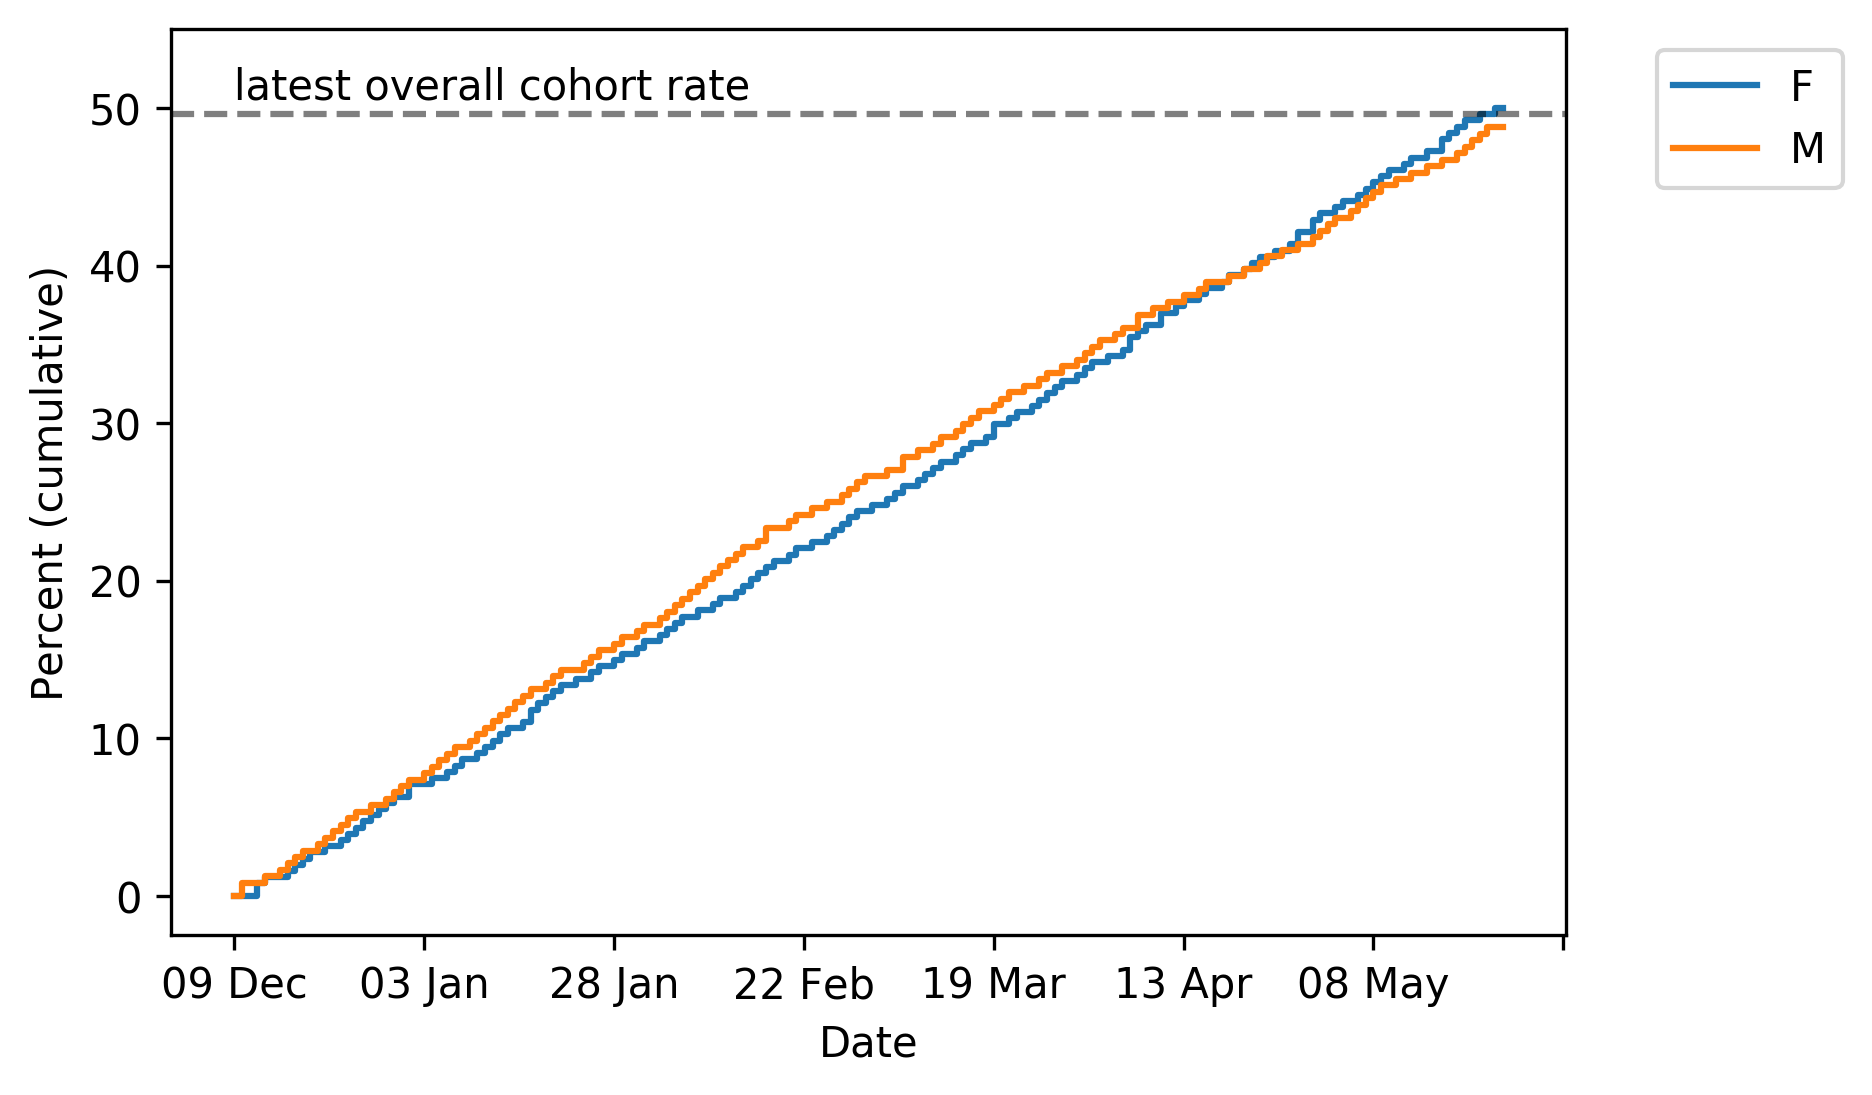

### COVID vaccinations among 70-79 population
 ### by Ethnicity (broad categories)

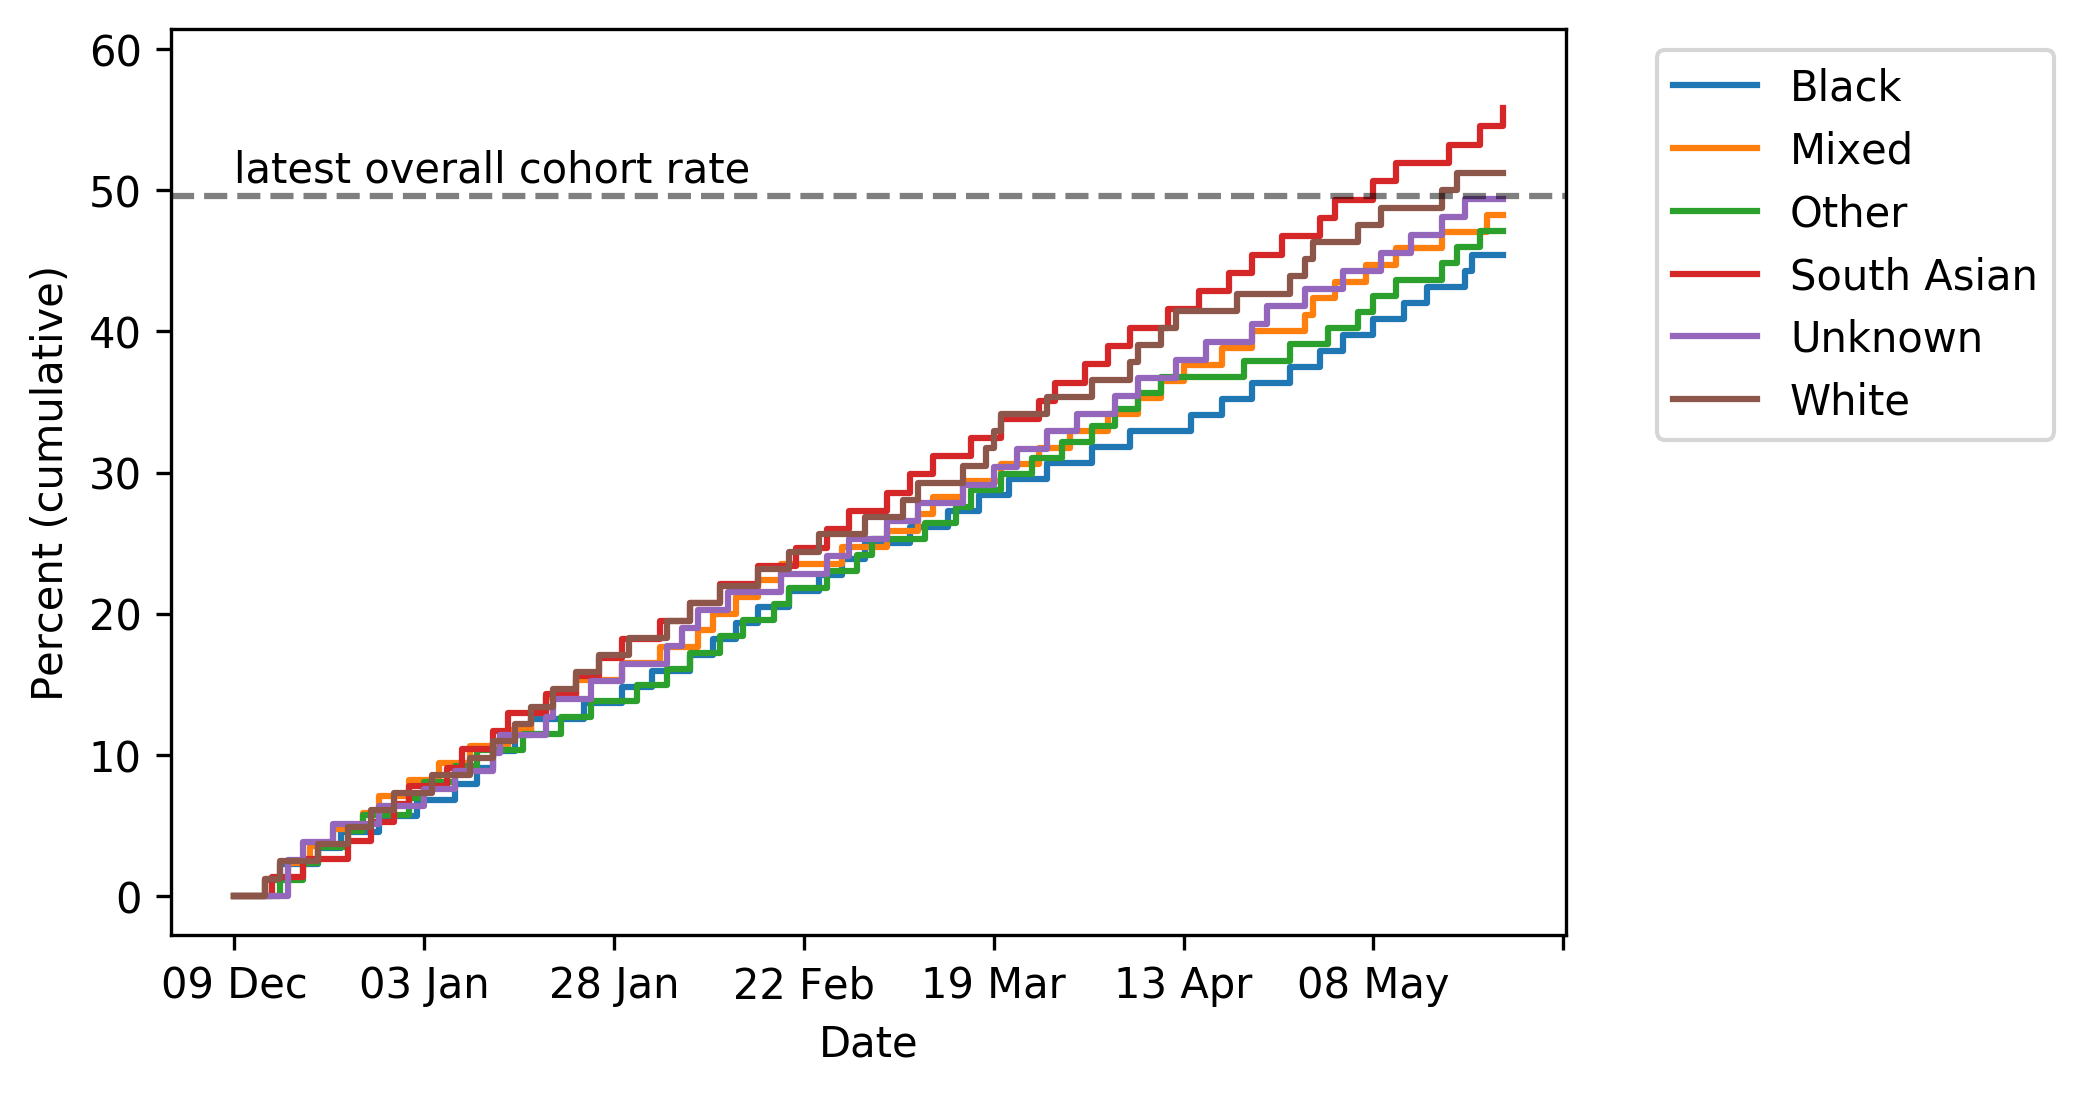

### COVID vaccinations among 70-79 population
 ### by Index of Multiple Deprivation (quintiles)

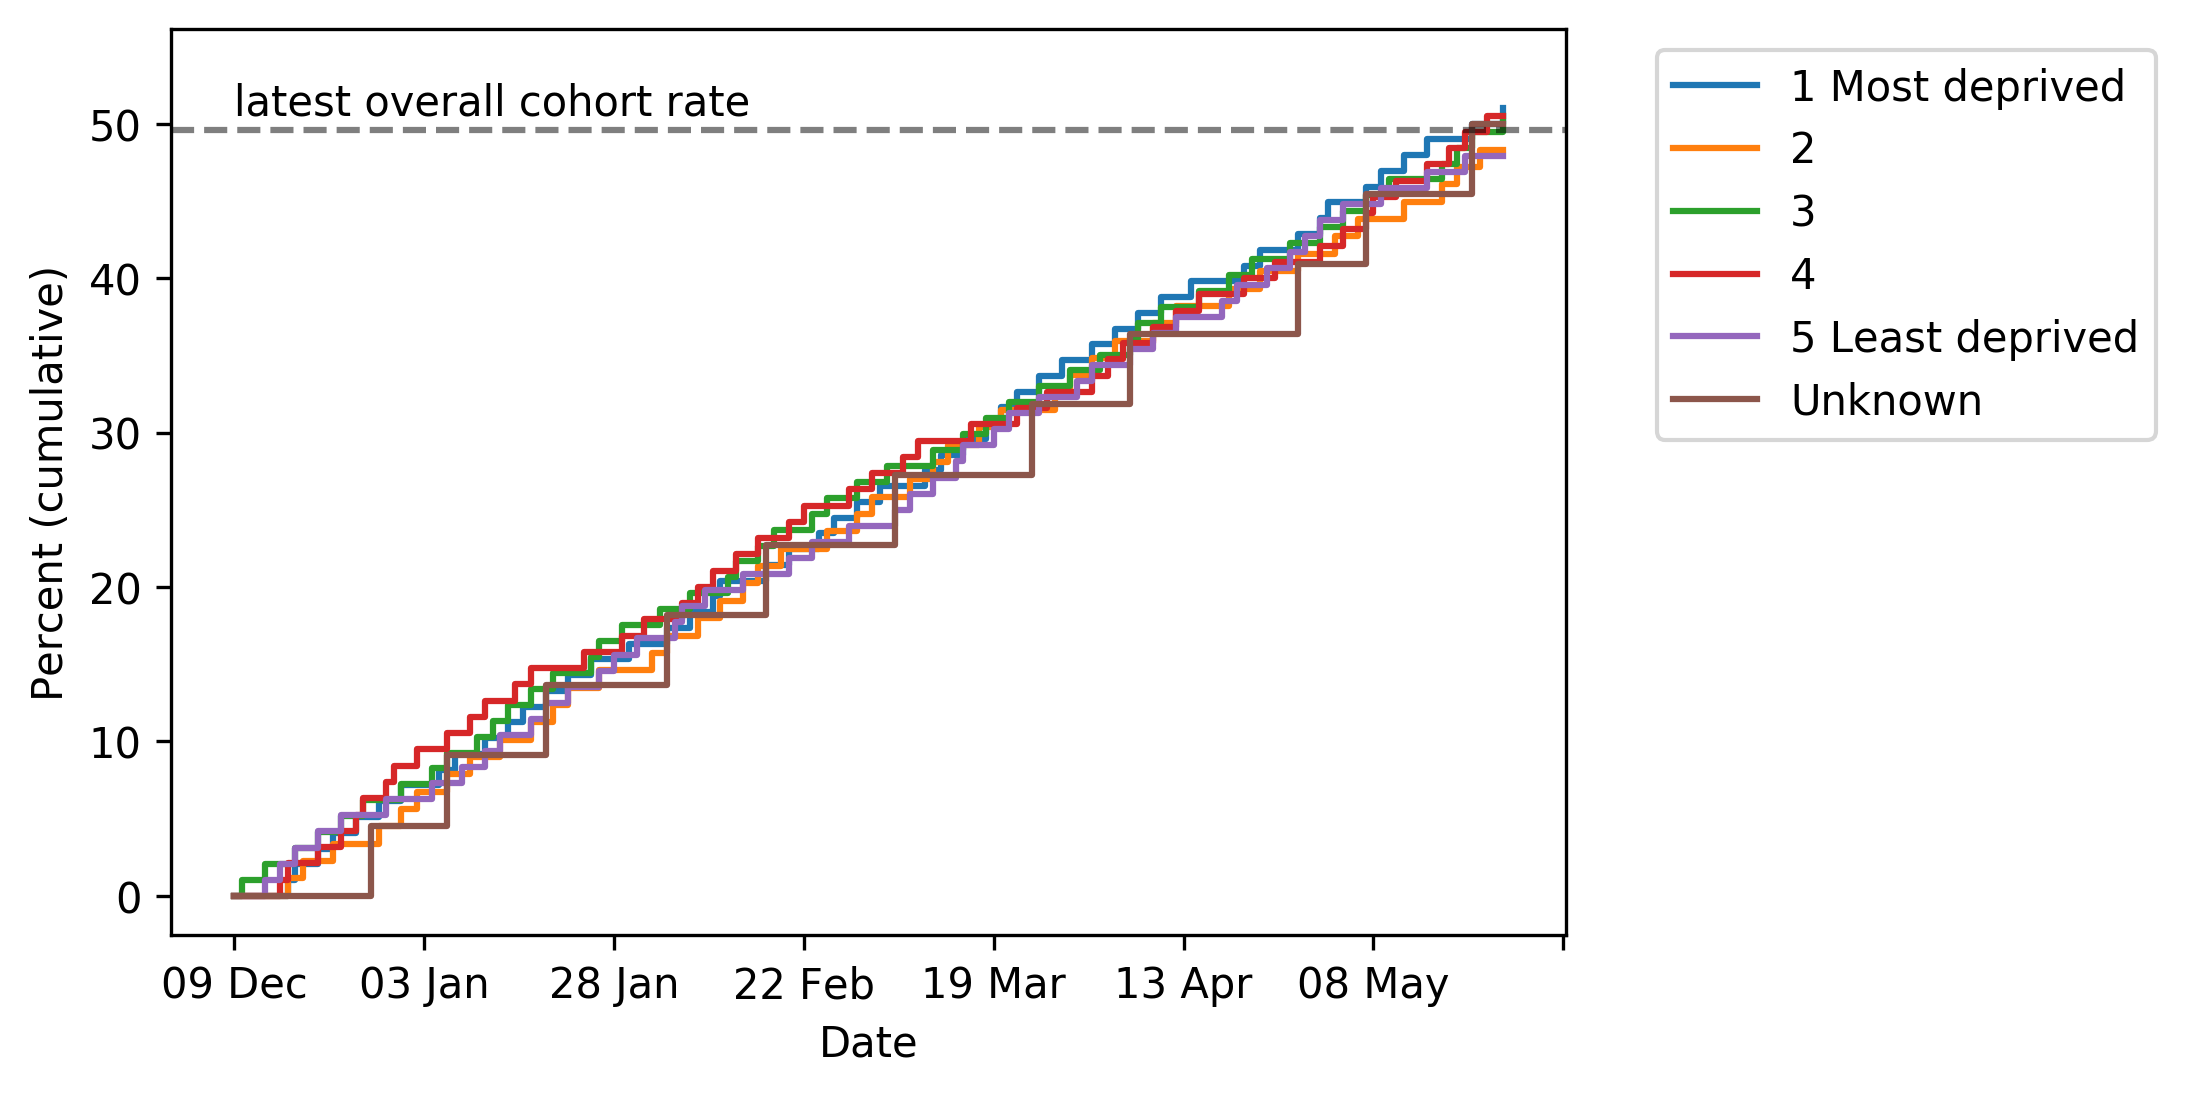

### COVID vaccinations among 70-79 population
 ### by BMI

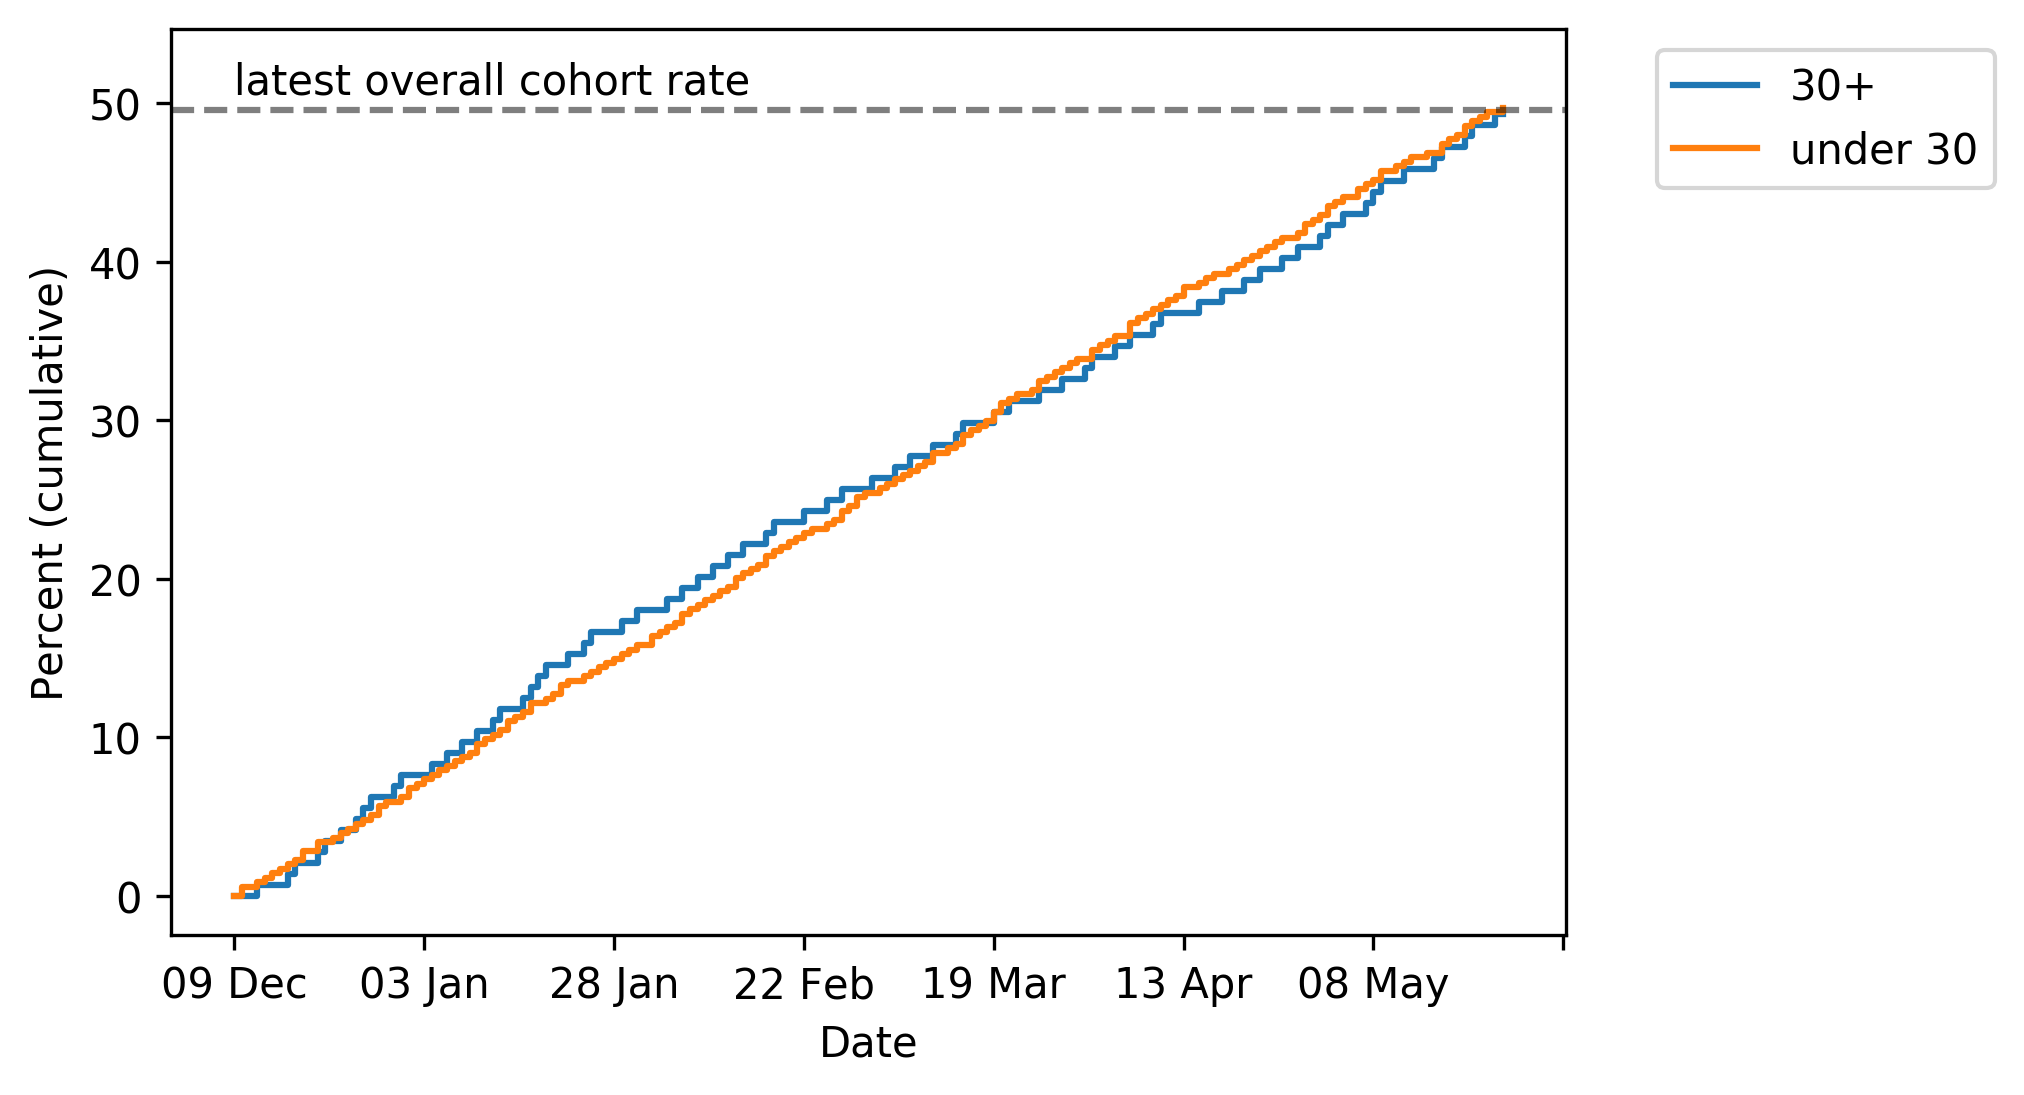

### COVID vaccinations among 70-79 population
 ### by Chronic cardiac disease

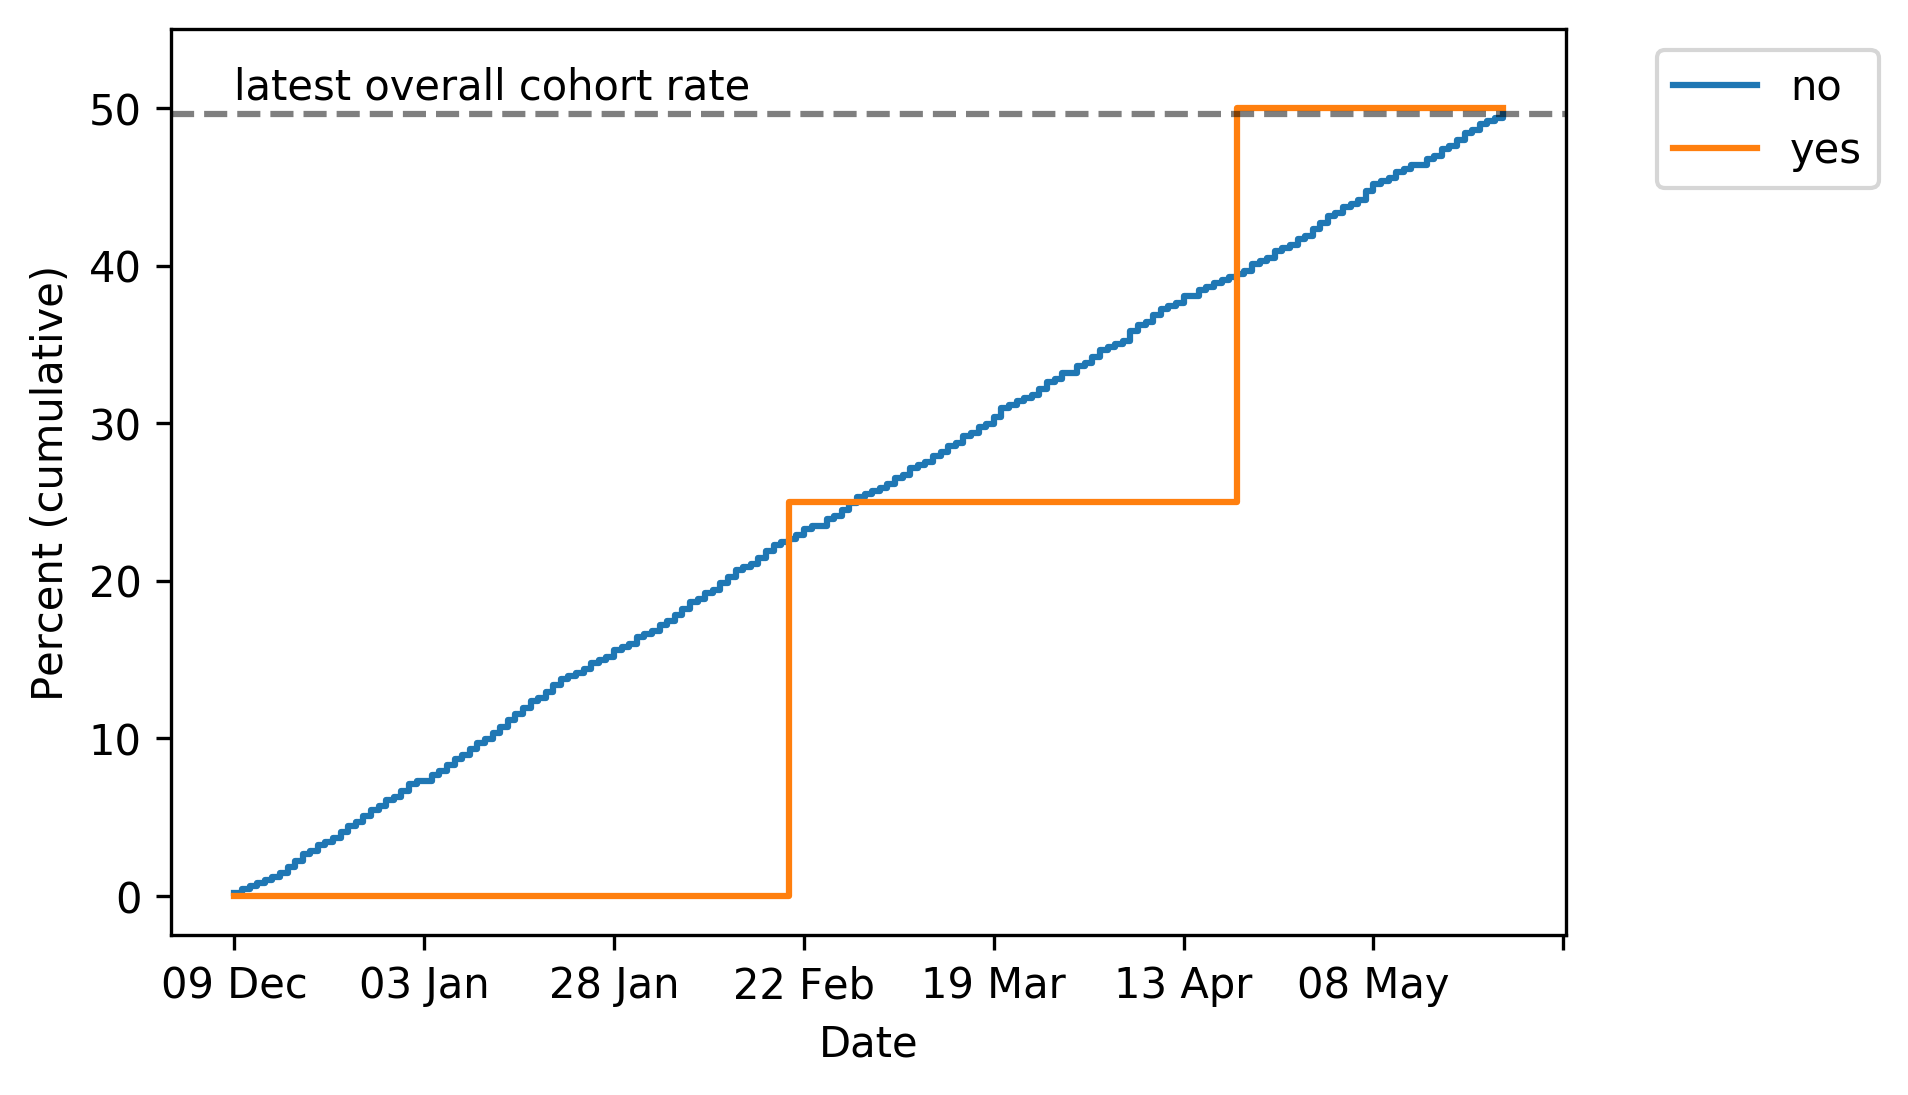

### COVID vaccinations among 70-79 population
 ### by Current COPD

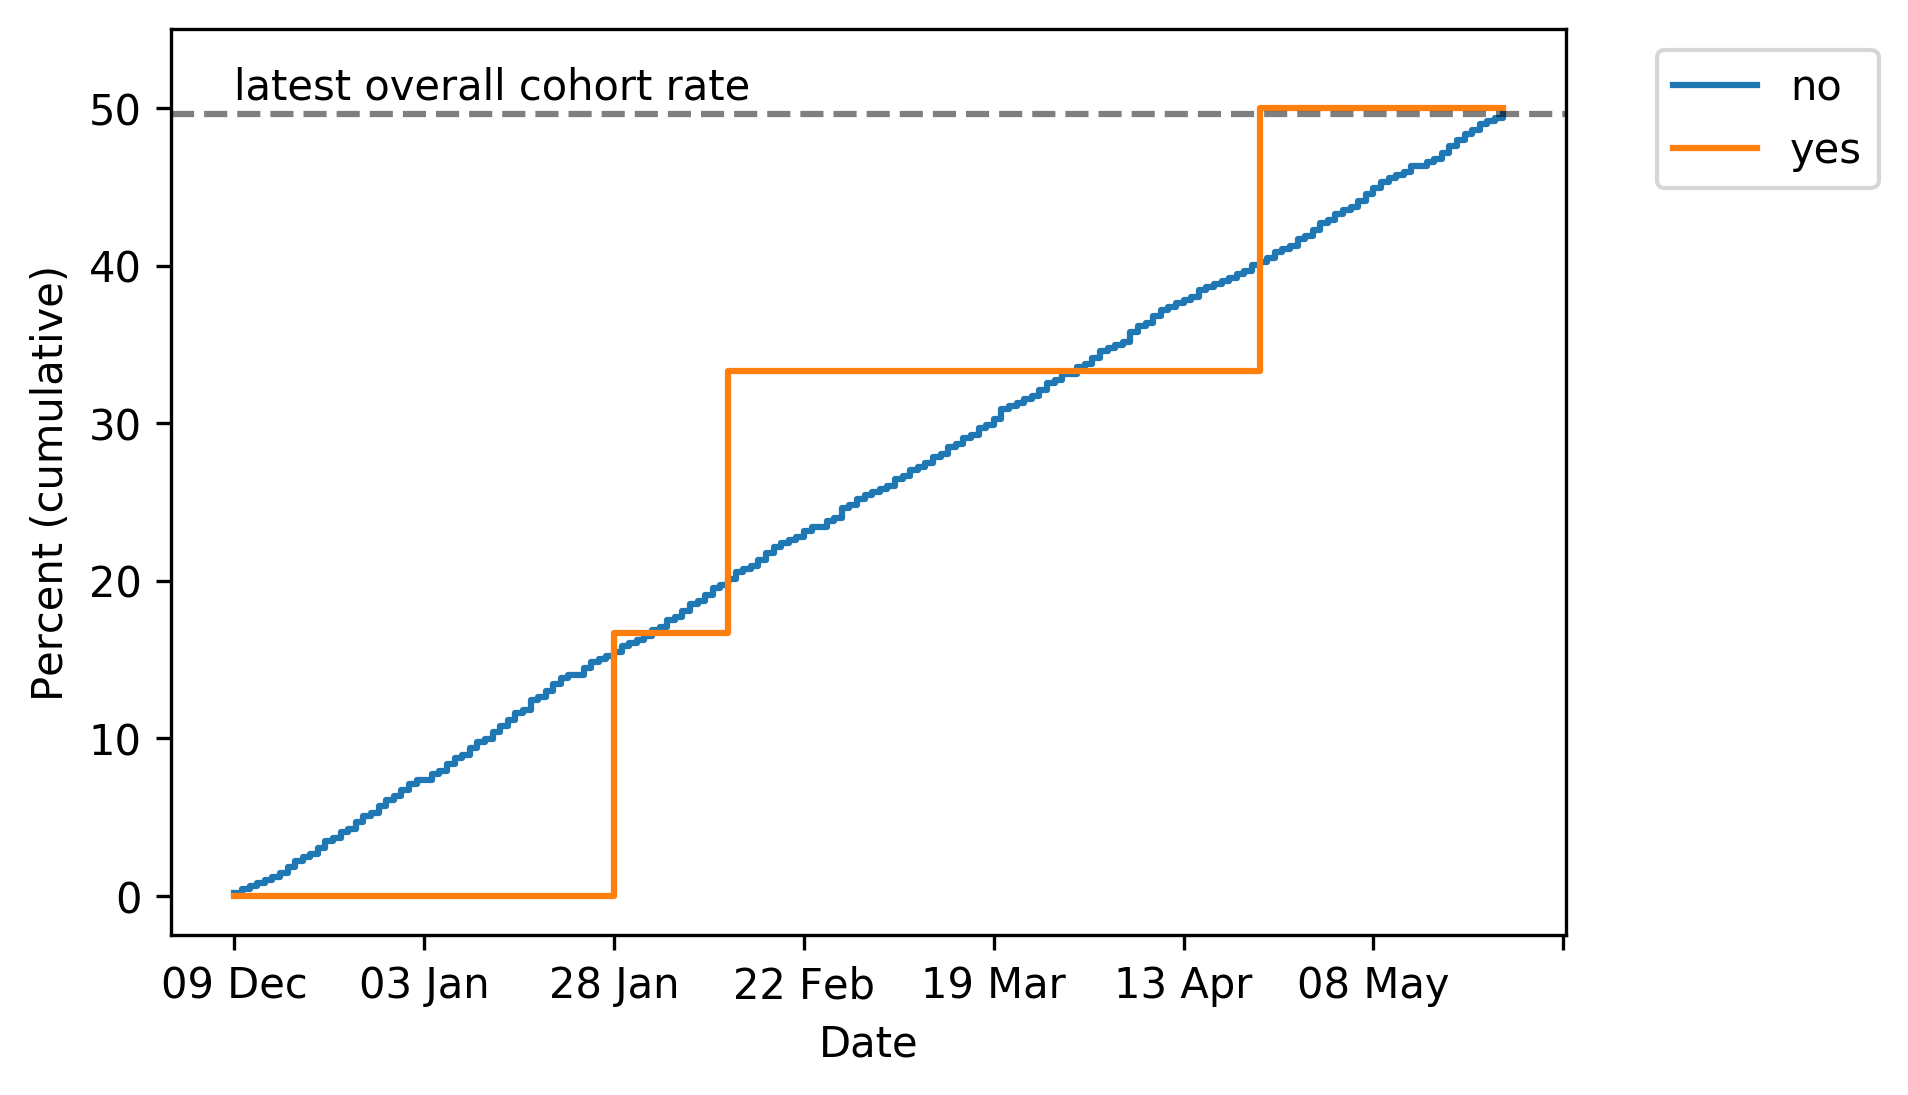

### COVID vaccinations among 70-79 population
 ### by Dialysis

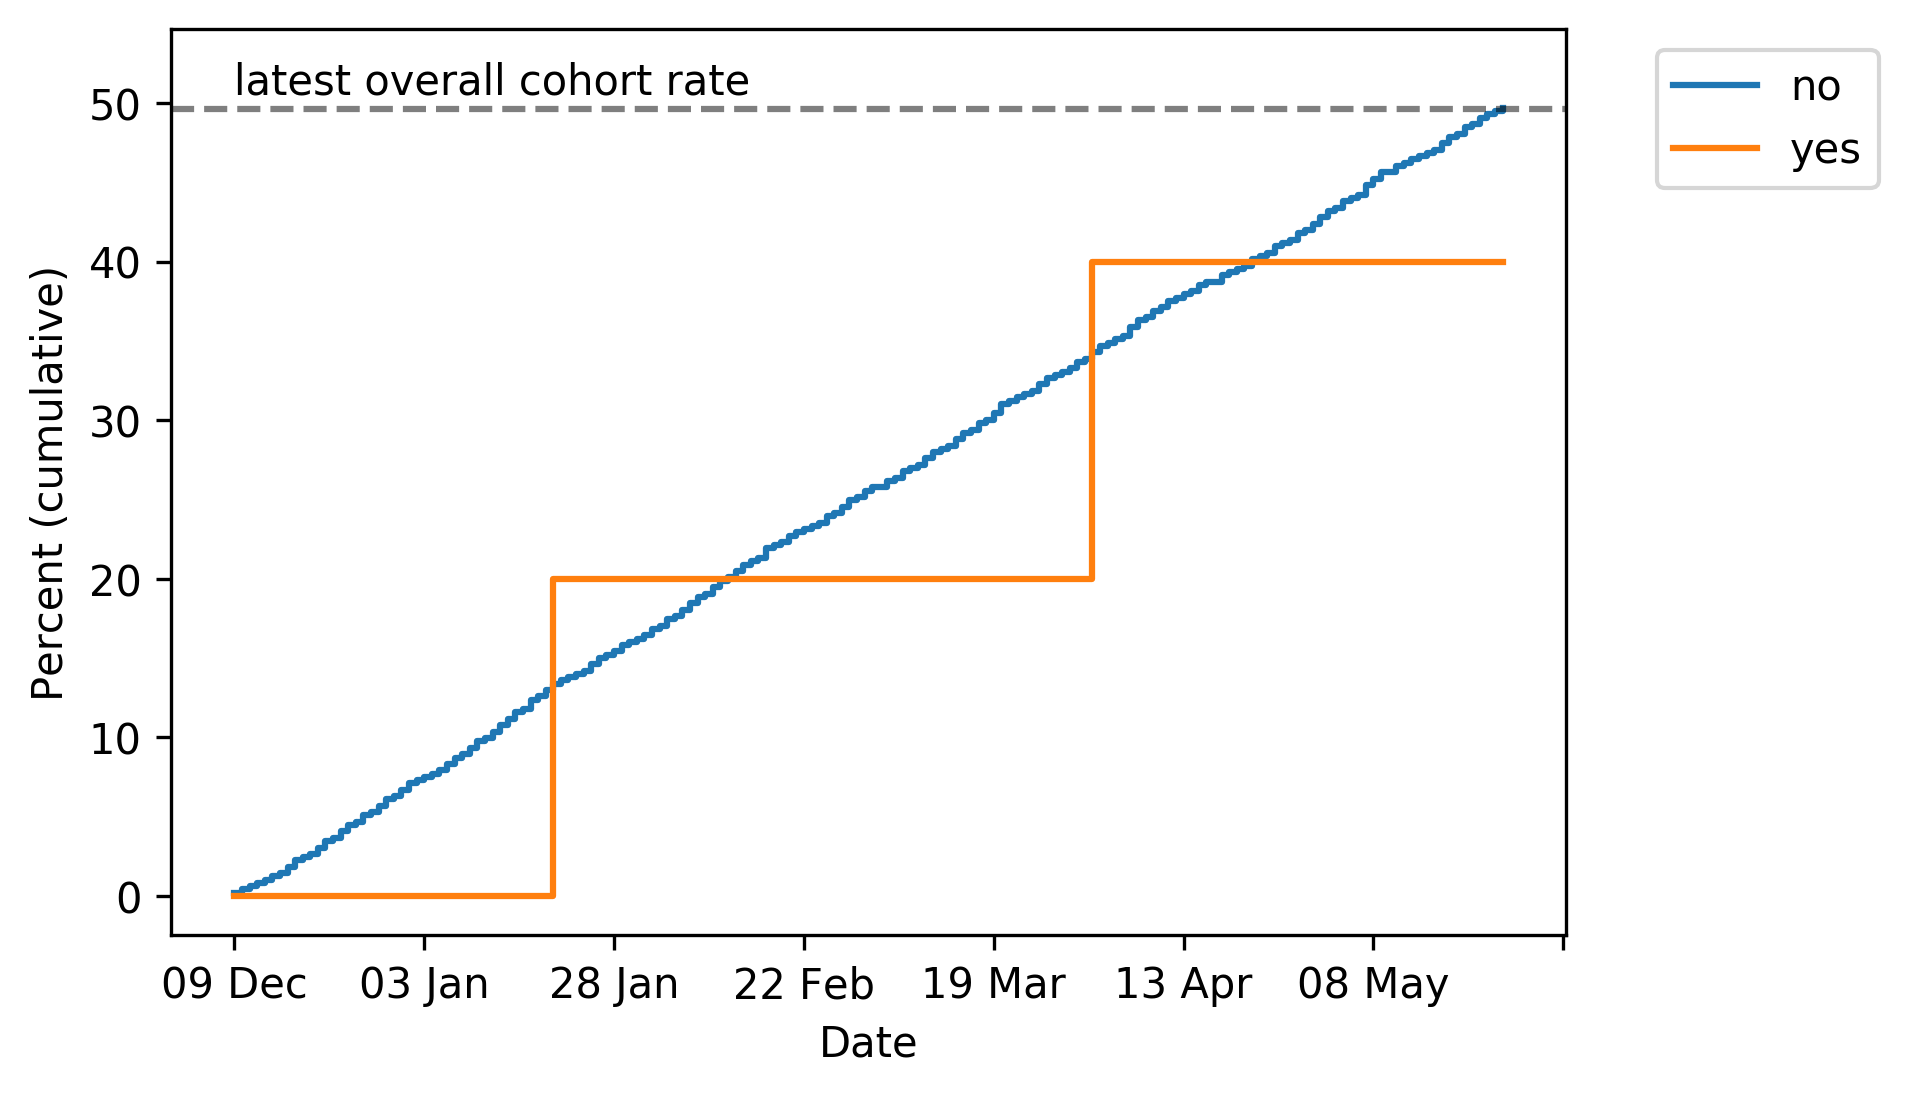

### COVID vaccinations among 70-79 population
 ### by Dementia

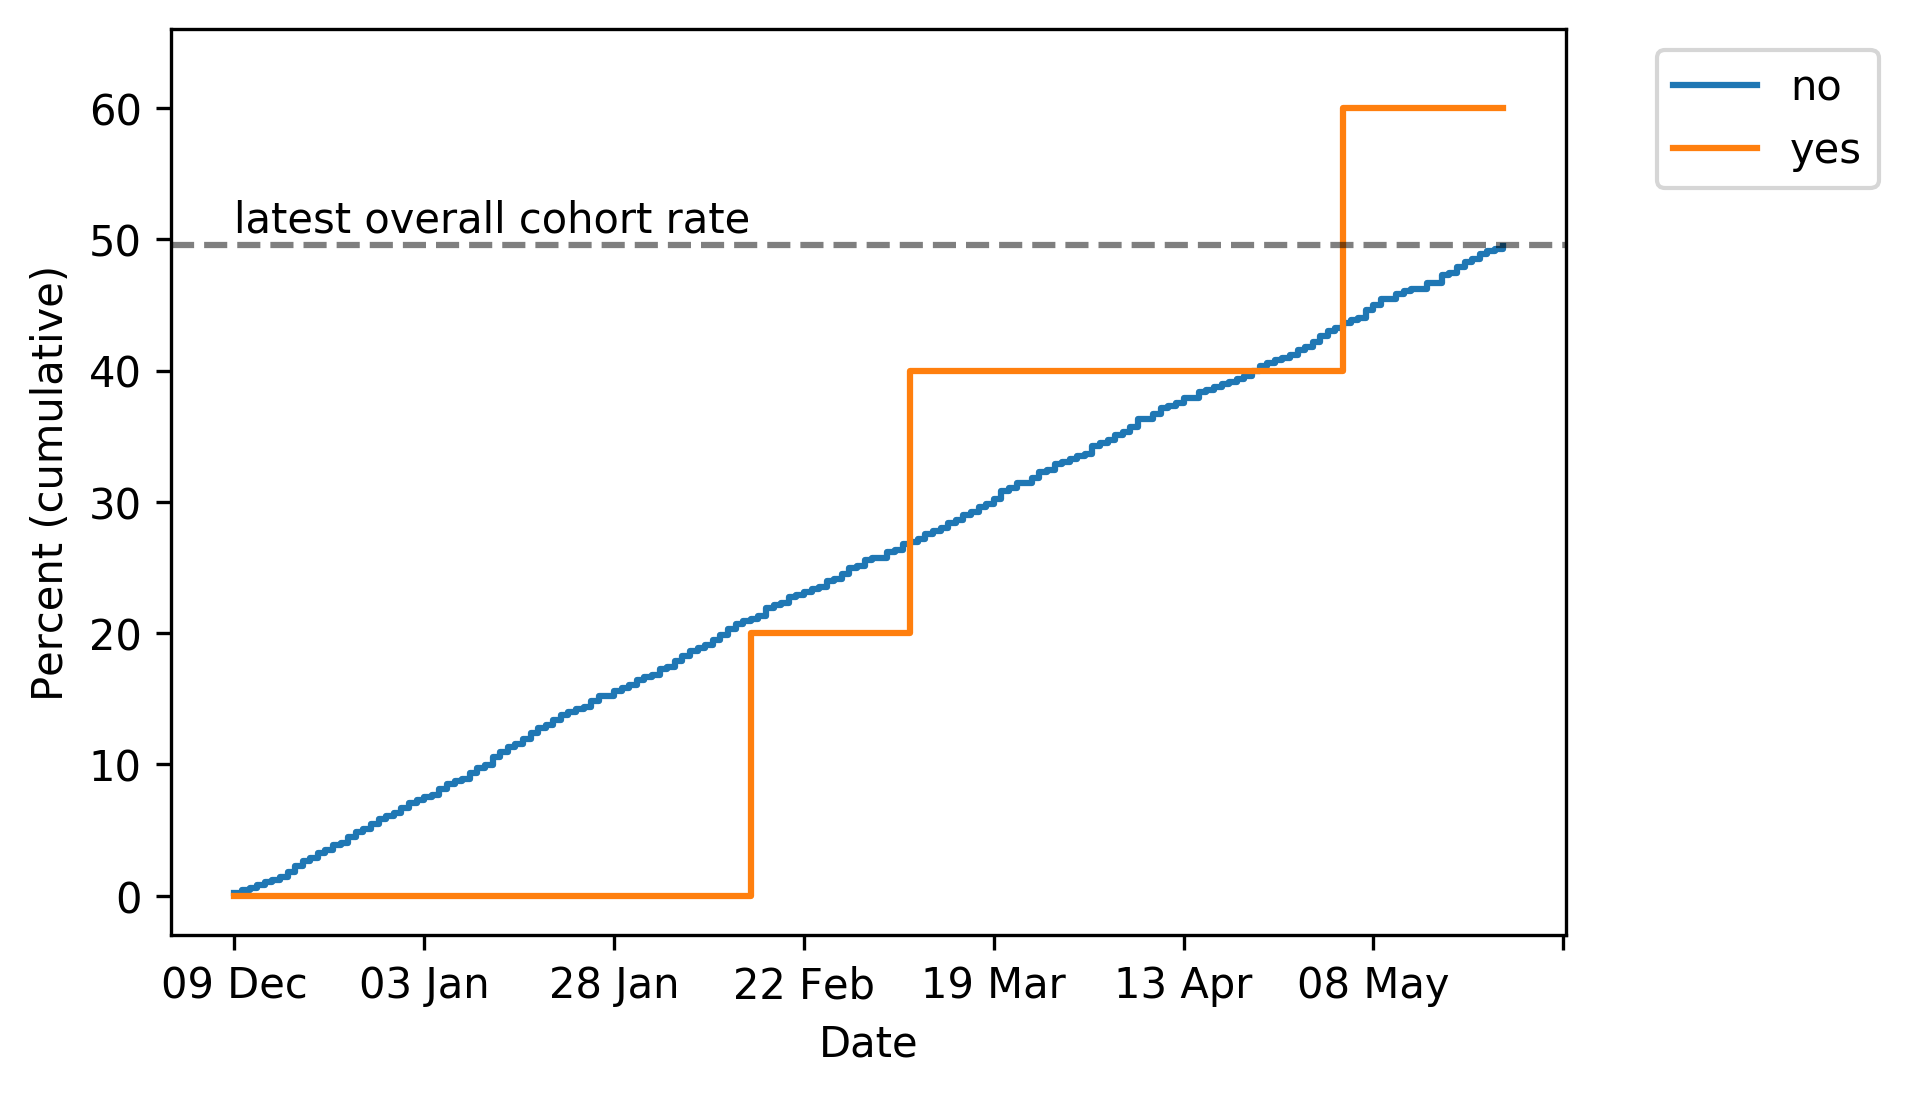

### COVID vaccinations among 70-79 population
 ### by Learning disability

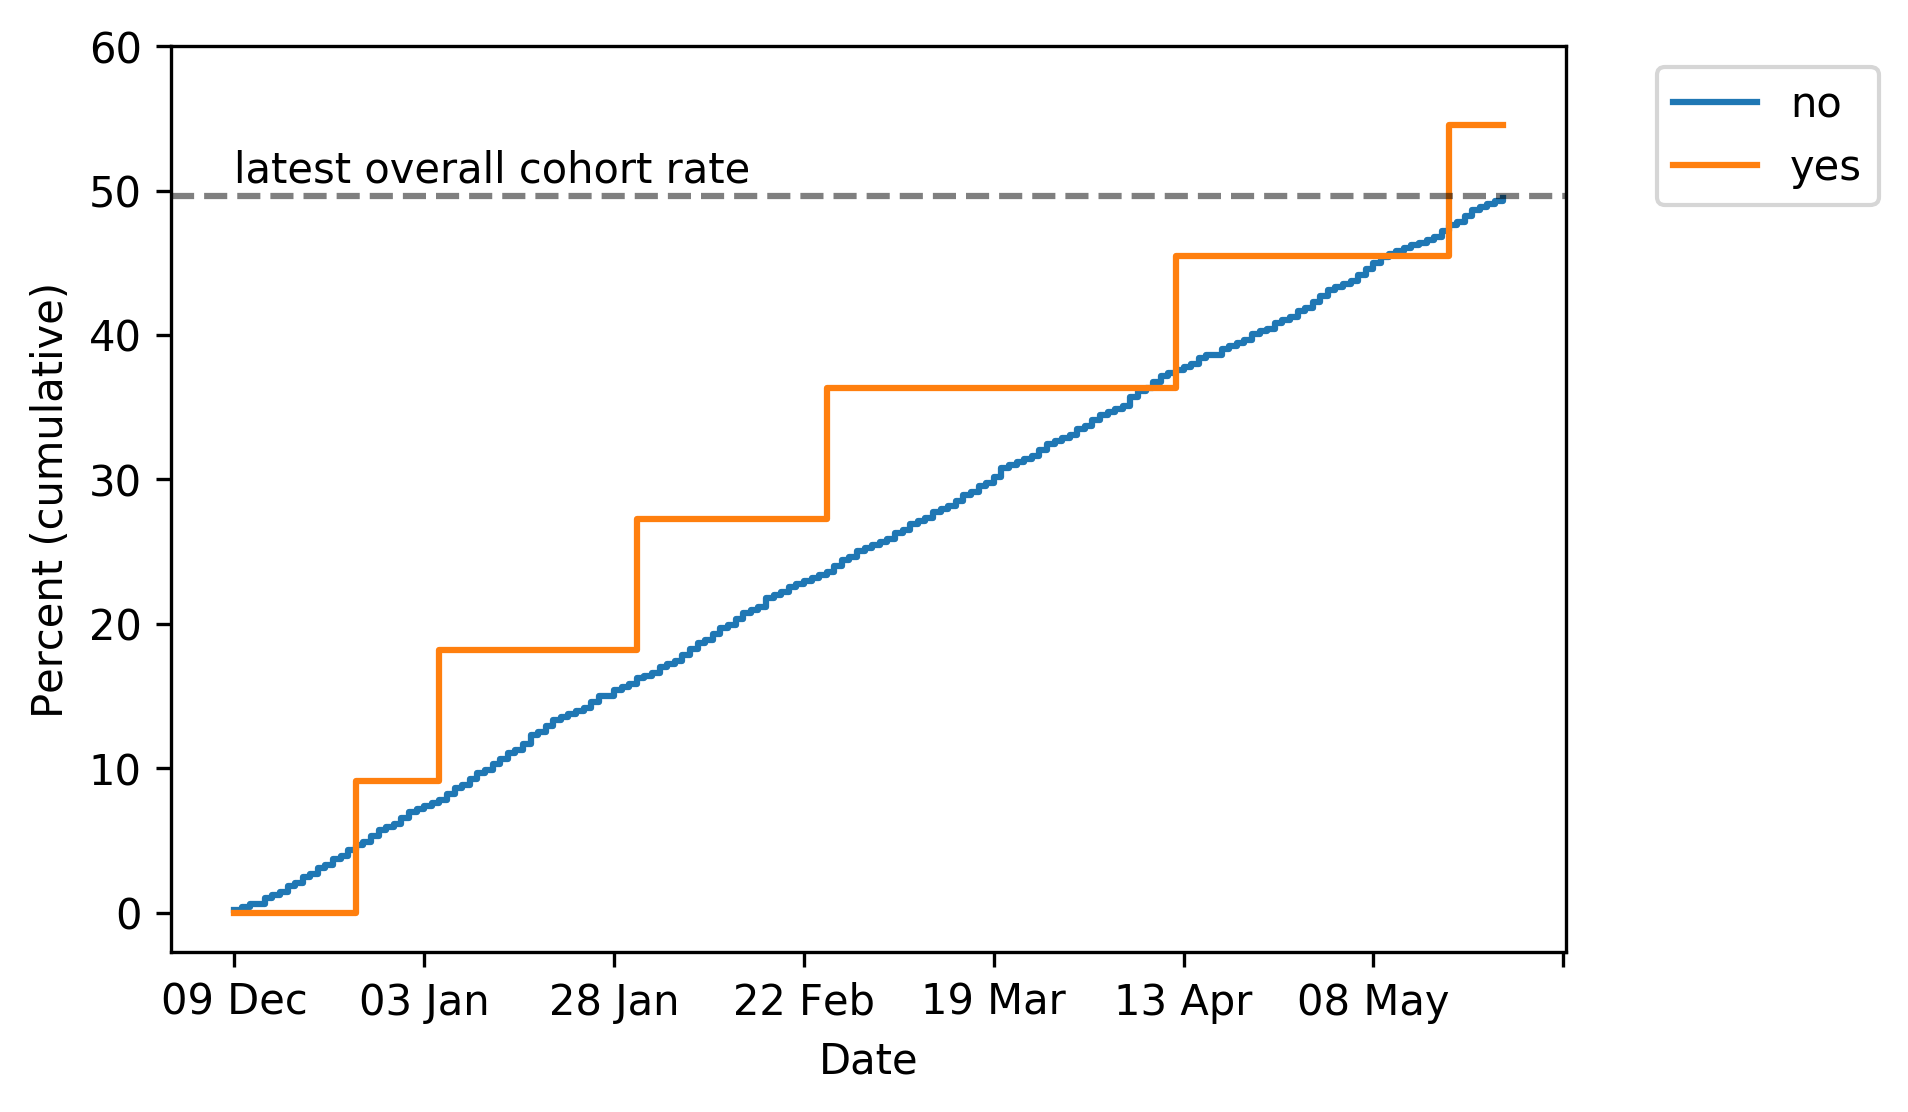

### COVID vaccinations among 70-79 population
 ### by Psychosis, schizophrenia, or bipolar

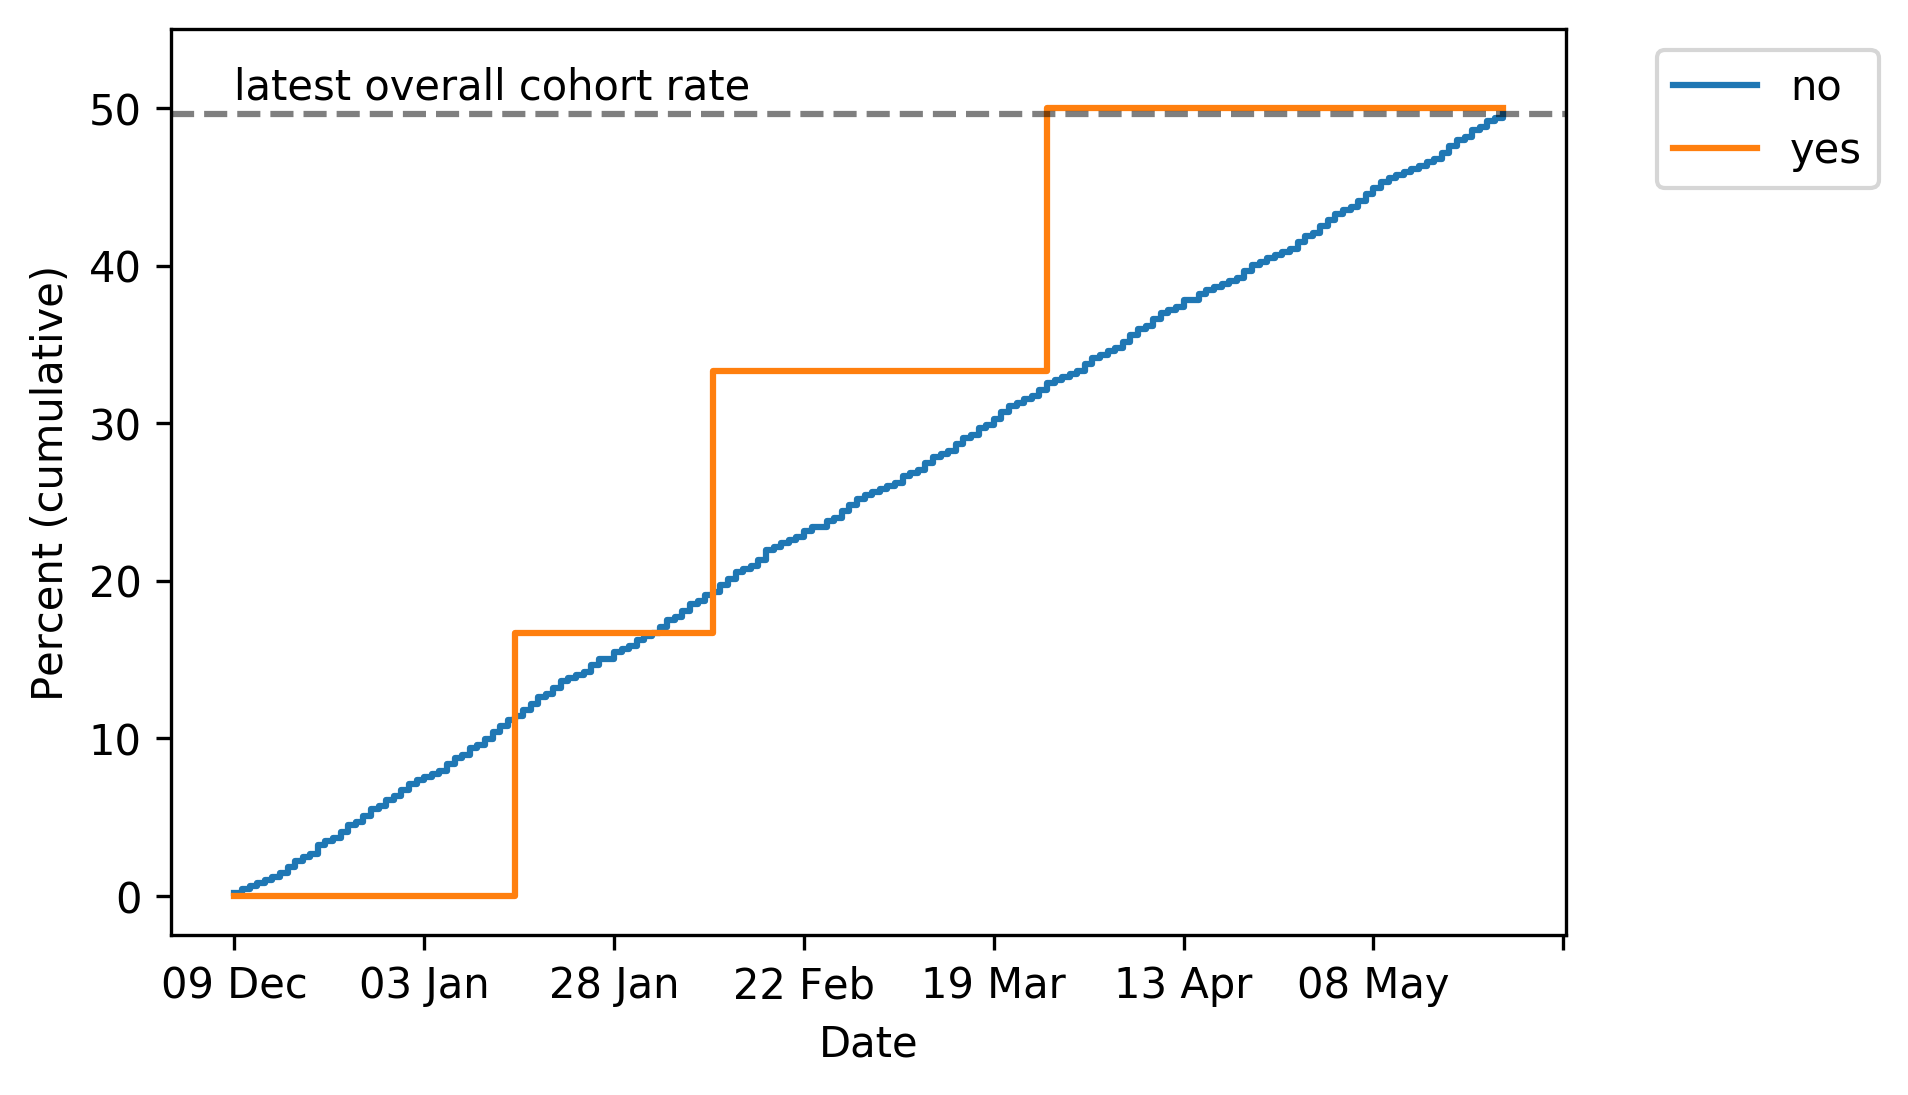

### COVID vaccinations among 70-79 population
 ### by SSRI (last 12 months)

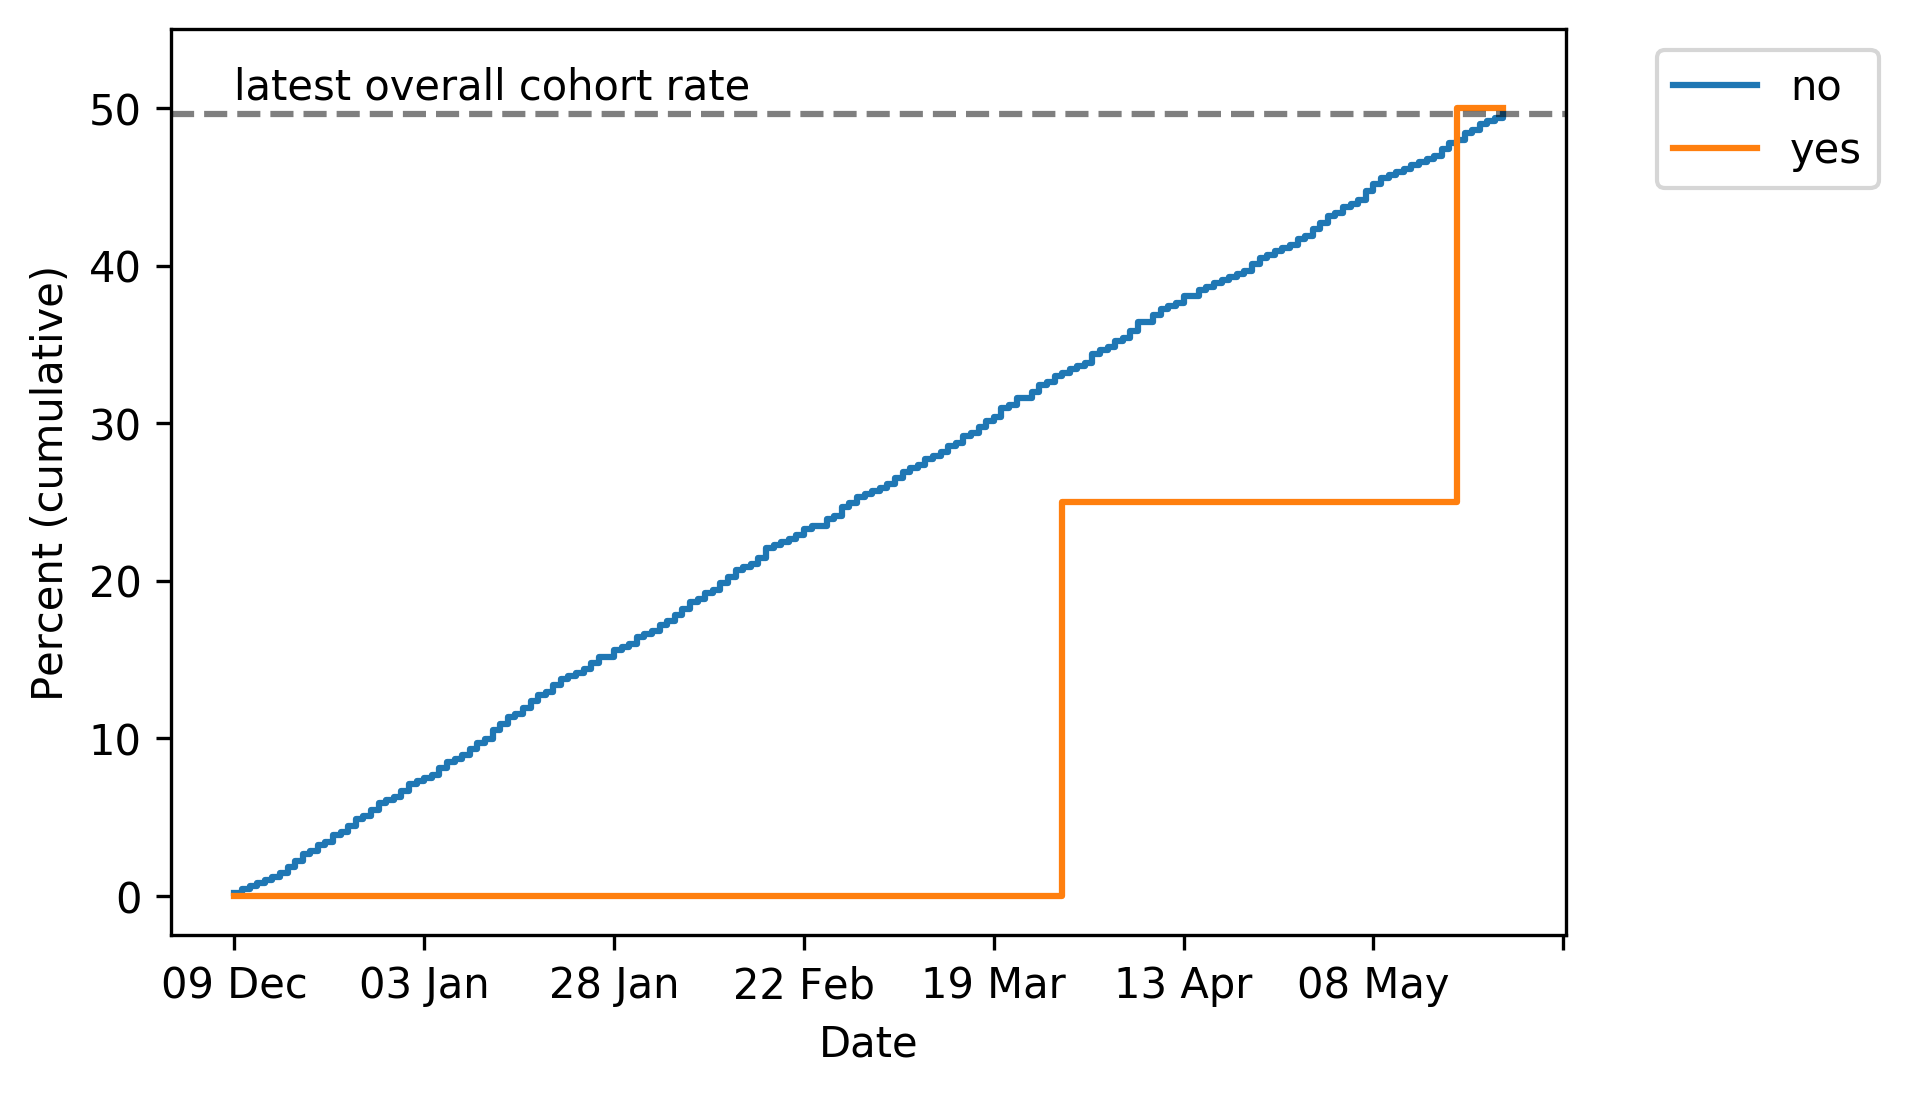

### COVID vaccinations among 70-79 population
 ### by Age band

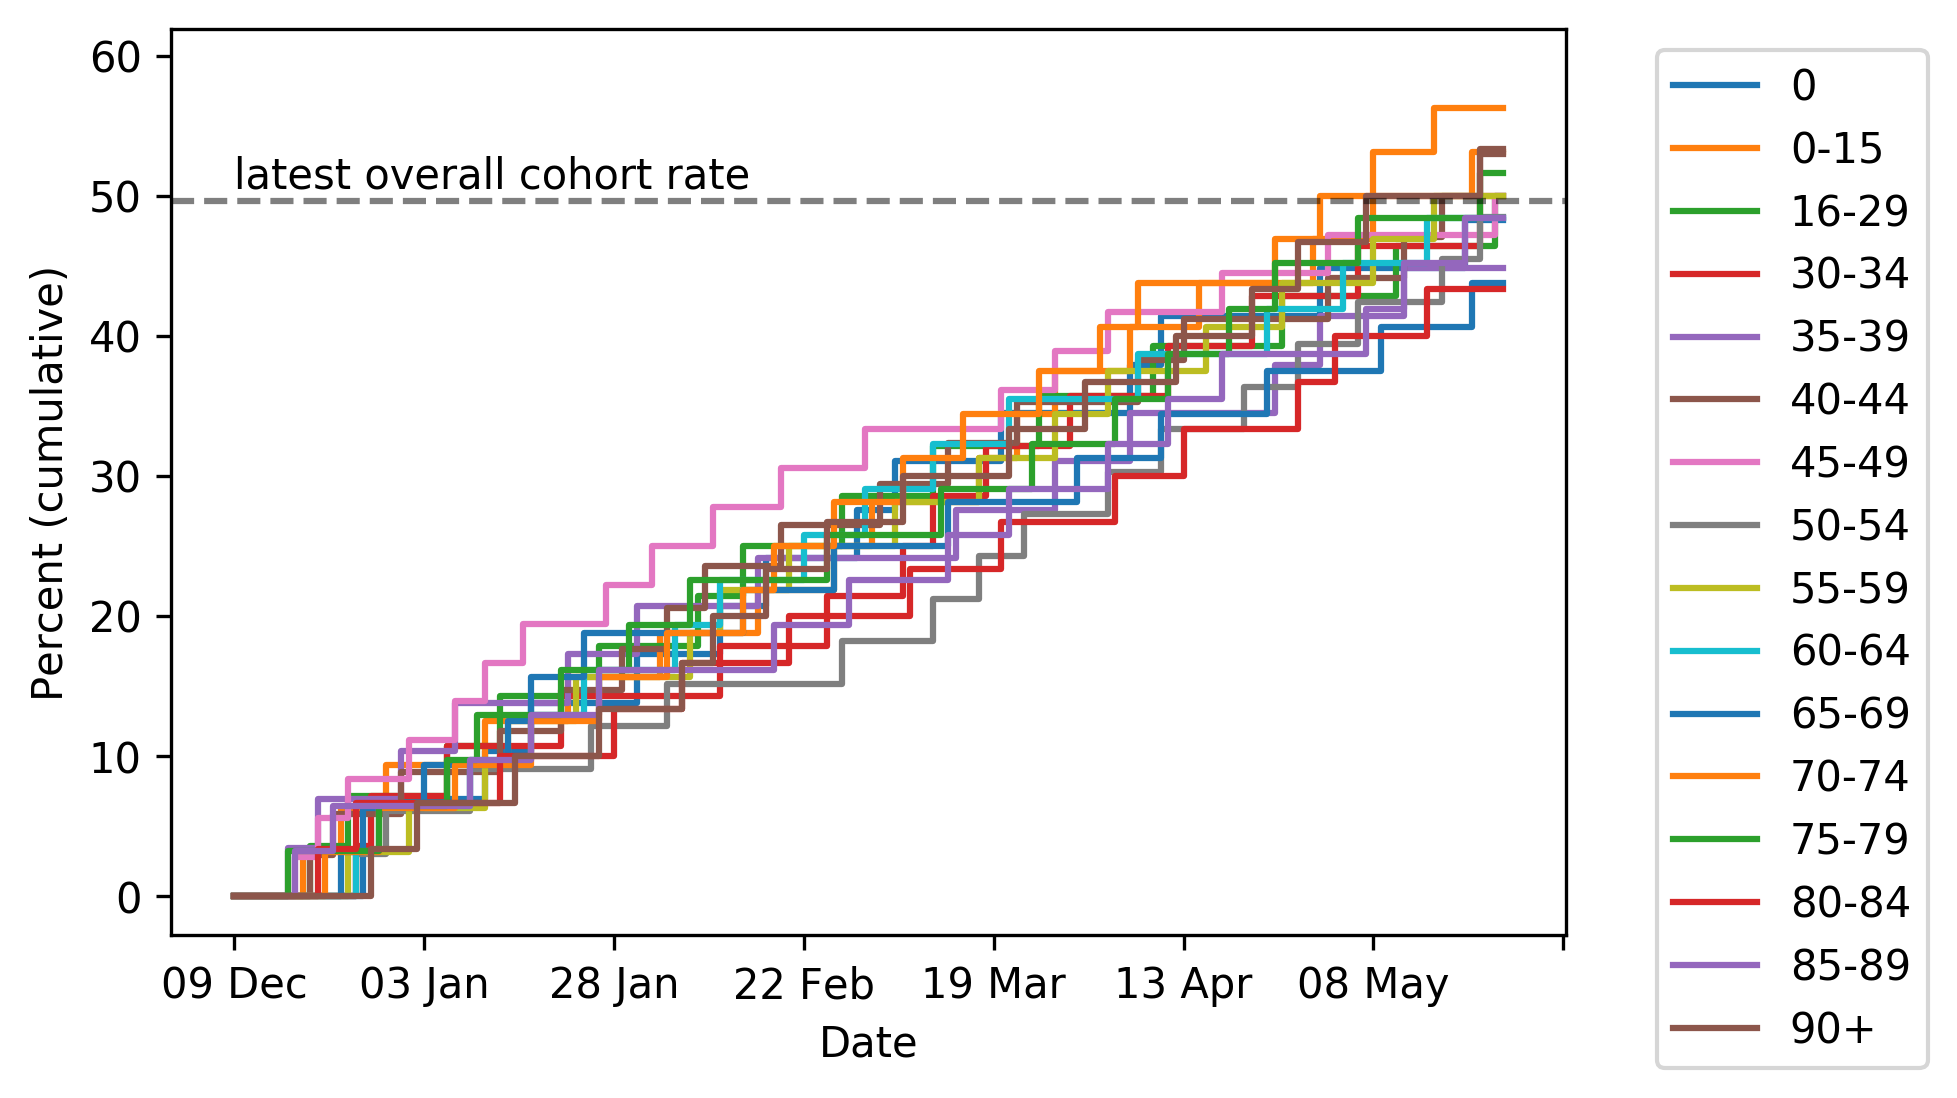

In [5]:
display(Markdown("## 70-79 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="70-79", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of **shielding** population according to demographic/clinical features, cumulatively by day. <a name='charts_shield' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**


## Shielding population (aged 16-69)

### COVID vaccinations among shielding (aged 16-69) population
 ### by newly shielded since feb 15

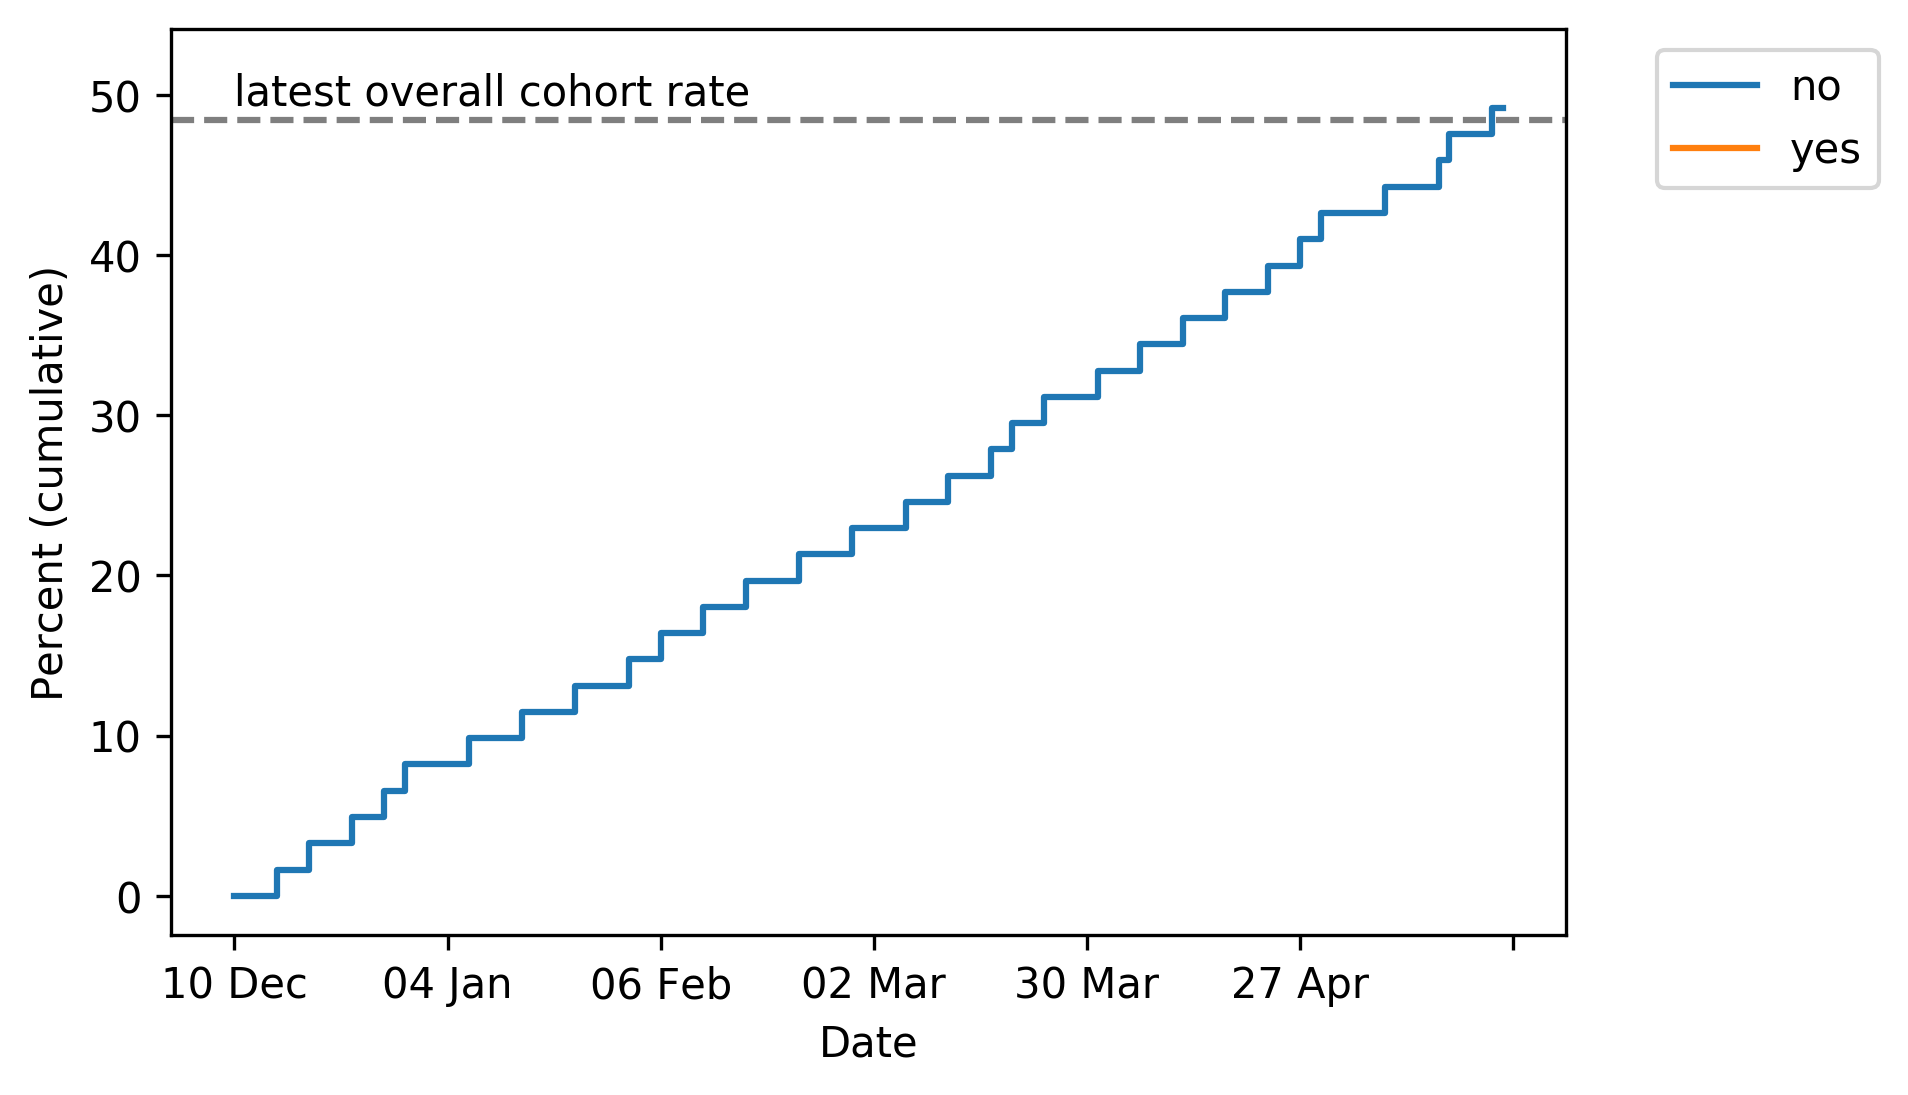

### COVID vaccinations among shielding (aged 16-69) population
 ### by Age band

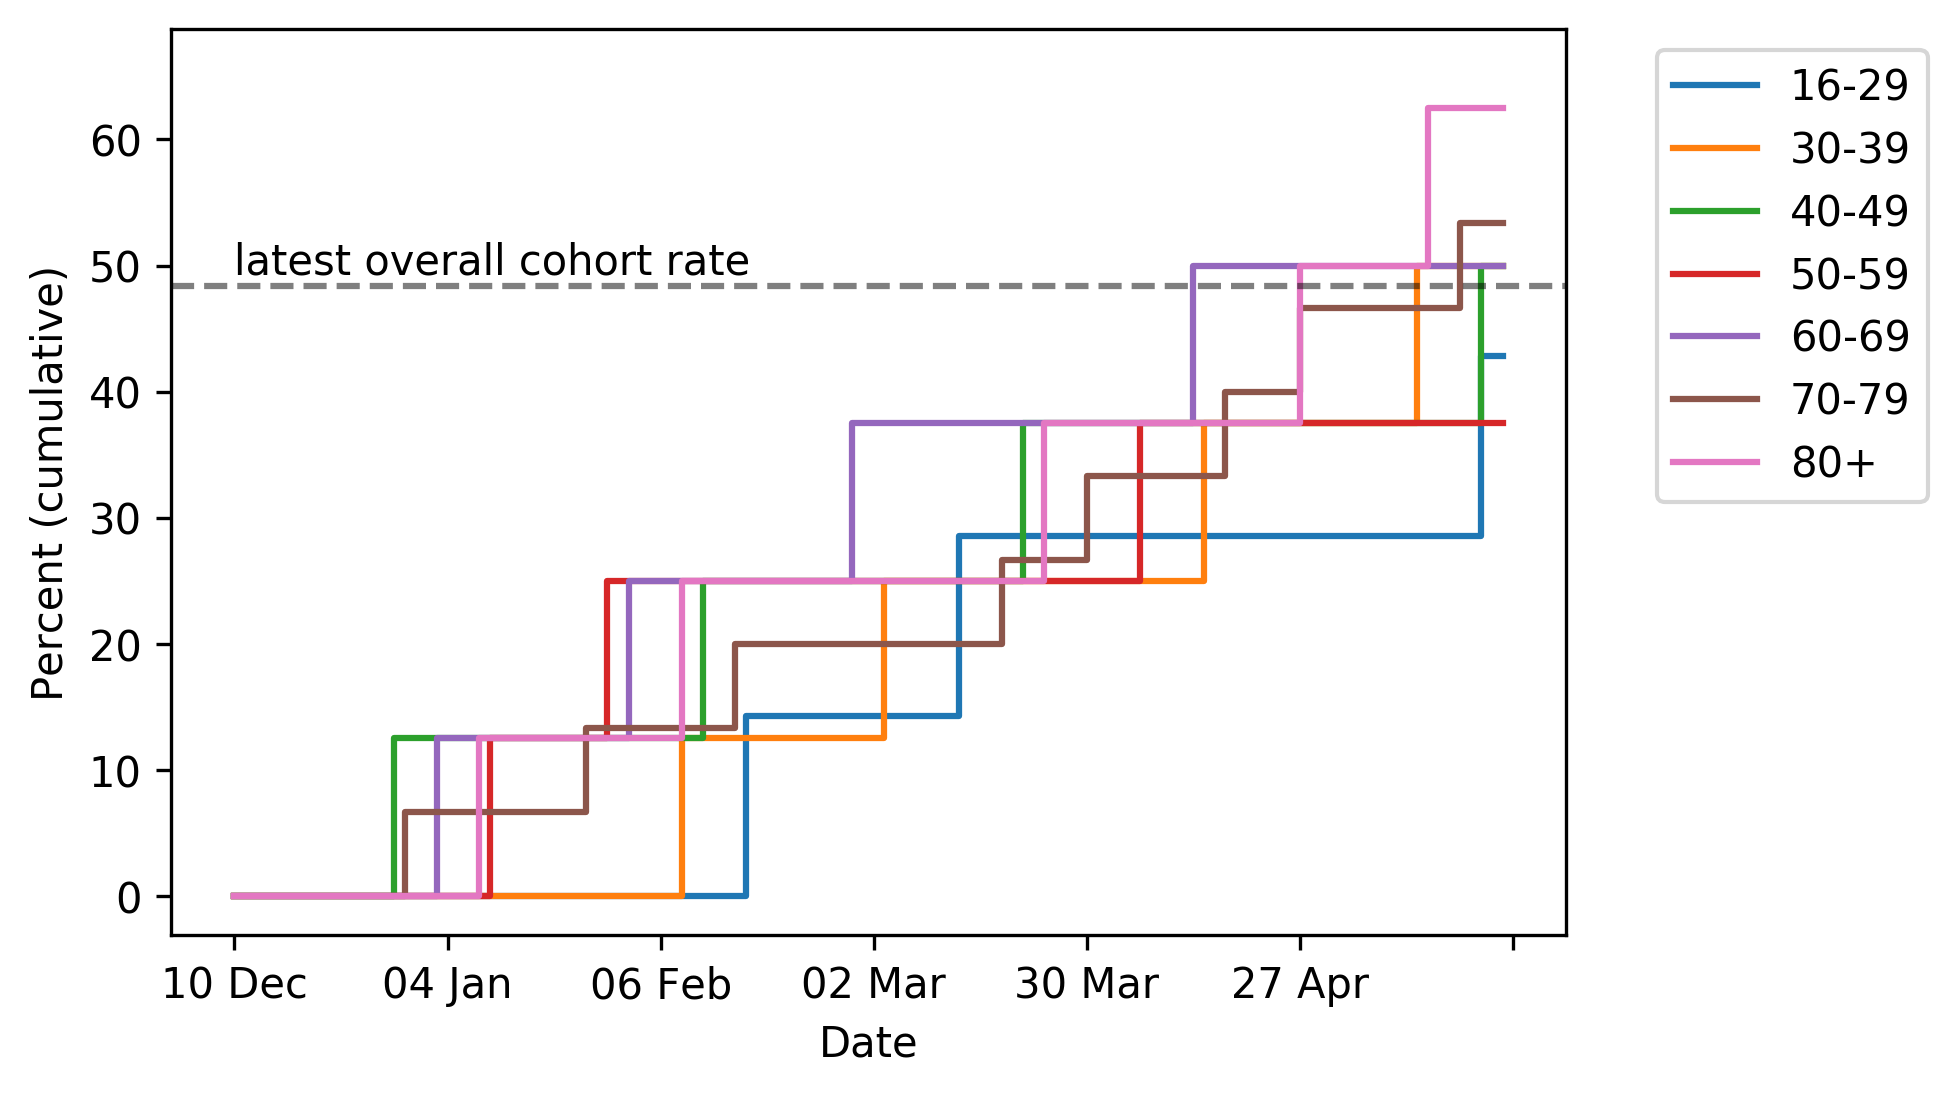

### COVID vaccinations among shielding (aged 16-69) population
 ### by Sex

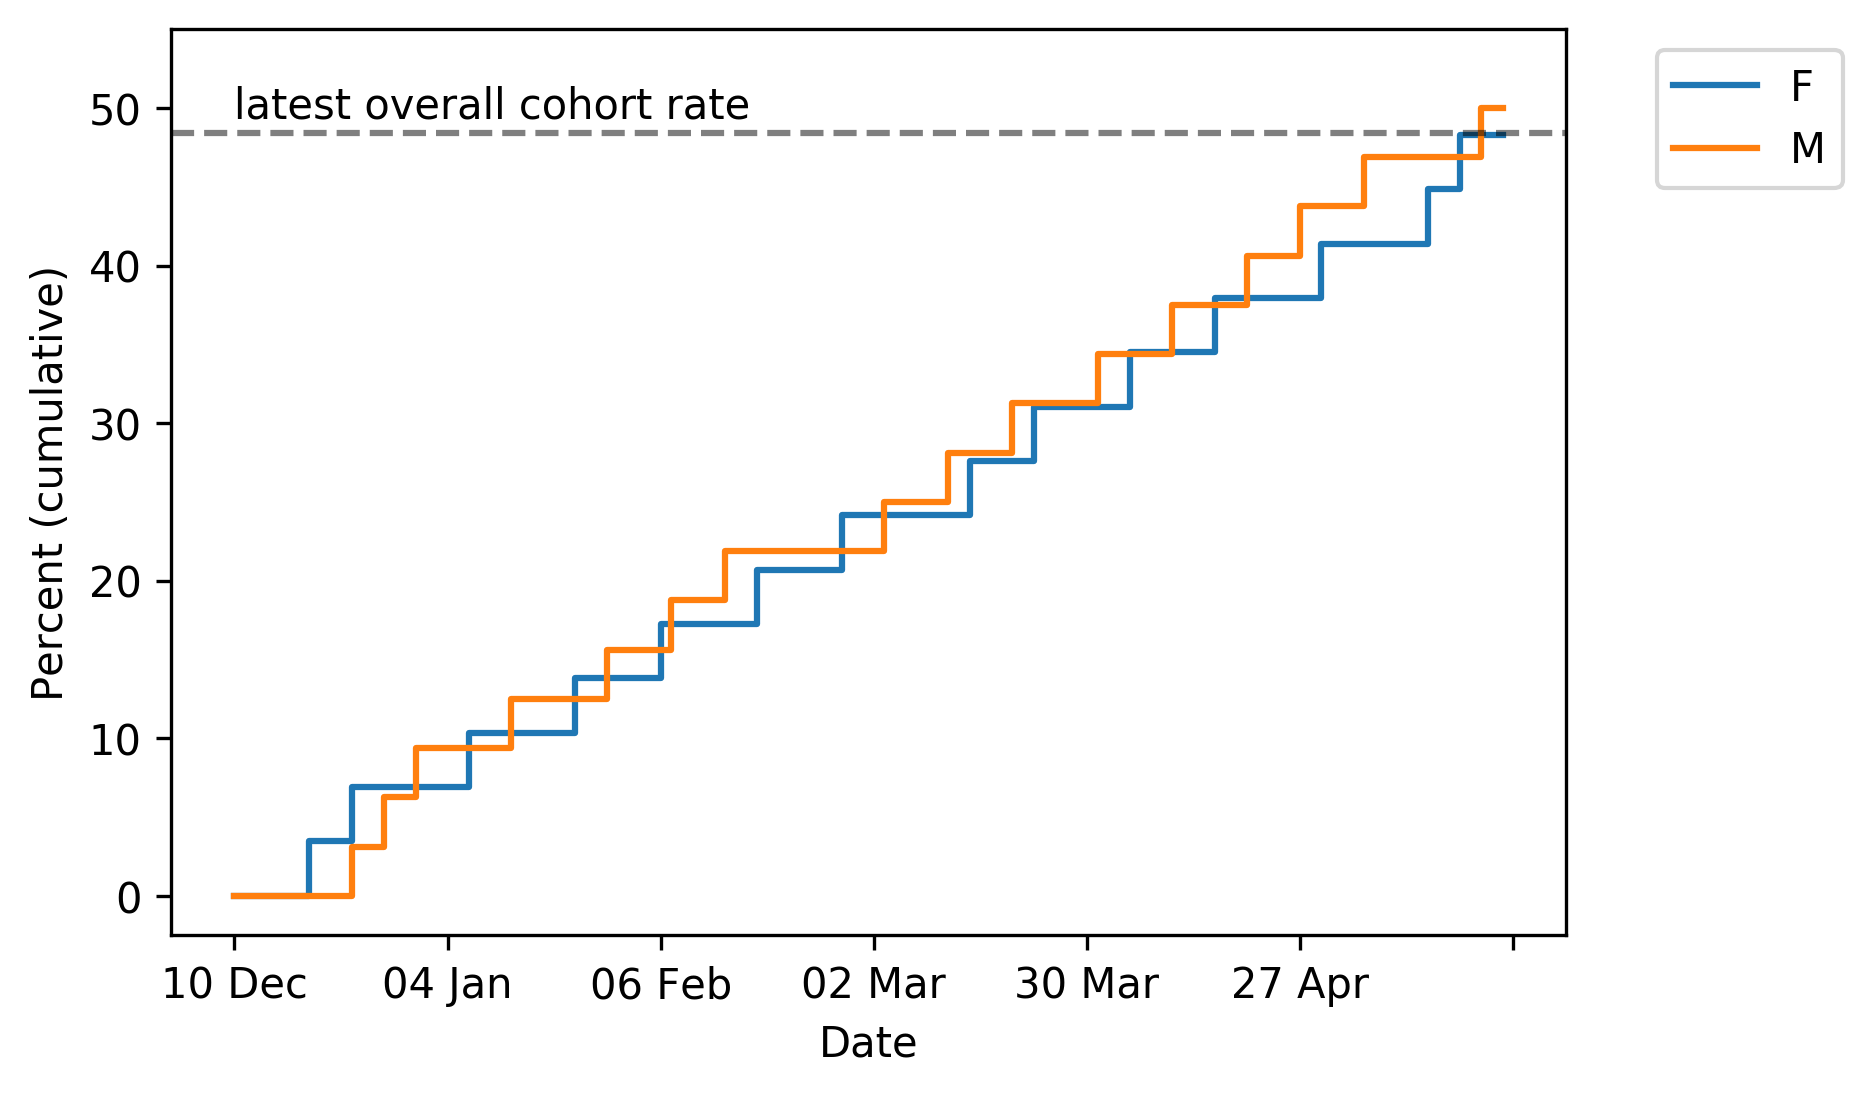

### COVID vaccinations among shielding (aged 16-69) population
 ### by Ethnicity (broad categories)

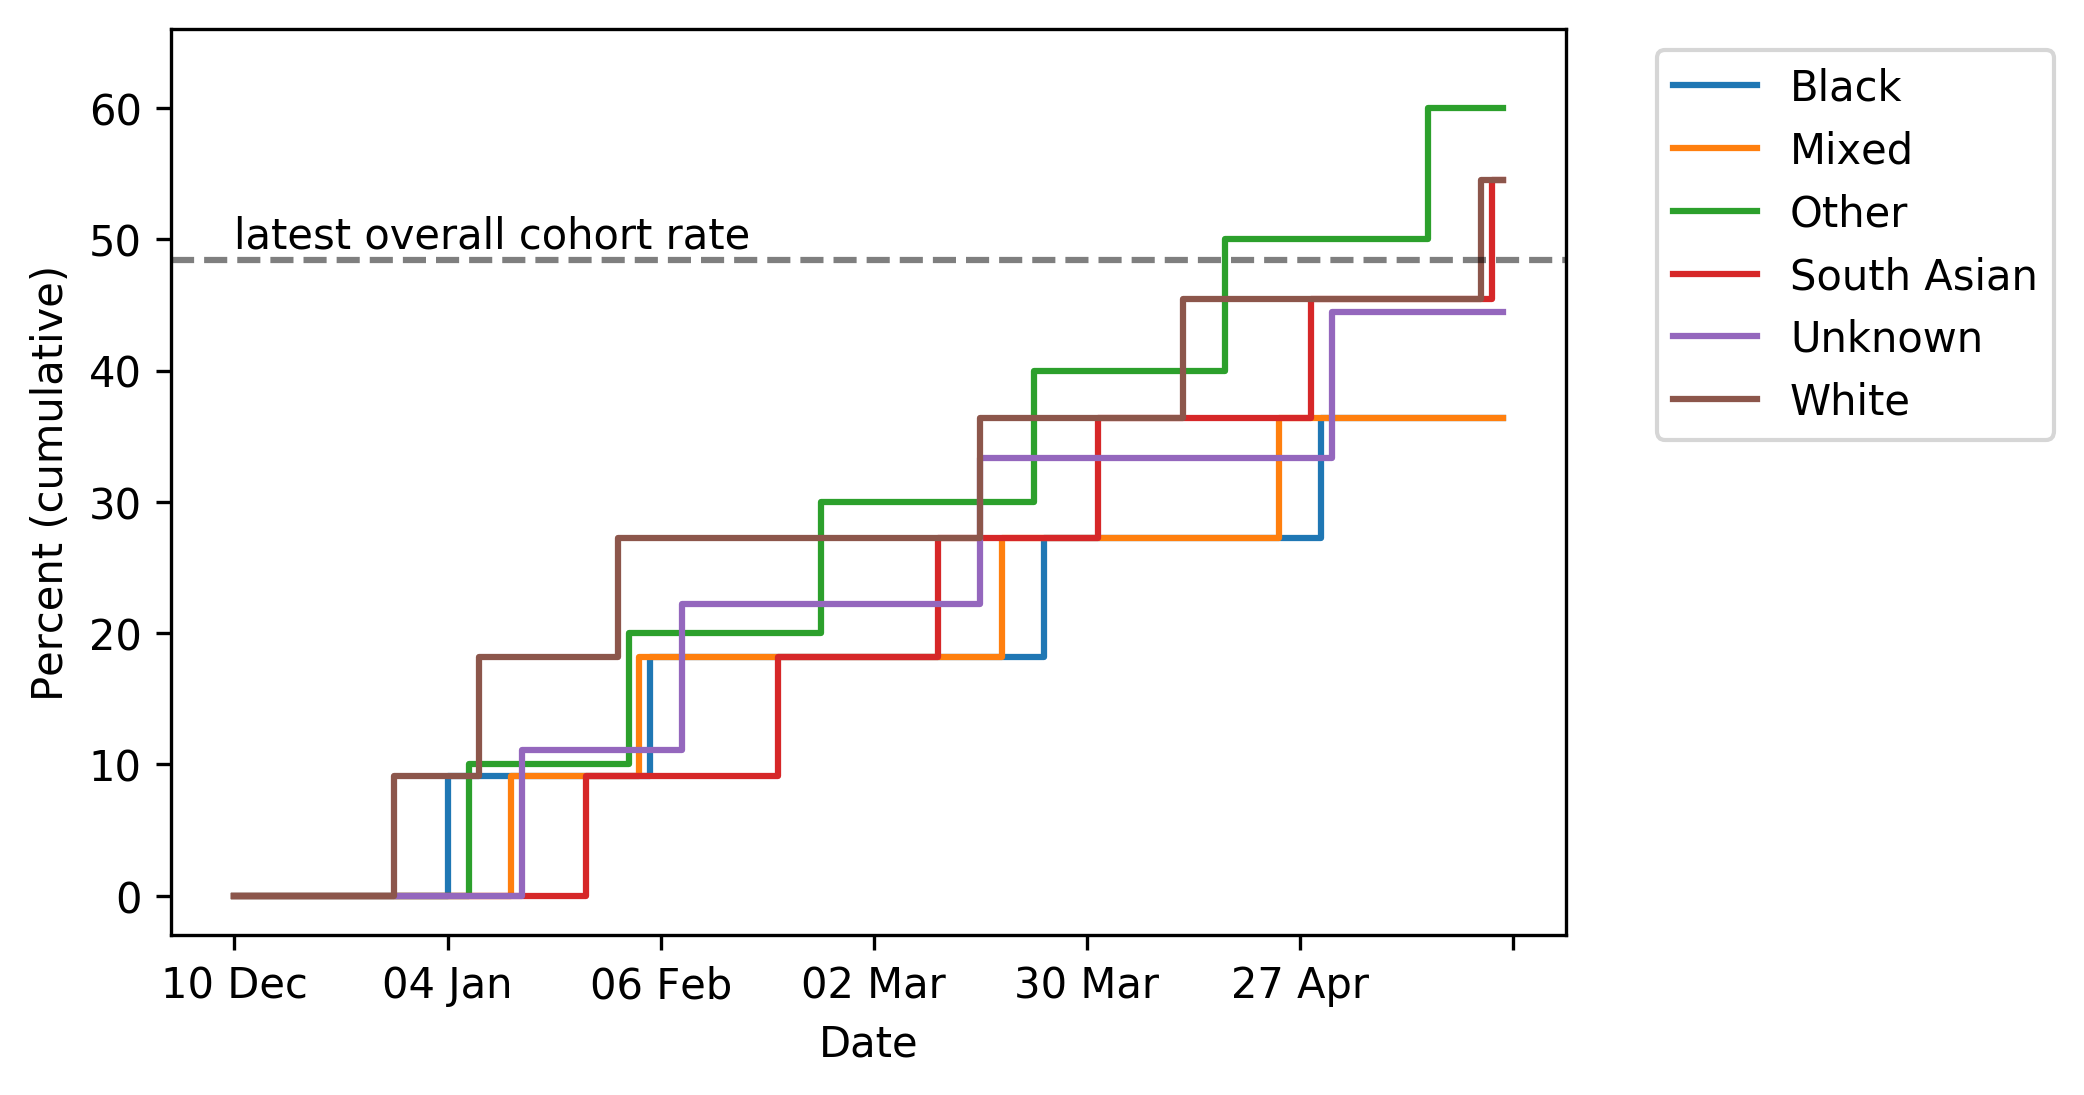

### COVID vaccinations among shielding (aged 16-69) population
 ### by Index of Multiple Deprivation (quintiles)

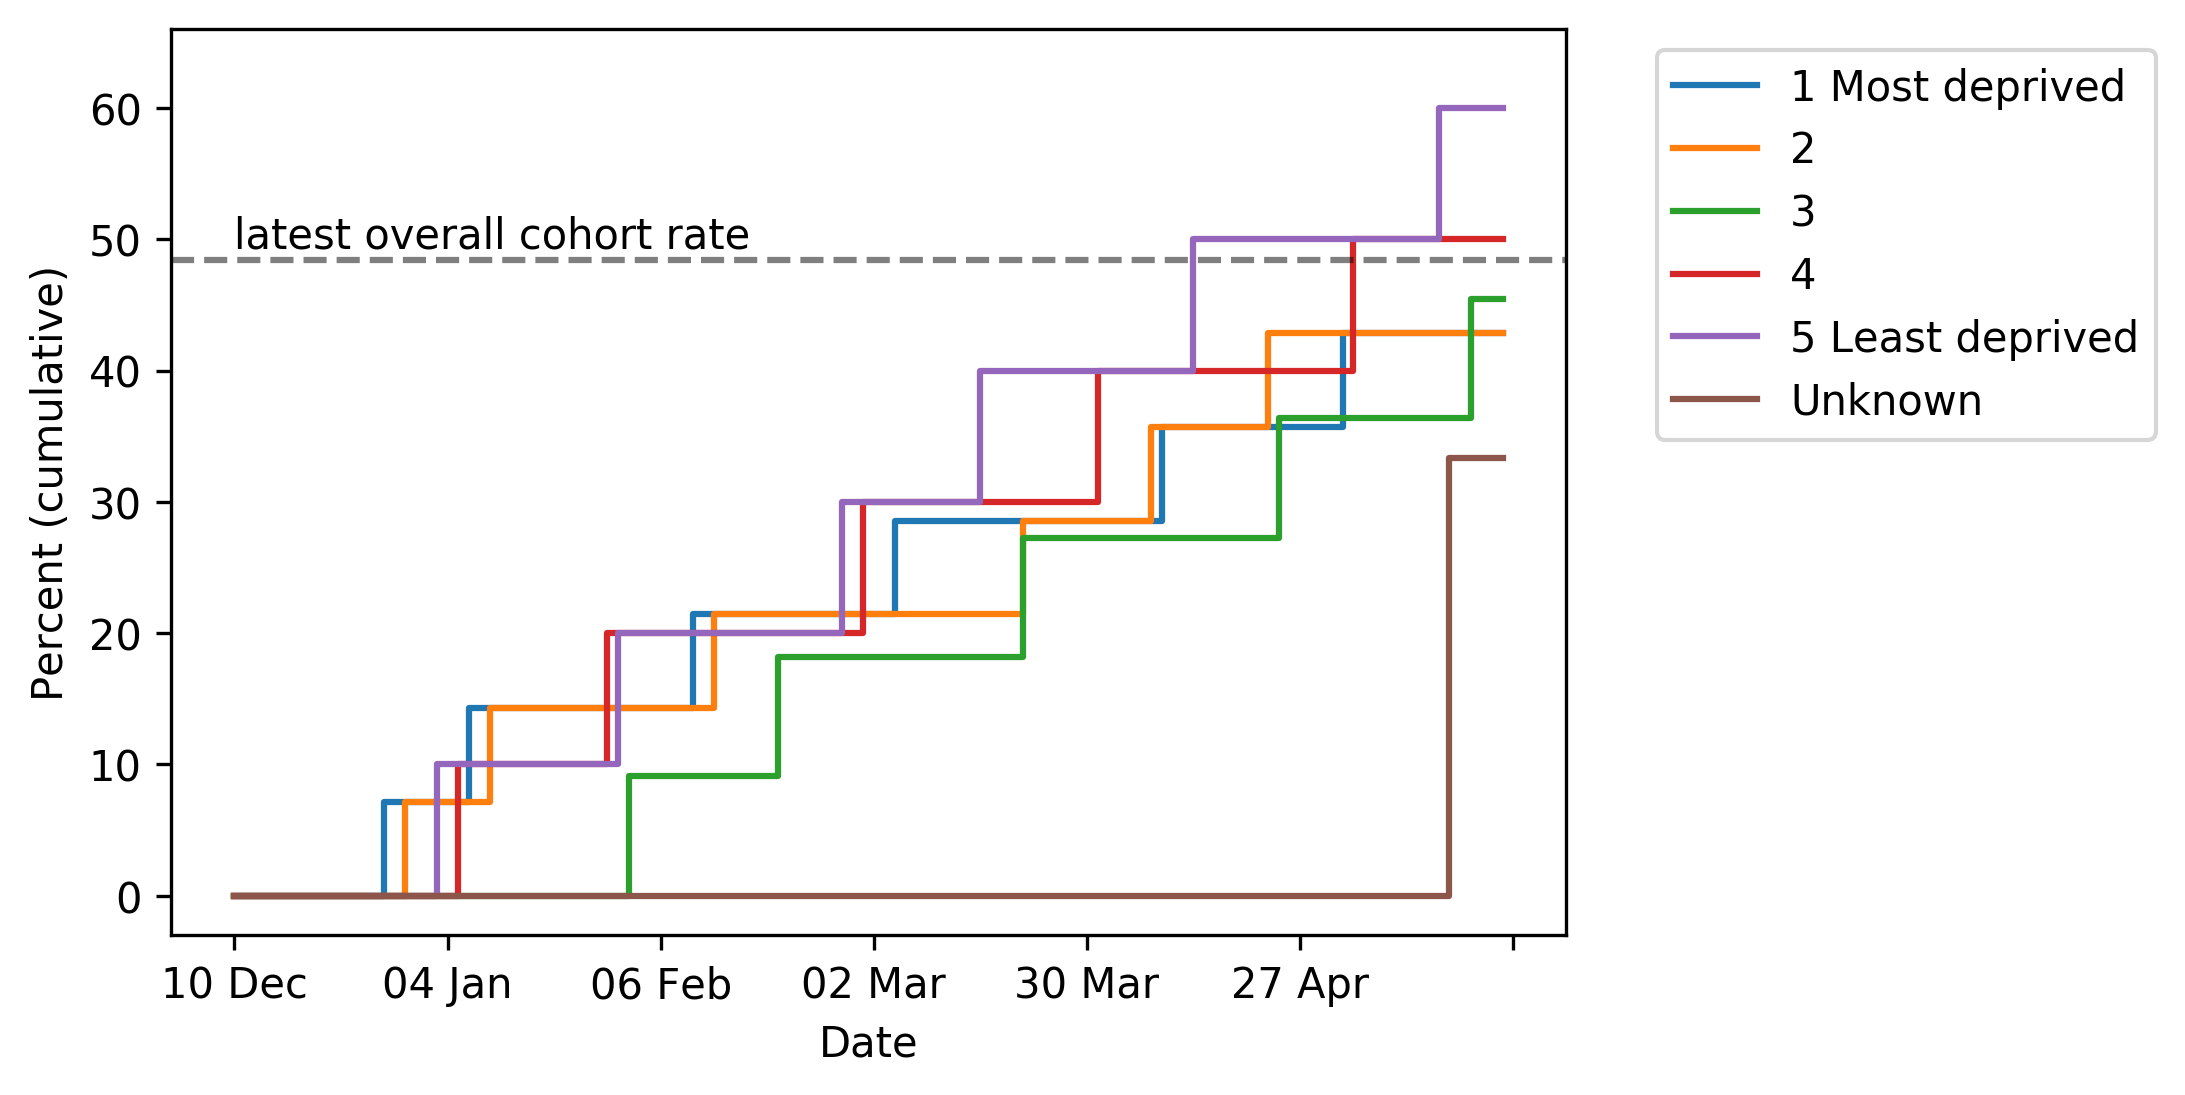

### COVID vaccinations among shielding (aged 16-69) population
 ### by Learning disability

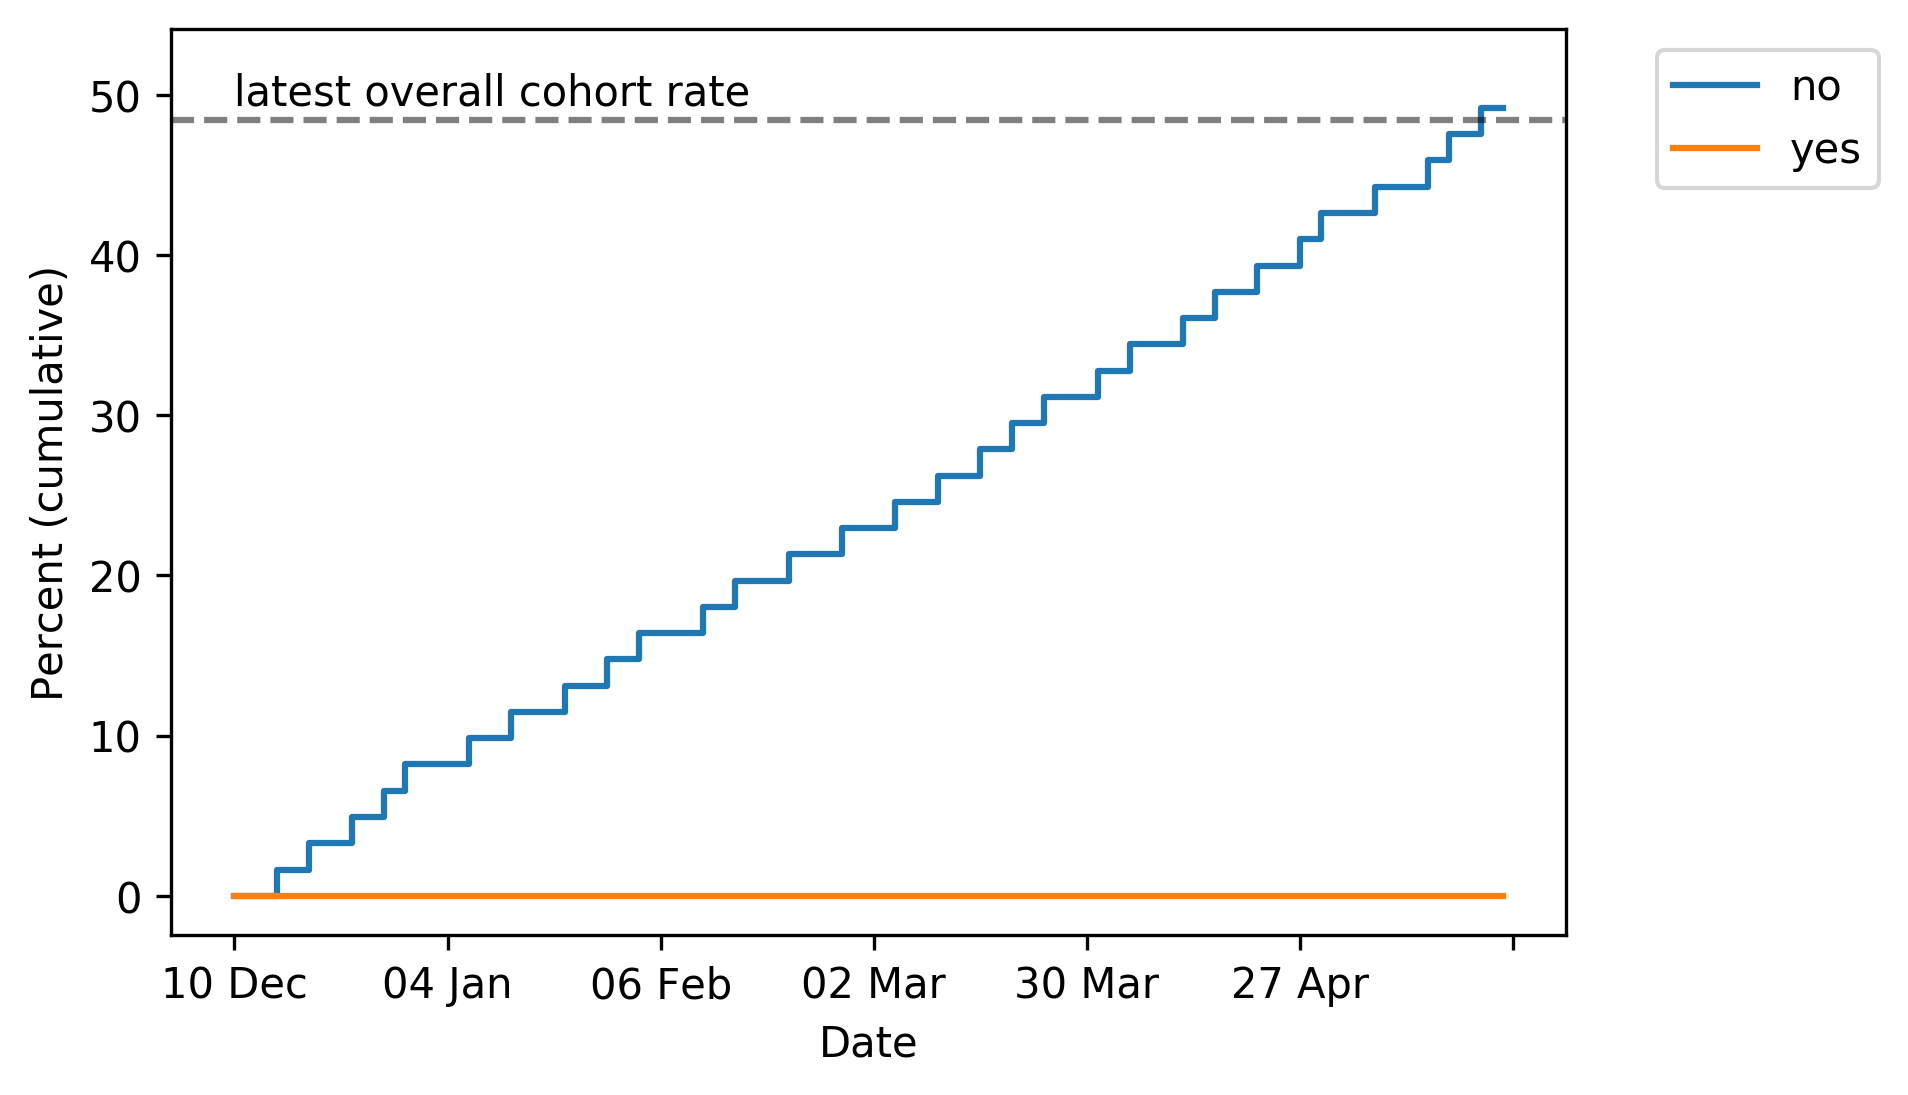

In [6]:
display(Markdown("## Shielding population (aged 16-69)"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="shielding (aged 16-69)", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 65-69 population according to demographic/clinical features, cumulatively by day. <a name='charts65' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 65-69 population

### COVID vaccinations among 65-69 population
 ### by Sex

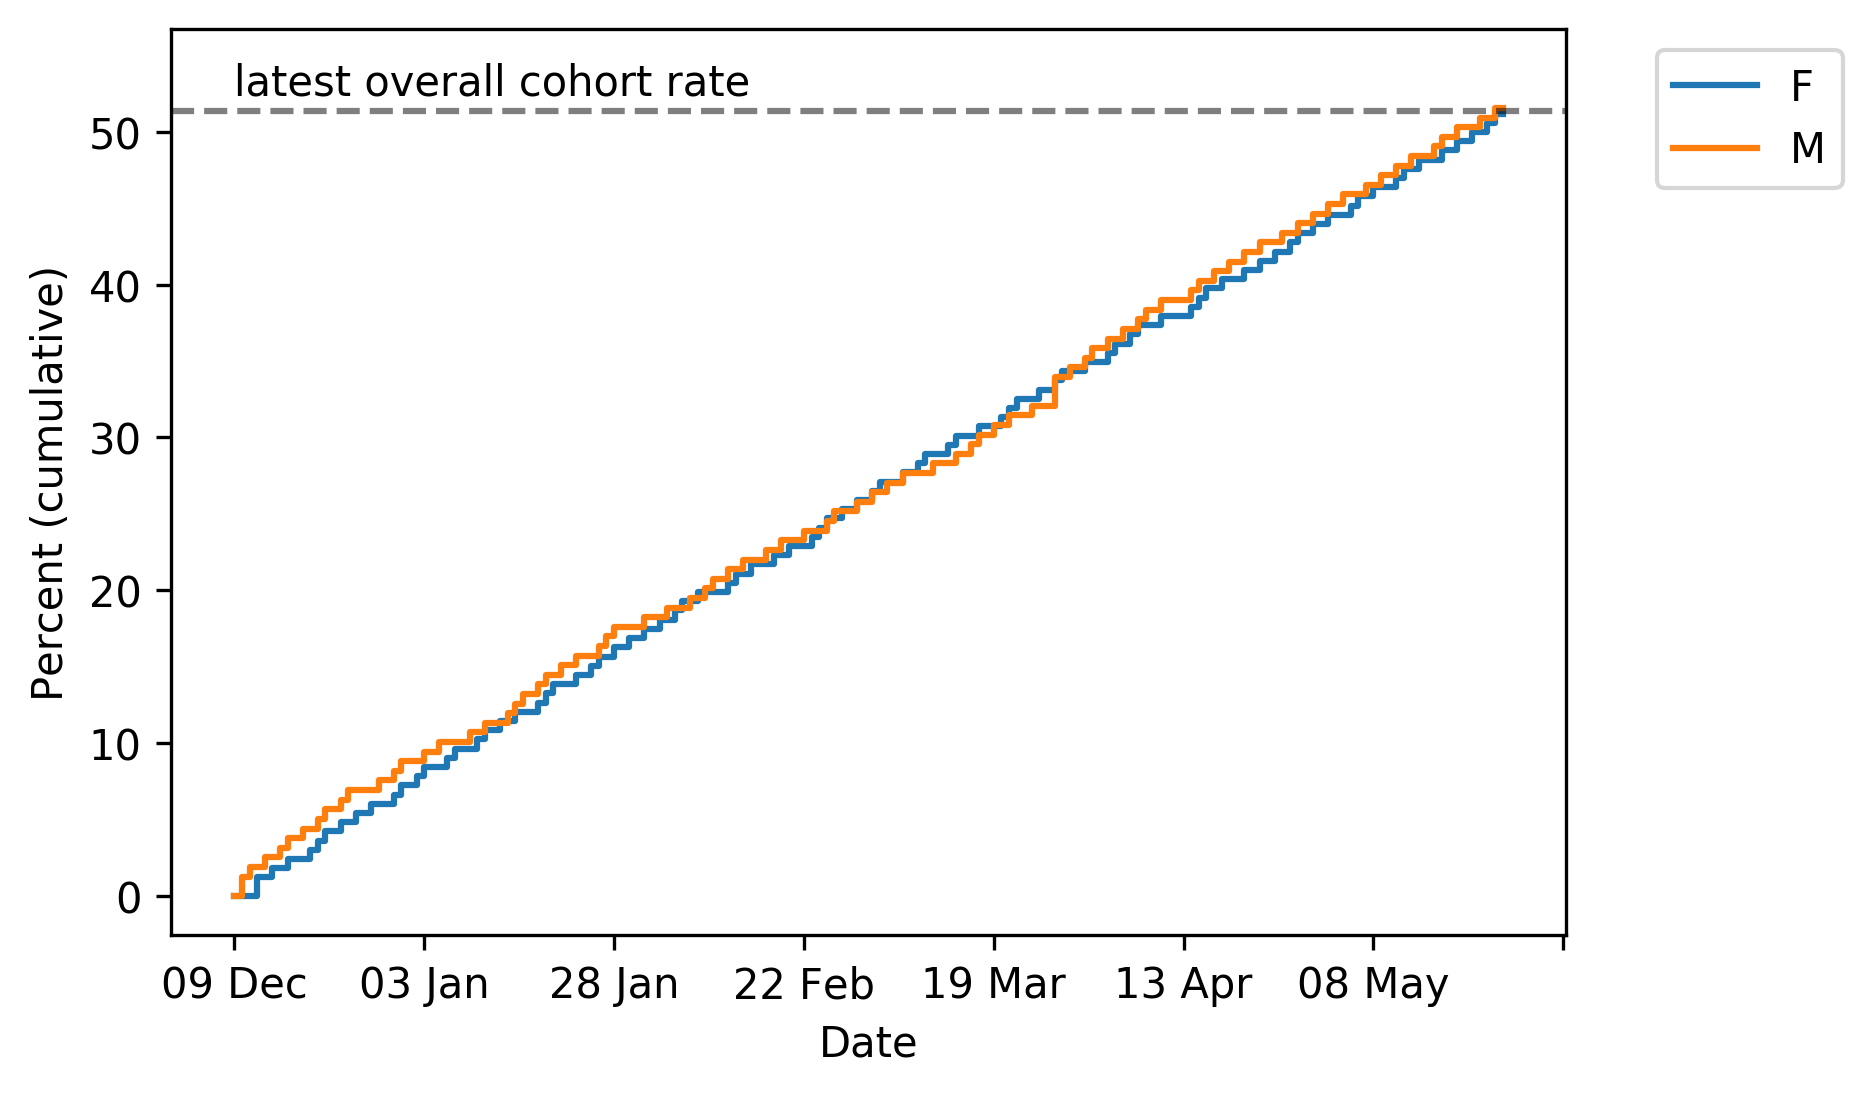

### COVID vaccinations among 65-69 population
 ### by Ethnicity (broad categories)

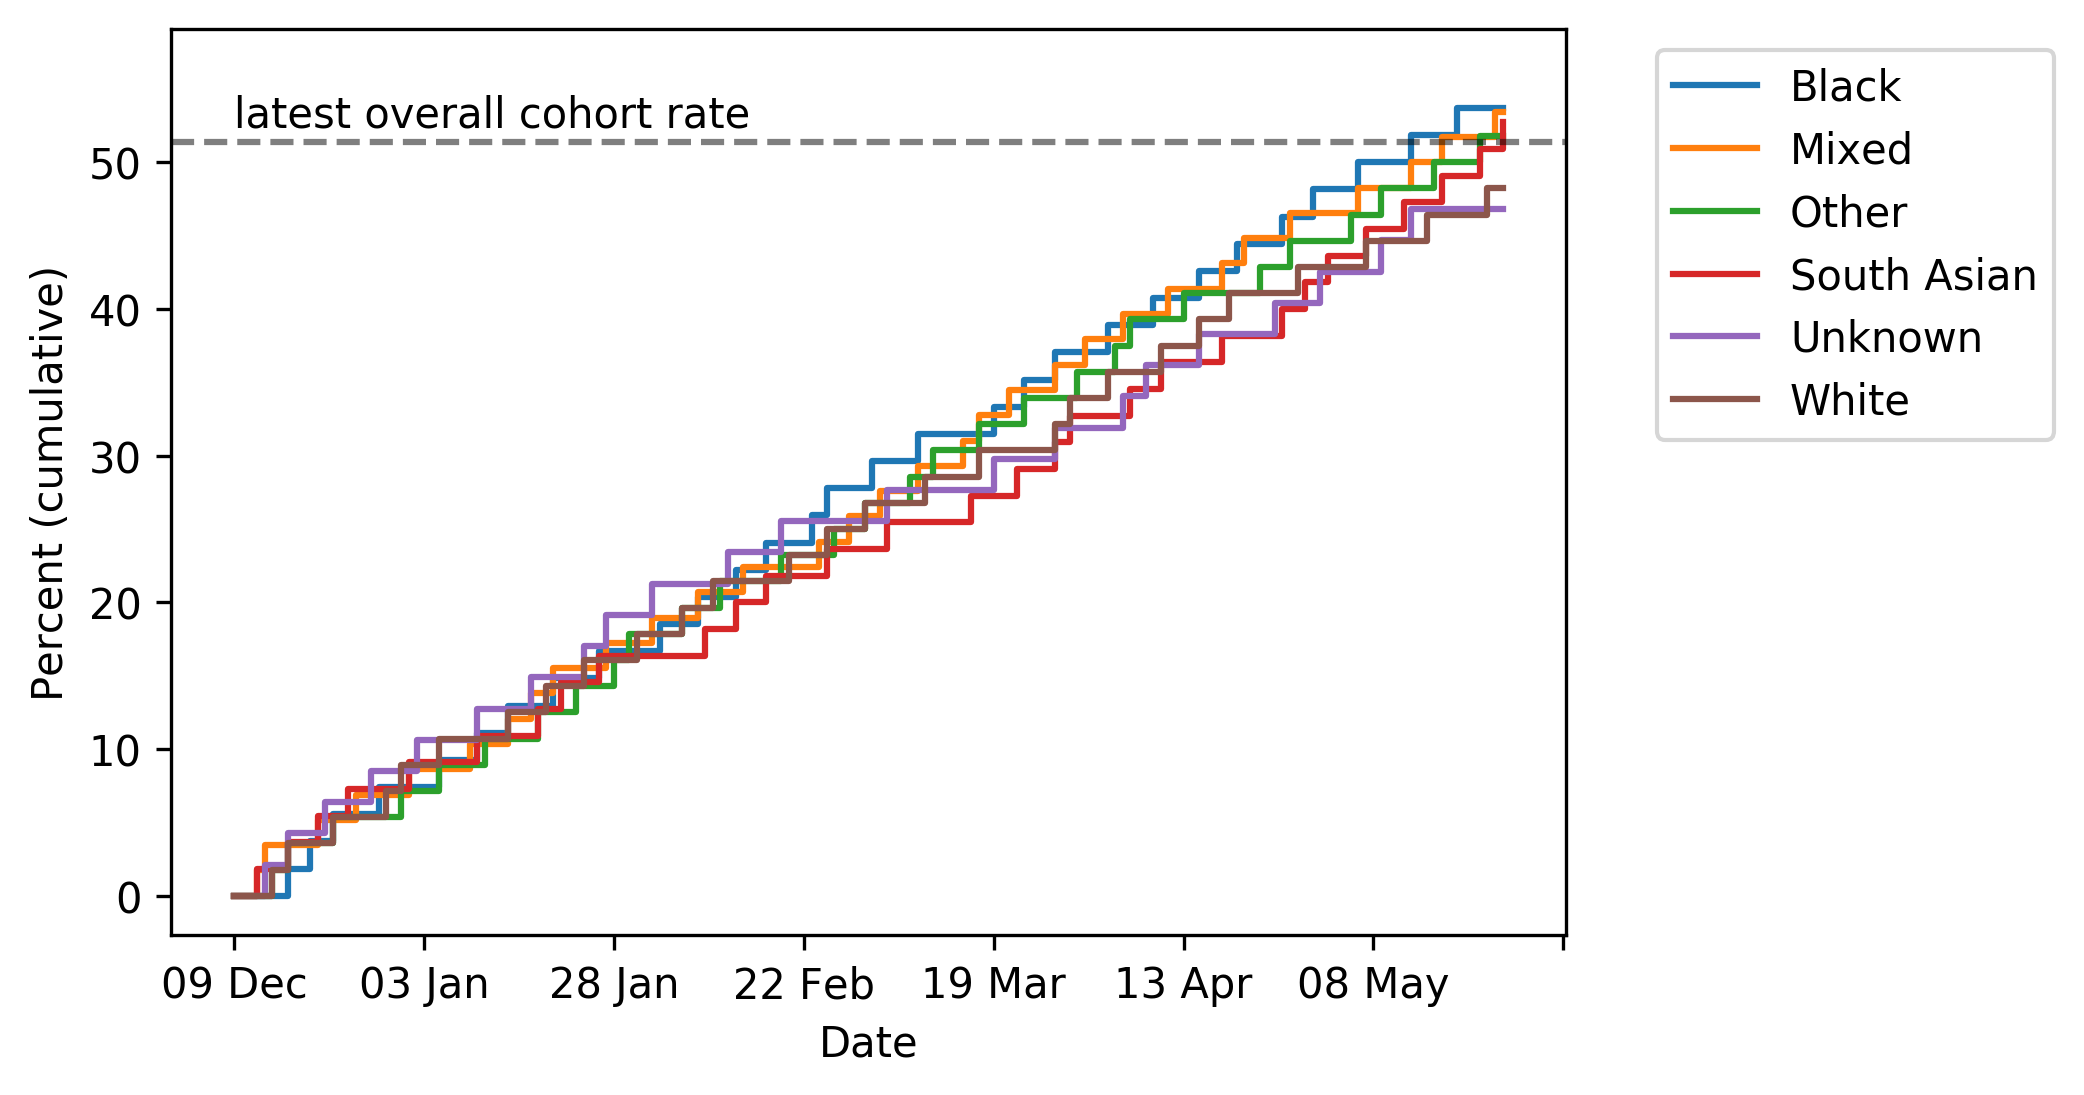

### COVID vaccinations among 65-69 population
 ### by Index of Multiple Deprivation (quintiles)

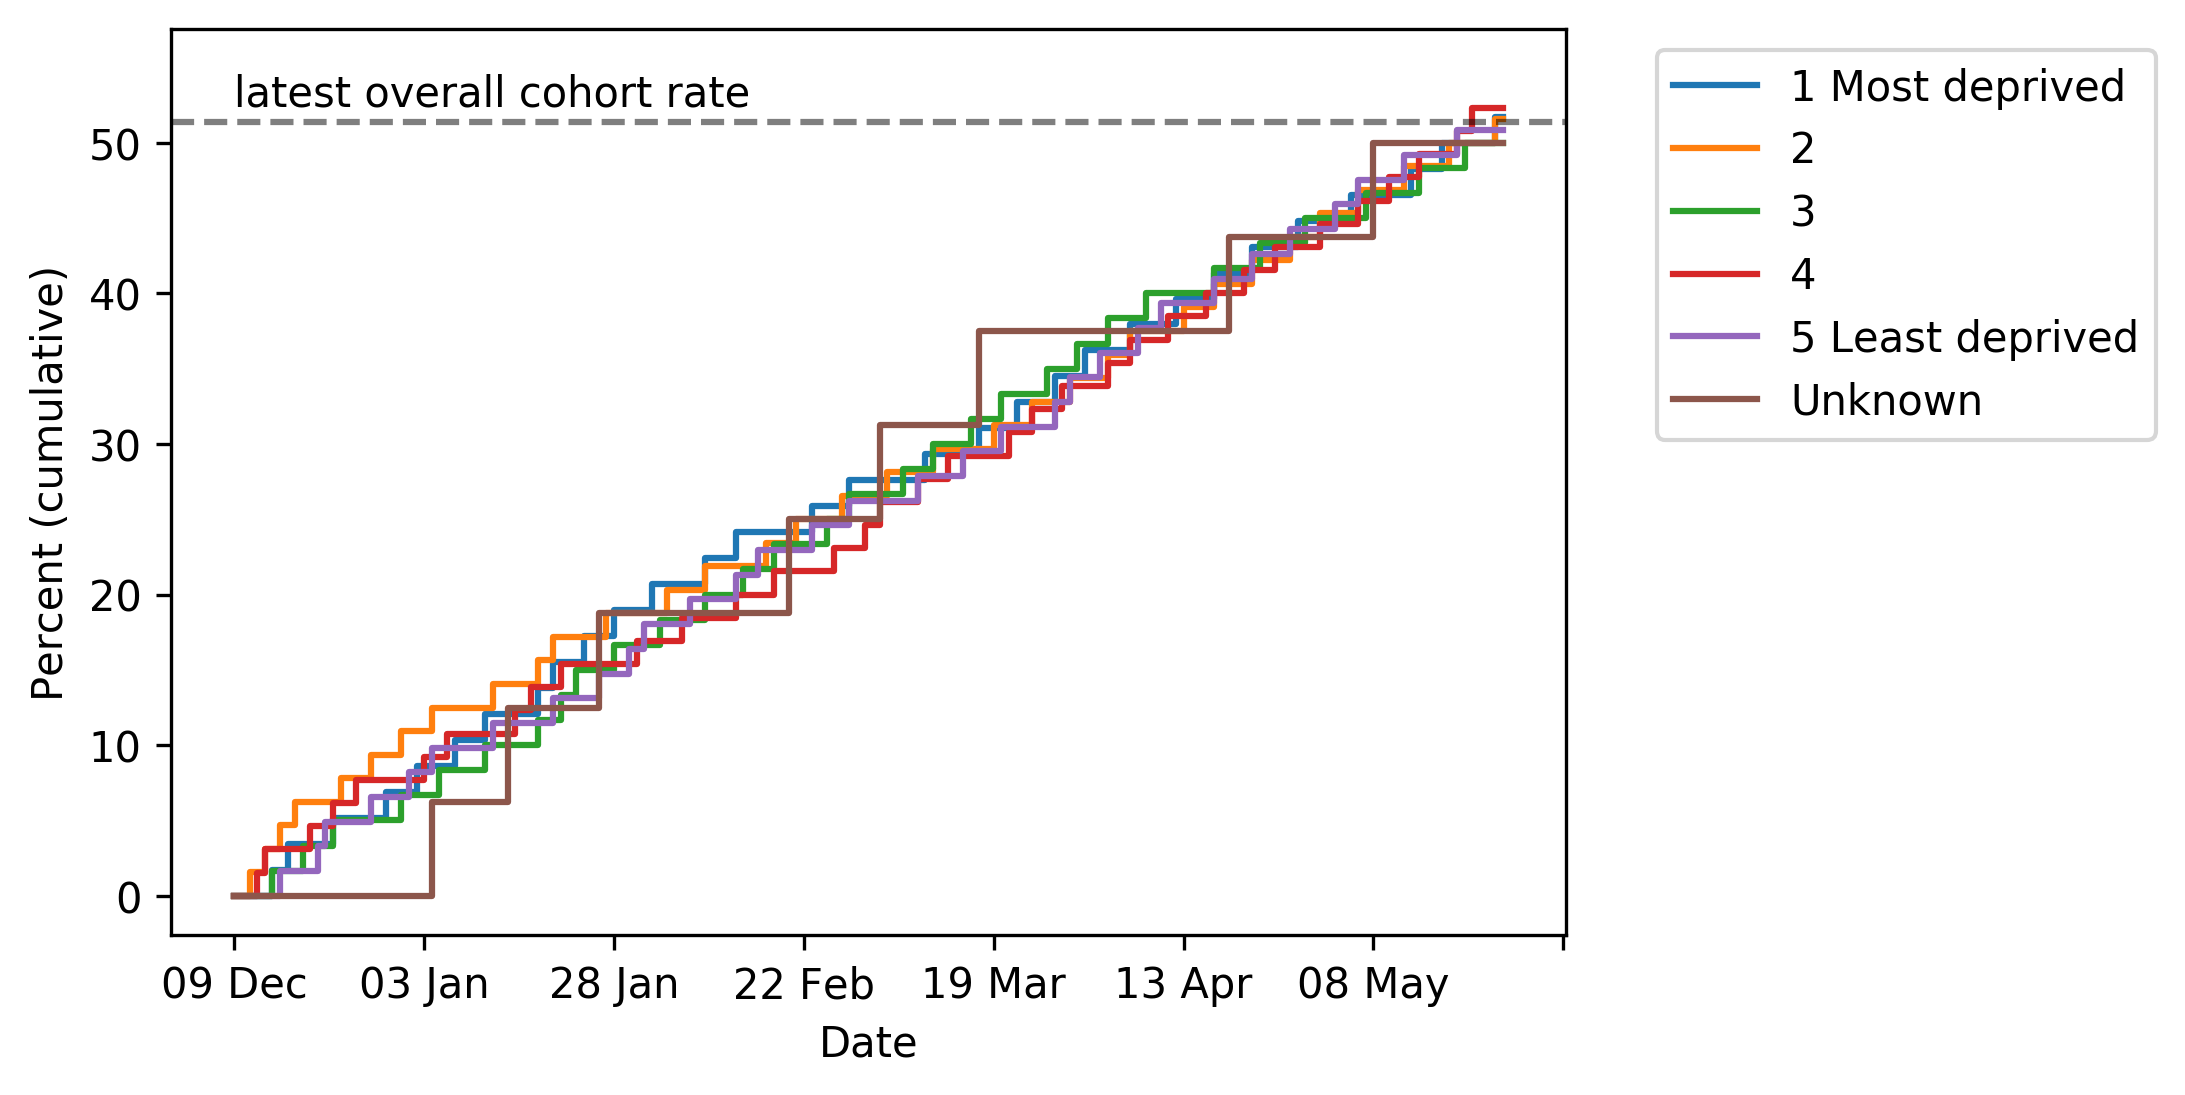

### COVID vaccinations among 65-69 population
 ### by BMI

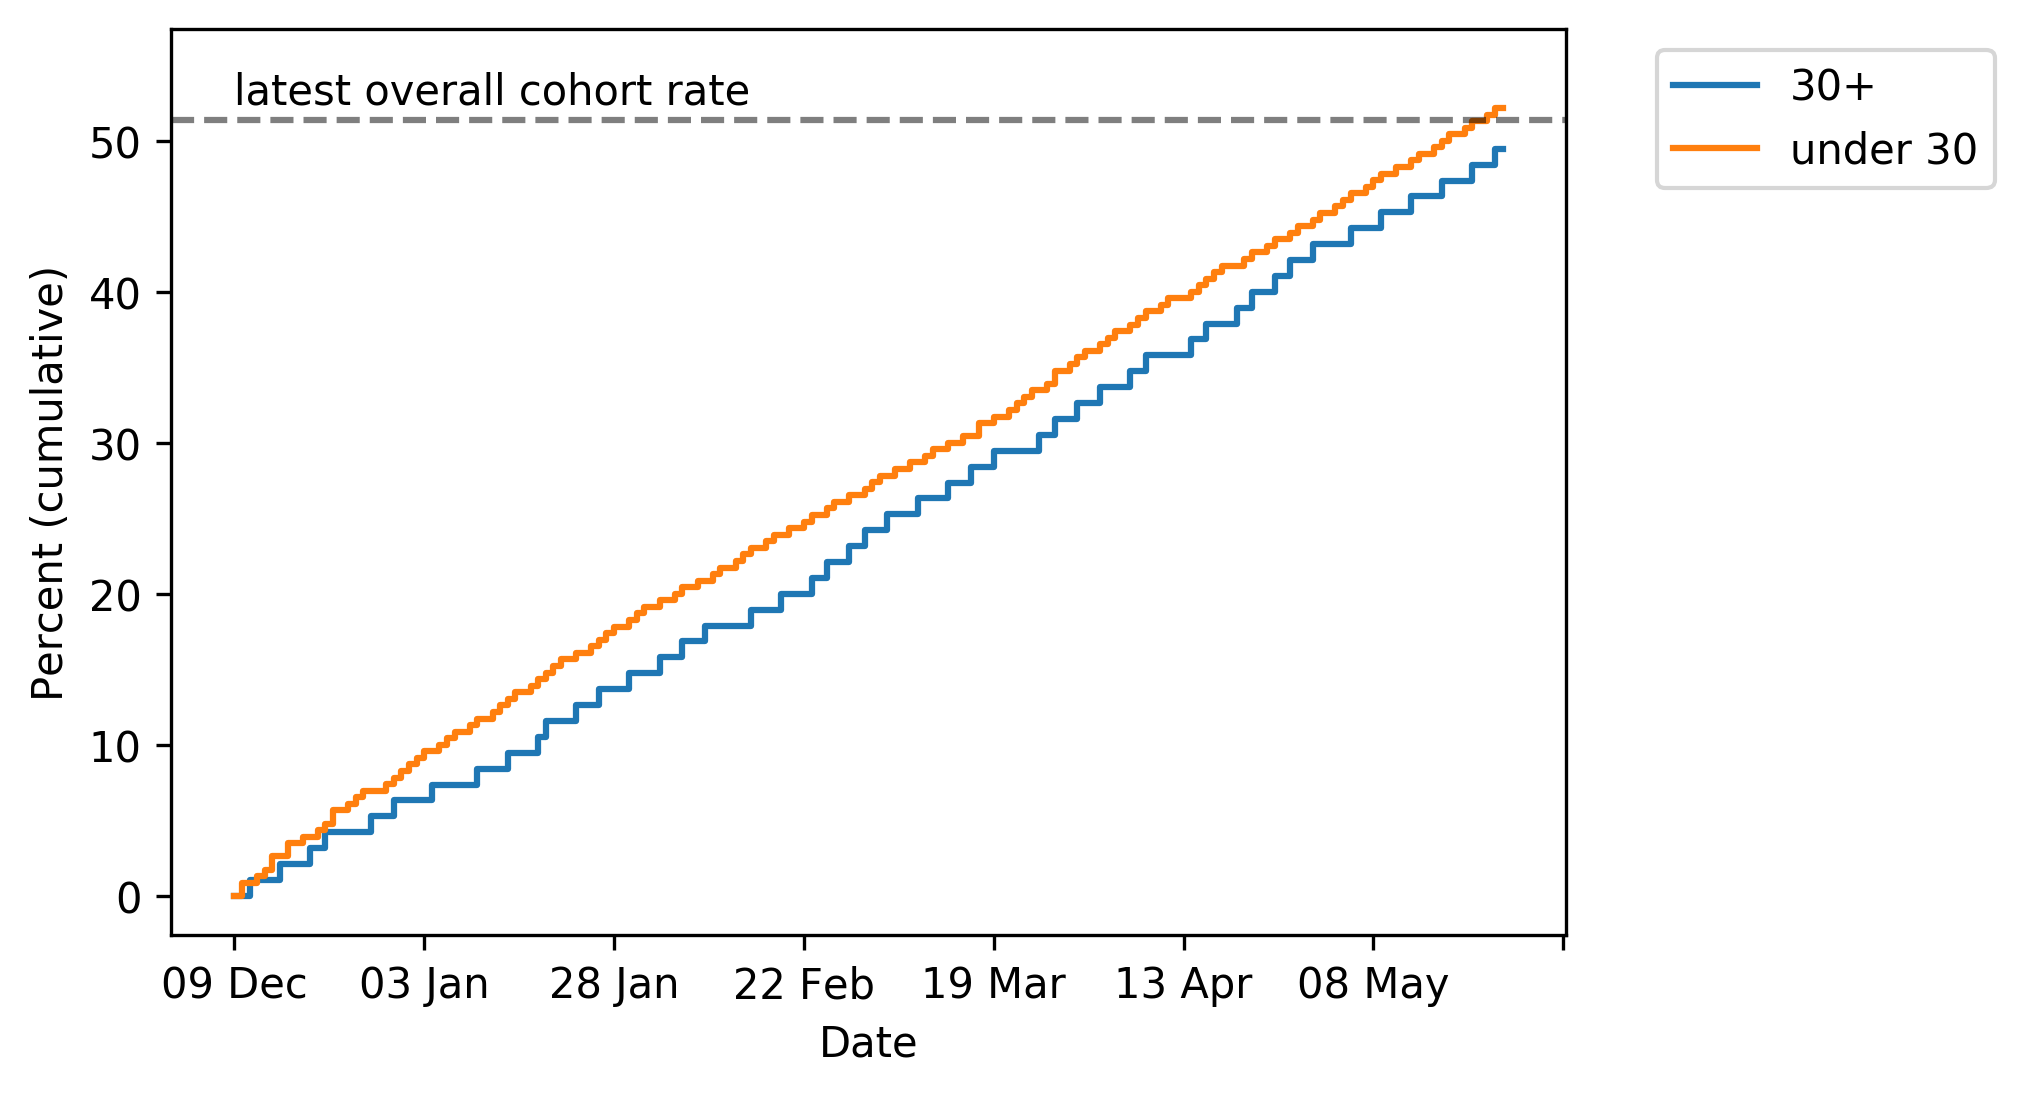

### COVID vaccinations among 65-69 population
 ### by Chronic cardiac disease

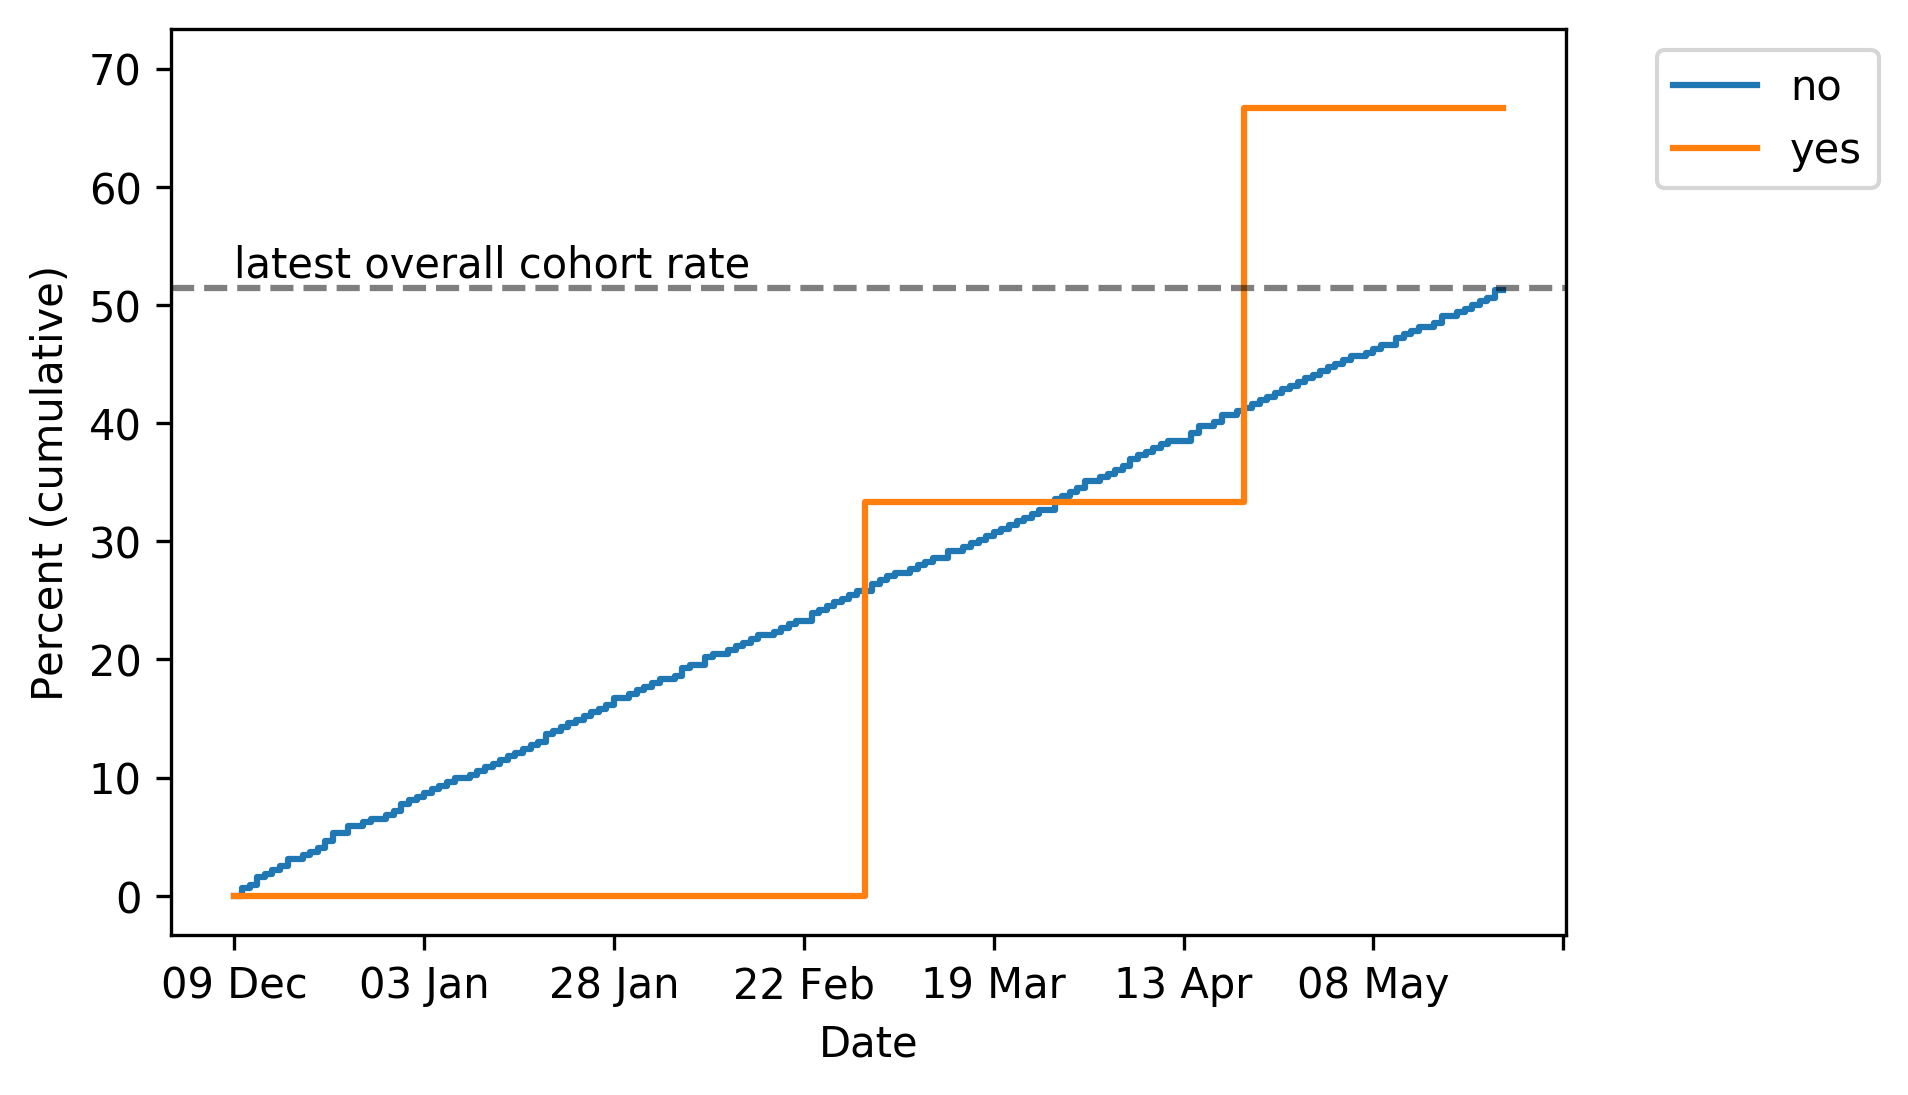

### COVID vaccinations among 65-69 population
 ### by Current COPD

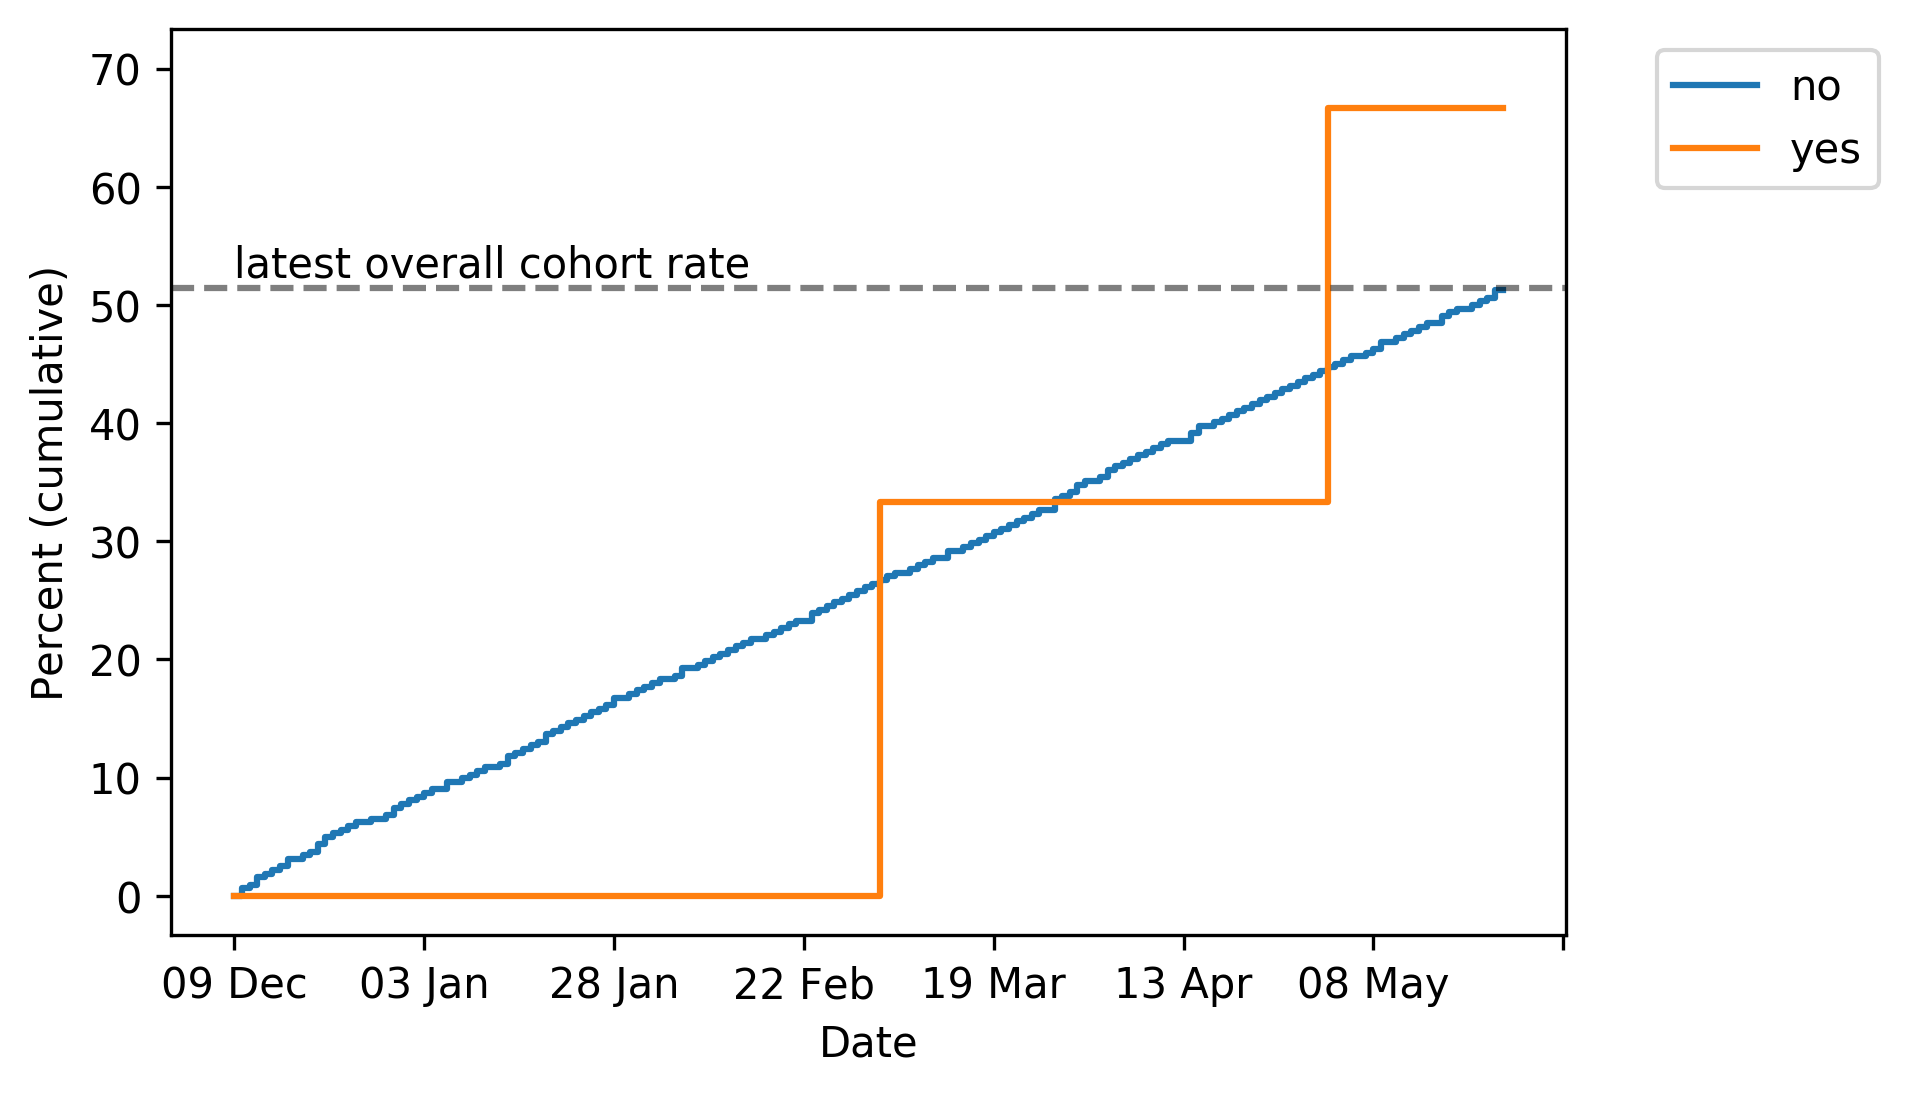

### COVID vaccinations among 65-69 population
 ### by Dementia

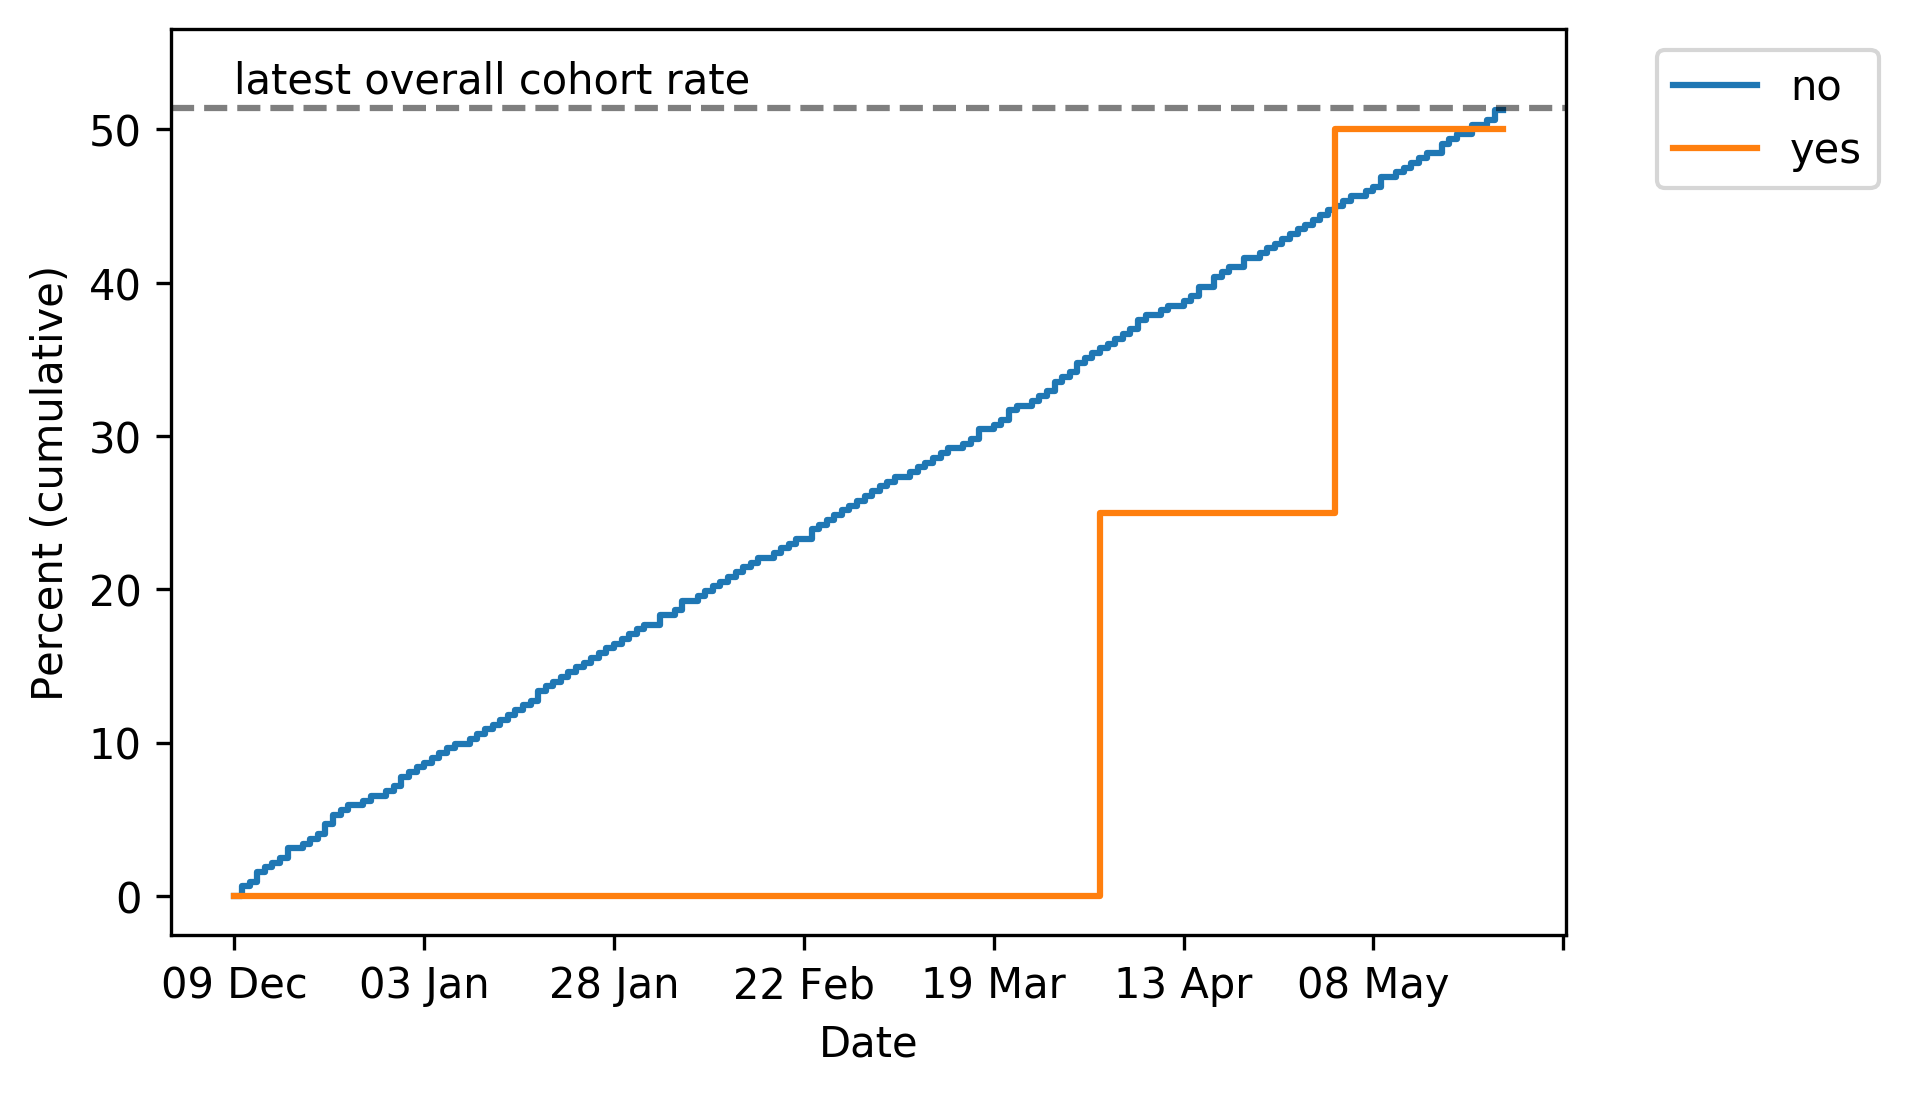

### COVID vaccinations among 65-69 population
 ### by Learning disability

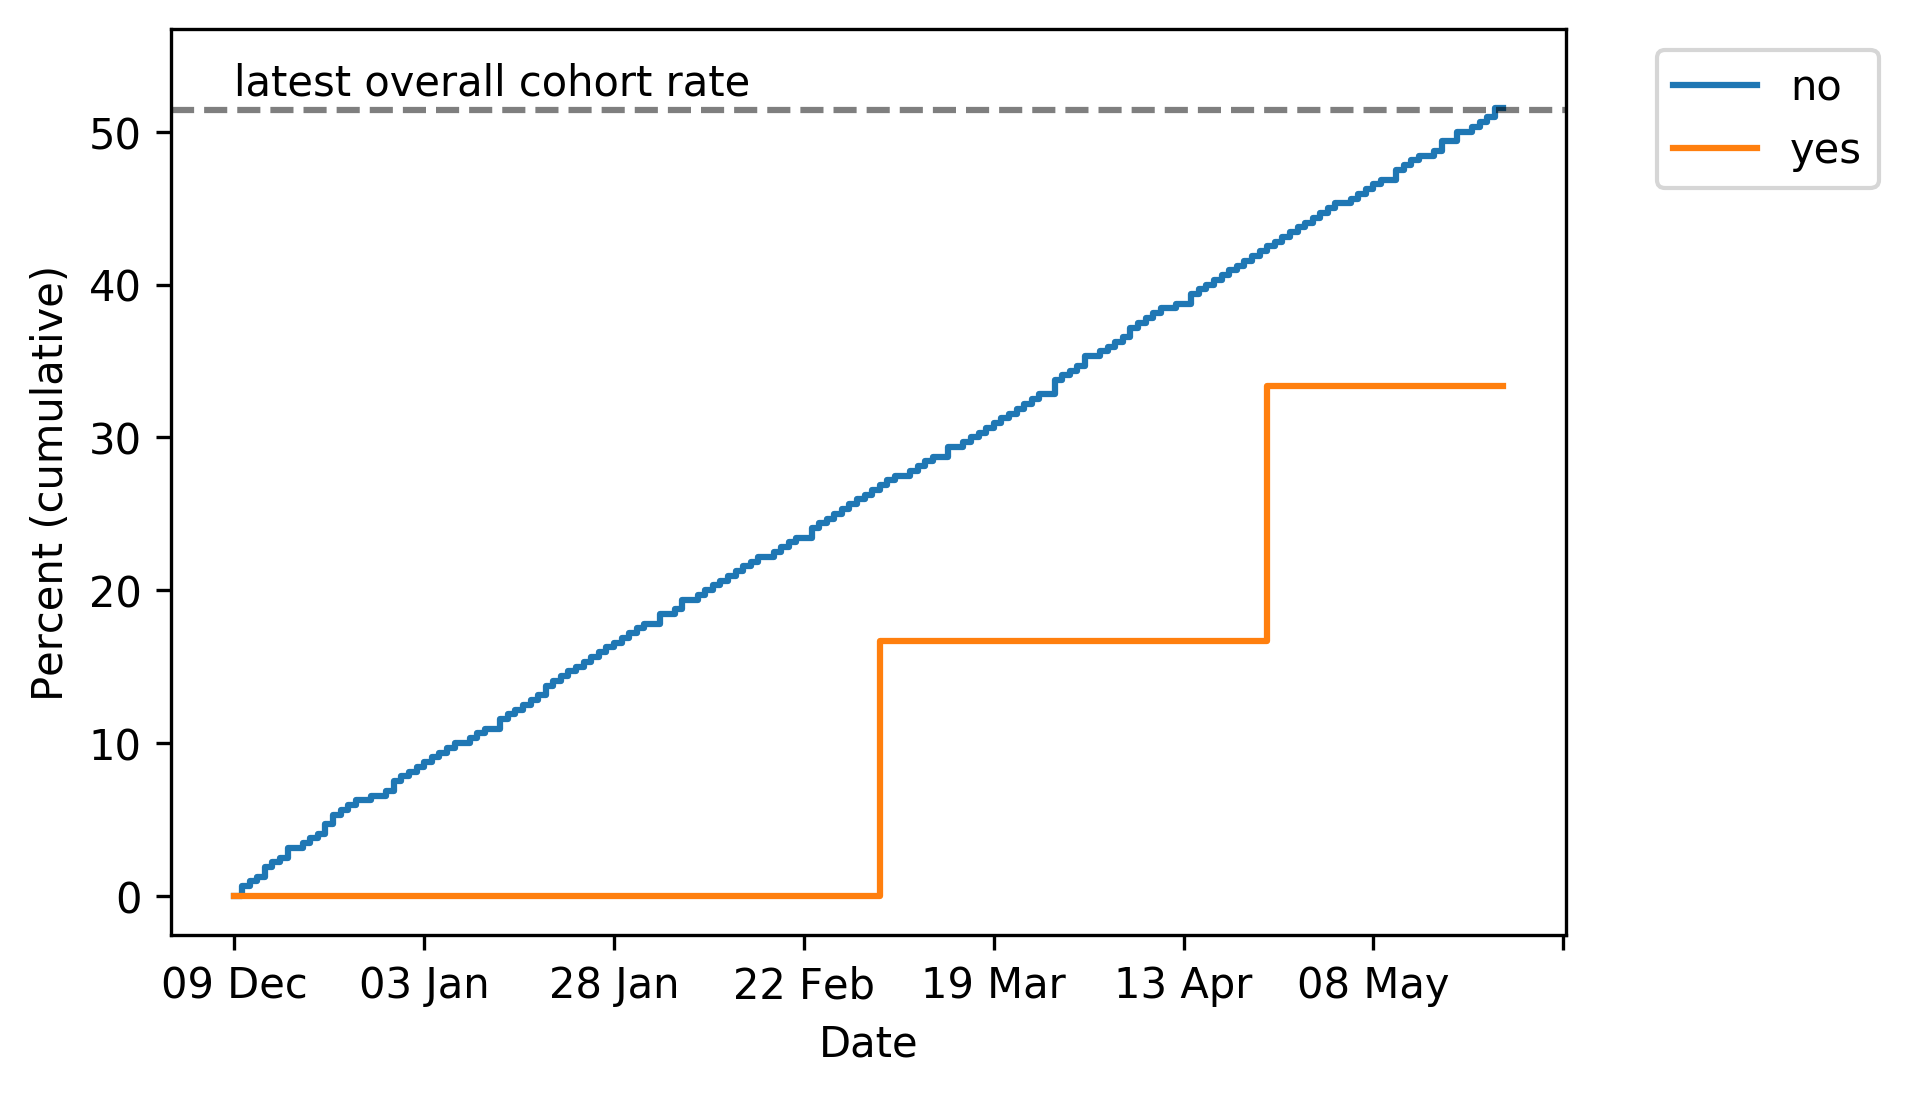

### COVID vaccinations among 65-69 population
 ### by Psychosis, schizophrenia, or bipolar

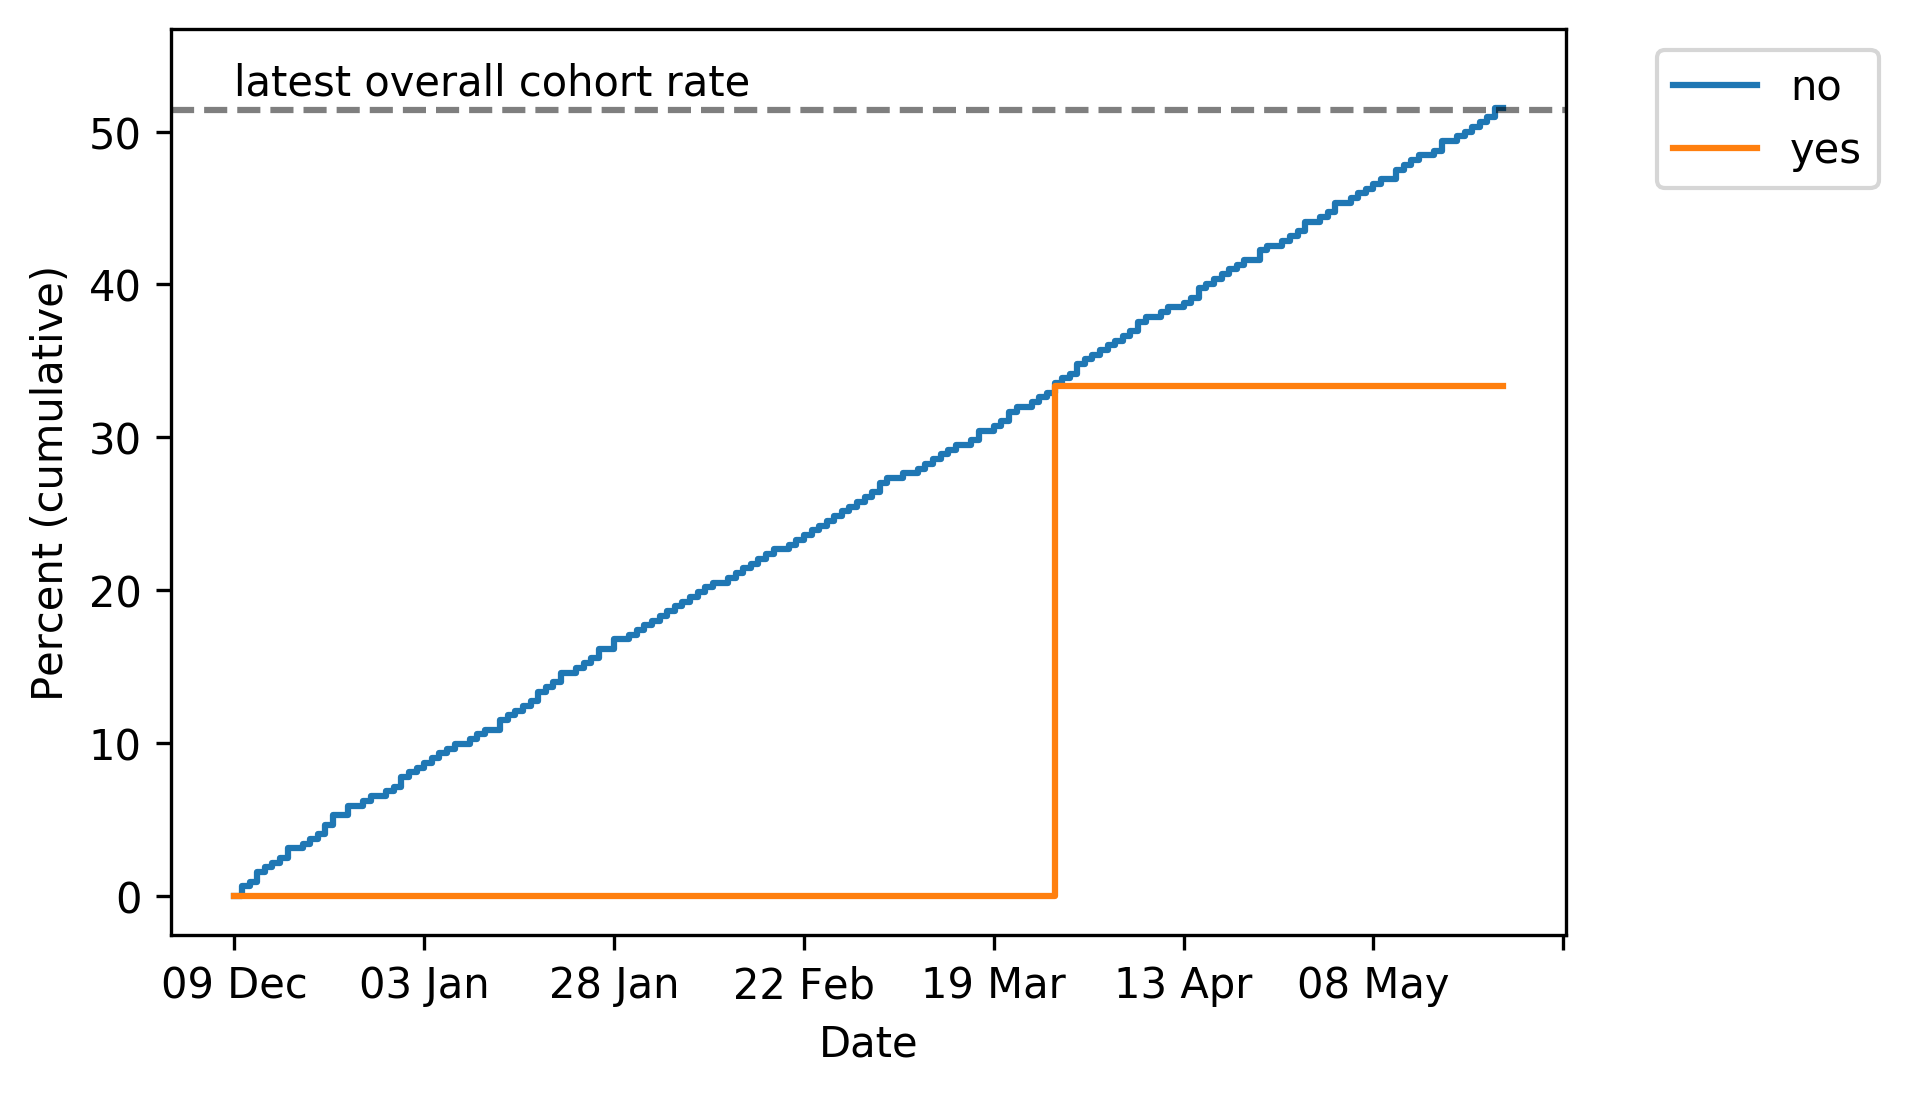

### COVID vaccinations among 65-69 population
 ### by SSRI (last 12 months)

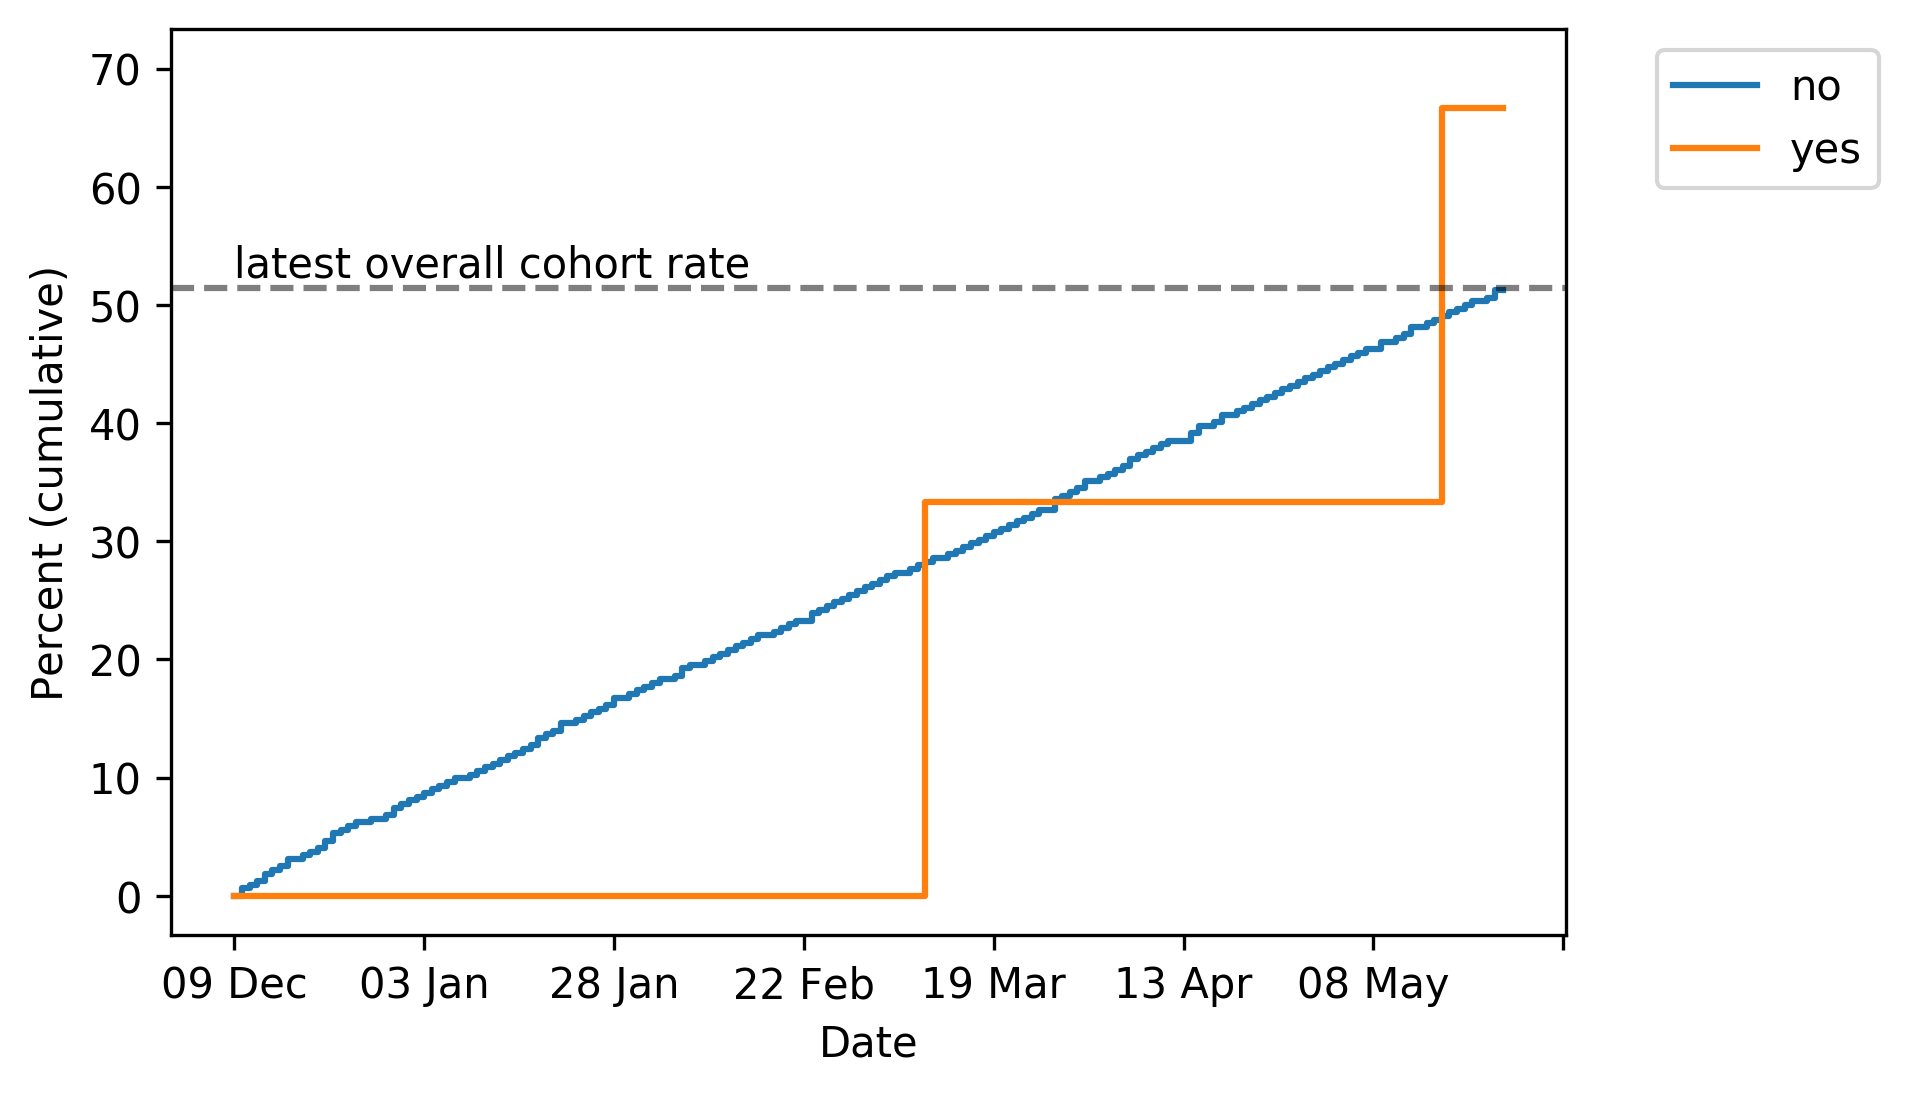

In [7]:
display(Markdown("## 65-69 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="65-69", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 60-64 population according to demographic/clinical features, cumulatively by day. <a name='charts60' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**


## 60-64 population

### COVID vaccinations among 60-64 population
 ### by Sex

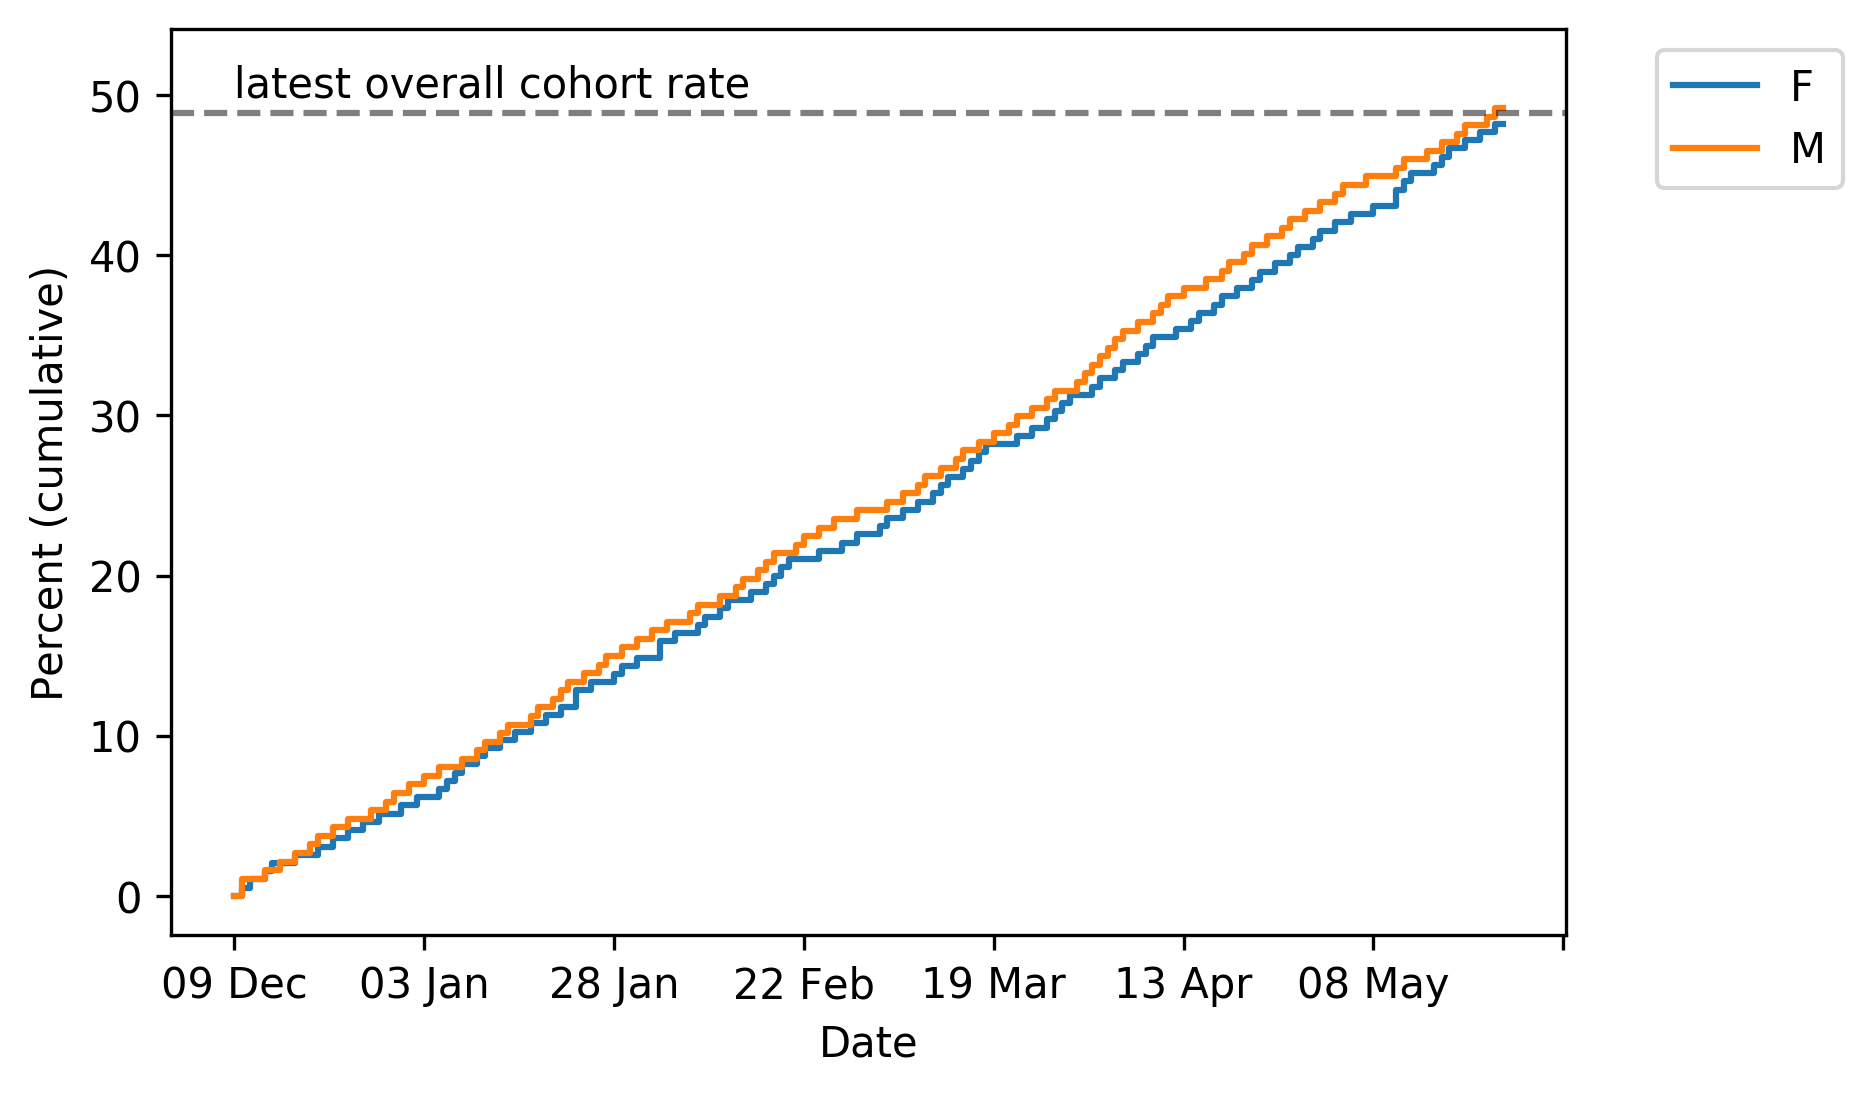

### COVID vaccinations among 60-64 population
 ### by Ethnicity (broad categories)

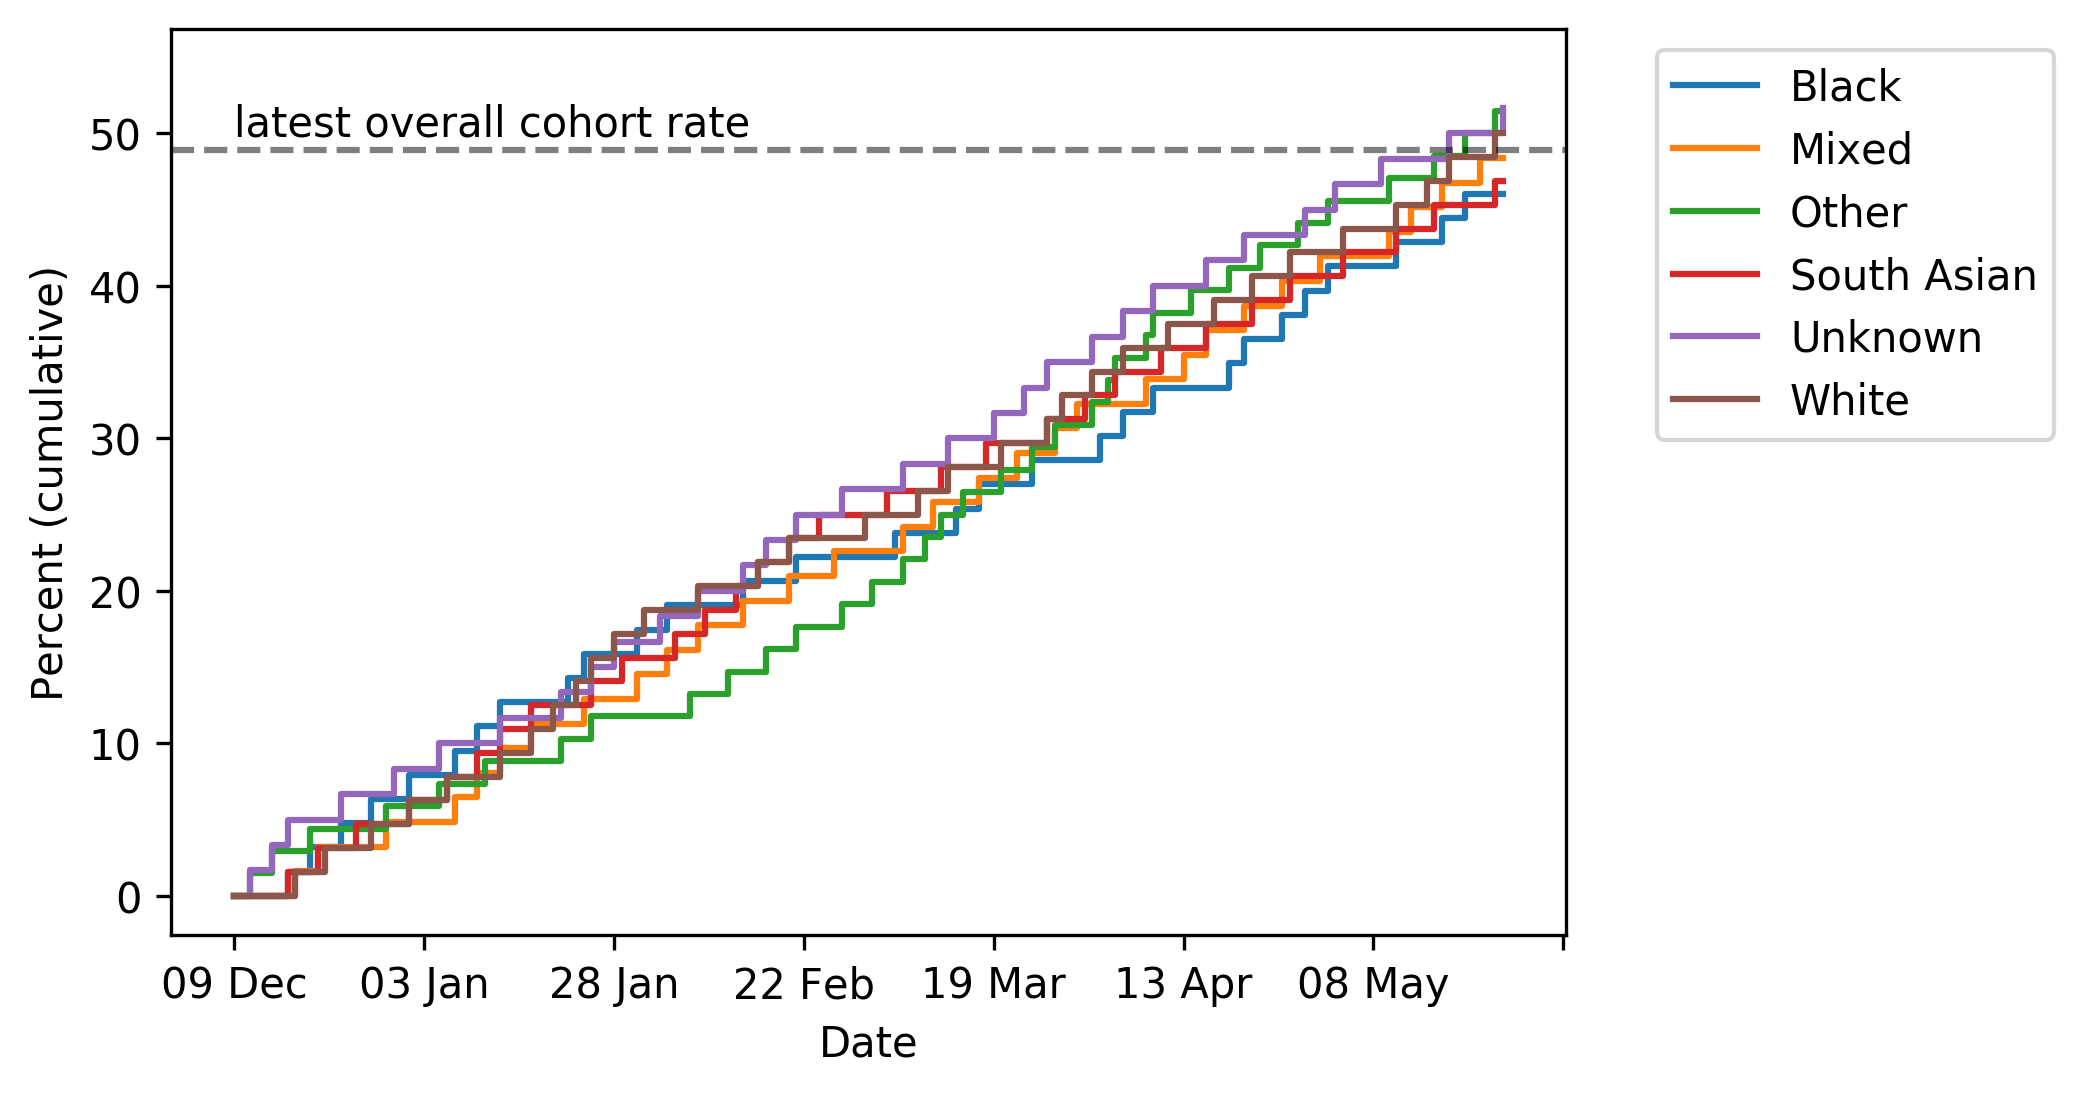

### COVID vaccinations among 60-64 population
 ### by Index of Multiple Deprivation (quintiles)

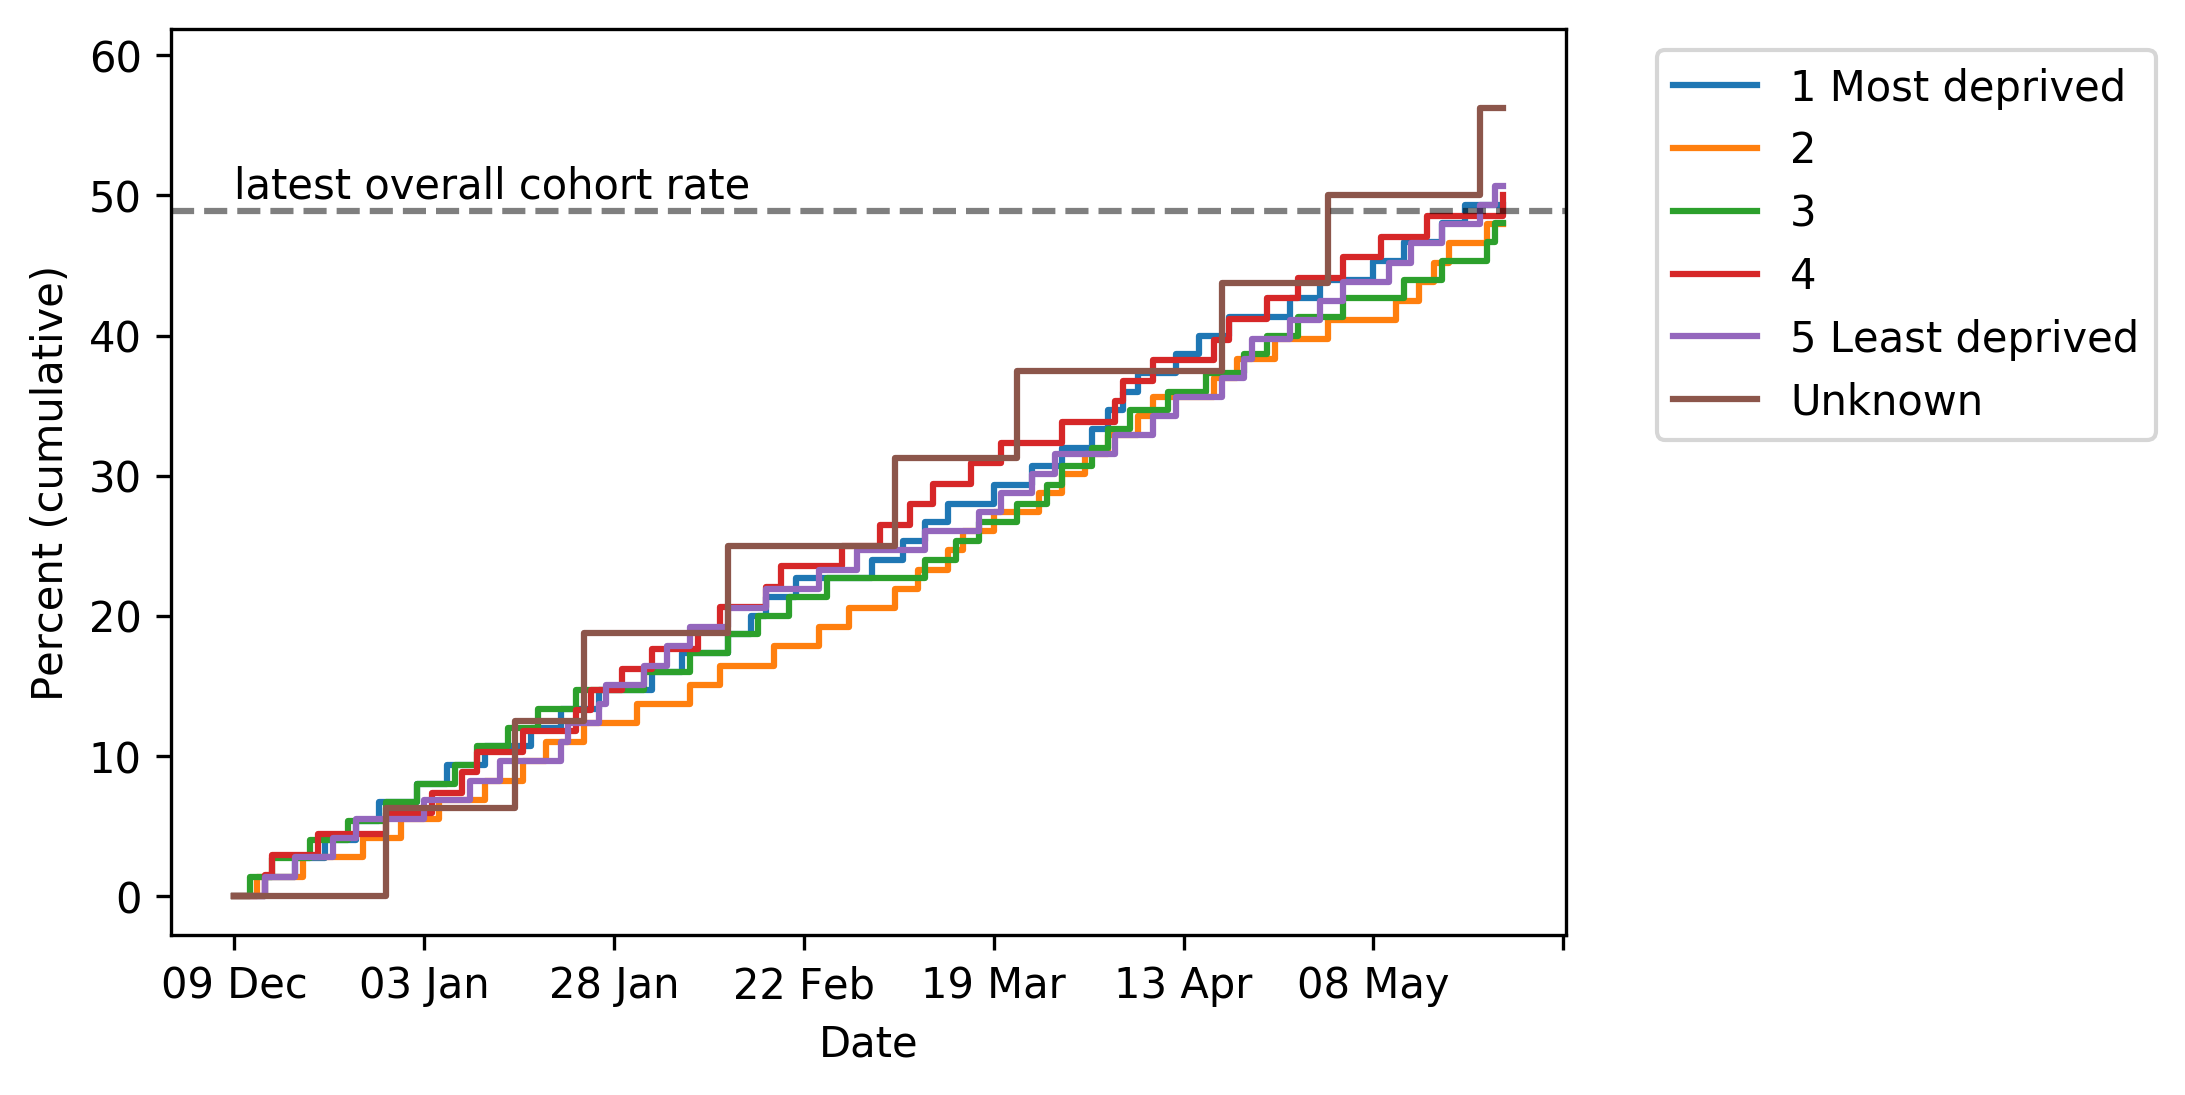

### COVID vaccinations among 60-64 population
 ### by BMI

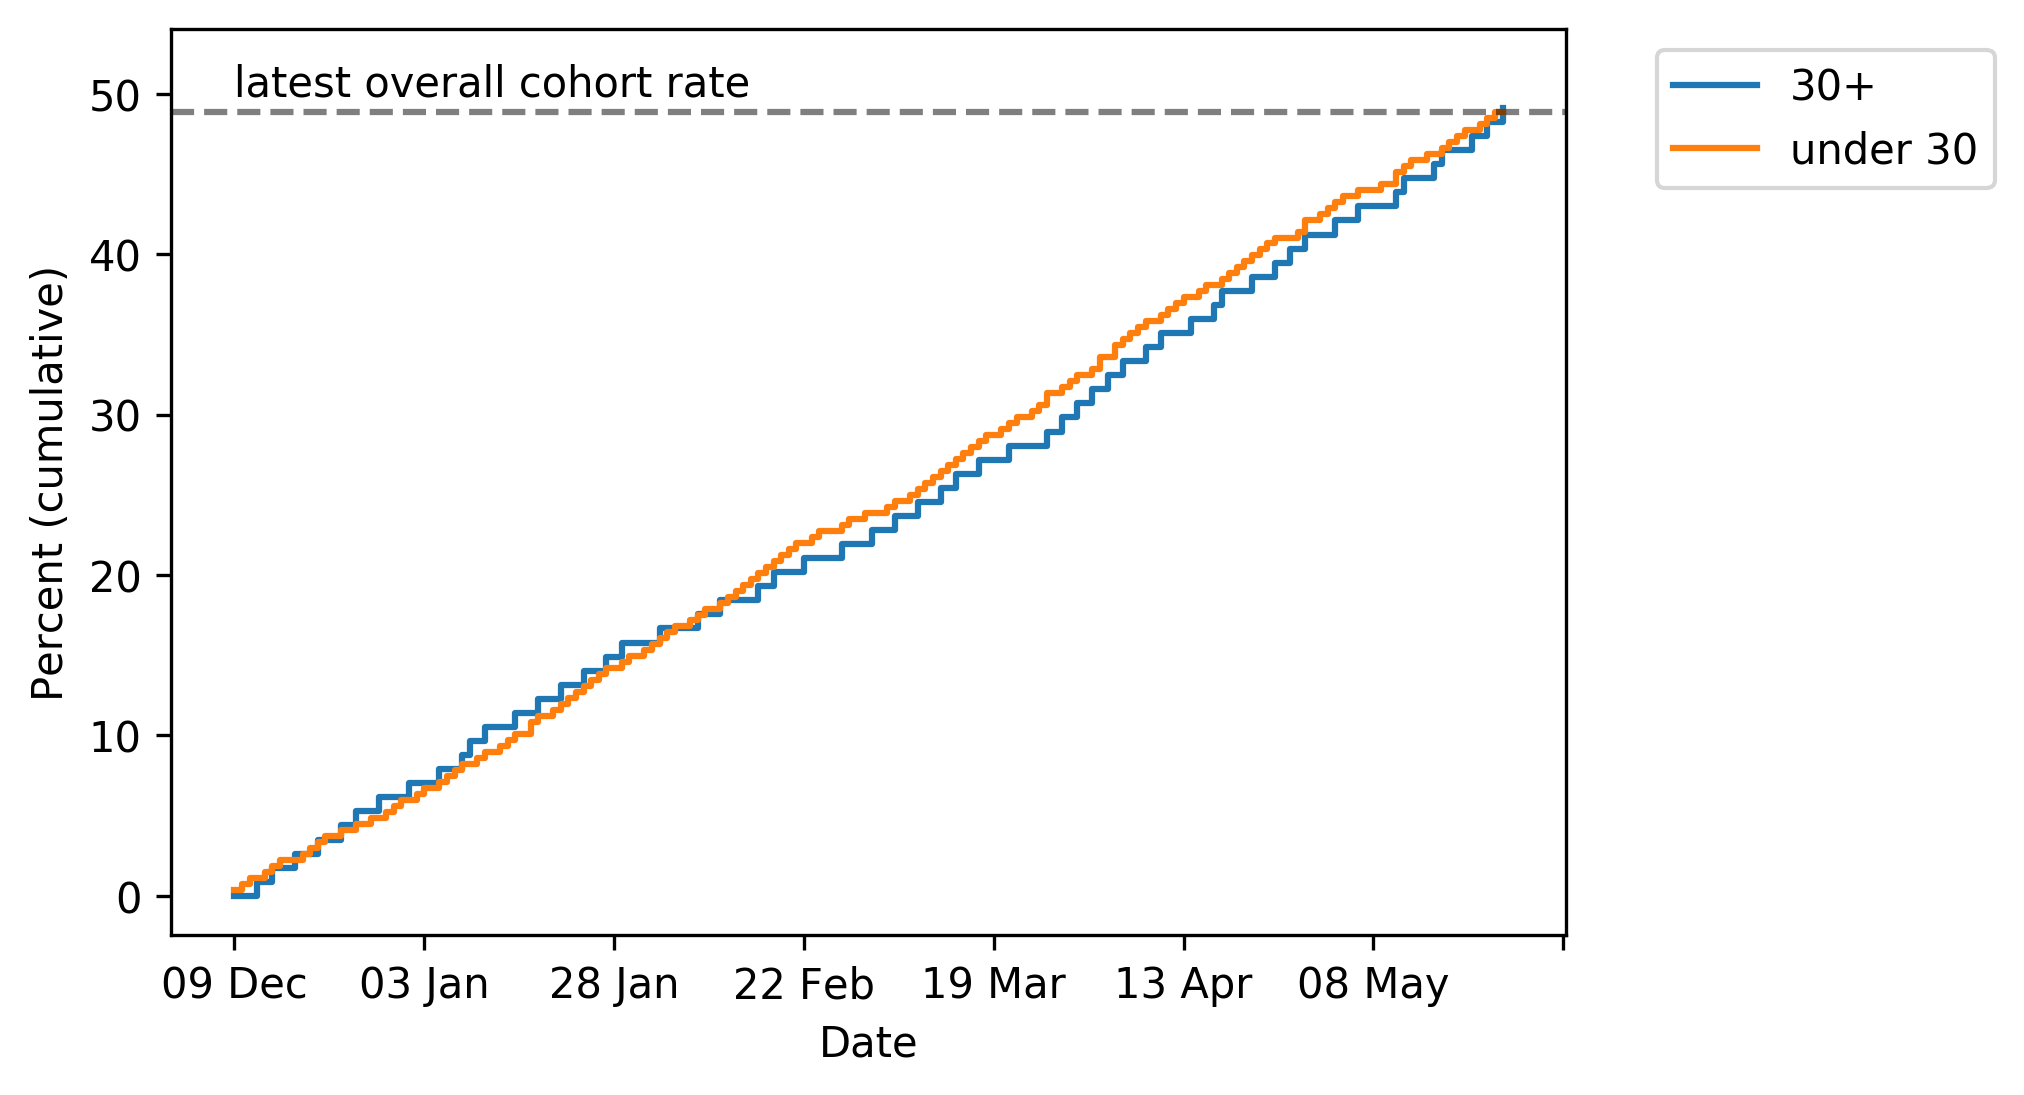

### COVID vaccinations among 60-64 population
 ### by Chronic cardiac disease

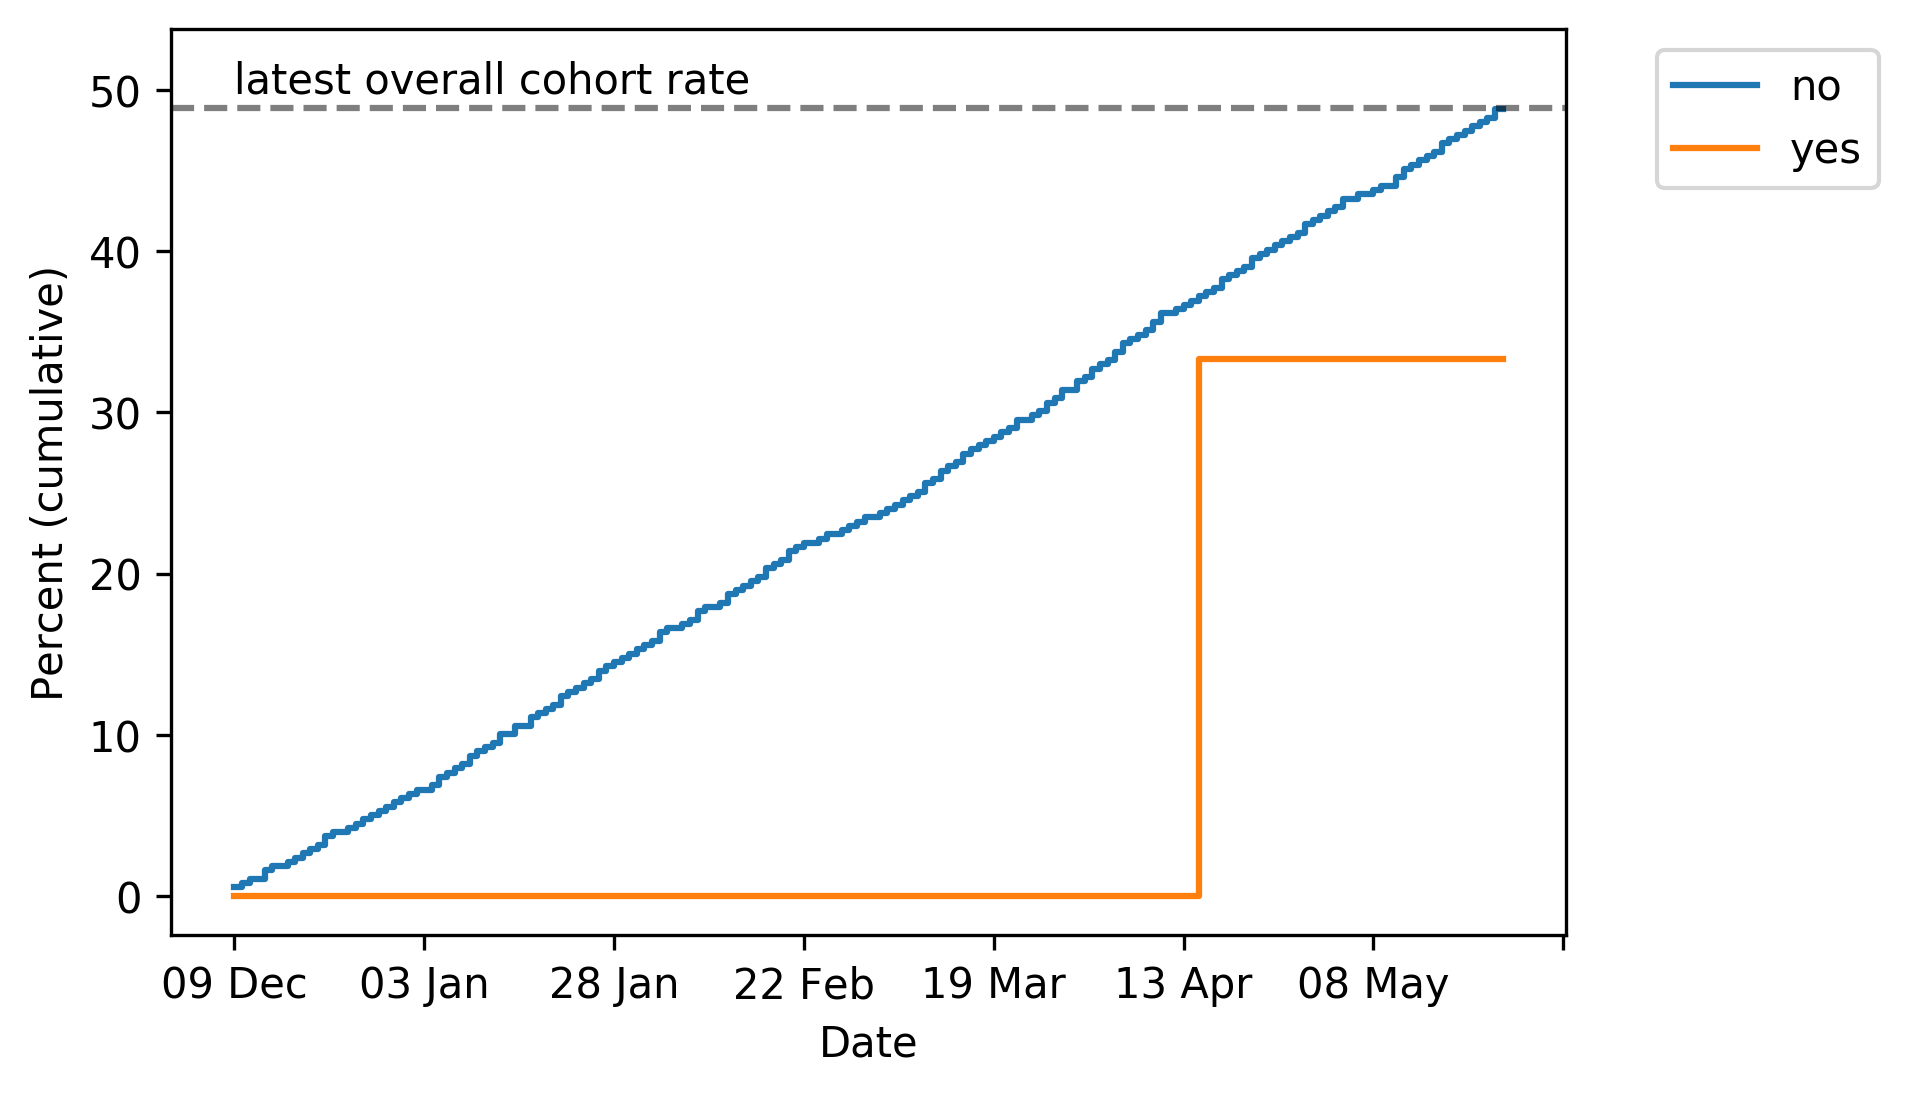

### COVID vaccinations among 60-64 population
 ### by Current COPD

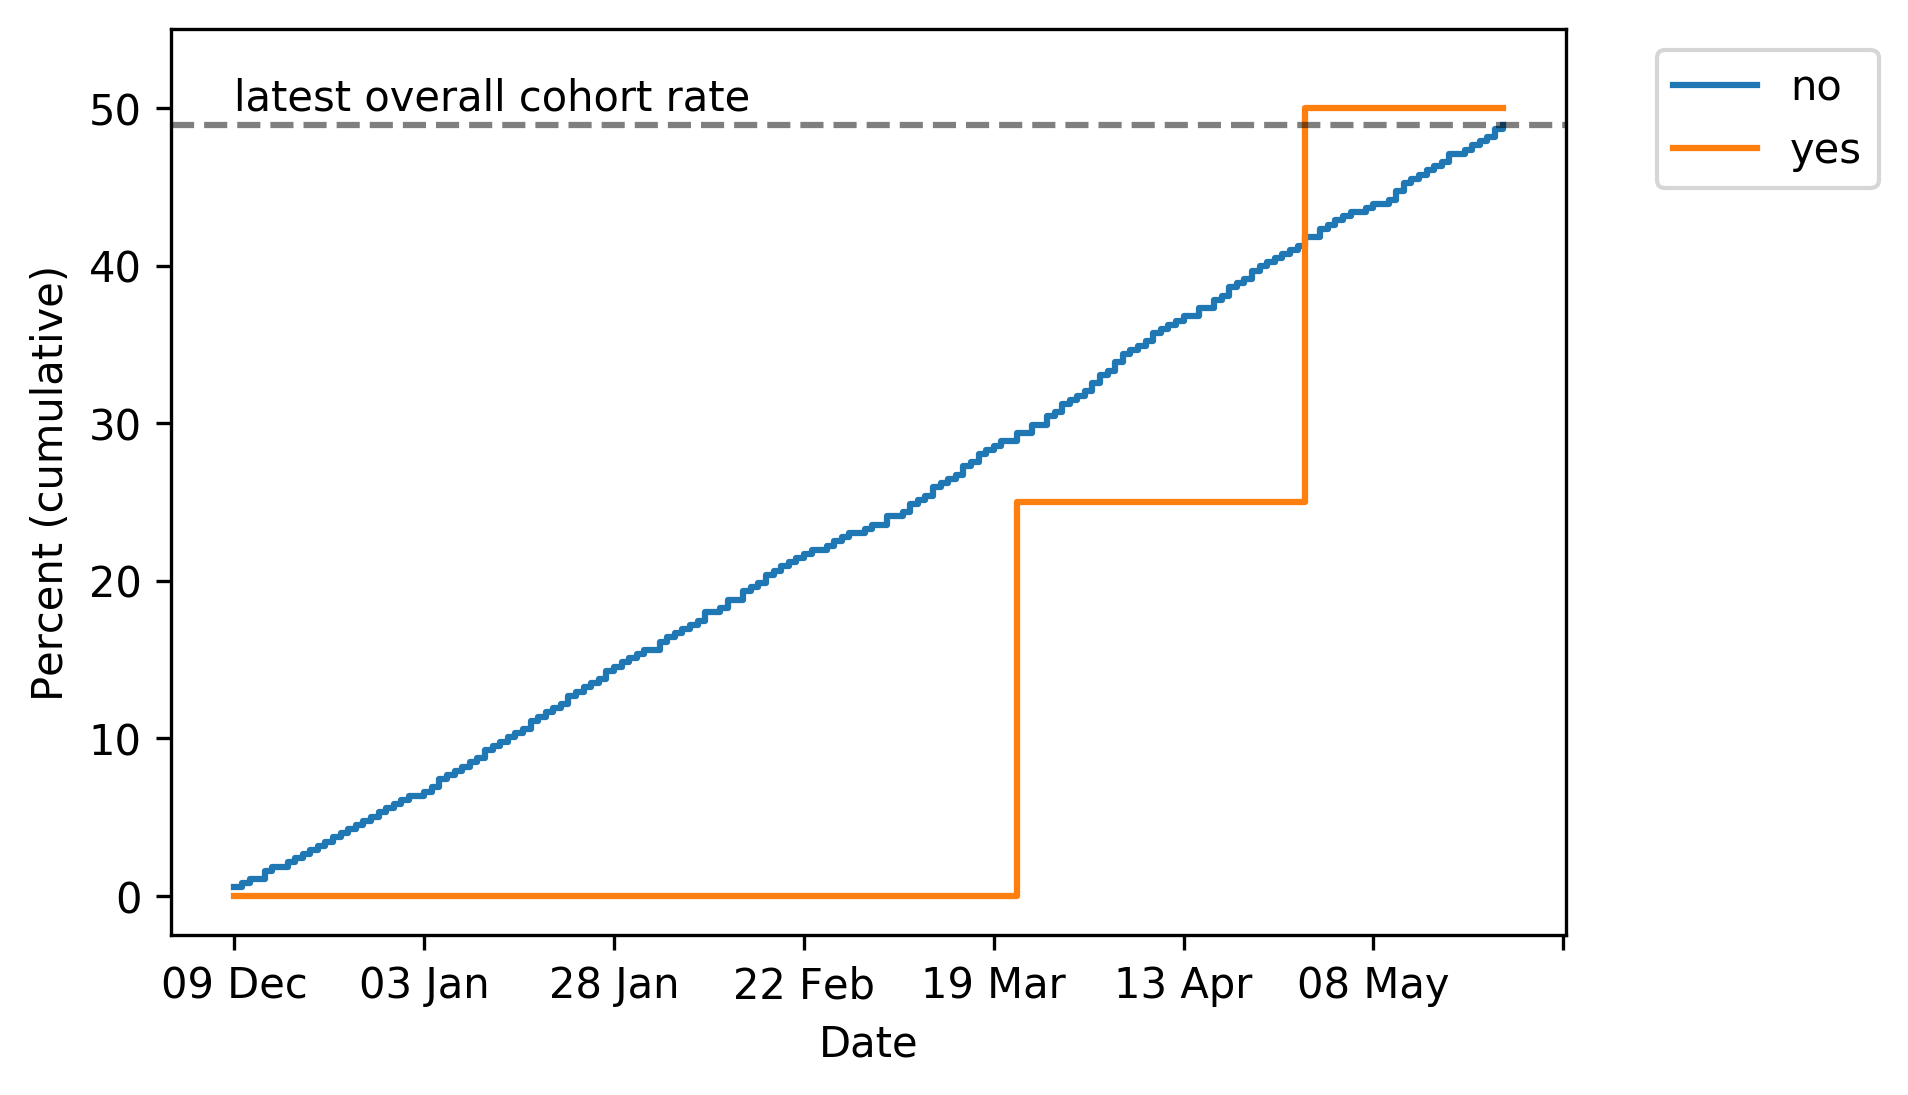

### COVID vaccinations among 60-64 population
 ### by Dementia

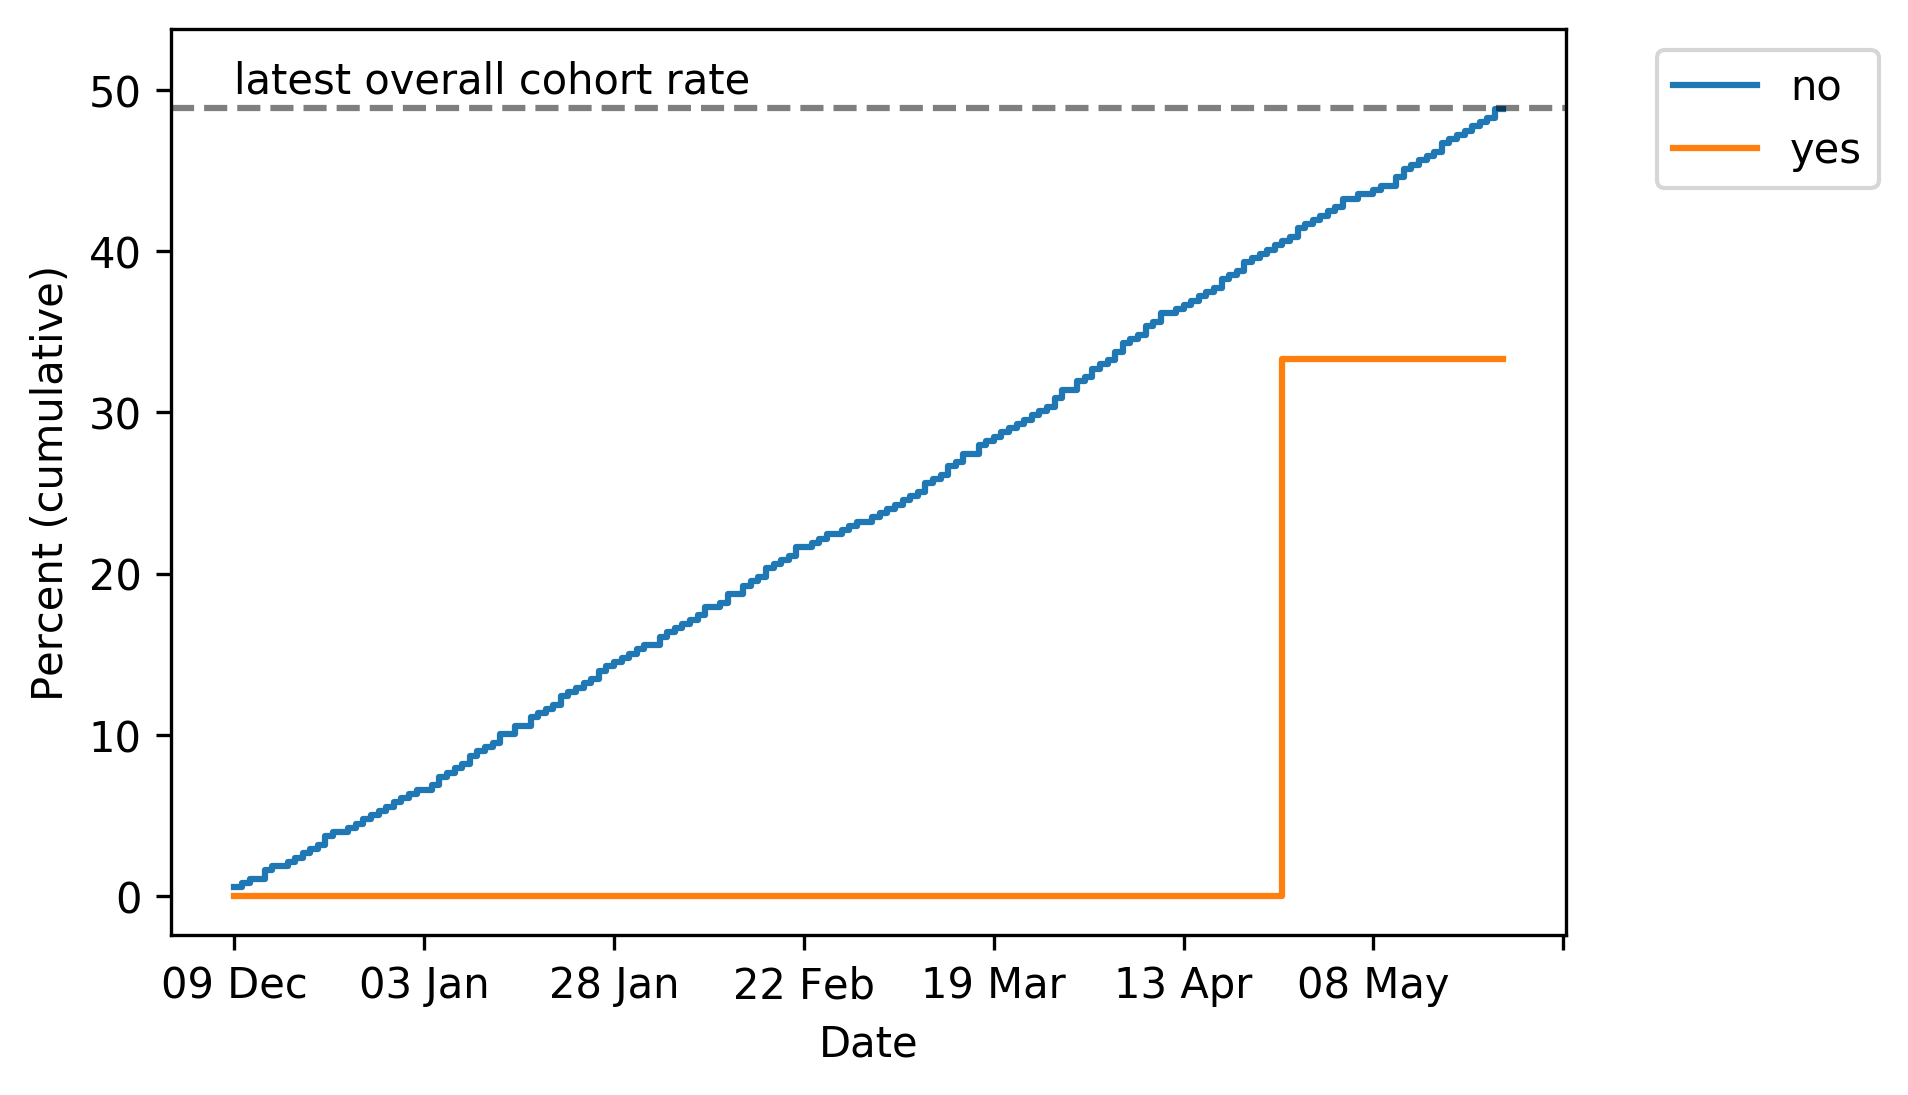

### COVID vaccinations among 60-64 population
 ### by Psychosis, schizophrenia, or bipolar

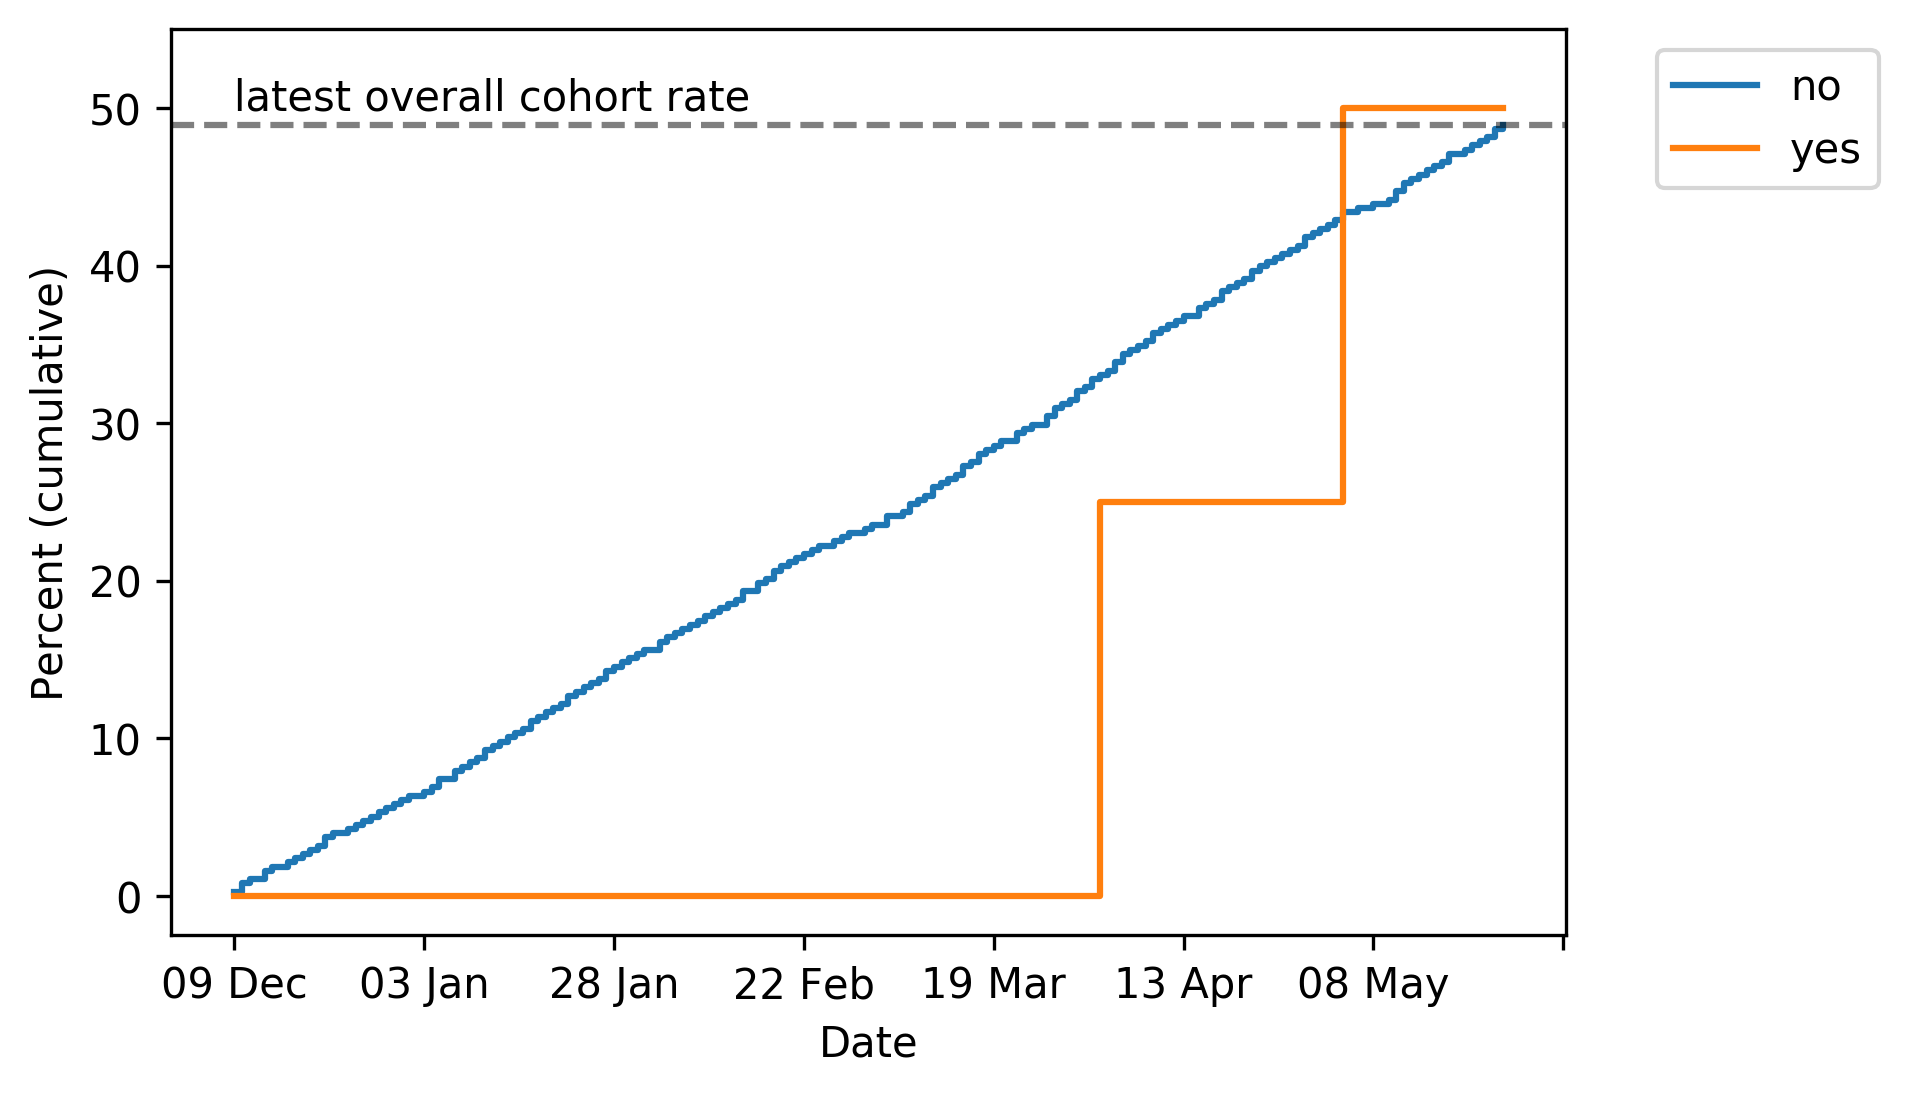

### COVID vaccinations among 60-64 population
 ### by SSRI (last 12 months)

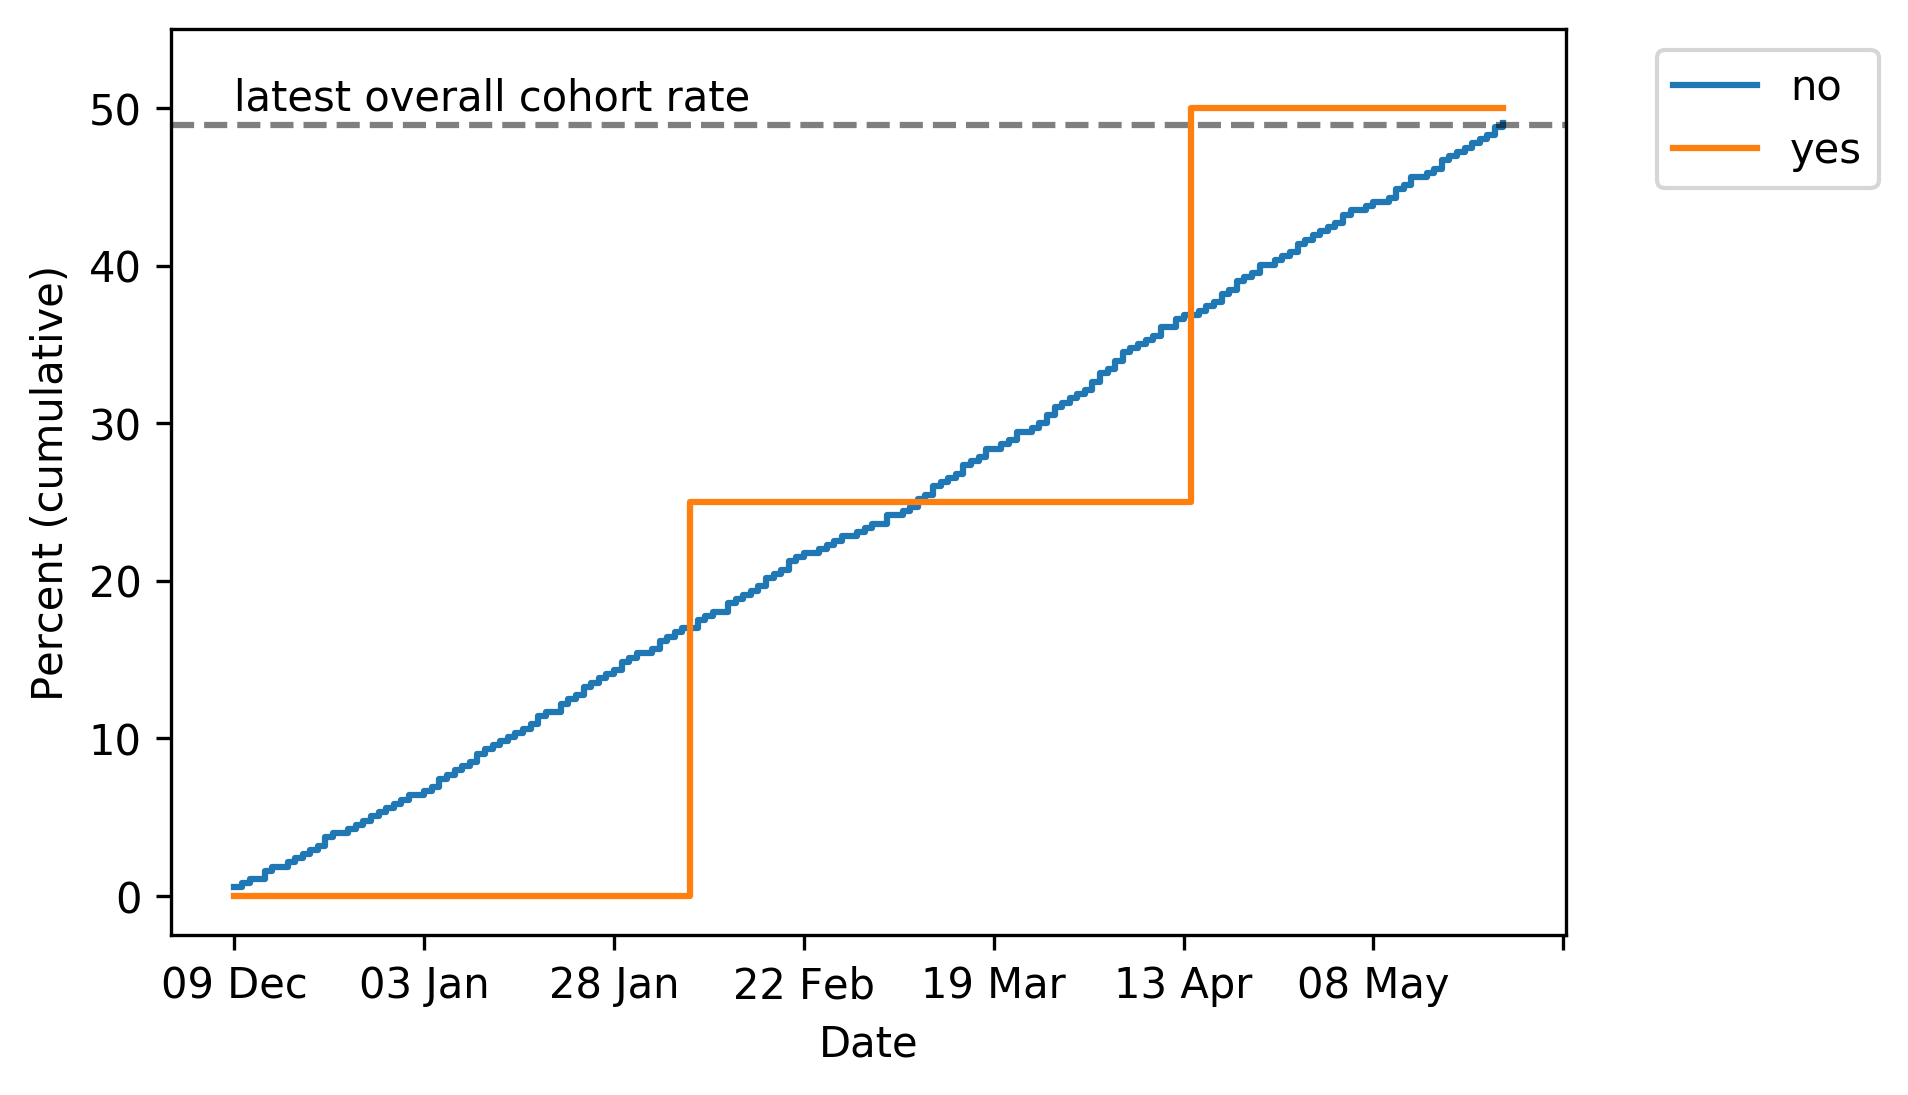

In [8]:
display(Markdown("## 60-64 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="60-64", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 55-59 population according to demographic/clinical features, cumulatively by day. <a name='charts55' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 55-59 population

### COVID vaccinations among 55-59 population
 ### by Sex

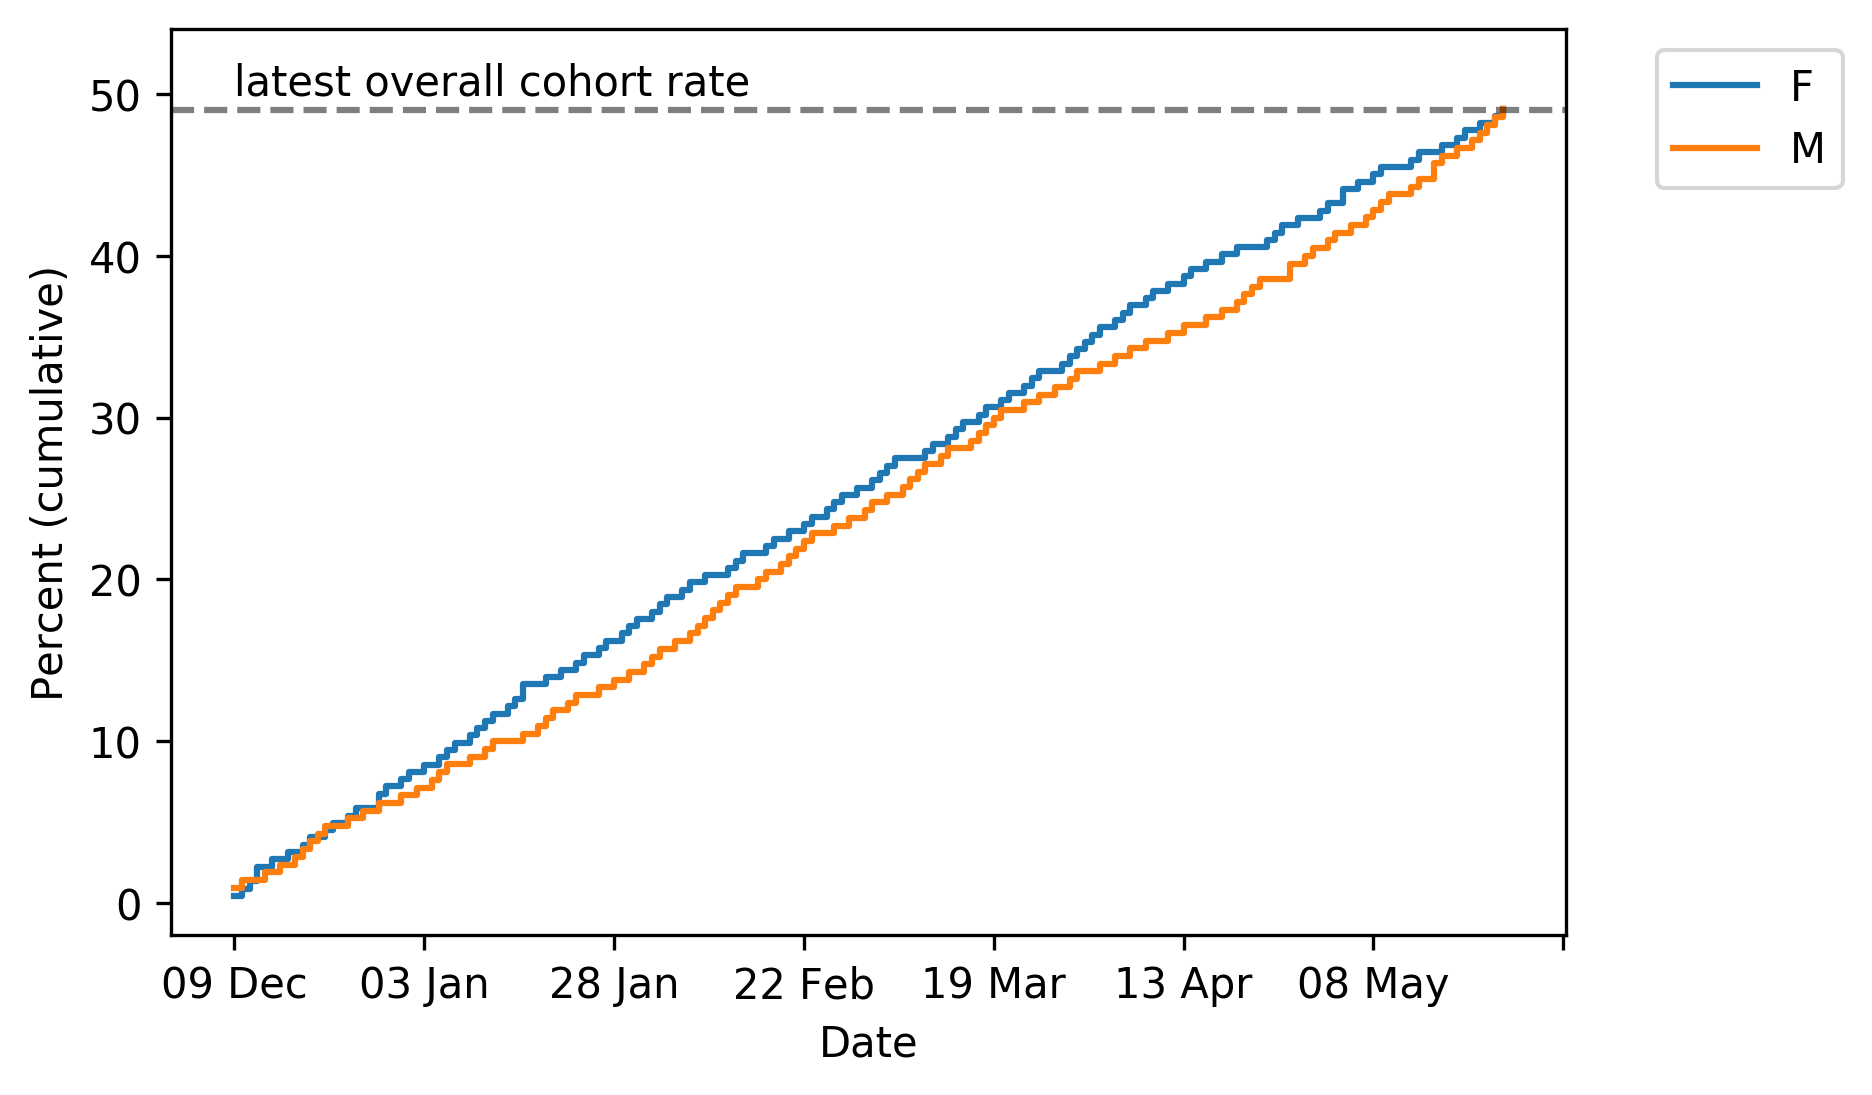

### COVID vaccinations among 55-59 population
 ### by Ethnicity (broad categories)

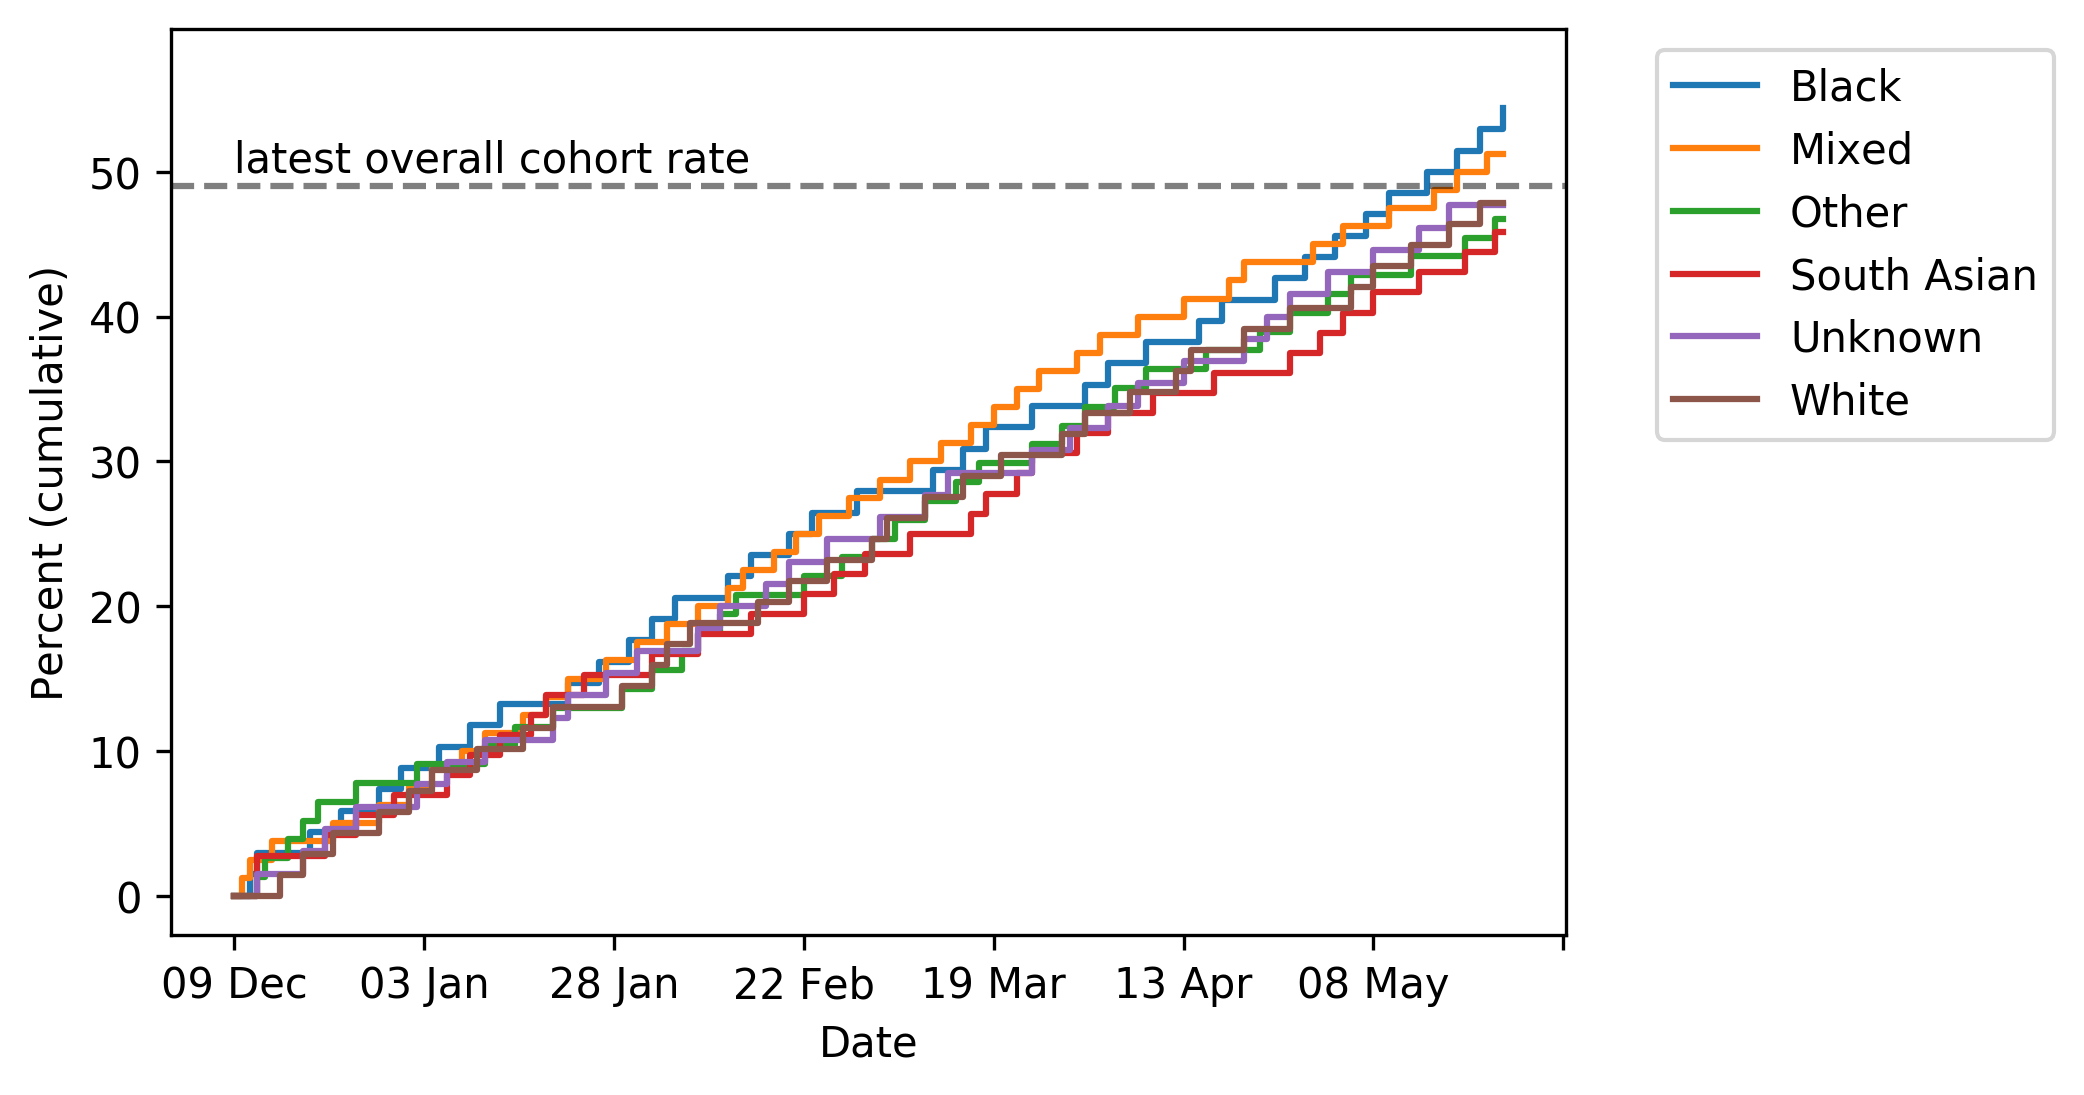

### COVID vaccinations among 55-59 population
 ### by Index of Multiple Deprivation (quintiles)

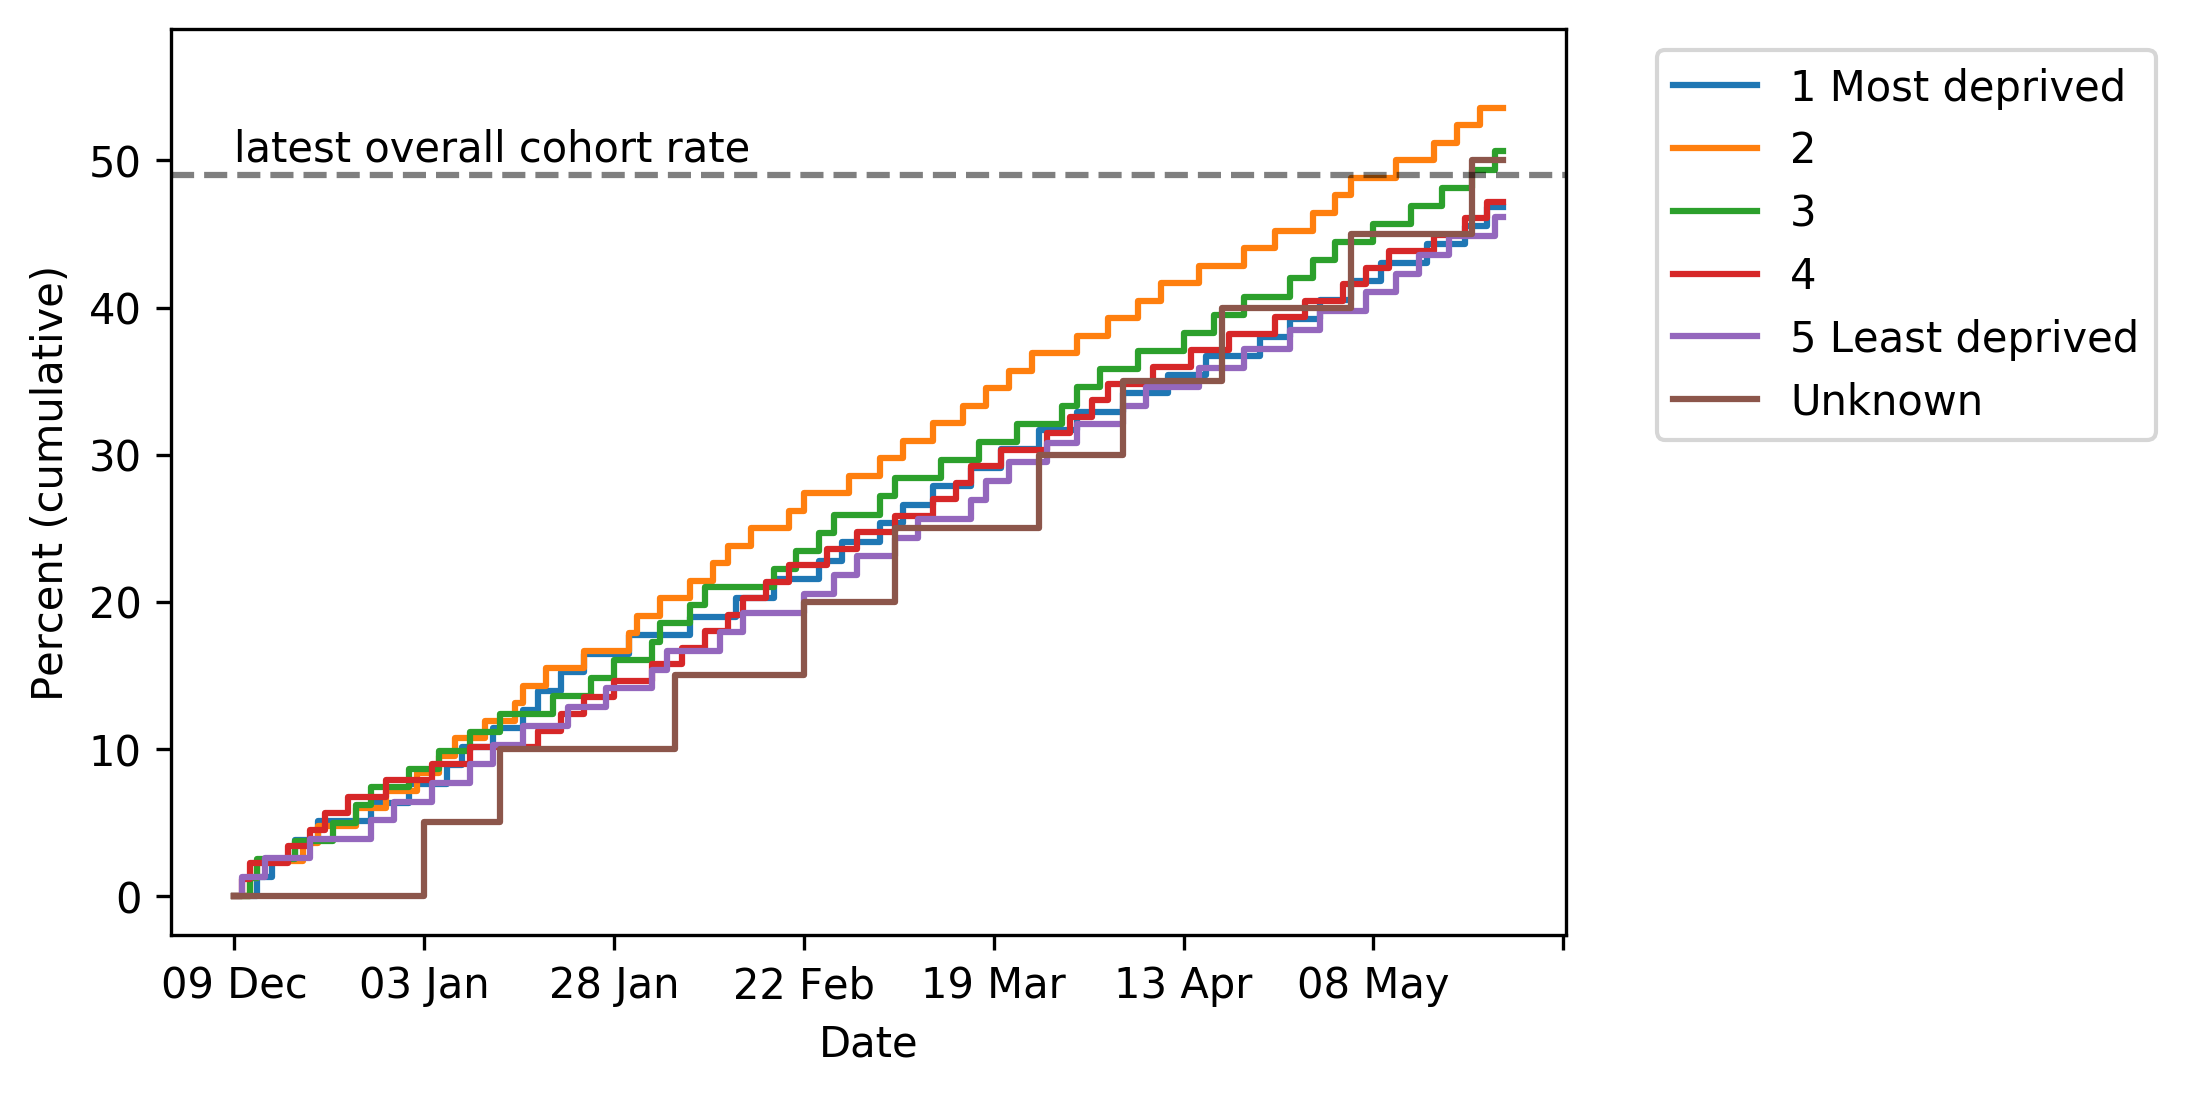

### COVID vaccinations among 55-59 population
 ### by BMI

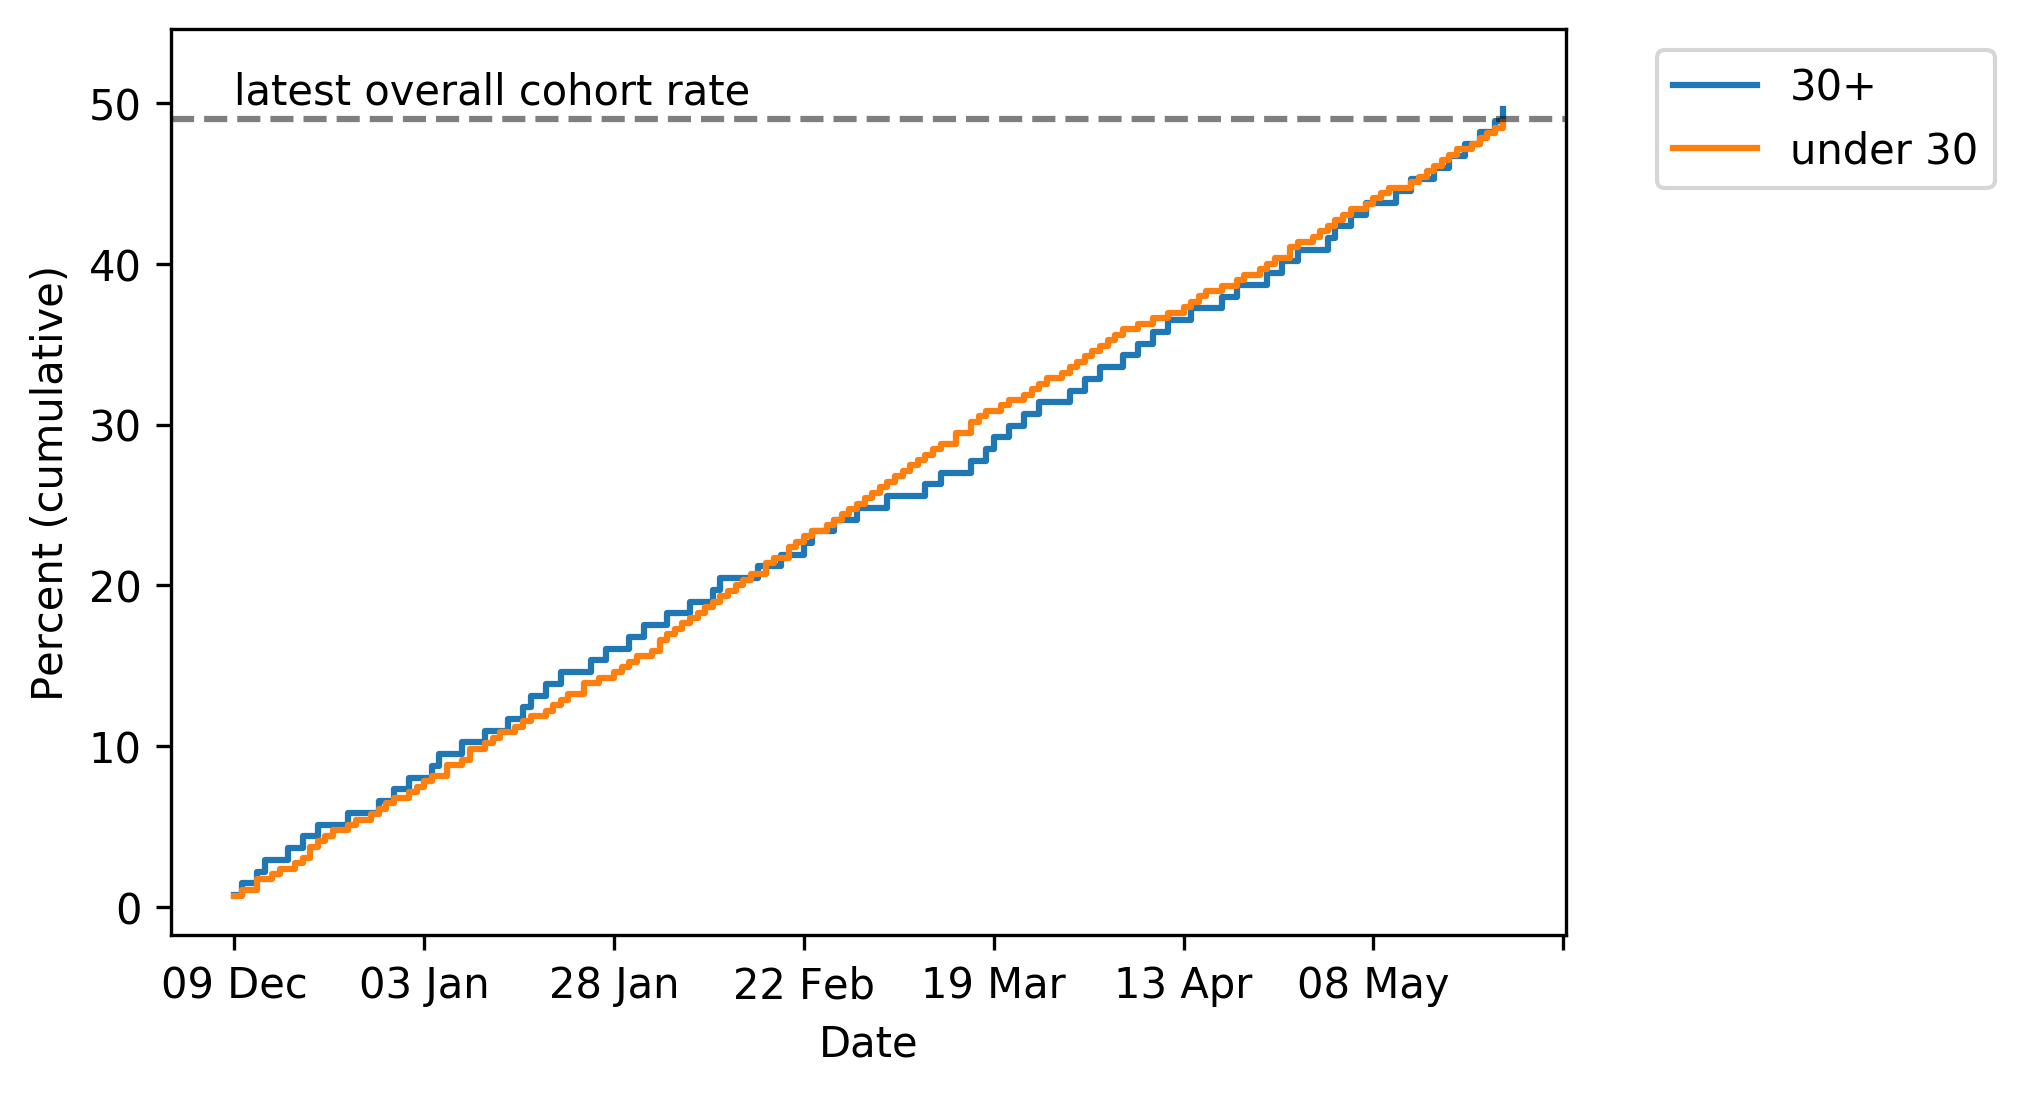

### COVID vaccinations among 55-59 population
 ### by Chronic cardiac disease

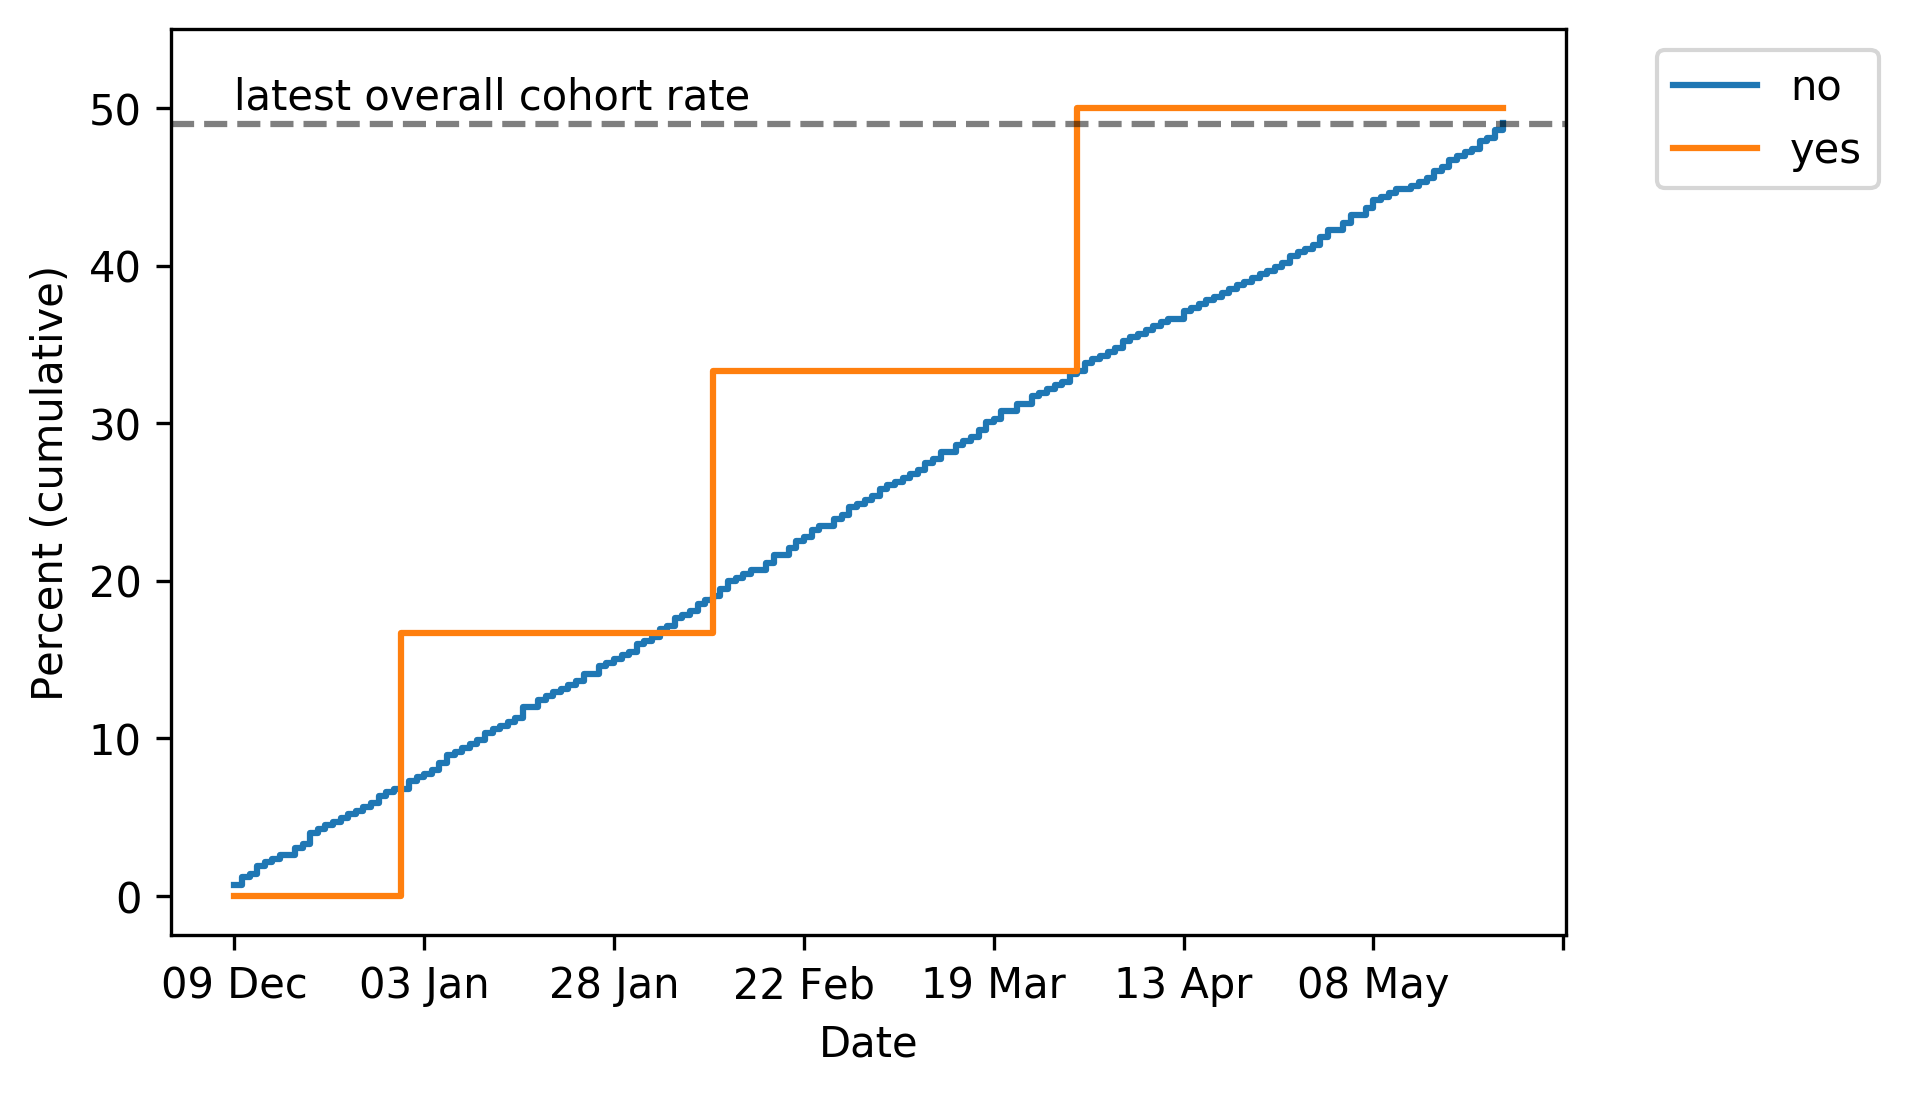

### COVID vaccinations among 55-59 population
 ### by Current COPD

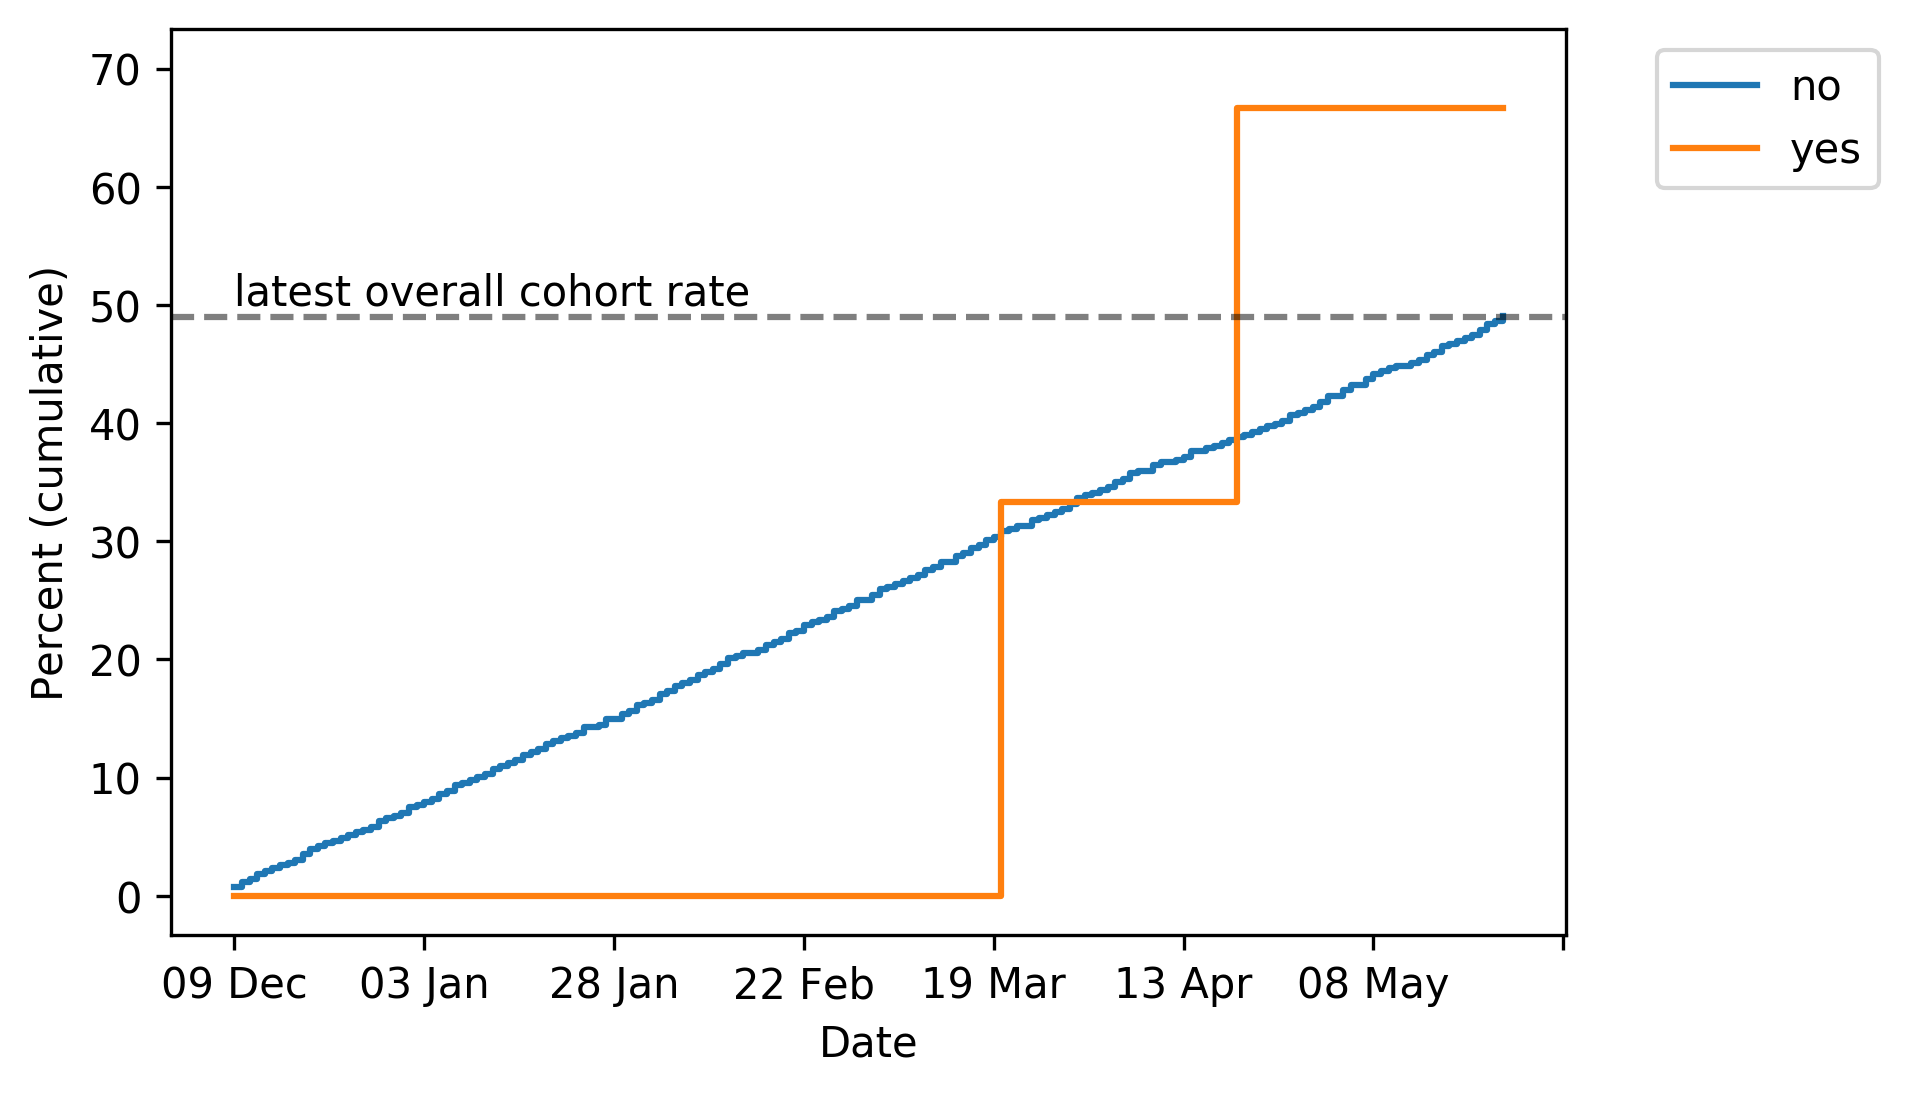

### COVID vaccinations among 55-59 population
 ### by Psychosis, schizophrenia, or bipolar

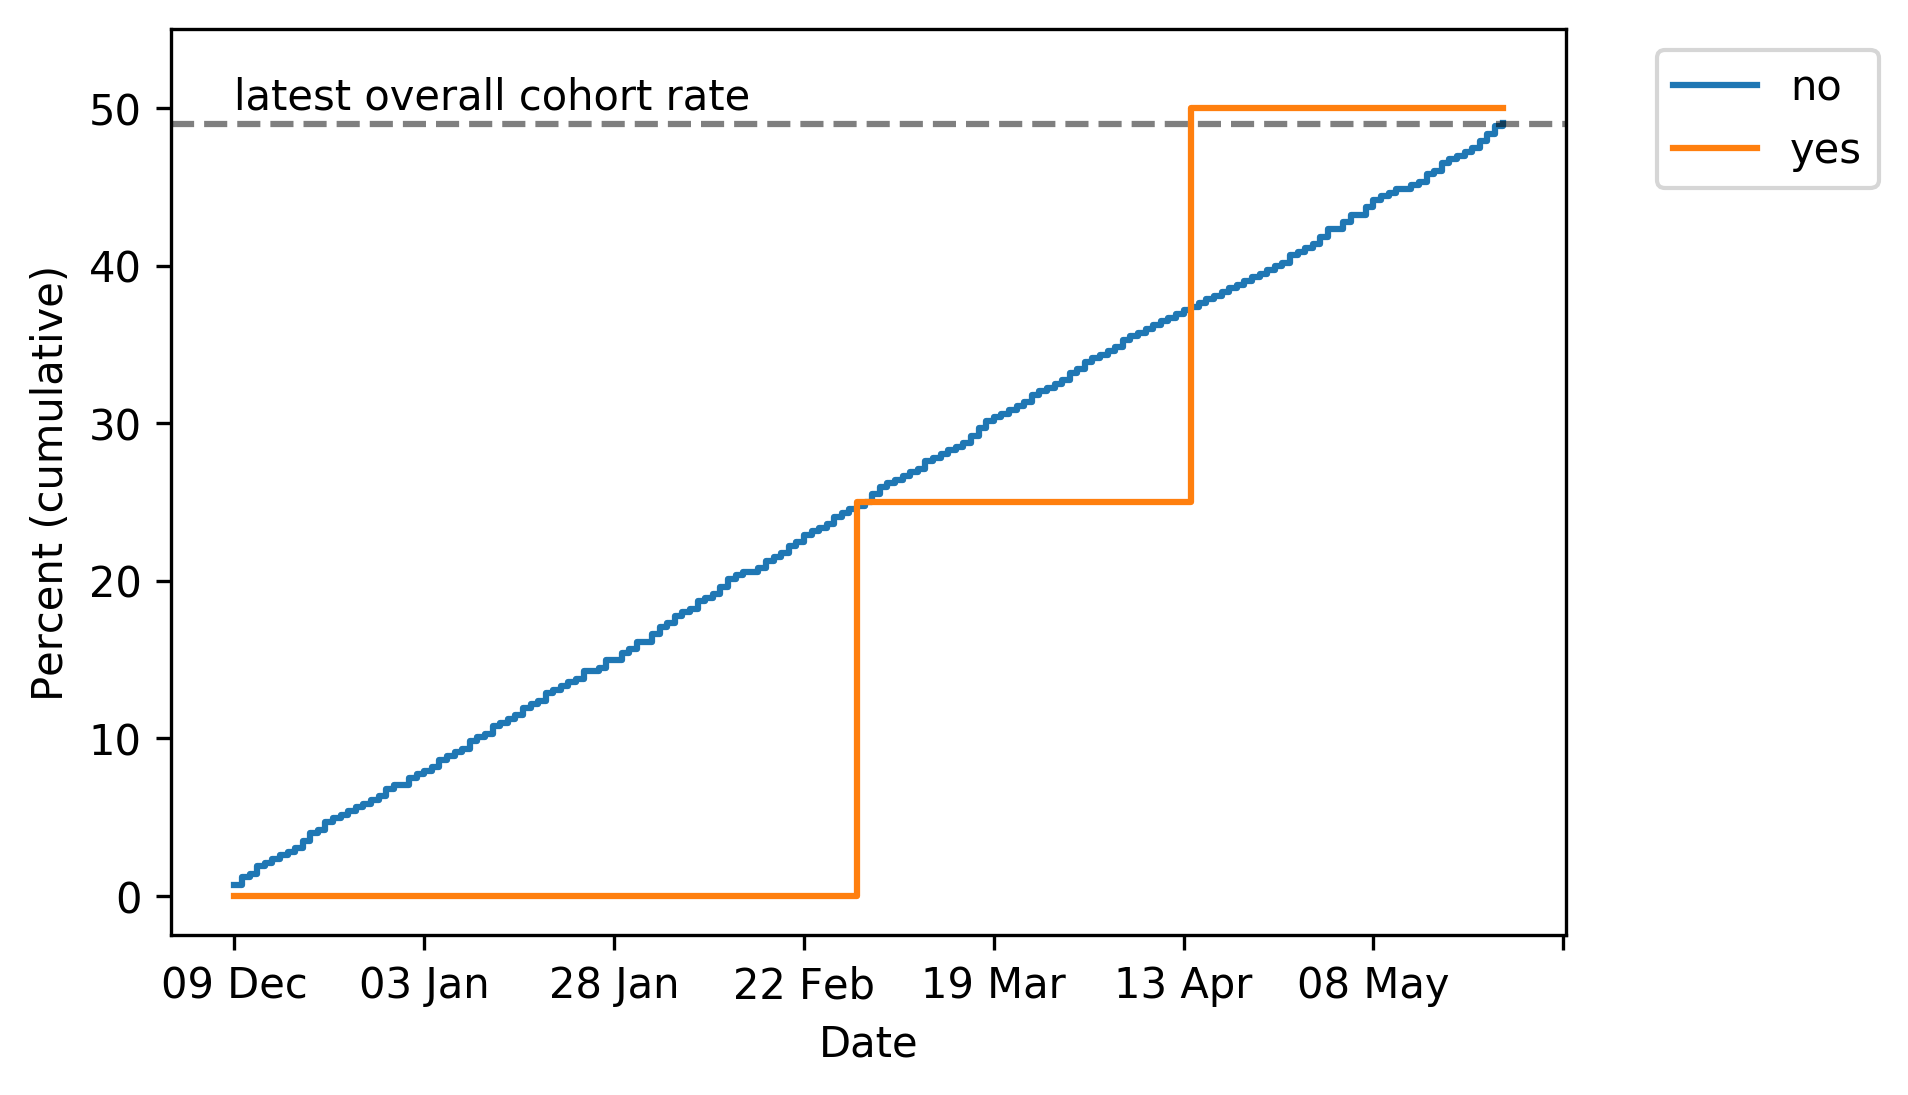

### COVID vaccinations among 55-59 population
 ### by SSRI (last 12 months)

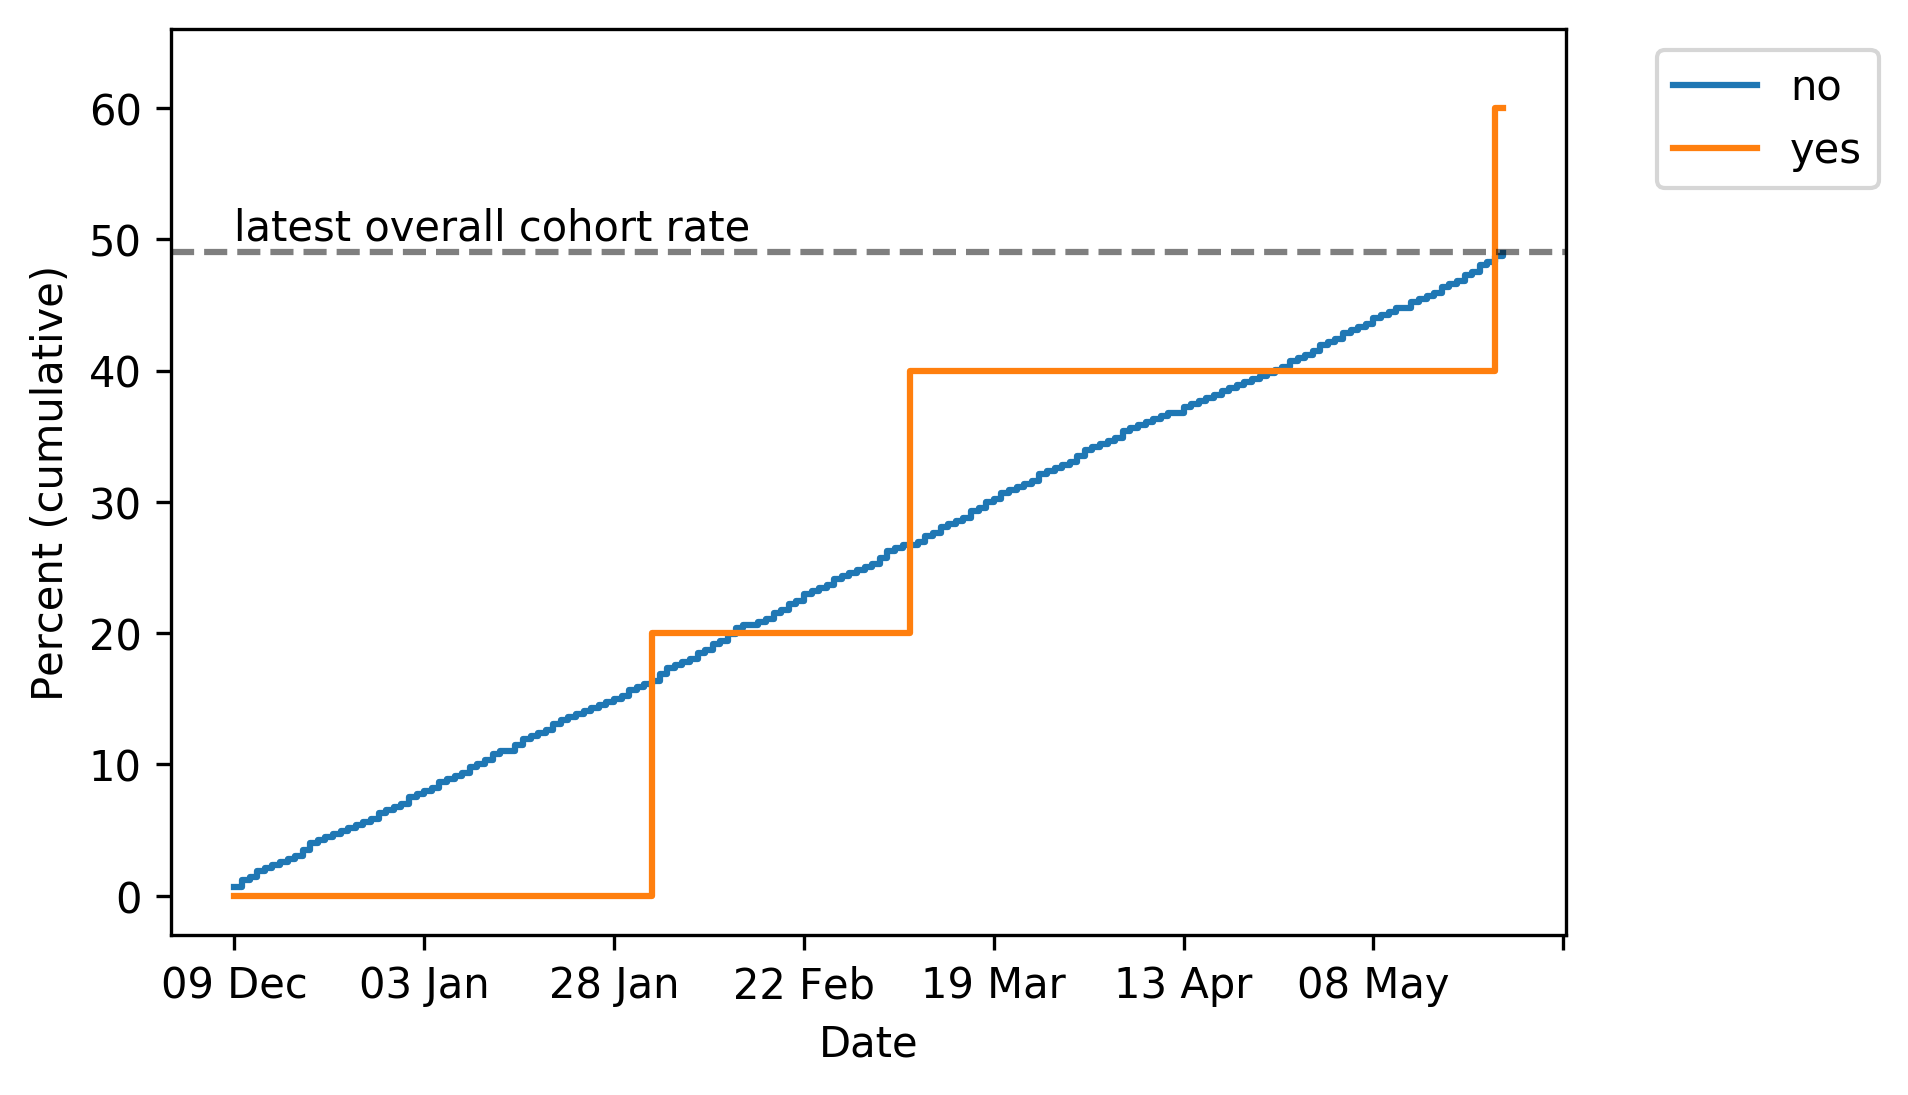

In [9]:
display(Markdown("## 55-59 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="55-59", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 50-54 population according to demographic/clinical features, cumulatively by day. <a name='charts50' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

+

## 50-54 population

### COVID vaccinations among 50-54 population
 ### by Sex

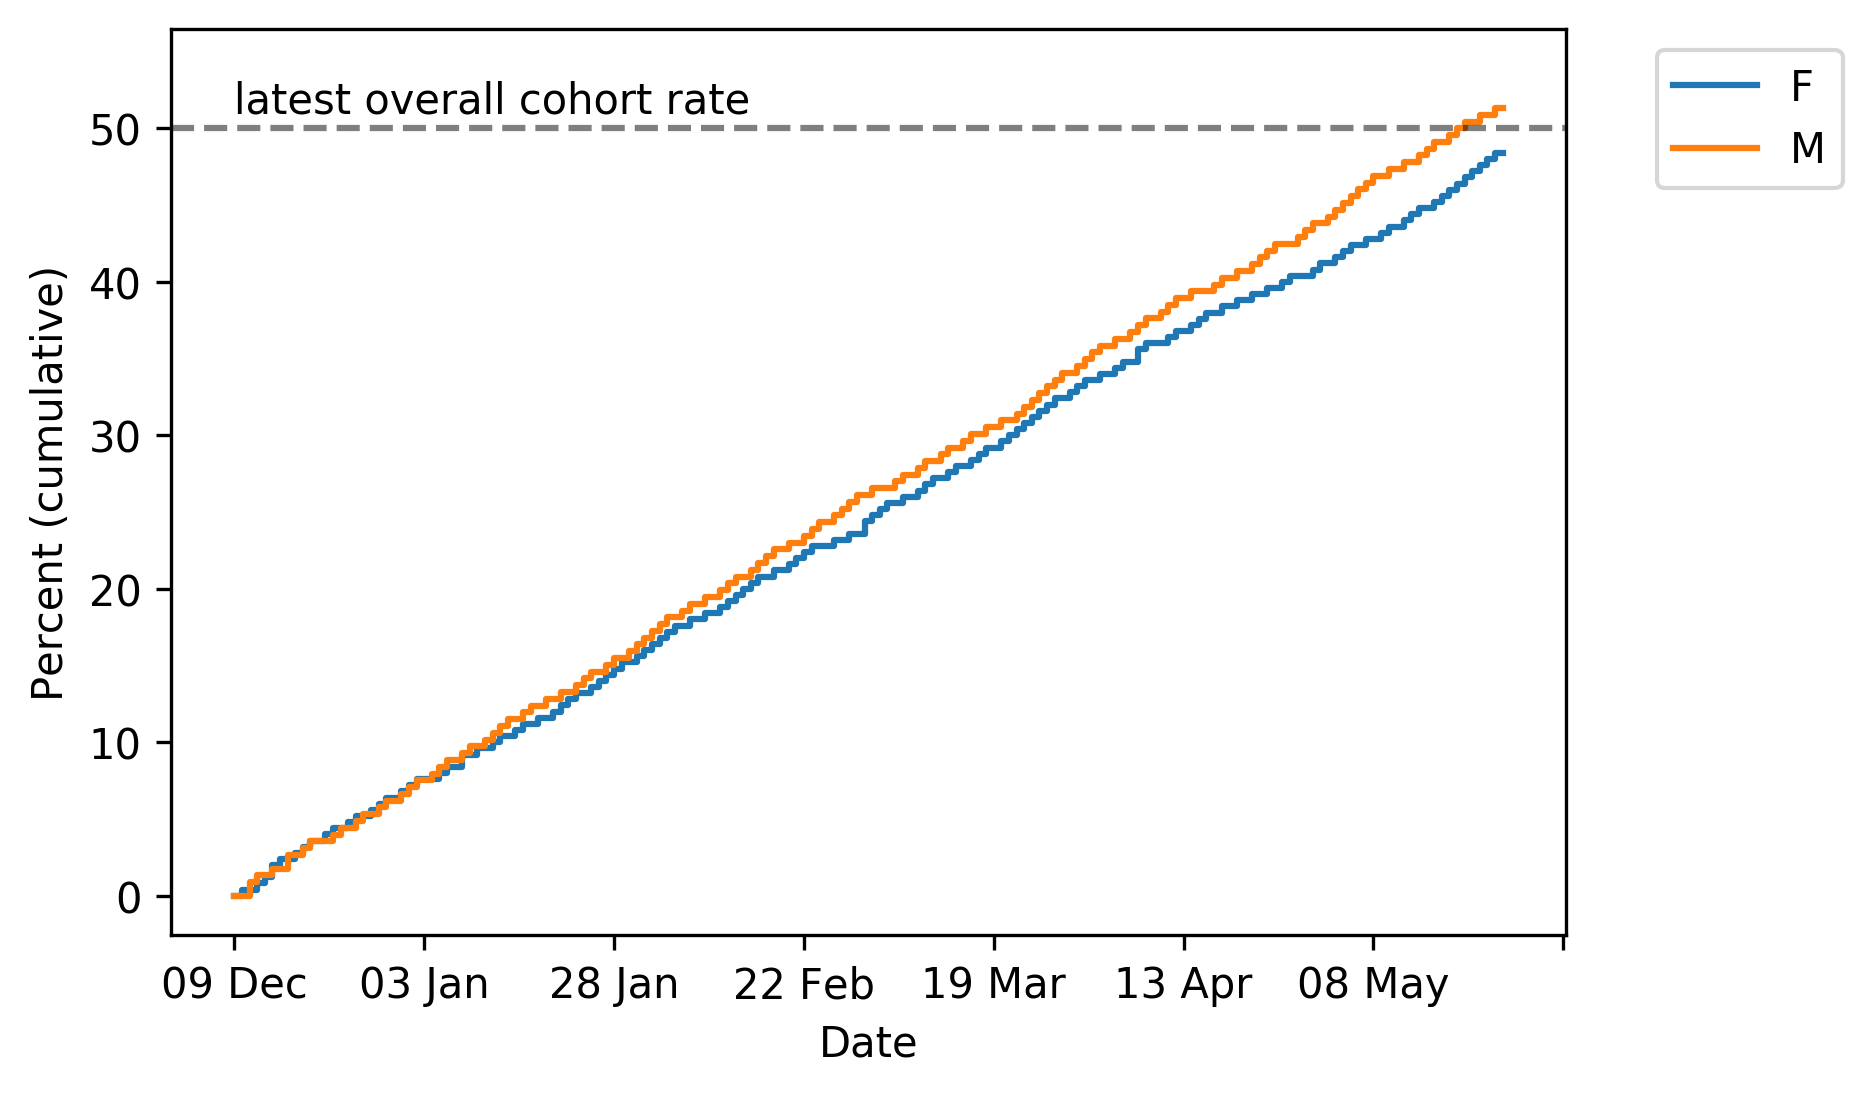

### COVID vaccinations among 50-54 population
 ### by Ethnicity (broad categories)

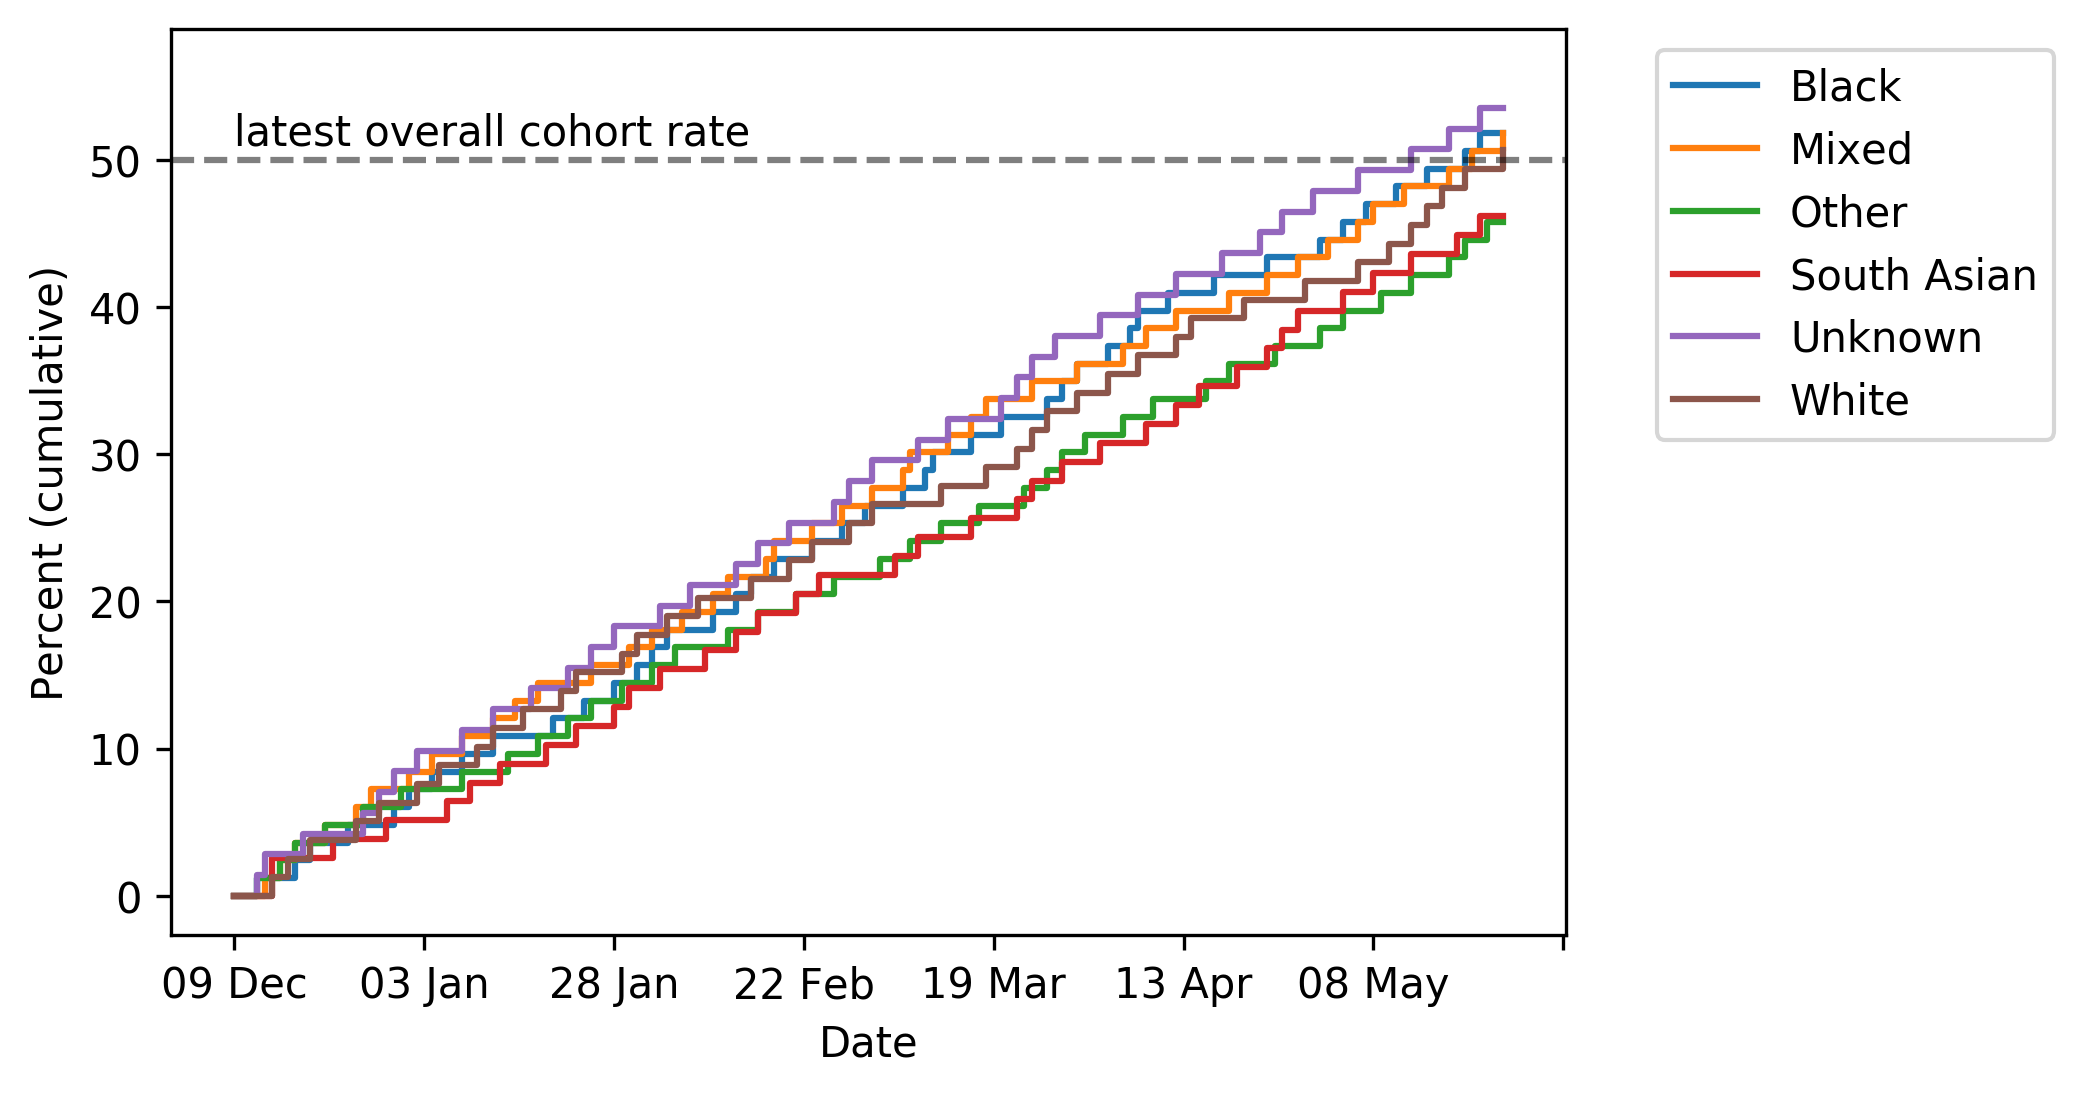

### COVID vaccinations among 50-54 population
 ### by Index of Multiple Deprivation (quintiles)

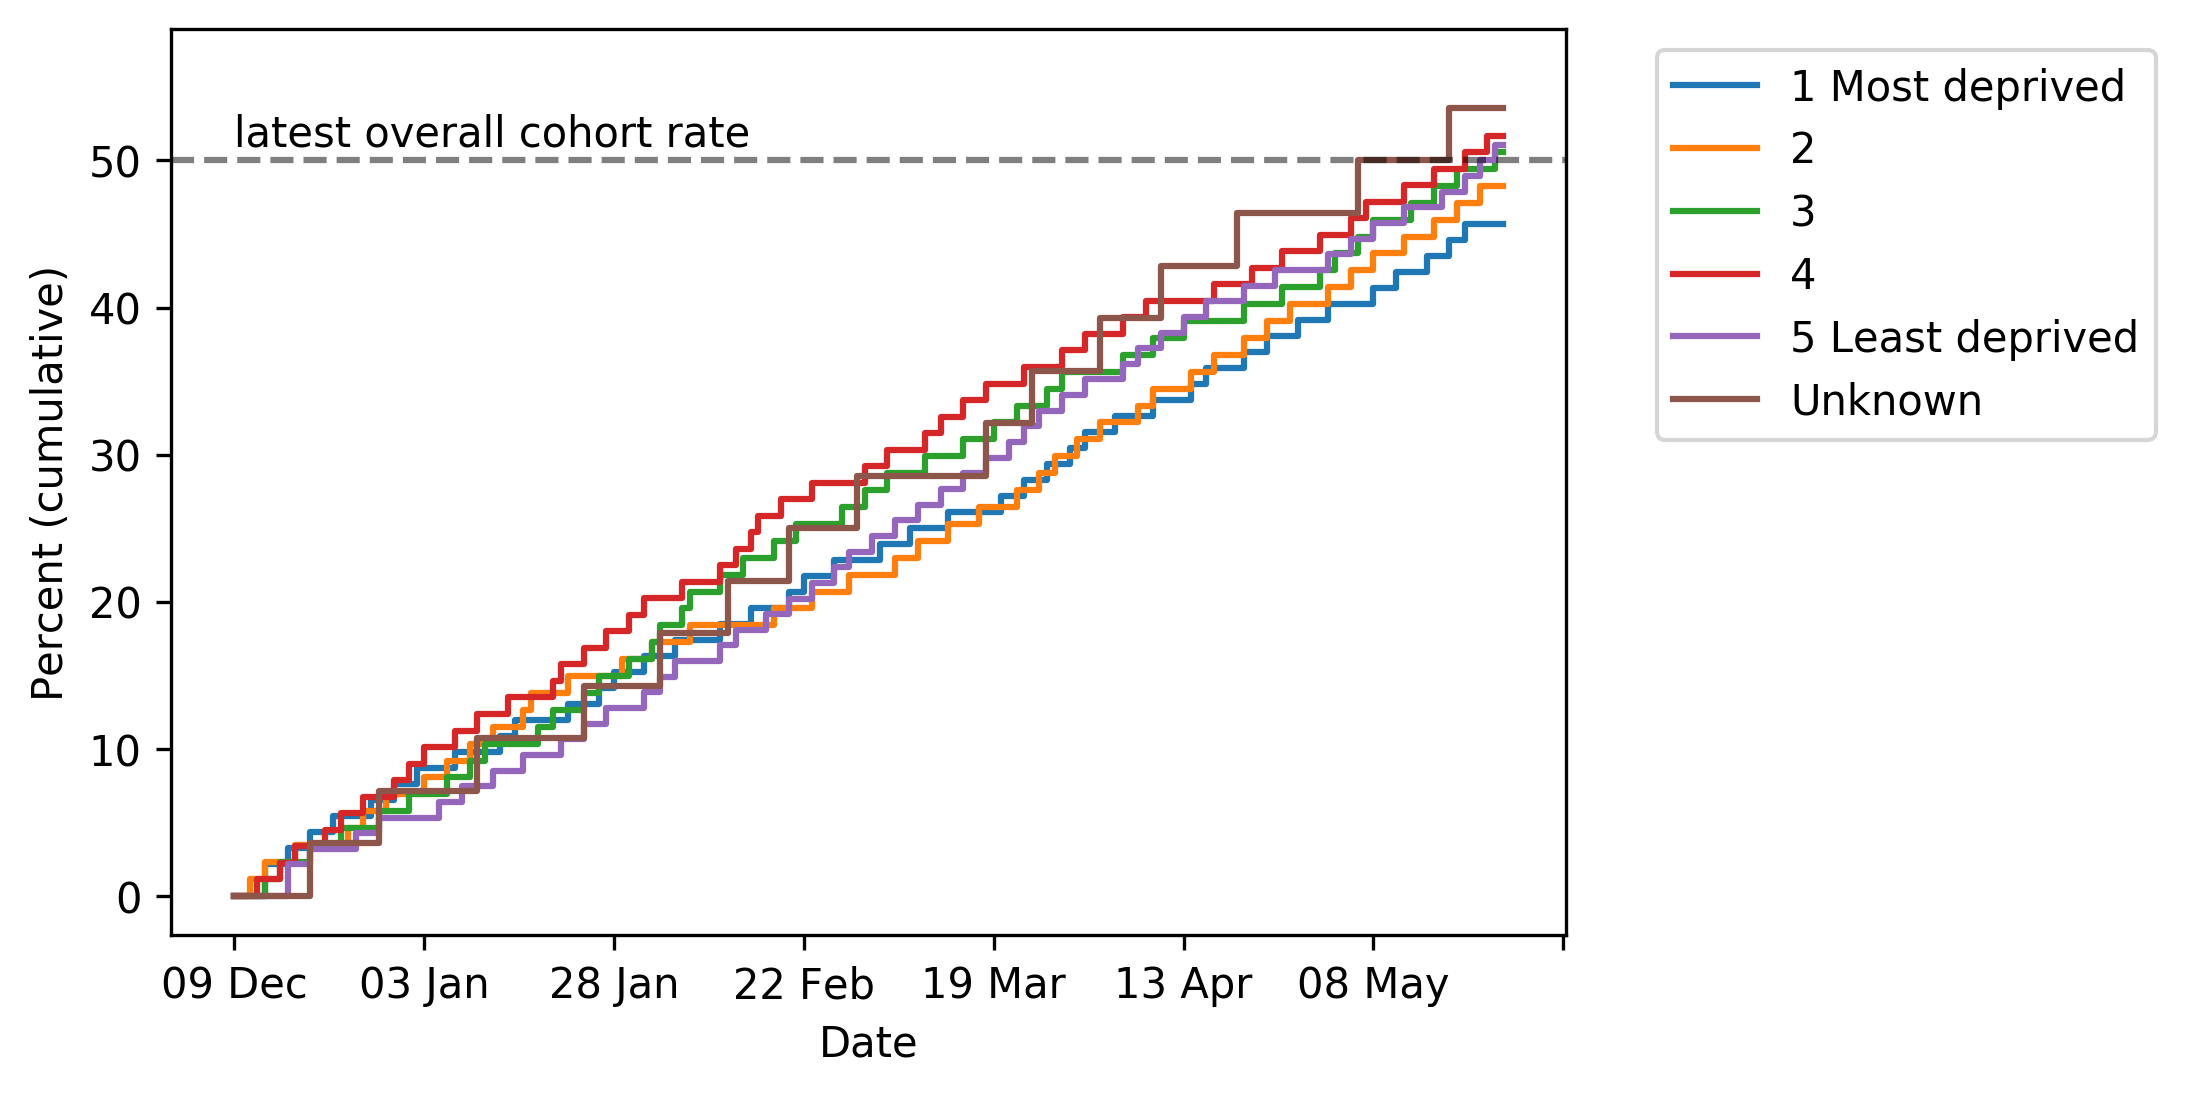

### COVID vaccinations among 50-54 population
 ### by BMI

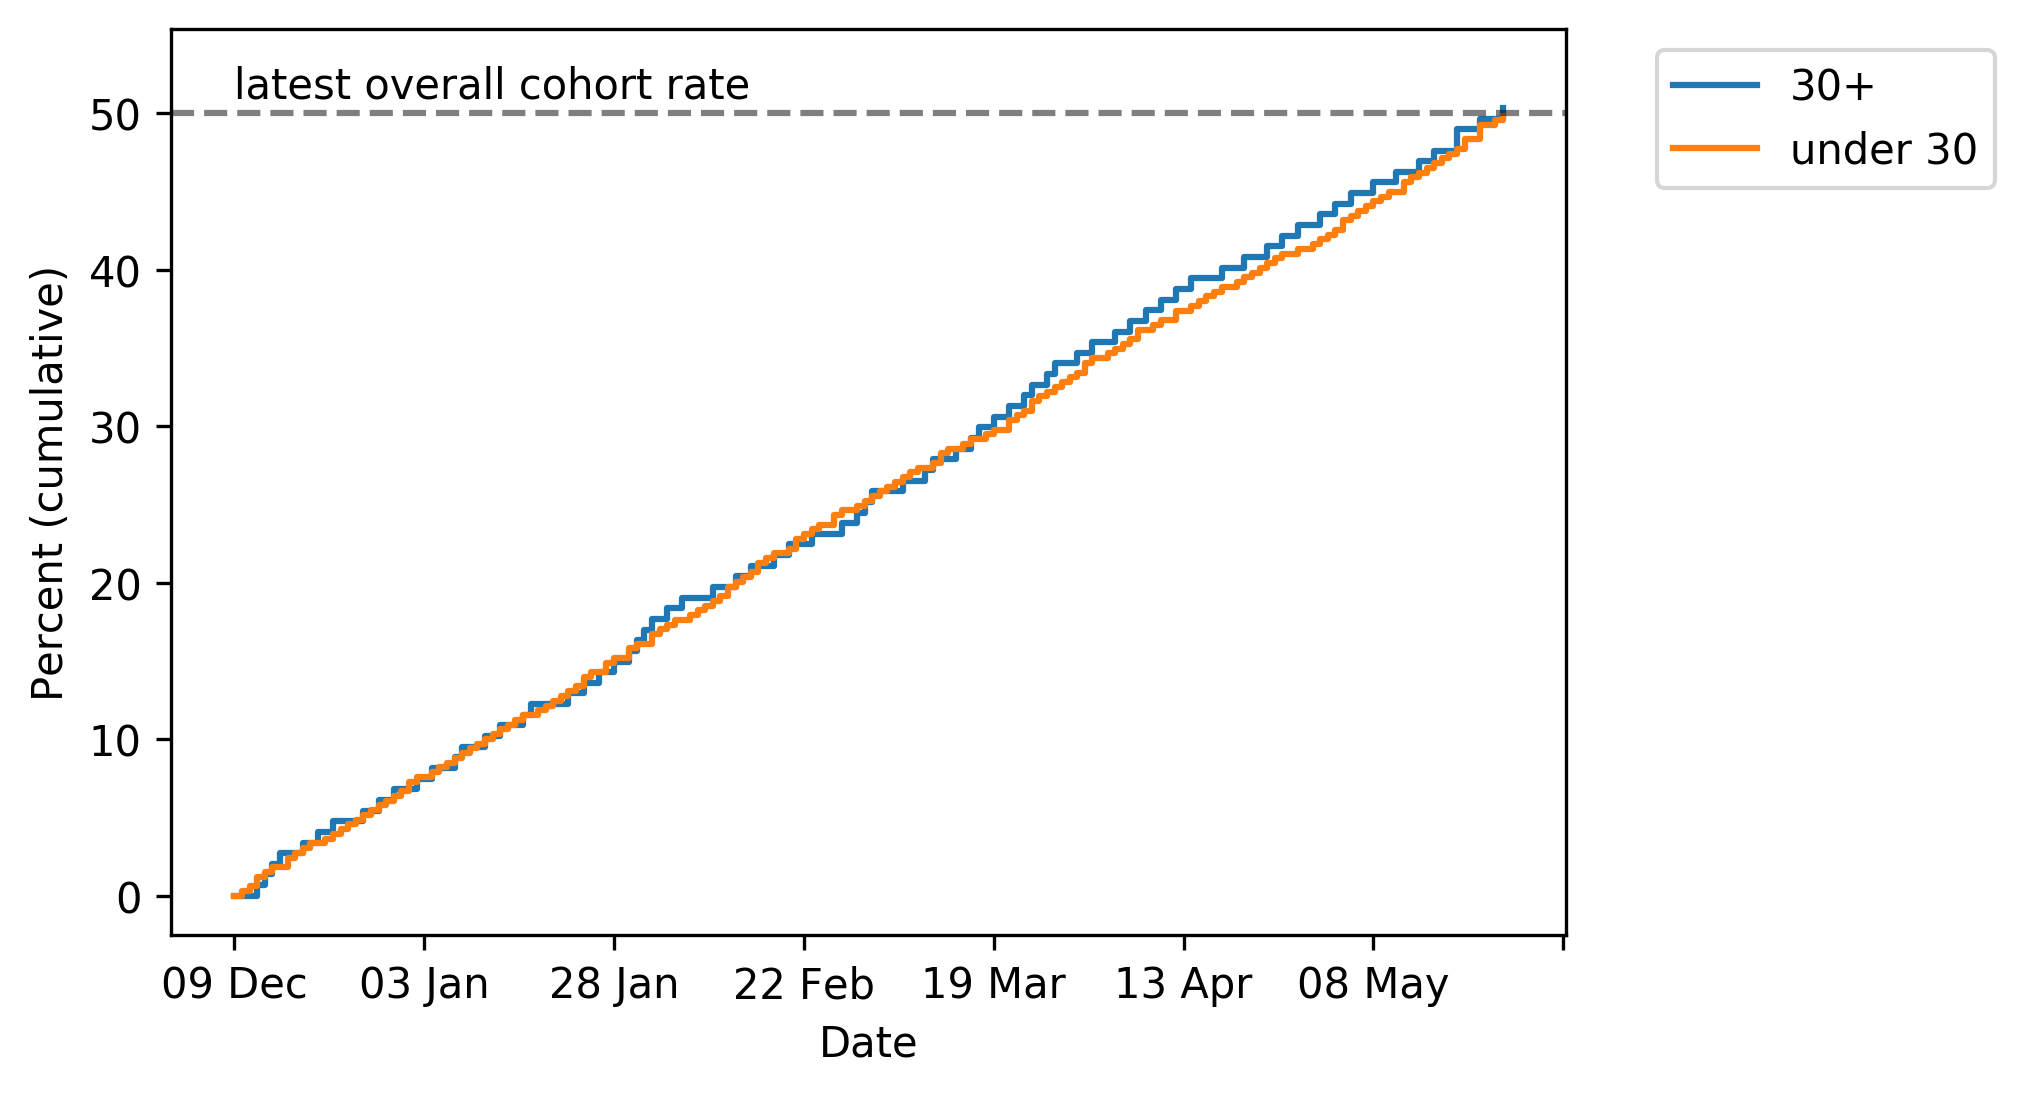

### COVID vaccinations among 50-54 population
 ### by Chronic cardiac disease

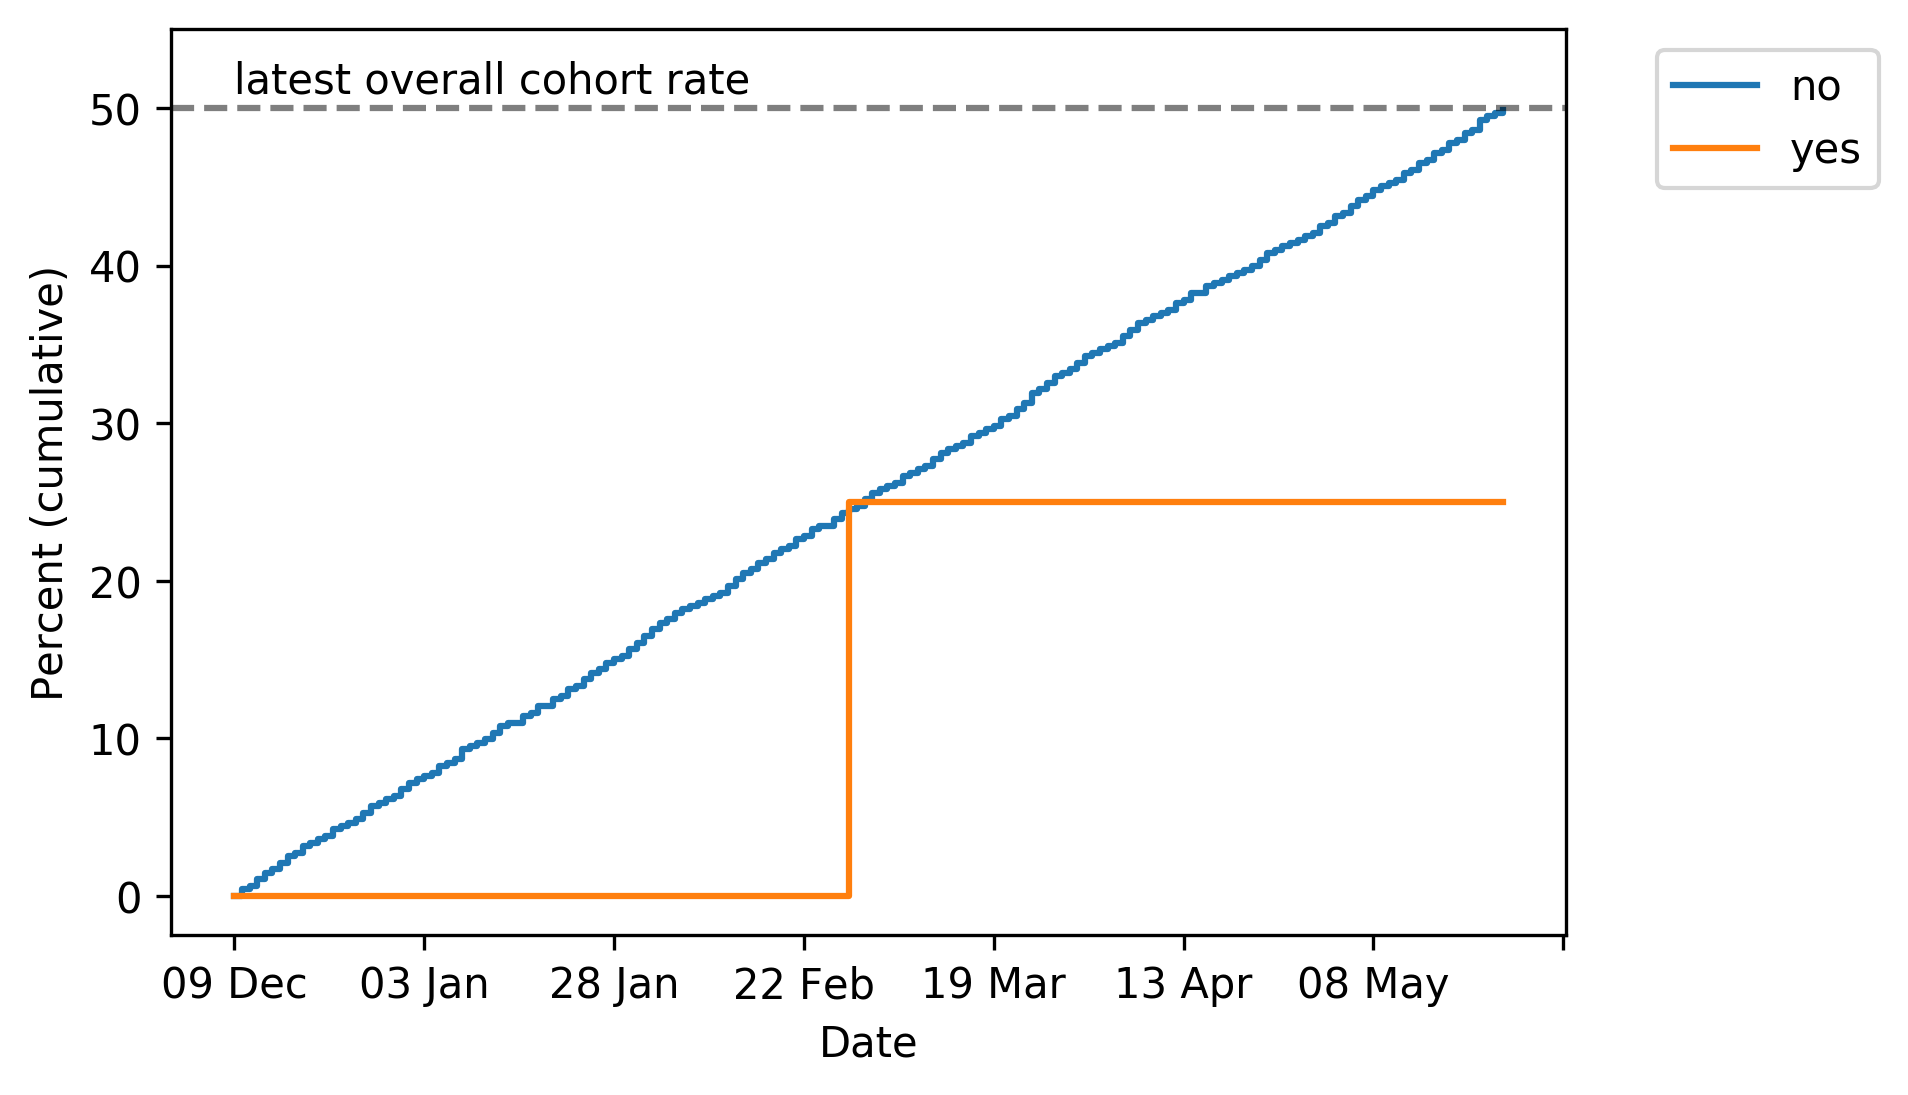

### COVID vaccinations among 50-54 population
 ### by Current COPD

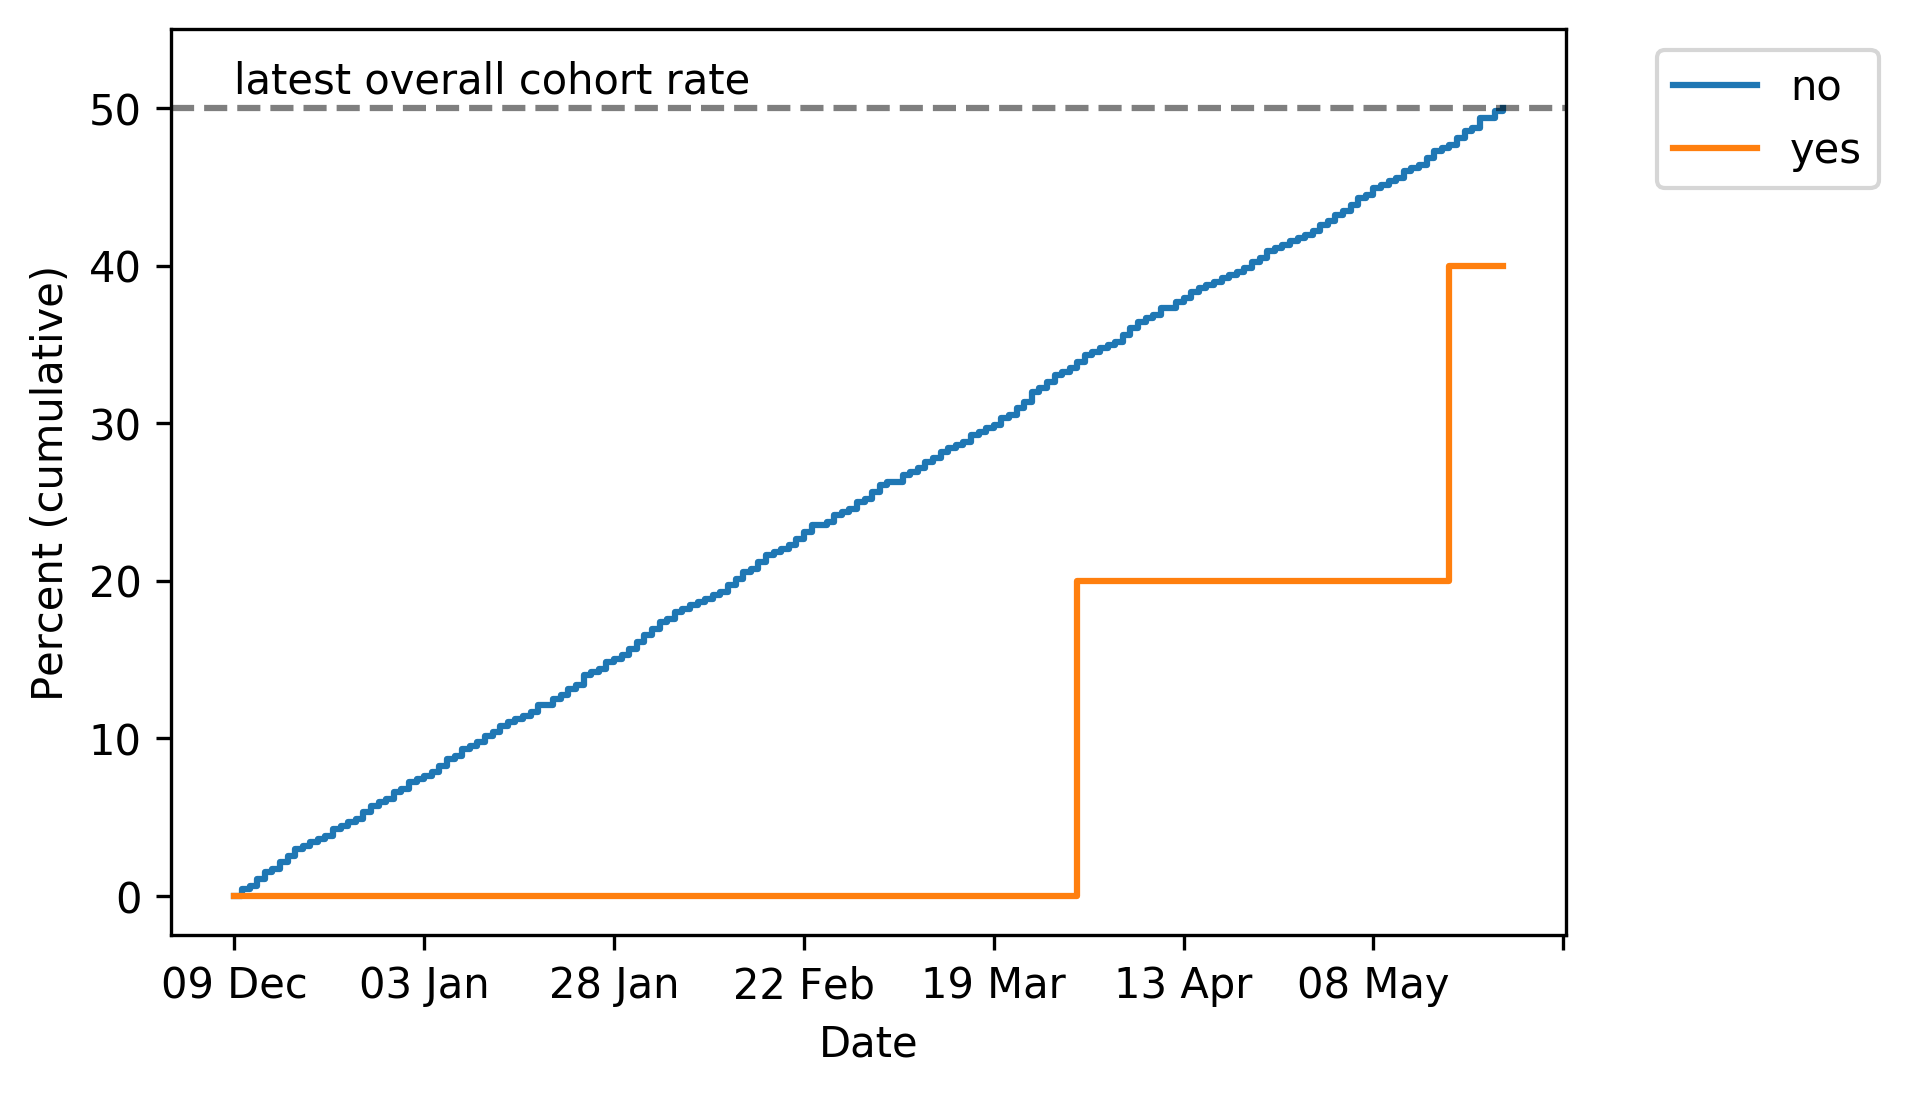

### COVID vaccinations among 50-54 population
 ### by Psychosis, schizophrenia, or bipolar

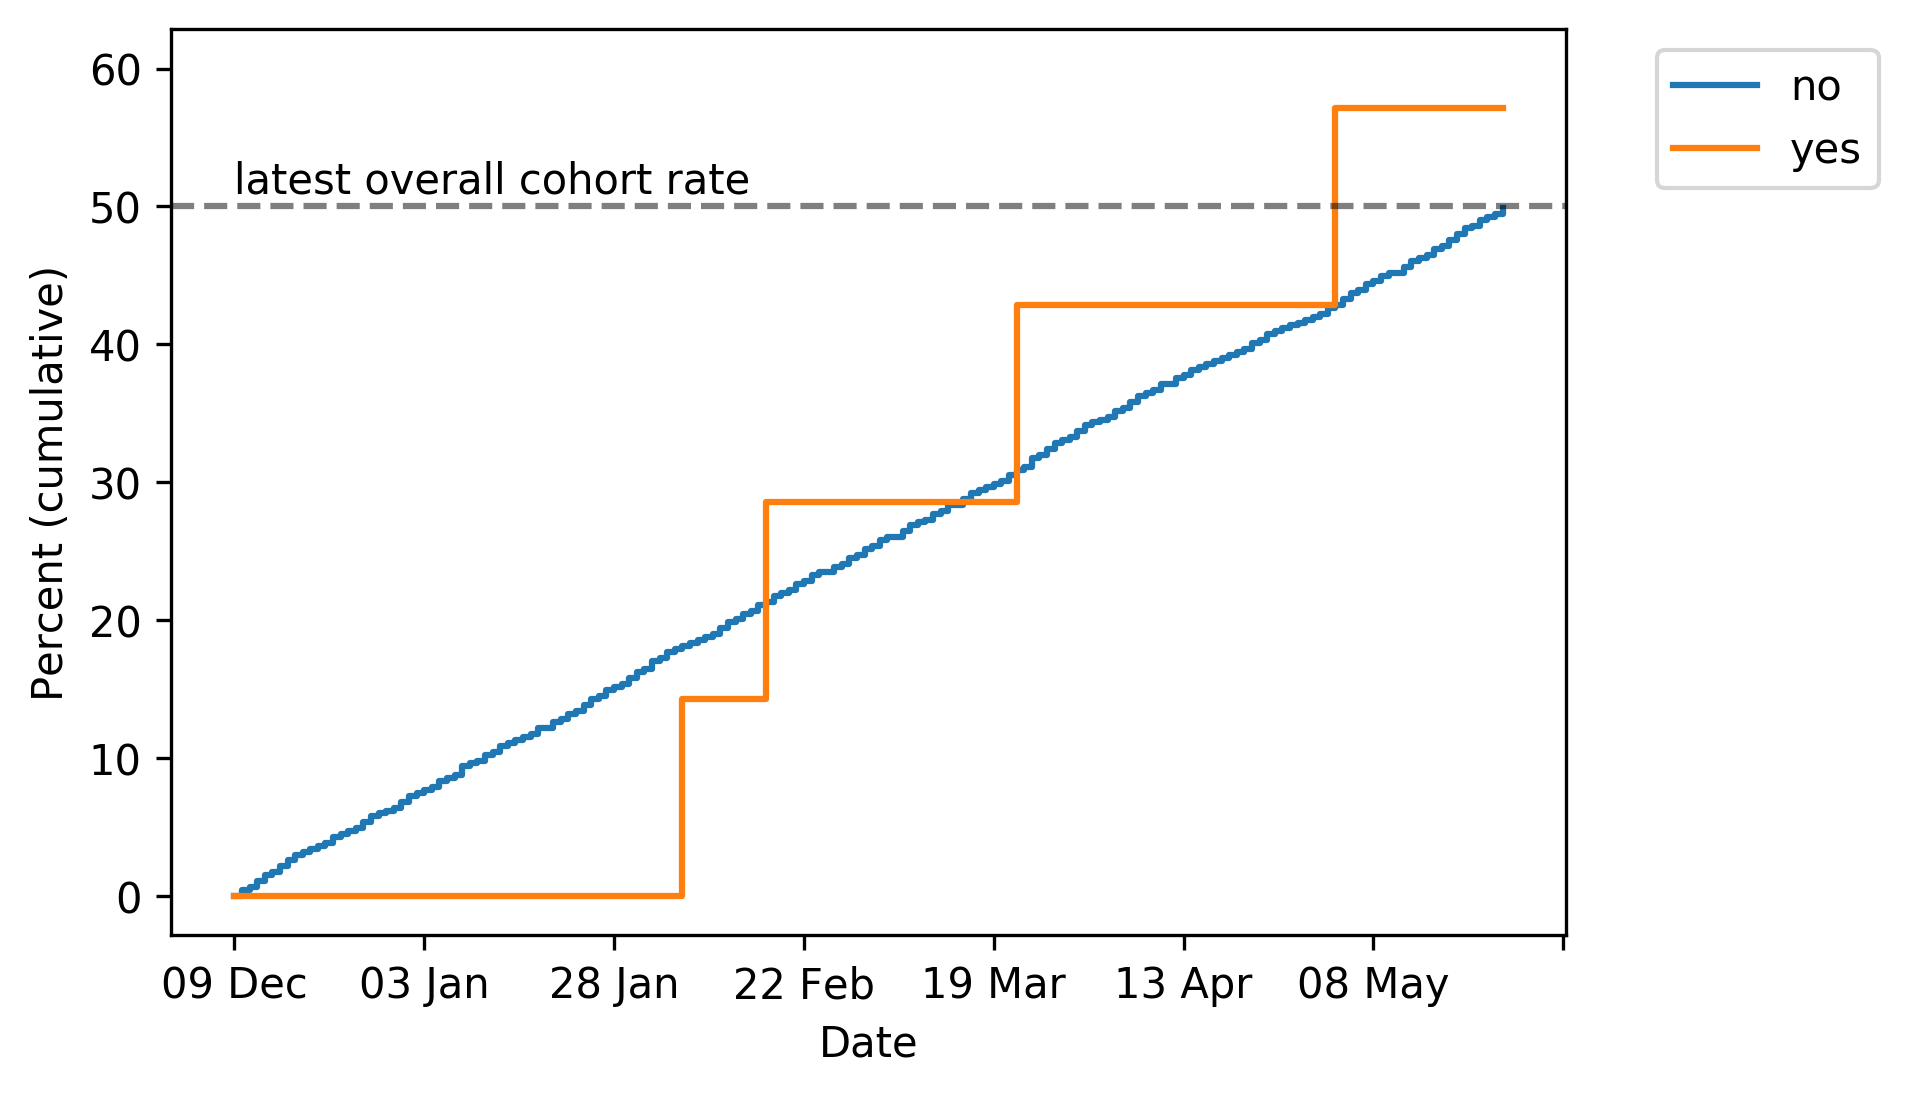

### COVID vaccinations among 50-54 population
 ### by SSRI (last 12 months)

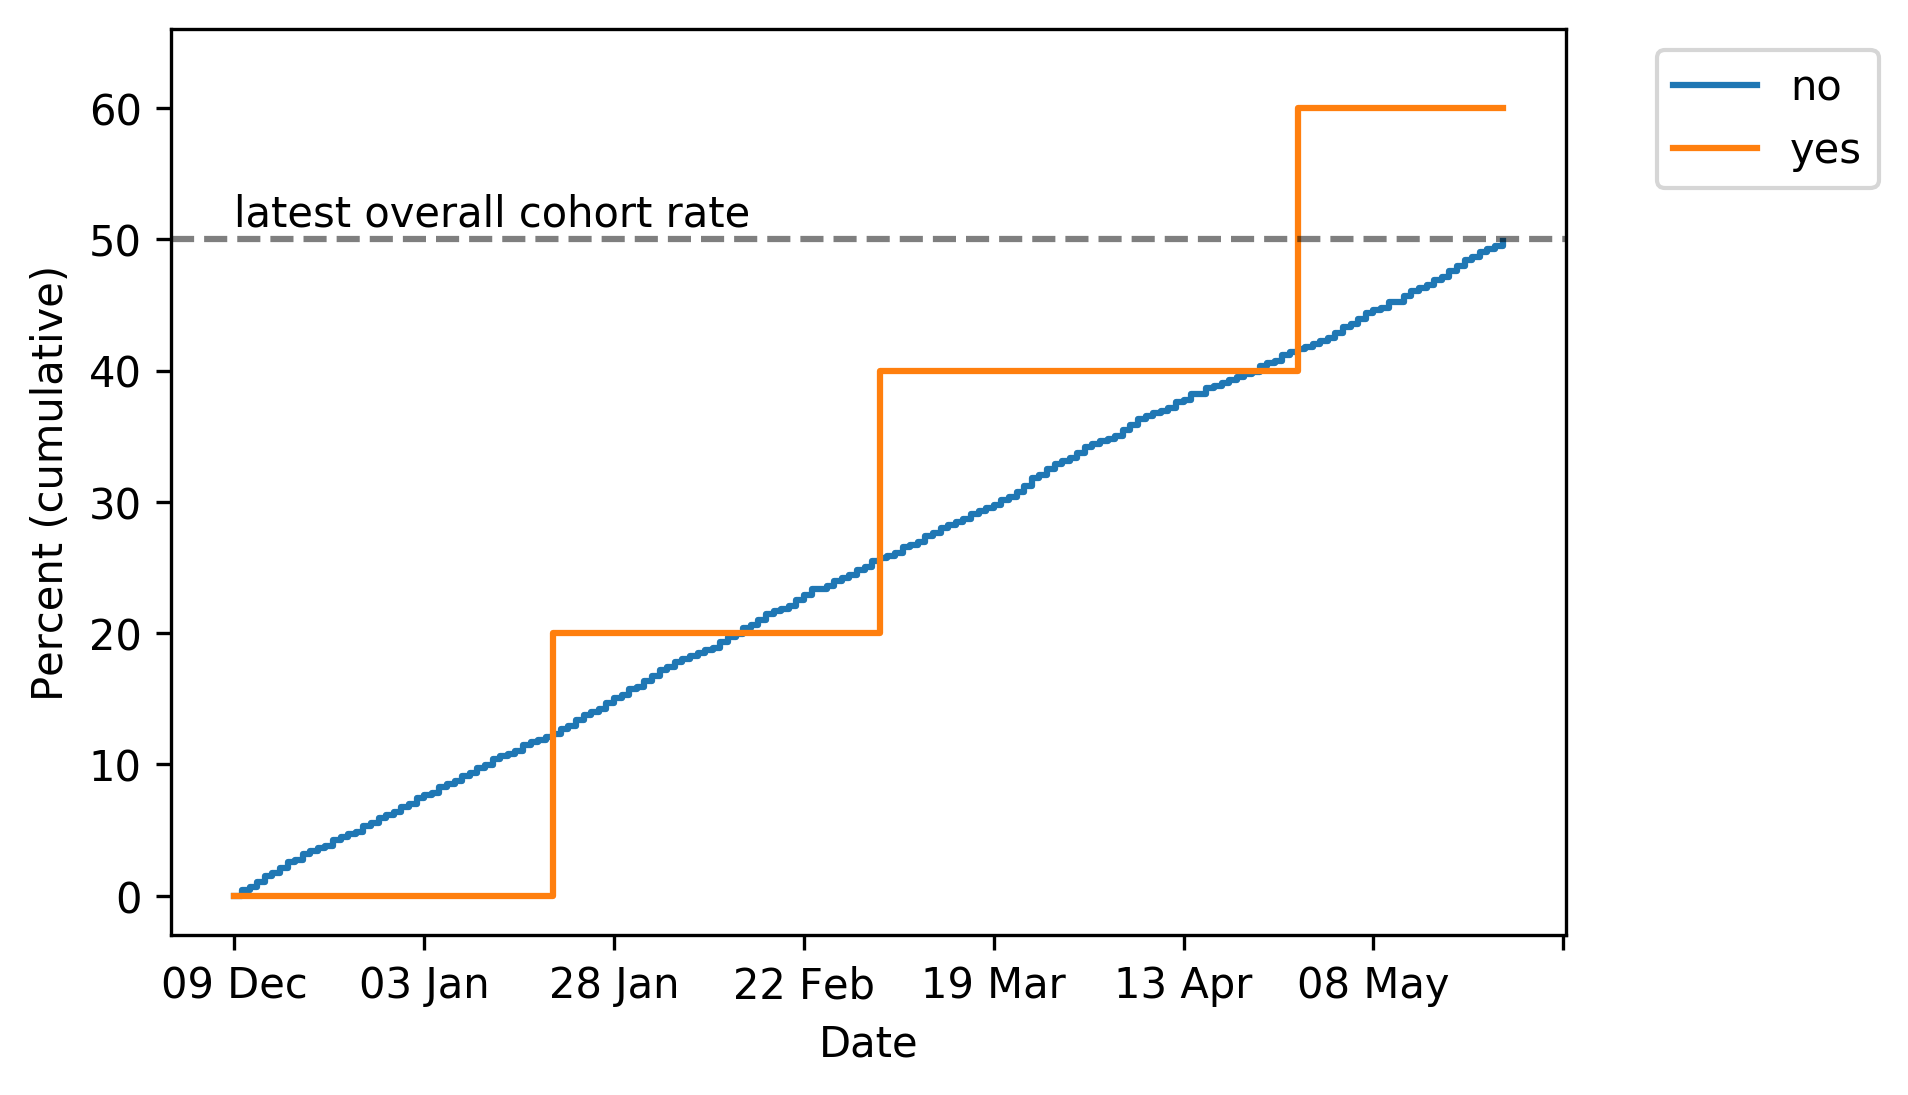

In [10]:
display(Markdown("## 50-54 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="50-54", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 40-49 population according to demographic/clinical features, cumulatively by day. <a name='charts40' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 40-49 population

### COVID vaccinations among 40-49 population
 ### by Sex

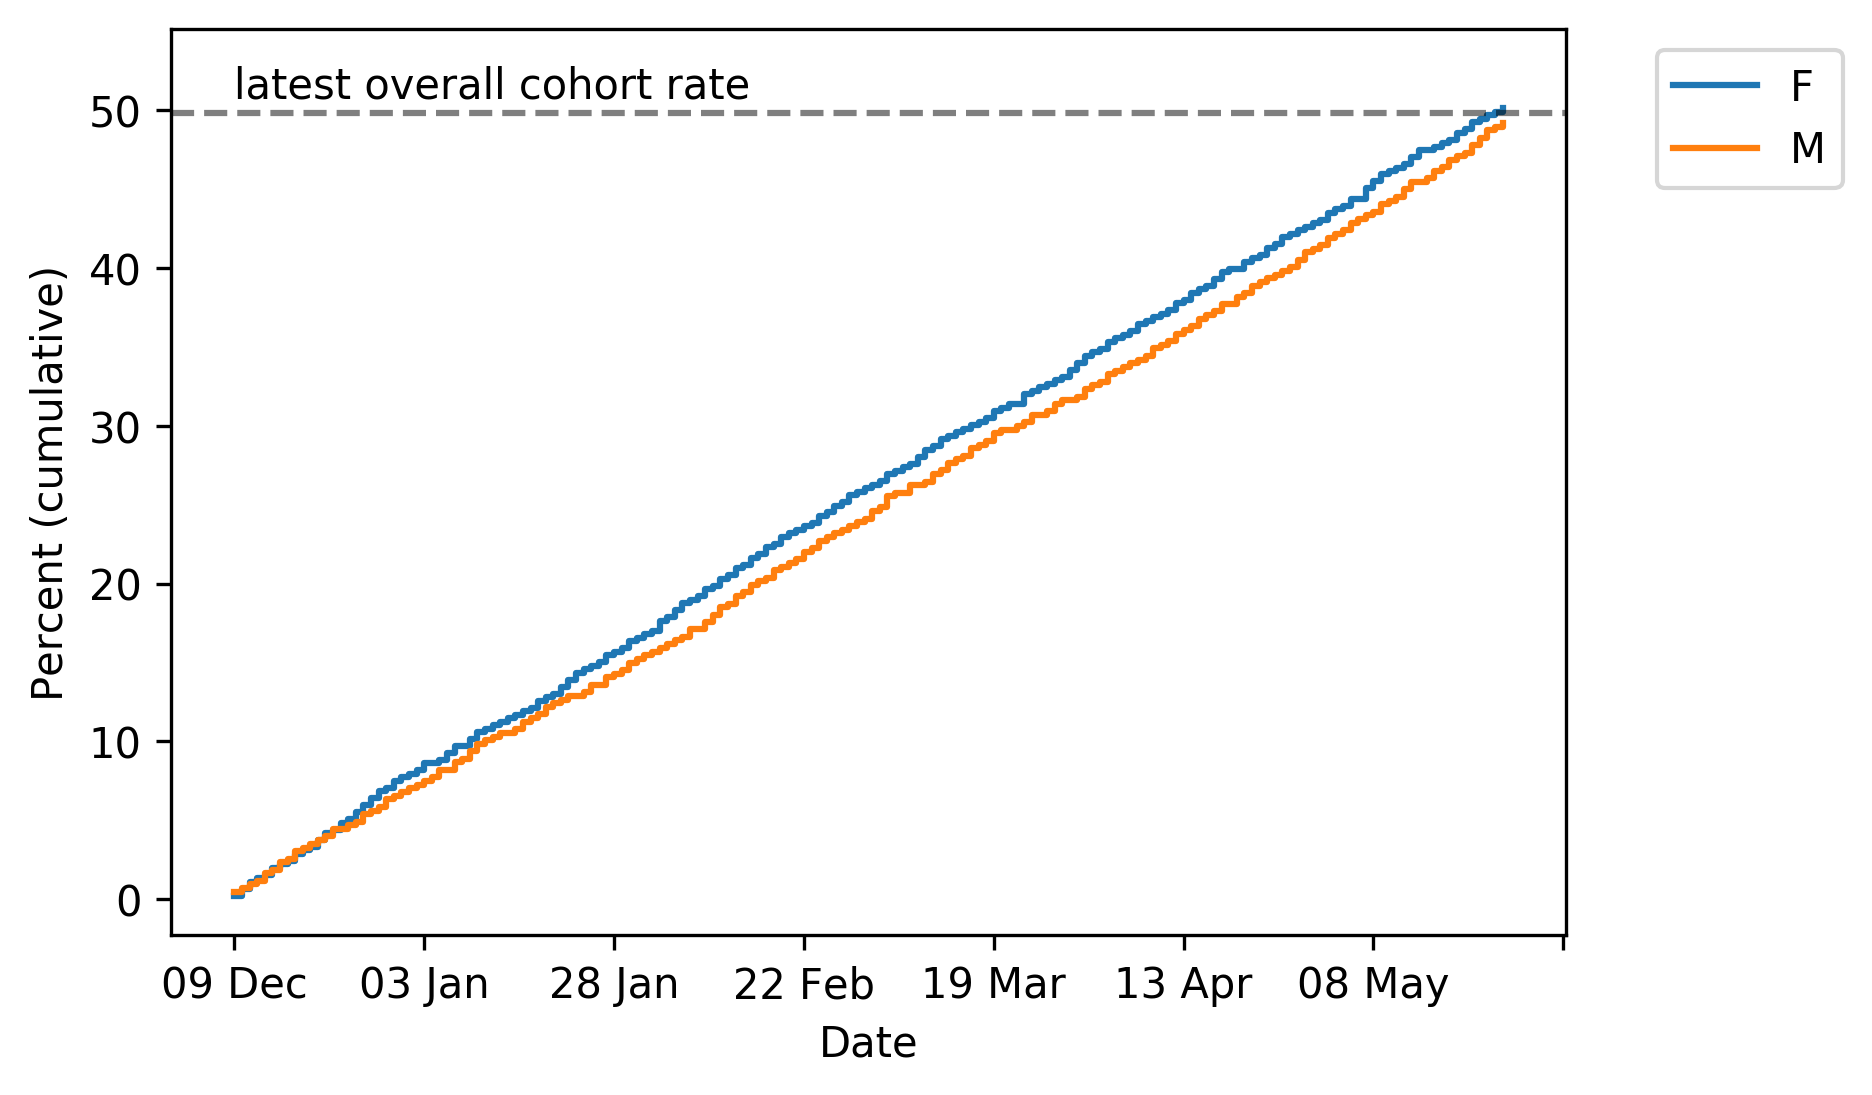

### COVID vaccinations among 40-49 population
 ### by Ethnicity (broad categories)

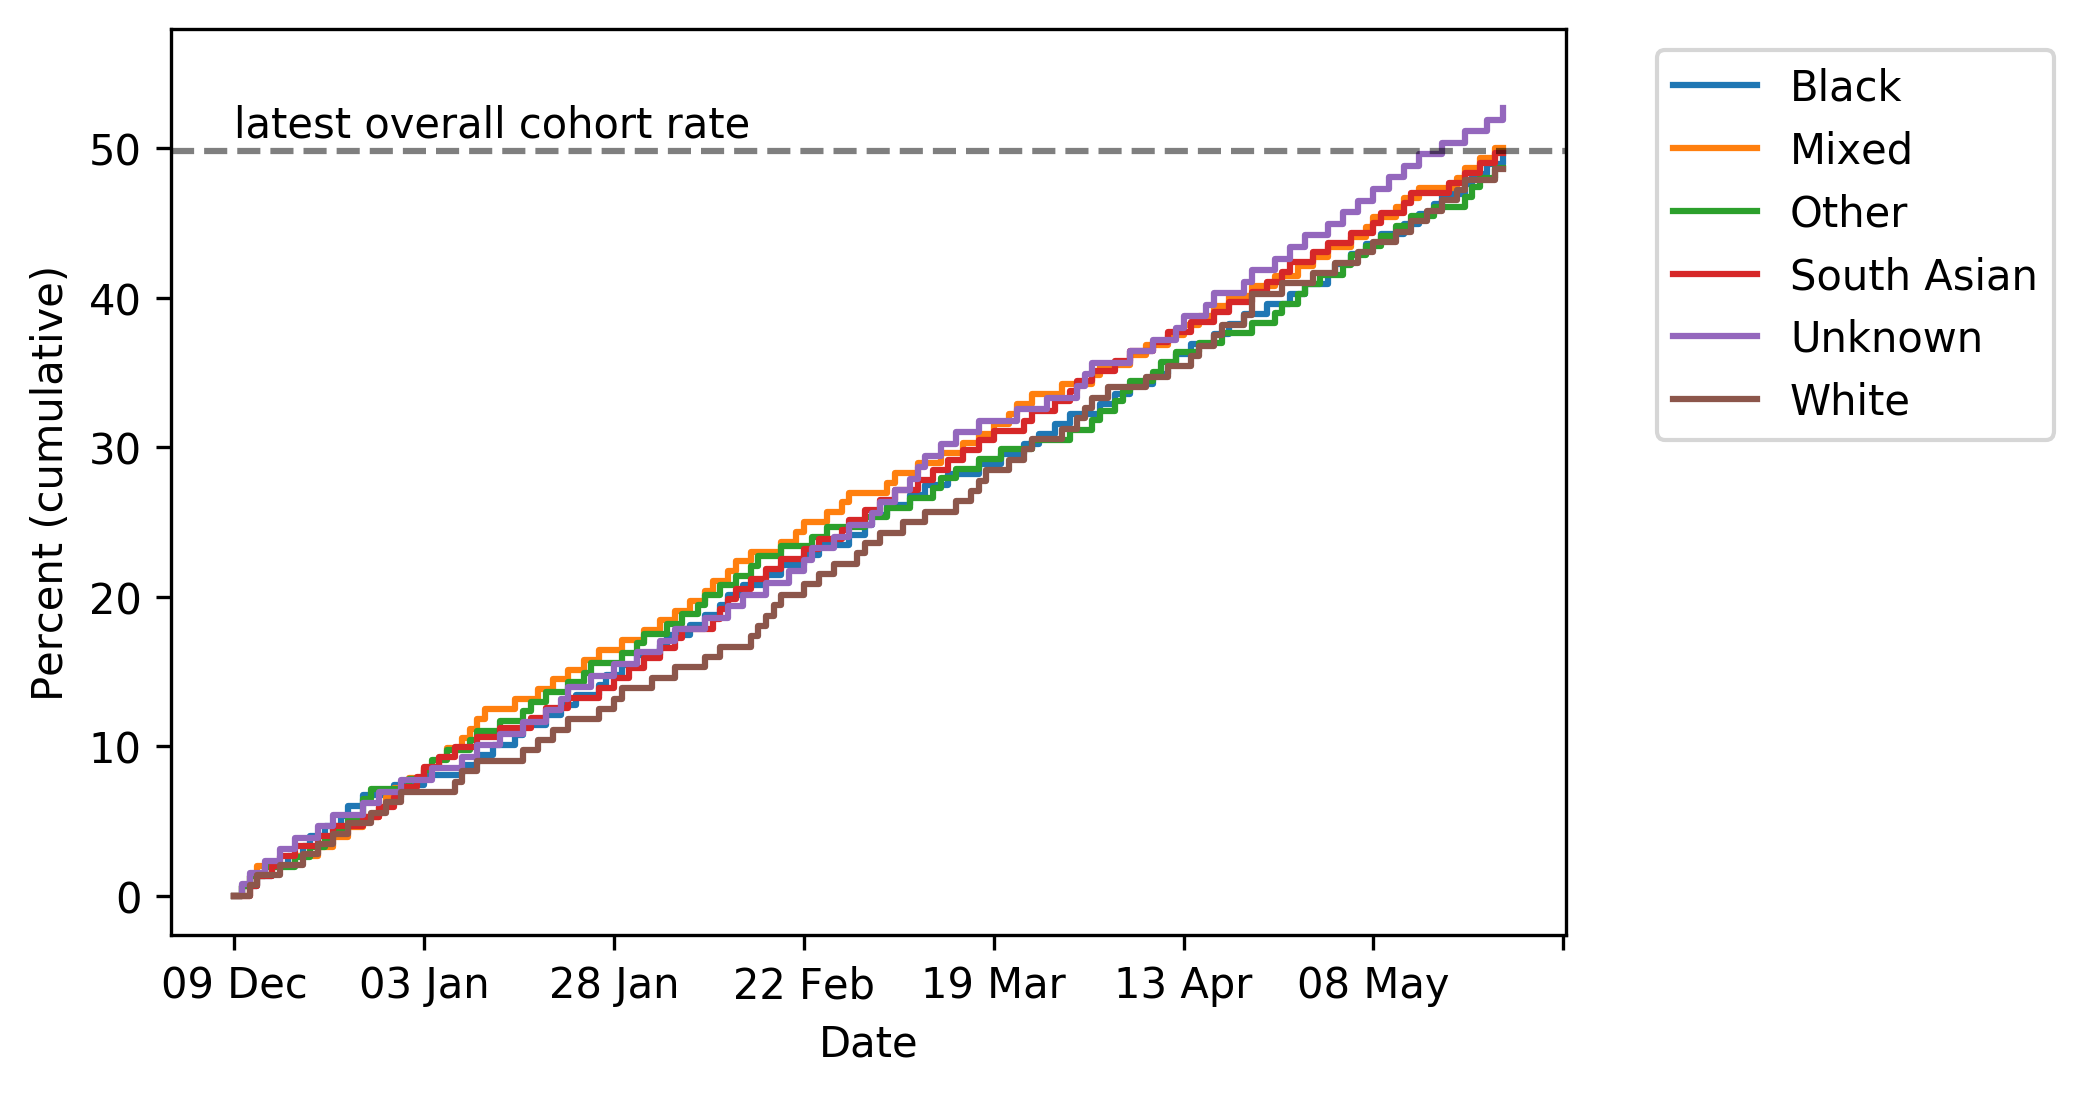

### COVID vaccinations among 40-49 population
 ### by Index of Multiple Deprivation (quintiles)

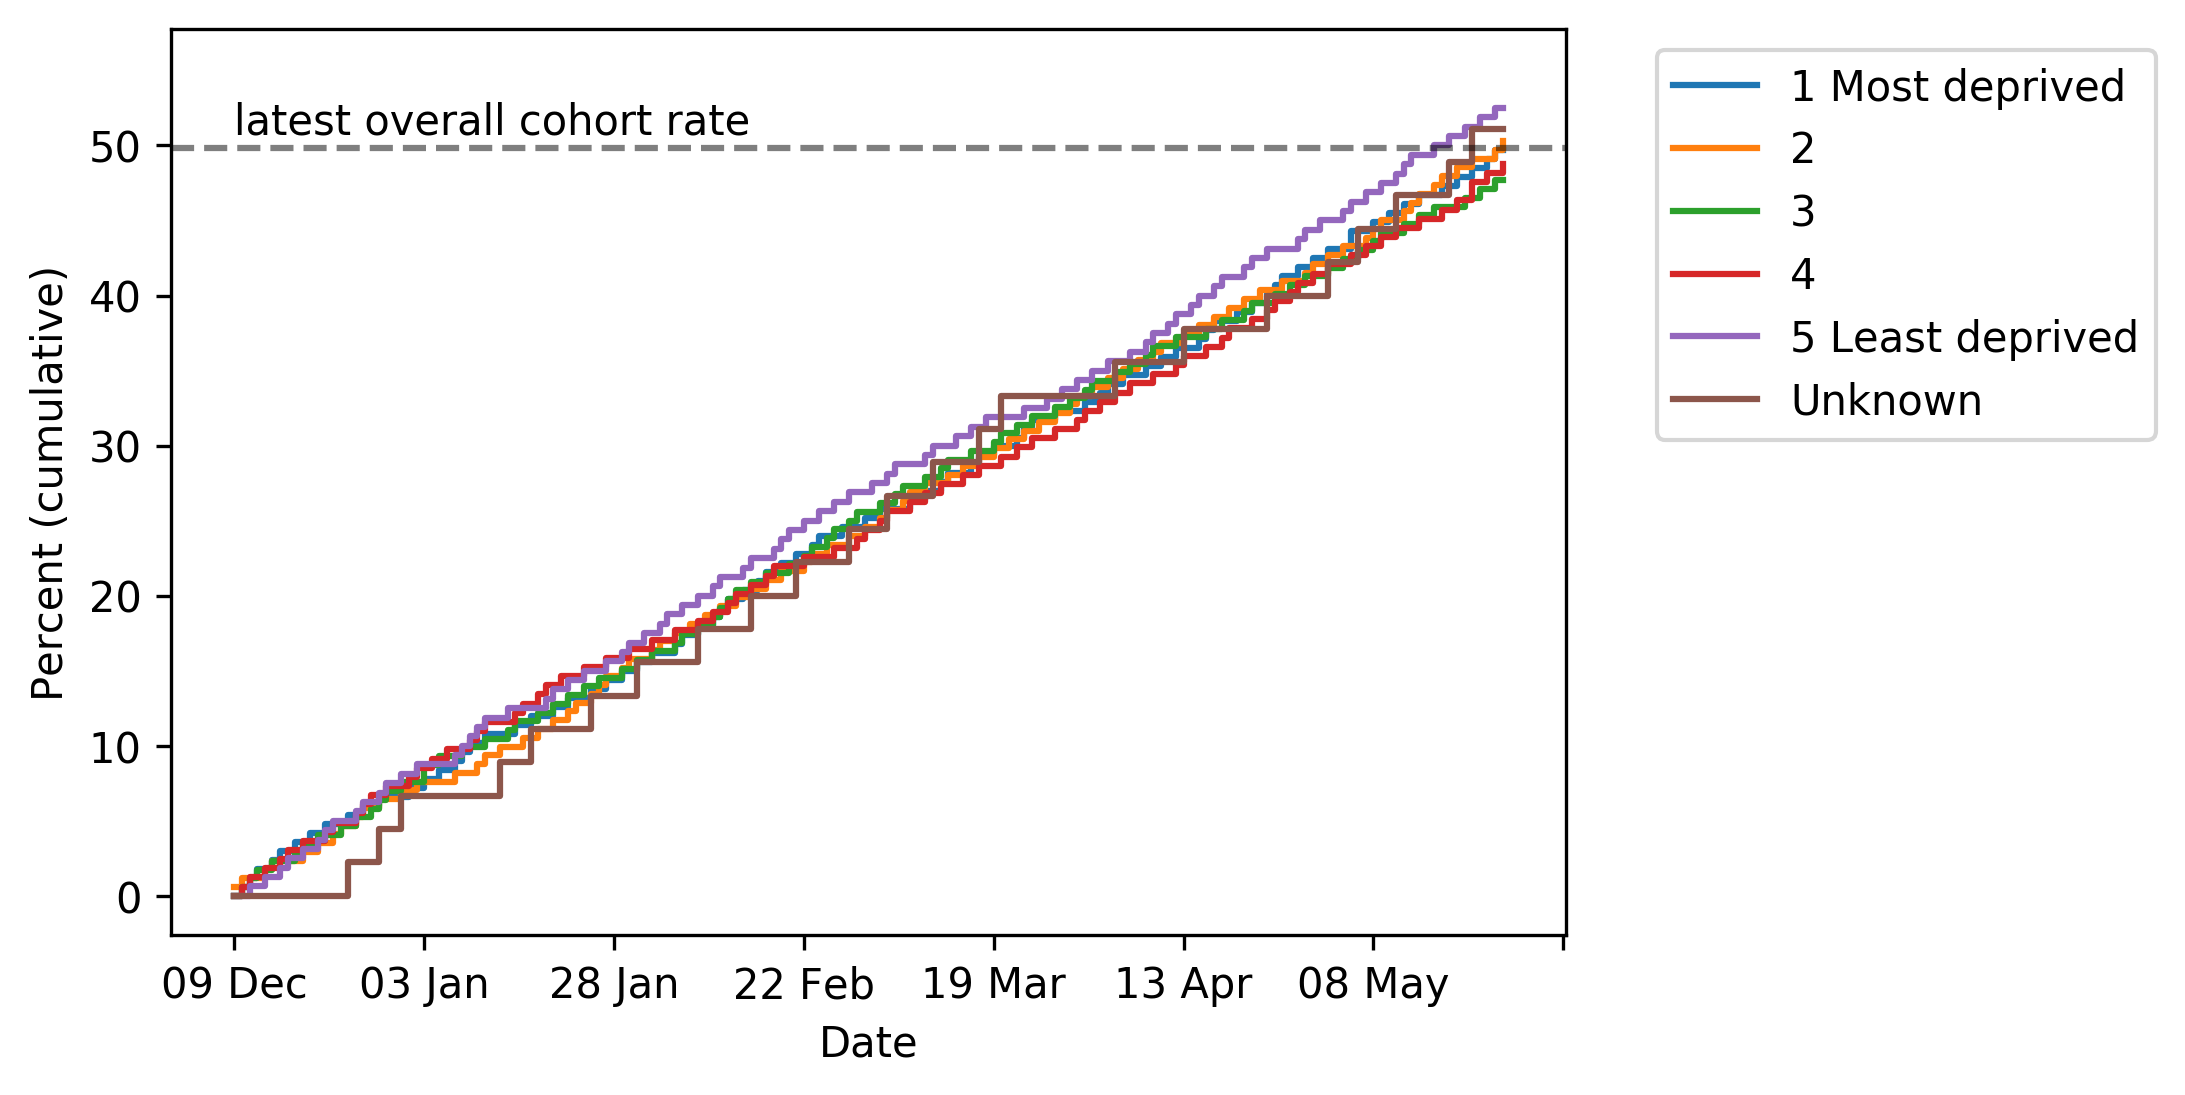

In [11]:
display(Markdown("## 40-49 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="40-49", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

# 
## Vaccination rates of each eligible population group, according to demographic/clinical features  <a name='tables' />

In [12]:
tablelist = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                            pre_string="among ", tail_string=" population.csv",
                            population_subset="Cumulative vaccination figures",
                            files_to_exclude=[])
    
for filename in tablelist:
    df, title = import_table(filename, latest_date_fmt, show_carehomes=True, suffix=suffix)
    show_table(df, title, latest_date_fmt, show_carehomes=True)

## 
 ## Cumulative vaccination figures among 80+ population 
 Please refer to footnotes below table for information.

Vaccinated at 25 May (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1065   
Sex                                       F                                                         518   
                                          M                                                         546   
Age band                                  0                                                          63   
                                          0-15                                                       70   
                                          16-29                                                      56   
                                          30-34                                                      77   
                                          35-39                                                      56   
                                          40-44                                                      63   
                                          45-49                                                      56   
                                          50-54                                                      84   
                                          55-59                                                      70   
                                          60-64                                                      63   
                                          65-69                                                      63   
                                          70-74                                                      70   
                                          75-79                                                      56   
                                          80-84                                                      70   
                                          85-89                                                      77   
                                          90+                                                        70   
Ethnicity (broad categories)              Black                                                     189   
                                          Mixed                                                     168   
                                          Other                                                     175   
                                          South Asian                                               182   
                                          Unknown                                                   154   
                                          White                                                     196   
ethnicity 16 groups                        African                                                   56   
                                           Bangladeshi or British Bangladeshi                        42   
                                           Caribbean                                                 63   
                                           Chinese                                                   63   
                                           Other                                                     63   
                                           Other Asian                                               49   
                                          British or Mixed British                                   49   
                                          Indian or British Indian                                   56   
                                          Irish                                                      63   
                                          Other Black                                                56   
                                          Other White                                                49   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 70-79 population 
 Please refer to footnotes below table for information.

Vaccinated at 25 May (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1728   
Sex                                       F                                                         889   
                                          M                                                         833   
Age band                                  0                                                          98   
                                          0-15                                                      119   
                                          16-29                                                      98   
                                          30-34                                                      98   
                                          35-39                                                      91   
                                          40-44                                                     126   
                                          45-49                                                     126   
                                          50-54                                                     112   
                                          55-59                                                     112   
                                          60-64                                                     105   
                                          65-69                                                      98   
                                          70-74                                                     126   
                                          75-79                                                     112   
                                          80-84                                                      91   
                                          85-89                                                     105   
                                          90+                                                       112   
Ethnicity (broad categories)              Black                                                     280   
                                          Mixed                                                     287   
                                          Other                                                     287   
                                          South Asian                                               301   
                                          Unknown                                                   273   
                                          White                                                     294   
ethnicity 16 groups                        African                                                   84   
                                           Bangladeshi or British Bangladeshi                        77   
                                           Caribbean                                                 98   
                                           Chinese                                                   98   
                                           Other                                                     77   
                                           Other Asian                                               84   
                                          British or Mixed British                                   84   
                                          Indian or British Indian                                   91   
                                          Irish                                                      91   
                                          Other Black                                               105   
                                          Other White                                                98   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among care home population 
 Please refer to footnotes below table for information.

Vaccinated at 25 May (n)  \
Category                     Group                                   
overall                      overall                           693   
Sex                          F                                 364   
                             M                                 329   
Age band                     0                                  42   
                             0-15                               42   
                             16-29                              35   
                             30-34                              49   
                             35-39                              42   
                             40-44                              42   
                             45-49                              35   
                             50-54                              42   
                             55-59                              35   
                             60-64                              42   
                             65-69                              42   
                             70-74                              42   
                             75-79                              49   
                             80-84                              56   
                             85-89                              49   
                             90+                                49   
Ethnicity (broad categories) Black                              98   
                             Mixed                             119   
                             Other                             119   
                             South Asian                       112   
                             Unknown                           126   
                             White                             112   
Dementia                     no                                686   
                             yes                                 0   

                                          Vaccinated at 25 May (%)  \
Category                     Group                                   
overall                      overall                          51.3   
Sex                          F                                53.1   
                             M                                49.0   
Age band                     0                                50.0   
                             0-15                             42.9   
                             16-29                            45.5   
                             30-34                            58.3   
                             35-39                            60.0   
                             40-44                            50.0   
                             45-49                            50.0   
                             50-54                            46.2   
                             55-59                            50.0   
                             60-64                            54.5   
                             65-69                            54.5   
                             70-74                            46.2   
                             75-79                            53.8   
                             80-84                            57.1   
                             85-89                            50.0   
                             90+                              50.0   
Ethnicity (broad categories) Black                            48.3   
                             Mixed                            48.6   
                             Other                            51.5   
                             South Asian                      53.3   
                             Unknown                          54.5   
                             White                            50.0   
Dementia                     no                               51.0   
                             yes                   

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population includes those known to live in an elderly care home, based upon clinical coding.

## 
 ## Cumulative vaccination figures among shielding (aged 16-69) population 
 Please refer to footnotes below table for information.

Vaccinated at 25 May (n)  \
Category                                  Group                                        
overall                                   overall                                210   
newly shielded since feb 15               no                                     210   
                                          yes                                      0   
Sex                                       F                                       98   
                                          M                                      112   
Age band                                  16-29                                   21   
                                          30-39                                   28   
                                          40-49                                   28   
                                          50-59                                   21   
                                          60-69                                   28   
                                          70-79                                   56   
                                          80+                                     35   
Ethnicity (broad categories)              Black                                   28   
                                          Mixed                                   28   
                                          Other                                   42   
                                          South Asian                             42   
                                          Unknown                                 28   
                                          White                                   42   
Index of Multiple Deprivation (quintiles) 1 Most deprived                         42   
                                          2                                       42   
                                          3                                       35   
                                          4                                       35   
                                          5 Least deprived                        42   
                                          Unknown                                  7   
Learning disability                       no                                     210   
                                          yes                                      0   

                                                            Vaccinated at 25 May (%)  \
Category                                  Group                                        
overall                                   overall                               48.4   
newly shielded since feb 15               no                                    49.2   
                                          yes                                    0.0   
Sex                                       F                                     48.3   
                                          M                                     50.0   
Age band                                  16-29                                 42.9   
                                          30-39                                 50.0   
                                          40-49                                 50.0   
                                          50-59                                 37.5   
                                          60-69                                 50.0   
                                          70-79                                 53.3   
                                          80+                                   62.5   
Ethnicity (broad categories)              Black                                 36.4   
                                          Mixed                                 36.4   
                                          Other                                 60.0   
                                          South Asian                           54.5   
           

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those over 65 known to live in an elderly care home, based upon clinical coding.

## 
 ## Cumulative vaccination figures among 65-69 population 
 Please refer to footnotes below table for information.

Vaccinated at 25 May (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1170   
Sex                                       F                                                         595   
                                          M                                                         574   
Ethnicity (broad categories)              Black                                                     203   
                                          Mixed                                                     217   
                                          Other                                                     203   
                                          South Asian                                               203   
                                          Unknown                                                   154   
                                          White                                                     189   
ethnicity 16 groups                        African                                                   56   
                                           Bangladeshi or British Bangladeshi                        63   
                                           Caribbean                                                 56   
                                           Chinese                                                   70   
                                           Other                                                     49   
                                           Other Asian                                               56   
                                          British or Mixed British                                   56   
                                          Indian or British Indian                                   70   
                                          Irish                                                      63   
                                          Other Black                                                77   
                                          Other White                                                63   
                                          Other mixed                                                63   
                                          Pakistani or British Pakistani                             63   
                                          Unknown                                                   182   
                                          White + Asian                                              70   
                                          White + Black African                                      63   
                                          White + Black Caribbean                                    56   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           210   
                                          2                                                         231   
                                          3                                                         210   
                                          4                                                         238   
                                          5 Least deprived                                          217   
                                          Unknown                                                    56   
BMI                                       30+                                                       329   
                                          under 30                                                  840   
Chronic cardiac disease                   no                                                       1155   
                                          yes                                                        14   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among Learning Disabilities (aged 16-64) population 
 Please refer to footnotes below table for information.

Vaccinated at 25 May (n)  \
Category                     Group                                   
overall                      overall                           390   
Sex                          F                                 203   
                             M                                 189   
Age band                     0                                  21   
                             0-15                               21   
                             16-29                              21   
                             30-34                              21   
                             35-39                              28   
                             40-44                              21   
                             45-49                              28   
                             50-54                              28   
                             55-59                              21   
                             60-64                              21   
                             65-69                              28   
                             70-74                              28   
                             75-79                              35   
                             80-84                              21   
                             85-89                              28   
                             90+                                21   
Ethnicity (broad categories) Black                              49   
                             Mixed                              70   
                             Other                              77   
                             South Asian                        56   
                             Unknown                            63   
                             White                              77   

                                          Vaccinated at 25 May (%)  \
Category                     Group                                   
overall                      overall                          49.3   
Sex                          F                                49.2   
                             M                                50.0   
Age band                     0                                42.9   
                             0-15                             42.9   
                             16-29                            50.0   
                             30-34                            42.9   
                             35-39                            57.1   
                             40-44                            60.0   
                             45-49                            57.1   
                             50-54                            50.0   
                             55-59                            50.0   
                             60-64                            42.9   
                             65-69                            44.4   
                             70-74                            44.4   
                             75-79                            62.5   
                             80-84                            50.0   
                             85-89                            57.1   
                             90+                              42.9   
Ethnicity (broad categories) Black                            41.2   
                             Mixed                            50.0   
                             Other                            55.0   
                             South Asian                      42.1   
                             Unknown                          52.9   
                             White                            52.4   

                                          Total eligible  \
Category                     Group                         
overall                      overall                 791   
Sex                          F                       413   
                    

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

## 
 ## Cumulative vaccination figures among 60-64 population 
 Please refer to footnotes below table for information.

Vaccinated at 25 May (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1307   
Sex                                       F                                                         658   
                                          M                                                         644   
Ethnicity (broad categories)              Black                                                     203   
                                          Mixed                                                     210   
                                          Other                                                     245   
                                          South Asian                                               210   
                                          Unknown                                                   217   
                                          White                                                     224   
ethnicity 16 groups                        African                                                   63   
                                           Bangladeshi or British Bangladeshi                        77   
                                           Caribbean                                                 63   
                                           Chinese                                                   56   
                                           Other                                                     56   
                                           Other Asian                                               84   
                                          British or Mixed British                                   70   
                                          Indian or British Indian                                   63   
                                          Irish                                                      77   
                                          Other Black                                                63   
                                          Other White                                                70   
                                          Other mixed                                                56   
                                          Pakistani or British Pakistani                             77   
                                          Unknown                                                   217   
                                          White + Asian                                              70   
                                          White + Black African                                      84   
                                          White + Black Caribbean                                    70   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           259   
                                          2                                                         245   
                                          3                                                         252   
                                          4                                                         238   
                                          5 Least deprived                                          259   
                                          Unknown                                                    63   
BMI                                       30+                                                       392   
                                          under 30                                                  917   
Chronic cardiac disease                   no                                                       1295   
                                          yes                                                         7   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 55-59 population 
 Please refer to footnotes below table for information.

Vaccinated at 25 May (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1481   
Sex                                       F                                                         763   
                                          M                                                         721   
Ethnicity (broad categories)              Black                                                     259   
                                          Mixed                                                     287   
                                          Other                                                     252   
                                          South Asian                                               231   
                                          Unknown                                                   217   
                                          White                                                     231   
ethnicity 16 groups                        African                                                   84   
                                           Bangladeshi or British Bangladeshi                        70   
                                           Caribbean                                                 63   
                                           Chinese                                                   91   
                                           Other                                                     84   
                                           Other Asian                                               84   
                                          British or Mixed British                                   91   
                                          Indian or British Indian                                   84   
                                          Irish                                                      70   
                                          Other Black                                                91   
                                          Other White                                                84   
                                          Other mixed                                                77   
                                          Pakistani or British Pakistani                             84   
                                          Unknown                                                   210   
                                          White + Asian                                              70   
                                          White + Black African                                      77   
                                          White + Black Caribbean                                    77   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           259   
                                          2                                                         315   
                                          3                                                         287   
                                          4                                                         294   
                                          5 Least deprived                                          252   
                                          Unknown                                                    70   
BMI                                       30+                                                       476   
                                          under 30                                                 1008   
Chronic cardiac disease                   no                                                       1463   
                                          yes                                                        21   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 50-54 population 
 Please refer to footnotes below table for information.

Vaccinated at 25 May (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1665   
Sex                                       F                                                         847   
                                          M                                                         812   
Ethnicity (broad categories)              Black                                                     301   
                                          Mixed                                                     301   
                                          Other                                                     266   
                                          South Asian                                               252   
                                          Unknown                                                   266   
                                          White                                                     280   
ethnicity 16 groups                        African                                                   91   
                                           Bangladeshi or British Bangladeshi                        91   
                                           Caribbean                                                 91   
                                           Chinese                                                   77   
                                           Other                                                     98   
                                           Other Asian                                               84   
                                          British or Mixed British                                  105   
                                          Indian or British Indian                                  105   
                                          Irish                                                      77   
                                          Other Black                                                91   
                                          Other White                                                77   
                                          Other mixed                                                84   
                                          Pakistani or British Pakistani                             84   
                                          Unknown                                                   245   
                                          White + Asian                                              91   
                                          White + Black African                                      70   
                                          White + Black Caribbean                                    98   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           294   
                                          2                                                         294   
                                          3                                                         308   
                                          4                                                         322   
                                          5 Least deprived                                          336   
                                          Unknown                                                   105   
BMI                                       30+                                                       518   
                                          under 30                                                 1148   
Chronic cardiac disease                   no                                                       1652   
                                          yes                                                         7   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 40-49 population 
 Please refer to footnotes below table for information.

Vaccinated at 25 May (n)  \
Category                                  Group                                                           
overall                                   overall                                                  3064   
Sex                                       F                                                        1589   
                                          M                                                        1470   
Ethnicity (broad categories)              Black                                                     518   
                                          Mixed                                                     532   
                                          Other                                                     525   
                                          South Asian                                               525   
                                          Unknown                                                   476   
                                          White                                                     490   
ethnicity 16 groups                        African                                                  168   
                                           Bangladeshi or British Bangladeshi                       168   
                                           Caribbean                                                182   
                                           Chinese                                                  168   
                                           Other                                                    161   
                                           Other Asian                                              175   
                                          British or Mixed British                                  175   
                                          Indian or British Indian                                  168   
                                          Irish                                                     175   
                                          Other Black                                               154   
                                          Other White                                               140   
                                          Other mixed                                               147   
                                          Pakistani or British Pakistani                            154   
                                          Unknown                                                   441   
                                          White + Asian                                             168   
                                          White + Black African                                     168   
                                          White + Black Caribbean                                   154   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           581   
                                          2                                                         602   
                                          3                                                         574   
                                          4                                                         560   
                                          5 Least deprived                                          588   
                                          Unknown                                                   161   

                                                                               Vaccinated at 25 May (%)  \
Category                                  Group                                                           
overall                                   overall                                                  49.8   
Sex                                       F                                                        50.1   
            

**Footnotes:**
- Patient counts rounded to the nearest 7

## 
 ## Cumulative vaccination figures among 30-39 population 
 Please refer to footnotes below table for information.

Vaccinated at 25 May (n)  \
Category                                  Group                                                           
overall                                   overall                                                  3236   
Sex                                       F                                                        1596   
                                          M                                                        1638   
Ethnicity (broad categories)              Black                                                     546   
                                          Mixed                                                     560   
                                          Other                                                     539   
                                          South Asian                                               532   
                                          Unknown                                                   476   
                                          White                                                     581   
ethnicity 16 groups                        African                                                  175   
                                           Bangladeshi or British Bangladeshi                       154   
                                           Caribbean                                                189   
                                           Chinese                                                  196   
                                           Other                                                    182   
                                           Other Asian                                              161   
                                          British or Mixed British                                  189   
                                          Indian or British Indian                                  175   
                                          Irish                                                     168   
                                          Other Black                                               147   
                                          Other White                                               161   
                                          Other mixed                                               175   
                                          Pakistani or British Pakistani                            175   
                                          Unknown                                                   483   
                                          White + Asian                                             182   
                                          White + Black African                                     161   
                                          White + Black Caribbean                                   168   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           581   
                                          2                                                         651   
                                          3                                                         595   
                                          4                                                         637   
                                          5 Least deprived                                          602   
                                          Unknown                                                   175   

                                                                               Vaccinated at 25 May (%)  \
Category                                  Group                                                           
overall                                   overall                                                  50.1   
Sex                                       F                                                        48.7   
            

**Footnotes:**
- Patient counts rounded to the nearest 7

## 
 ## Cumulative vaccination figures among 18-29 population 
 Please refer to footnotes below table for information.

Vaccinated at 25 May (n)  \
Category                                  Group                                                           
overall                                   overall                                                  8991   
Sex                                       F                                                        4641   
                                          M                                                        4354   
Ethnicity (broad categories)              Black                                                    1589   
                                          Mixed                                                    1575   
                                          Other                                                    1484   
                                          South Asian                                              1470   
                                          Unknown                                                  1386   
                                          White                                                    1491   
ethnicity 16 groups                        African                                                  497   
                                           Bangladeshi or British Bangladeshi                       476   
                                           Caribbean                                                490   
                                           Chinese                                                  441   
                                           Other                                                    462   
                                           Other Asian                                              483   
                                          British or Mixed British                                  441   
                                          Indian or British Indian                                  511   
                                          Irish                                                     469   
                                          Other Black                                               469   
                                          Other White                                               476   
                                          Other mixed                                               483   
                                          Pakistani or British Pakistani                            490   
                                          Unknown                                                  1358   
                                          White + Asian                                             476   
                                          White + Black African                                     490   
                                          White + Black Caribbean                                   469   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                          1694   
                                          2                                                        1680   
                                          3                                                        1750   
                                          4                                                        1736   
                                          5 Least deprived                                         1708   
                                          Unknown                                                   427   

                                                                               Vaccinated at 25 May (%)  \
Category                                  Group                                                           
overall                                   overall                                                  50.2   
Sex                                       F                                                        50.7   
            

**Footnotes:**
- Patient counts rounded to the nearest 7

### 
## Appendix 
### Ethnicity coverage for each eligible group <a name='ethnicity' />

In [13]:
from create_report import get_savepath
savepath = get_savepath()
tab = pd.read_csv(os.path.join(savepath["text"], "ethnicity_coverage.csv")).set_index("group")
display(Markdown("- Ethnicity information is primarily retrieved from GP records. \
                 \n- Where missing in GP records, as of March 8 2021, it is then retrieved from hospital records if present. \
                 \n - For patients with multiple different ethnicities recorded, we use the most common non-missing ethnicity \
                 \n recorded in inpatients, outpatients or A&E over the last ~5 years (or latest if tied).\
                 \n- Patient counts are rounded to the nearest 7"))

tab[["total population (n)","ethnicity coverage (%)"]]

- Ethnicity information is primarily retrieved from GP records.                  
- Where missing in GP records, as of March 8 2021, it is then retrieved from hospital records if present.                  
 - For patients with multiple different ethnicities recorded, we use the most common non-missing ethnicity                  
 recorded in inpatients, outpatients or A&E over the last ~5 years (or latest if tied).                 
- Patient counts are rounded to the nearest 7

total population (n)  ethnicity coverage (%)
group                                                               
80+                                     2114                    85.8
70-79                                   3486                    84.1
care home                               1351                    82.9
shielding (aged 16-69)                   434                    85.5
65-69                                   2275                    85.5
LD (aged 16-64)                          791                    85.0
60-64                                   2674                    84.0
55-59                                   3024                    84.7
50-54                                   3332                    85.3
40-49                                   6153                    85.3
30-39                                   6461                    85.2
vaccinated 18-29                       17906                    84.9